<h1><center>Exploratory and Descriptive Wine Review Analysis<center></h1>

<div style="text-align:center">
  <img src="./support_files/readme_image.jpg" width="30%" height="30%" alt="Alt Text">
</div>

# <font color="#b33939" color face="Giorgia">**Data Import**</font>

In [439]:
from support_files.percentage_remaining import percentage_remaining
from support_files.my_statistics import stat
from support_files.boxplot_histplot import plot_boxplot_series

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt

# Use KNN Imputer to filling missing Price values 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

# Excluding outliers reduces the size of the dataset thus may impact the statistical power of our analysis.
# Perform power analysis to find out if statistical power is reduced when excluding outliers. 
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

# To perform independent samples t-test to compare mean of two independent groups
from scipy.stats import ttest_ind

# Use to calculate confidence intervals
# Used to calculate ANOVA test stats.f_oneway to find out if
# a categorical variable has a significant effect on a numerical variable. 
# It explains the significance but doesn't explain which group of categorical variables effects on the numerical variable.
# To find out which group affects on numerical variable need to perform Tukey's HSD 
import scipy.stats as stats # ANOVA test
from statsmodels.stats.multicomp import pairwise_tukeyhsd # Tukey's HSD

# To perform a linear regression analysis
import statsmodels.api as sm

# Calculate the Pearson correlation coefficient to find linear relationship
from scipy.stats import pearsonr

# Calculate Z-Score
from scipy.stats import zscore

# Visualizing Z-Score using QQ Plot (Quantile-Quantile Plot)
from scipy.stats import probplot

# To perform Spearman's rank correlation coefficient. It is used when you want to measure the strength and 
#direction of association between two ranked variables. 
from scipy.stats import spearmanr

from bokeh.plotting import figure
from bokeh.io import output_notebook, show

%matplotlib inline

# pd.options.display.float_format = '{:.3f}'.format
plt.style.use('ggplot')

In [2]:
reviews = pd.read_csv("data/winemag-data_first150k.csv")

**Column's names**

1. Country  - The country of origin of the wine.

2. Description - The description of the wine's flavor profile.

3. Designation - The name of the wine given to the wine by the producer. It's usually reported in the main label and it could be any name depending on winemaker fantasy.

4. Points - The number of points Wine Enthusiast  Magazine rated the wine on a scale of 1-100.

5. Price - The cost for a single bottle of the wine in USD.

6. Province - The province or state that the wine is from.

7. Region 1 - The wine growing area in a province or state (for example, Napa Valley in California).

8. Region 2 - (Optional) A more specific region in a wine growing area (for example, Rutherford inside Napa Valley).

9. Variety - The type of grapes used to make the wine (for example, Pinot Noir).

10. Winery - The winery that made the wine.

In [3]:
reviews

Unnamed: 0 country                                        description  \
0                0      US  This tremendous 100% varietal wine hails from ...   
1                1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2                2      US  Mac Watson honors the memory of a wine once ma...   
3                3      US  This spent 20 months in 30% new French oak, an...   
4                4  France  This is the top wine from La Bégude, named aft...   
...            ...     ...                                                ...   
150925      150925   Italy  Many people feel Fiano represents southern Ita...   
150926      150926  France  Offers an intriguing nose with ginger, lime an...   
150927      150927   Italy  This classic example comes from a cru vineyard...   
150928      150928  France  A perfect salmon shade, with scents of peaches...   
150929      150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 designation  points  price  \
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  province           region_1           region_2  \
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   variety                   winery  
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[150930 rows x 11 columns]

# <font color="#b33939" color face="Giorgia">**Data Cleaning and Inspection**</font>

## (1) Rename all column names to title and set index

**Column's names**

1. Country  - The country of origin of the wine.

2. Description - The description of the wine's flavor profile.

3. Designation - The name of the wine given to the wine by the producer. It's usually reported in the main label and it could be any name depending on winemaker fantasy.

4. Points - The number of points Wine Enthusiast  Magazine rated the wine on a scale of 1-100.

5. Price - The cost for a single bottle of the wine in USD.

6. Province - The province or state that the wine is from.

7. Region 1 - The wine growing area in a province or state (for example, Napa Valley in California).

8. Region 2 - (Optional) A more specific region in a wine growing area (for example, Rutherford inside Napa Valley).

9. Variety - The type of grapes used to make the wine (for example, Pinot Noir).

10. Winery - The winery that made the wine.

In [4]:
# A list of the column names to be displayed:
column_names = ["Index", "Country", "Description", "Designation", "Points", "Price", 
             "Province", "Region_1", "Region_2", "Variety", "Winery"]

In [5]:
reviews.columns = column_names

In [6]:
reviews.set_index("Index", inplace = True)

In [7]:
reviews

Country                                        Description  \
Index                                                               
0           US  This tremendous 100% varietal wine hails from ...   
1        Spain  Ripe aromas of fig, blackberry and cassis are ...   
2           US  Mac Watson honors the memory of a wine once ma...   
3           US  This spent 20 months in 30% new French oak, an...   
4       France  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
150925   Italy  Many people feel Fiano represents southern Ita...   
150926  France  Offers an intriguing nose with ginger, lime an...   
150927   Italy  This classic example comes from a cru vineyard...   
150928  France  A perfect salmon shade, with scents of peaches...   
150929   Italy  More Pinot Grigios should taste like this. A r...   

                                 Designation  Points  Price  \
Index                                                         
0                          Martha's Vineyard      96  235.0   
1       Carodorum Selección Especial Reserva      96  110.0   
2              Special Selected Late Harvest      96   90.0   
3                                    Reserve      96   65.0   
4                                 La Brûlade      95   66.0   
...                                      ...     ...    ...   
150925                                   NaN      91   20.0   
150926                        Cuvée Prestige      91   27.0   
150927                         Terre di Dora      91   20.0   
150928                       Grand Brut Rosé      90   52.0   
150929                                   NaN      90   15.0   

                  Province           Region_1           Region_2  \
Index                                                              
0               California        Napa Valley               Napa   
1           Northern Spain               Toro                NaN   
2               California     Knights Valley             Sonoma   
3                   Oregon  Willamette Valley  Willamette Valley   
4                 Provence             Bandol                NaN   
...                    ...                ...                ...   
150925      Southern Italy  Fiano di Avellino                NaN   
150926           Champagne          Champagne                NaN   
150927      Southern Italy  Fiano di Avellino                NaN   
150928           Champagne          Champagne                NaN   
150929  Northeastern Italy         Alto Adige                NaN   

                   Variety                   Winery  
Index                                                
0       Cabernet Sauvignon                    Heitz  
1            Tinta de Toro  Bodega Carmen Rodríguez  
2          Sauvignon Blanc                 Macauley  
3               Pinot Noir                    Ponzi  
4       Provence red blend     Domaine de la Bégude  
...                    ...                      ...  
150925         White Blend    Feudi di San Gregorio  
150926     Champagne Blend                H.Germain  
150927         White Blend                Terredora  
150928     Champagne Blend                   Gosset  
150929        Pinot Grigio            Alois Lageder  

[150930 rows x 10 columns]

## (2) Drop duplicated rows

In [8]:
reviews.shape

(150930, 10)

In [9]:
# Identify duplicated rows
reviews[reviews.duplicated(keep=False)]

Country                                        Description  \
Index                                                                    
25      New Zealand  Yields were down in 2015, but intensity is up,...   
29               US  This standout Rocks District wine brings earth...   
60        Argentina  Concentrated, ripe blackberry and cassis aroma...   
61        Australia  Moorooduc's estate Pinot Noir is a solid value...   
62        Argentina  Smoky aromas of fresh-cut wood blend with berr...   
...             ...                                                ...   
150925        Italy  Many people feel Fiano represents southern Ita...   
150926       France  Offers an intriguing nose with ginger, lime an...   
150927        Italy  This classic example comes from a cru vineyard...   
150928       France  A perfect salmon shade, with scents of peaches...   
150929        Italy  More Pinot Grigios should taste like this. A r...   

                                     Designation  Points  Price  \
Index                                                             
25                               Maté's Vineyard      94   57.0   
29                               The Funk Estate      94   60.0   
60      The Apple Doesn't Fall Far From The Tree      91   30.0   
61                                           NaN      91   36.0   
62                         Alegoría Gran Reserva      91   25.0   
...                                          ...     ...    ...   
150925                                       NaN      91   20.0   
150926                            Cuvée Prestige      91   27.0   
150927                             Terre di Dora      91   20.0   
150928                           Grand Brut Rosé      90   52.0   
150929                                       NaN      90   15.0   

                  Province                 Region_1         Region_2  \
Index                                                                  
25                   Kumeu                      NaN              NaN   
29              Washington  Walla Walla Valley (WA)  Columbia Valley   
60        Mendoza Province                  Mendoza              NaN   
61                Victoria     Mornington Peninsula              NaN   
62        Mendoza Province                  Mendoza              NaN   
...                    ...                      ...              ...   
150925      Southern Italy        Fiano di Avellino              NaN   
150926           Champagne                Champagne              NaN   
150927      Southern Italy        Fiano di Avellino              NaN   
150928           Champagne                Champagne              NaN   
150929  Northeastern Italy               Alto Adige              NaN   

                Variety                 Winery  
Index                                           
25           Chardonnay            Kumeu River  
29                Syrah                 Saviah  
60               Malbec      Matias Riccitelli  
61           Pinot Noir              Moorooduc  
62               Malbec        Navarro Correas  
...                 ...                    ...  
150925      White Blend  Feudi di San Gregorio  
150926  Champagne Blend              H.Germain  
150927      White Blend              Terredora  
150928  Champagne Blend                 Gosset  
150929     Pinot Grigio          Alois Lageder  

[92366 rows x 10 columns]

In [10]:
reviews.columns

Index(['Country', 'Description', 'Designation', 'Points', 'Price', 'Province',
       'Region_1', 'Region_2', 'Variety', 'Winery'],
      dtype='object')

In [11]:
# Sort duplicated rows by all column names to show the pairs of duplicates. 
# Important: index names need to transform to list
reviews[reviews.duplicated(keep=False)].sort_values(by=list(reviews.columns))

Country                                        Description  \
Index                                                                  
4642      Albania  This garnet-colored wine made from 100% Kallme...   
4864      Albania  This garnet-colored wine made from 100% Kallme...   
17926   Argentina  . Pencil eraser, tomato leaf and sweet fruit a...   
71776   Argentina  . Pencil eraser, tomato leaf and sweet fruit a...   
17937   Argentina  . The citrus and grapefruit aromas come across...   
...           ...                                                ...   
94637     Uruguay  While this ranks as one of the best Uruguayan ...   
130877    Uruguay  While this ranks as one of the best Uruguayan ...   
68226         NaN  From first sniff to last, the nose never makes...   
113016        NaN  From first sniff to last, the nose never makes...   
135696        NaN  From first sniff to last, the nose never makes...   

                             Designation  Points  Price          Province  \
Index                                                                       
4642                                 NaN      88   20.0           Mirditë   
4864                                 NaN      88   20.0           Mirditë   
17926                                NaN      83    9.0  Mendoza Province   
71776                                NaN      83    9.0  Mendoza Province   
17937                                NaN      83   14.0  Mendoza Province   
...                                  ...     ...    ...               ...   
94637   El Preciado Premier Gran Reserva      89   60.0          San Jose   
130877  El Preciado Premier Gran Reserva      89   60.0          San Jose   
68226                       Piedra Feliz      81   15.0               NaN   
113016                      Piedra Feliz      81   15.0               NaN   
135696                      Piedra Feliz      81   15.0               NaN   

       Region_1 Region_2             Variety          Winery  
Index                                                         
4642        NaN      NaN             Kallmet          Arbëri  
4864        NaN      NaN             Kallmet          Arbëri  
17926   Mendoza      NaN  Cabernet Sauvignon        Fantelli  
71776   Mendoza      NaN  Cabernet Sauvignon        Fantelli  
17937   Mendoza      NaN     Sauvignon Blanc            Zolo  
...         ...      ...                 ...             ...  
94637       NaN      NaN           Red Blend  Castillo Viejo  
130877      NaN      NaN           Red Blend  Castillo Viejo  
68226       NaN      NaN          Pinot Noir         Chilcas  
113016      NaN      NaN          Pinot Noir         Chilcas  
135696      NaN      NaN          Pinot Noir         Chilcas  

[92366 rows x 10 columns]

In [12]:
# count the number of duplicated rows
reviews.duplicated().sum()

53079

In [13]:
# Drop instances of each duplicate
# Drop all the duplicates. by defualt keep='first' means keep one occurance of duplicate
# ignore_index=True create new index 0, 1, 2...
reviews.drop_duplicates(ignore_index = True, inplace = True) 

In [14]:
# Identify duplicated rows
reviews[reviews.duplicated(keep=False)]

Empty DataFrame
Columns: [Country, Description, Designation, Points, Price, Province, Region_1, Region_2, Variety, Winery]
Index: []

In [15]:
reviews.shape

(97851, 10)

In [16]:
reviews

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97846         US  A Syrah-Grenache blend that's dry and rustical...   
97847   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97848         US  Outside of the vineyard, wines like this are w...   
97849  Argentina  Heavy and basic, with melon and pineapple arom...   
97850  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97846                          Bungalow Red      84   15.0        California   
97847                     30-year old tawny      84    NaN              Port   
97848                                   NaN      84    6.0        California   
97849                                   NaN      84    9.0  Mendoza Province   
97850                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97846     Santa Barbara County      Central Coast      Syrah-Grenache   
97847                      NaN                NaN                Port   
97848               California   California Other              Merlot   
97849               Uco Valley                NaN     Sauvignon Blanc   
97850  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97846            Casa Barranca  
97847       Casa Santa Eufemia  
97848                 Delicato  
97849        Finca El Portillo  
97850            Jacob's Creek  

[97851 rows x 10 columns]

In [17]:
reviews.reset_index(drop=True, inplace=True)

## (3) Handle missing values in the dataset

In [18]:
# Show columns with at least one missing value. Optionally any(axis=1) to show per row
reviews.isna().any() 

Country         True
Description    False
Designation     True
Points         False
Price           True
Province        True
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

In [19]:
# Shows number of missing values per column
reviews.isna().sum()

Country            3
Description        0
Designation    29896
Points             0
Price           8720
Province           3
Region_1       15932
Region_2       58360
Variety            0
Winery             0
dtype: int64

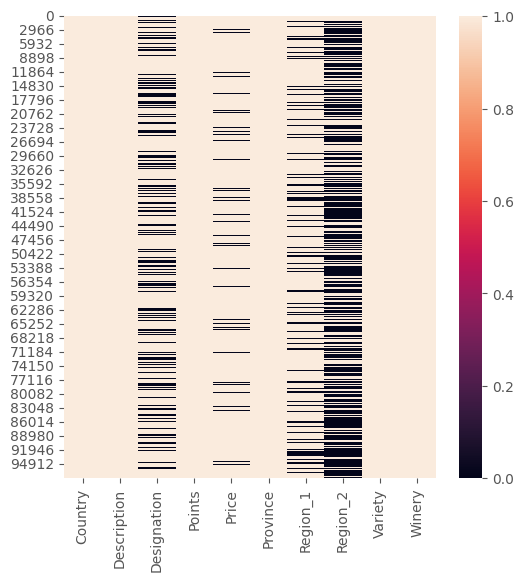

In [20]:
plt.figure(figsize=(6, 6))
sns.heatmap(reviews.notna())
plt.show()
#black stands for missing values

Now, I will visualize the missing data in this dataset using a heatmap. In the heatmap, non-missing values will be indicated by colored cells, and missing values will be shown in black, as per your description. This visualization will help us understand the distribution of missing data across different columns in the dataset. Let's generate the heatmap.

From the heatmap, we can observe the distribution of missing values across different columns. For example, if a particular column (like 'Region_2') has many black cells, it indicates that many reviews are missing data for that attribute. Conversely, columns with fewer or no black cells indicate attributes with more complete data across the reviews.

This visualization is particularly useful for understanding the completeness of the dataset and identifying which fields might require data cleaning or imputation of missing values before further analysis.

**How do we want to handle missing values?**

- We consider 'Country' to be a critical column for our anlysis.  To find the missing value we can check if the Designation column can give us a hint about the country by checking it on the internet.
- We consider 'Price' to be a critical column for our analysis. Before proceeding with row deletion, we might want to consider alternative strategies for handling missing values, such as `imputation` that replaces the missing values by group(Country) specific mean/median values.  
- We consider 'Designation', 'Province', 'Region_1' and 'Region_2' not critical columns for for our analysis and therefore will leave those rows with NaN values in DataSet.

### (3.1) Fill in the missing values in the 'Country' column

In [21]:
# Confirm DataFrame shape
reviews.shape

(97851, 10)

In [22]:
reviews[reviews["Country"].isna()]

Country                                        Description  \
1091      NaN  Delicate white flowers and a spin of lemon pee...   
1383      NaN  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
60636     NaN  From first sniff to last, the nose never makes...   

        Designation  Points  Price Province Region_1 Region_2     Variety  \
1091      Askitikos      90   17.0      NaN      NaN      NaN   Assyrtiko   
1383           Shah      90   30.0      NaN      NaN      NaN   Red Blend   
60636  Piedra Feliz      81   15.0      NaN      NaN      NaN  Pinot Noir   

          Winery  
1091    Tsililis  
1383   Büyülübağ  
60636    Chilcas

In [23]:
missing_countries_index = reviews[reviews["Country"].isna()].index
missing_countries_index

Index([1091, 1383, 60636], dtype='int64')

In [24]:
missing_designation = reviews.loc[reviews["Country"].isna()]["Designation"].value_counts().index
missing_designation

Index(['Askitikos', 'Shah', 'Piedra Feliz'], dtype='object', name='Designation')

In [25]:
# We can find the missing countries by checking over the internet the location of the wine yards(Designation)
missing_countries_dict = {"Askitikos" : "Greece", "Shah": "India", "Piedra Feliz": "Chili"}

In [26]:
mapper = pd.Series(index=missing_designation, data = missing_countries_dict)
mapper

Designation
Askitikos       Greece
Shah             India
Piedra Feliz     Chili
dtype: object

In [27]:
reviews.loc[missing_countries_index, "Designation"]

1091        Askitikos
1383             Shah
60636    Piedra Feliz
Name: Designation, dtype: object

In [28]:
reviews.loc[missing_countries_index, "Designation"].map(mapper)

1091     Greece
1383      India
60636     Chili
Name: Designation, dtype: object

In [29]:
reviews.loc[missing_countries_index, "Designation"].map(mapper).value_counts()

Designation
Greece    1
India     1
Chili     1
Name: count, dtype: int64

In [30]:
reviews["Designation"].map(mapper)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
97846    NaN
97847    NaN
97848    NaN
97849    NaN
97850    NaN
Name: Designation, Length: 97851, dtype: object

In [31]:
reviews["Designation"].map(mapper).value_counts(dropna=False)

Designation
NaN       97848
Greece        1
India         1
Chili         1
Name: count, dtype: int64

In [32]:
reviews["Country"] = reviews["Country"].fillna(reviews["Designation"].map(mapper))

## Alternative 2
# reviews.fillna({"Country": reviews["Designation"].map(mapper)}, inplace = True)

## Alternative 3
# missing_countries_designation = reviews.loc[reviews["Country"].isna(), "Designation"]
# missing_countries = missing_countries_designation.apply(lambda x: missing_countries_dict.get(x))
# reviews.loc[reviews["Country"].isna(), "Country"] = missing_countries

## Alternative 4 will be deprecated in pandas 3
# reviews["Country"].fillna(reviews["Designation"].map(mapper), inplace = True)

In [33]:
reviews.loc[missing_countries_index]

Country                                        Description  \
1091   Greece  Delicate white flowers and a spin of lemon pee...   
1383    India  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
60636   Chili  From first sniff to last, the nose never makes...   

        Designation  Points  Price Province Region_1 Region_2     Variety  \
1091      Askitikos      90   17.0      NaN      NaN      NaN   Assyrtiko   
1383           Shah      90   30.0      NaN      NaN      NaN   Red Blend   
60636  Piedra Feliz      81   15.0      NaN      NaN      NaN  Pinot Noir   

          Winery  
1091    Tsililis  
1383   Büyülübağ  
60636    Chilcas

In [34]:
# There are no more missing countries in the dataset
reviews.loc[reviews["Country"].isna()]

Empty DataFrame
Columns: [Country, Description, Designation, Points, Price, Province, Region_1, Region_2, Variety, Winery]
Index: []

In [35]:
# Show columns with at least one missing value. Optionally any(axis=1) to show per row
reviews.isna().any() 

Country        False
Description    False
Designation     True
Points         False
Price           True
Province        True
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

In [36]:
reviews.shape

(97851, 10)

### (3.2) Fill in the missing values in the 'Province' column

In [37]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97851 entries, 0 to 97850
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97851 non-null  object 
 1   Description  97851 non-null  object 
 2   Designation  67955 non-null  object 
 3   Points       97851 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97848 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97851 non-null  object 
 9   Winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [38]:
reviews[reviews["Province"].isna()]

Country                                        Description  \
1091   Greece  Delicate white flowers and a spin of lemon pee...   
1383    India  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
60636   Chili  From first sniff to last, the nose never makes...   

        Designation  Points  Price Province Region_1 Region_2     Variety  \
1091      Askitikos      90   17.0      NaN      NaN      NaN   Assyrtiko   
1383           Shah      90   30.0      NaN      NaN      NaN   Red Blend   
60636  Piedra Feliz      81   15.0      NaN      NaN      NaN  Pinot Noir   

          Winery  
1091    Tsililis  
1383   Büyülübağ  
60636    Chilcas

In [39]:
missing_province_dict = {"Tsililis": "Thessaly", "Büyülübağ": "Balıkesir", "Chilcas": "Maule Valley"}

<a href="https://www.wine-searcher.com/merchant/52134-tsililis-winery">source for "Tsililis": "Thessaly"</a>

<a href="https://en.wikipedia.org/wiki/List_of_Turkish_wine_regions">source for "Büyülübağ": "Balıkesir"</a>

<a href="https://www.vivino.com/wineries/chilcas">source for "Chilcas": "Maule Valley"</a>

In [40]:
missing_province_index = reviews[reviews["Province"].isna()].index
missing_province_index

Index([1091, 1383, 60636], dtype='int64')

In [41]:
missing_winery = reviews.loc[reviews["Province"].isna()]["Winery"].value_counts().index
missing_winery

Index(['Tsililis', 'Büyülübağ', 'Chilcas'], dtype='object', name='Winery')

In [42]:
mapper = pd.Series(index=missing_winery, data = missing_province_dict)
mapper

Winery
Tsililis         Thessaly
Büyülübağ       Balıkesir
Chilcas      Maule Valley
dtype: object

In [43]:
reviews.loc[missing_province_index, "Winery"]

1091      Tsililis
1383     Büyülübağ
60636      Chilcas
Name: Winery, dtype: object

In [44]:
reviews.loc[missing_province_index, "Winery"].map(mapper)

1091         Thessaly
1383        Balıkesir
60636    Maule Valley
Name: Winery, dtype: object

In [45]:
reviews.loc[missing_province_index, "Winery"].map(mapper).value_counts()

Winery
Thessaly        1
Balıkesir       1
Maule Valley    1
Name: count, dtype: int64

In [46]:
reviews["Winery"].map(mapper)

0        NaN
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
97846    NaN
97847    NaN
97848    NaN
97849    NaN
97850    NaN
Name: Winery, Length: 97851, dtype: object

In [47]:
reviews["Province"].map(mapper).value_counts(dropna=False)

Province
NaN    97851
Name: count, dtype: int64

In [48]:
reviews["Province"] = reviews["Province"].fillna(reviews["Winery"].map(mapper))

## Alternative 2
# reviews.fillna({"Province": reviews["Winery"].map(mapper)}, inplace = True)

## Alternative 3
# missing_province_winery = reviews.loc[reviews["Province"].isna(), "Winery"]
# missing_provinces = missing_province_winery.apply(lambda x: missing_province_dict.get(x))
# reviews.loc[reviews["Province"].isna(), "Province"] = missing_provinces

## Alternative 4 will be deprecated in pandas 3
# reviews["Province"].fillna(reviews["Winery"].map(mapper), inplace = True)

In [49]:
reviews.loc[missing_province_index]

Country                                        Description  \
1091   Greece  Delicate white flowers and a spin of lemon pee...   
1383    India  A blend of 60% Syrah, 30% Cabernet Sauvignon a...   
60636   Chili  From first sniff to last, the nose never makes...   

        Designation  Points  Price      Province Region_1 Region_2  \
1091      Askitikos      90   17.0      Thessaly      NaN      NaN   
1383           Shah      90   30.0     Balıkesir      NaN      NaN   
60636  Piedra Feliz      81   15.0  Maule Valley      NaN      NaN   

          Variety     Winery  
1091    Assyrtiko   Tsililis  
1383    Red Blend  Büyülübağ  
60636  Pinot Noir    Chilcas

In [50]:
# There are no more missing countries in the dataset
reviews.loc[reviews["Province"].isna()]

Empty DataFrame
Columns: [Country, Description, Designation, Points, Price, Province, Region_1, Region_2, Variety, Winery]
Index: []

In [51]:
# Show columns with at least one missing value. Optionally any(axis=1) to show per row
reviews.isna().any() 

Country        False
Description    False
Designation     True
Points         False
Price           True
Province       False
Region_1        True
Region_2        True
Variety        False
Winery         False
dtype: bool

In [52]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97851 entries, 0 to 97850
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97851 non-null  object 
 1   Description  97851 non-null  object 
 2   Designation  67955 non-null  object 
 3   Points       97851 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97851 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97851 non-null  object 
 9   Winery       97851 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


### (3.3) Handling missing values in Prices

In [53]:
# Shows number of missing values per column
reviews.isna().sum()

Country            0
Description        0
Designation    29896
Points             0
Price           8720
Province           0
Region_1       15932
Region_2       58360
Variety            0
Winery             0
dtype: int64

In [54]:
percentage_remaining(reviews, "Price")

{'Total records': 97851,
 'Missing price': 8720,
 'Percent remaining price': ' 91.09%',
 '% of rows where price is NaN': '8.91%'}

Is dropping 8.91% of my dataset will significantly impact the statistical power of my analysis?

[Is dropping certain percent of my dataset with NaN values will significantly impact the statistical power of my analysis?](./support_files/Is_dropping_data_with_NaN_values_will_significantly_impact_analysis.ipynb)

For a more detailed analysis of the missing 'Price' values, we will:

1. **Analyze the distribution of 'Price'**: To understand the overall distribution and identify any patterns or outliers.
2. **Check for patterns of missingness related to other variables**: To see if the missing 'Price' values are associated with specific variable like Country or other variables, suggesting a non-random distribution of NaN values. if NaN values are concentrated in a certain country then in this case dropping NaN values in price could introduce bias in our analysis.

#### (3.3.1) Analyze the distribution of 'Price'

To understand the overall distribution and identify any patterns or outliers.

Let's start with the distribution analysis of the 'Price' column where values are present.

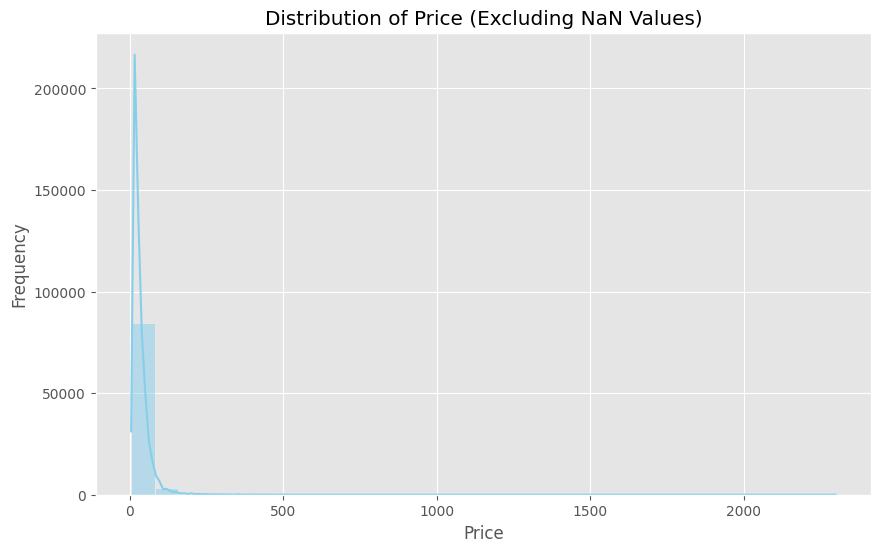

In [55]:
# Distribution analysis of 'Price' where values are present
plt.figure(figsize=(10, 6))
sns.histplot(reviews['Price'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price (Excluding NaN Values)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

To improve the visualization, we consider Log Scale: Applying a log scale to the x-axis can help manage wide data ranges and extreme values, making the distribution easier to visualize.

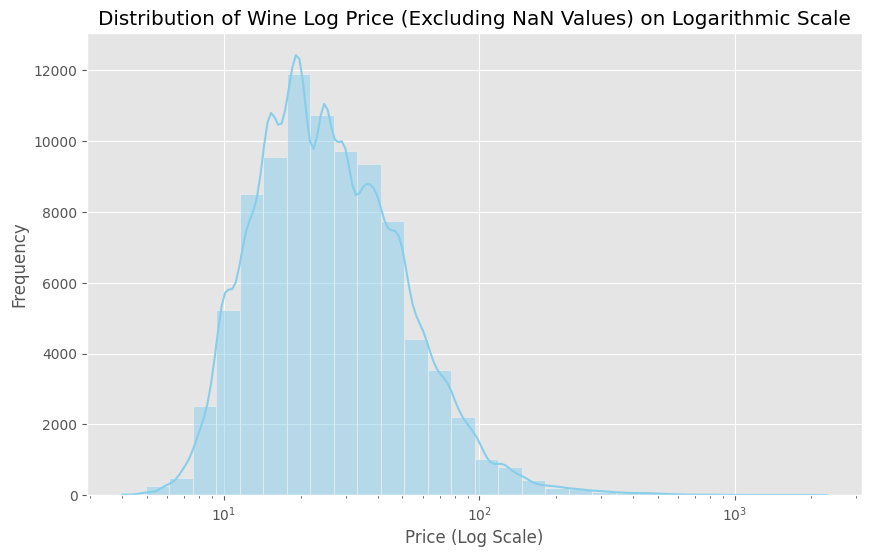

In [56]:
# Distribution analysis of 'Price' where values are present
plt.figure(figsize=(10, 6))
sns.histplot(reviews['Price'].dropna(), kde=True, bins=30, color='skyblue', log_scale=True)
plt.title('Distribution of Wine Log Price (Excluding NaN Values) on Logarithmic Scale')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Frequency')
plt.show()

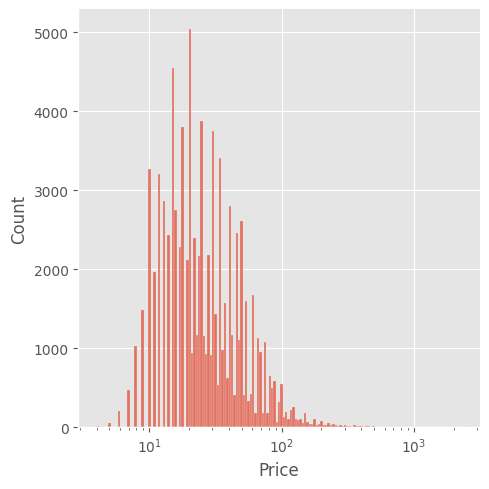

In [57]:
sns.displot(kind='hist', data=reviews, x='Price', log_scale=True);

In [58]:
# Descriptive statistics for 'Price' column
reviews['Price'].describe()

count    89131.000000
mean        33.658783
std         37.670180
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: Price, dtype: float64

The histogram shows the distribution of 'Price' values, excluding NaNs, in my dataset. The distribution is right-skewed, with most of the wines priced below USD 100, and a few outliers extending up to USD 2300. The summary statistics reveal a mean price of approximately USD 33.66, with a median (50th percentile) of USD 25, indicating that higher-priced wines are pulling the mean upward.

#### (3.3.2) Can we simply drop rows with missing Price values?

Given the above price distribution, it's important to consider how dropping rows with NaN values in 'Price' might affect our analysis. If the missing values are randomly distributed across different countries, their removal might not significantly distort the overall distribution. `However, if NaN values are concentrated in certain country, this could introduce bias. So if there is a pattern in missing 'Price' values related to 'Country' variable that means that NaN values are not randomly distributed and this could introduce bias.`

Next, let's investigate if there's a pattern in the missing 'Price' values related to the 'Country' variable in the dataset. Let's see if the missing 'Price' values are associated with a specific country, suggesting a non-random distribution of NaN values.

Lets count the number of missing prices per countries:

In [59]:
nr_of_missing_prices_per_country = reviews.loc[reviews["Price"].isna(), "Country"].value_counts().rename("nr_of_missing_prices_per_country")
# nr_countries_with_missing_prices
nr_of_missing_prices_per_country

Country
France          4273
Italy           2695
Portugal         781
Austria          362
US               193
New Zealand      119
Spain             73
Australia         54
Germany           47
Chile             35
Argentina         27
South Africa      17
Israel            16
Slovenia           7
Greece             6
Uruguay            3
Croatia            3
Egypt              3
Tunisia            2
England            1
Turkey             1
Canada             1
Hungary            1
Name: nr_of_missing_prices_per_country, dtype: int64

Then, lets count the total number of reviews per countries:

In [60]:
total_nr_of_reviews_per_countries = reviews["Country"].value_counts().rename("total_nr_of_reviews_per_countries")
# total_nr_of_countries
total_nr_of_reviews_per_countries

Country
US                        40544
Italy                     14850
France                    14459
Spain                      5443
Chile                      3735
Portugal                   3508
Argentina                  3447
Australia                  3152
Austria                    1959
New Zealand                1865
Germany                    1529
South Africa               1481
Greece                      542
Israel                      370
Canada                      149
Hungary                     139
Romania                     106
Slovenia                     72
Croatia                      70
Bulgaria                     56
Mexico                       54
Uruguay                      52
Moldova                      46
Turkey                       46
Georgia                      30
Lebanon                      27
Cyprus                       15
Brazil                       14
Macedonia                    12
Morocco                      11
Serbia                       10


In [61]:
missing_price_percent_per_country = (nr_of_missing_prices_per_country/total_nr_of_reviews_per_countries * 100).dropna().sort_values(ascending=False).rename("missing_price_percent_per_country")
# missing_price_percent
missing_price_percent_per_country

Country
Egypt           100.000000
Tunisia         100.000000
France           29.552528
Portugal         22.263398
Austria          18.478816
Italy            18.148148
England          11.111111
Slovenia          9.722222
New Zealand       6.380697
Uruguay           5.769231
Israel            4.324324
Croatia           4.285714
Germany           3.073905
Turkey            2.173913
Australia         1.713198
Spain             1.341172
South Africa      1.147873
Greece            1.107011
Chile             0.937082
Argentina         0.783290
Hungary           0.719424
Canada            0.671141
US                0.476026
Name: missing_price_percent_per_country, dtype: float64

In [62]:
merged_df = missing_price_percent_per_country.to_frame().merge(total_nr_of_reviews_per_countries.to_frame(), on='Country', how="left")

In [63]:
merged_df["missing_prices_per_country"] = (merged_df["missing_price_percent_per_country"]/100) * merged_df["total_nr_of_reviews_per_countries"]

In [64]:
merged_df.sort_values("total_nr_of_reviews_per_countries", ascending=False, inplace=True)

In [65]:
merged_df

missing_price_percent_per_country  \
Country                                           
US                                     0.476026   
Italy                                 18.148148   
France                                29.552528   
Spain                                  1.341172   
Chile                                  0.937082   
Portugal                              22.263398   
Argentina                              0.783290   
Australia                              1.713198   
Austria                               18.478816   
New Zealand                            6.380697   
Germany                                3.073905   
South Africa                           1.147873   
Greece                                 1.107011   
Israel                                 4.324324   
Canada                                 0.671141   
Hungary                                0.719424   
Slovenia                               9.722222   
Croatia                                4.285714   
Uruguay                                5.769231   
Turkey                                 2.173913   
England                               11.111111   
Egypt                                100.000000   
Tunisia                              100.000000   

              total_nr_of_reviews_per_countries  missing_prices_per_country  
Country                                                                      
US                                        40544                       193.0  
Italy                                     14850                      2695.0  
France                                    14459                      4273.0  
Spain                                      5443                        73.0  
Chile                                      3735                        35.0  
Portugal                                   3508                       781.0  
Argentina                                  3447                        27.0  
Australia                                  3152                        54.0  
Austria                                    1959                       362.0  
New Zealand                                1865                       119.0  
Germany                                    1529                        47.0  
South Africa                               1481                        17.0  
Greece                                      542                         6.0  
Israel                                      370                        16.0  
Canada                                      149                         1.0  
Hungary                                     139                         1.0  
Slovenia                                     72                         7.0  
Croatia                                      70                         3.0  
Uruguay                                      52                         3.0  
Turkey                                       46                         1.0  
England                                       9                         1.0  
Egypt                                         3                         3.0  
Tunisia                                       2                         2.0

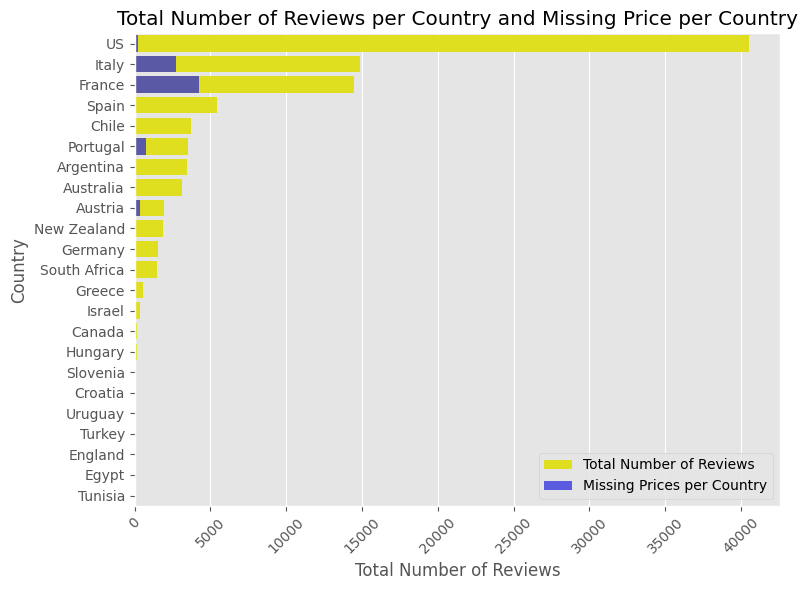

In [66]:
plt.figure(figsize=(8, 6))
sns.barplot(data=merged_df, y='Country', x='total_nr_of_reviews_per_countries', color='yellow', label='Total Number of Reviews')
sns.barplot(data=merged_df, y='Country', x='missing_prices_per_country', color='blue', alpha=0.7, label='Missing Prices per Country')
plt.title('Total Number of Reviews per Country and Missing Price per Country')
plt.ylabel('Country')
plt.xlabel('Total Number of Reviews')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [67]:
reviews["Country"].nunique()

49

These percentages give an insight into the completeness of wine price data across the top wine-producing countries, showing a wide range from less than 1% to nearly 30% missing prices. Egypt and Tunisia countries we can drop completely as they have only two and three observations respectively with all missing prices.

Based on the percentages of missing wine prices, it appears that the impact of removing rows with missing prices would indeed vary significantly by country, depending on the proportion of data affected.

For countries like the US, Argentina, Spain, Chile, Argentina, Australia, New Zealand, Germany,   South Africa, Greece, Israel, Canada, Hungary, Slovenia, Croatia, Uruguay, Turkey, England the percentages of missing prices are relatively low (ranging from about 0.41% to 7.53%). Removing rows with missing prices for these countries would likely have a minimal impact on the overall analysis due to the small proportion of data affected. This suggests that for these countries, we would still retain a substantial portion of your dataset, maintaining the integrity and representativeness of your analysis.

On the other hand, for countries like Italy, France, Portugal and Austria, where the percentages of missing prices are much higher (ranging from about 18.15% to 29.55%), removing rows with missing prices could have a more significant impact on your analysis. For these countries, a considerable portion of our data would be removed, which could potentially affect the representativeness and reliability of our analysis. The higher the percentage of missing data, the more cautious we should be about the potential bias introduced by removing these rows.

**The Conclusion:**

We can deduct that dropping rows with NaN values in 'Price' for countries like Italy, France, Portugal, and Austria might affect our analysis. For those countries the missing price values are not randomly distributed across the range, their removal might significantly distort the overall distribution. It is noticeable that NaN values are concentrated in those countries. Thus removing missing prices in those countries will introduce bias. There is a pattern in missing price values related to Italy, France, Portugal, and Austria countries that means that NaN values are not randomly distributed and this could introduce bias.

#### (3.3.3) Remove Tunisia and Egypt as number of reviews are too small and there are no availible prices

Lets remove Tunisia and Egypt from dataset as those countries have no prices for any of their wines reviews:

In [68]:
reviews.shape

(97851, 10)

In [69]:
reviews.loc[reviews["Country"].isin(["Tunisia", "Egypt"])]

Country                                        Description  \
88224    Egypt  Ripe pear, apple and tropical fruit in the nos...   
88250    Egypt  This fresh, approachable Chenin starts with br...   
88386    Egypt  The character of this feminine, aromatic Viogn...   
91901  Tunisia  An irresistible rosé from Tunisia (made by Sic...   
92793  Tunisia  Sicily's Calatrasi is also present in Tunisia ...   

                 Designation  Points  Price Province Region_1 Region_2  \
88224  Caspar Blanc de Noirs      84    NaN    Egypt      NaN      NaN   
88250                 Caspar      84    NaN    Egypt      NaN      NaN   
88386                    NaN      83    NaN    Egypt      NaN      NaN   
91901         Selian Mystère      87    NaN  Tunisia      NaN      NaN   
92793                 Selian      85    NaN  Tunisia      NaN      NaN   

            Variety            Winery  
88224      Grenache  Sahara Vineyards  
88250  Chenin Blanc  Sahara Vineyards  
88386      Viognier  Sahara Vineyards  
91901          Rosé   Domaine Neferis  
92793   White Blend   Domaine Neferis

In [70]:
tunisia_egypt_index = reviews.loc[reviews["Country"].isin(["Tunisia", "Egypt"])].index
tunisia_egypt_index

Index([88224, 88250, 88386, 91901, 92793], dtype='int64')

In [71]:
reviews.drop(tunisia_egypt_index, inplace=True)

In [72]:
reviews.loc[reviews["Country"].isin(["Tunisia", "Egypt"])]

Empty DataFrame
Columns: [Country, Description, Designation, Points, Price, Province, Region_1, Region_2, Variety, Winery]
Index: []

In [73]:
reviews.reset_index(drop=True, inplace=True)

In [74]:
reviews.shape

(97846, 10)

#### (3.3.4) Which Approach to take to fill out missing prices? Group Median Imputation approach vs KNN Imputation Approach

Relevance to Data: If the price is strongly influenced by "Country" and "Province," and there's low variance within these groups, the group median approach might be quite effective and efficient. However, if other factors (e.g., "Variety," "Winery," "Points") also significantly influence the price, KNN might capture these nuances better, assuming an appropriate feature set is used.

To determine if there is low variance within groups defined by "Country" and "Province" in terms of price, you can calculate the variance (or a similar measure of spread, such as the standard deviation) of the "Price" column within each group. A low variance within a group would indicate that the prices are relatively similar, suggesting that using the group median could be a reasonable approach for imputation.

Here's a step-by-step guide on how you can calculate and examine the variance of price within each "Country" and "Province" group:

1. **Group the Data**: Use the `groupby` method on your DataFrame to create groups based on "Country" and "Province".

2. **Calculate Variance**: Apply the `var` function to the "Price" column within each group to calculate the variance. Alternatively, you could use `std` to calculate the standard deviation, which might be more interpretable as it's in the same units as the price.

3. **Analyze the Results**: Examine the calculated variances or standard deviations to assess the homogeneity of prices within each group. Low values indicate low variability (homogeneity), while high values indicate high variability.

Below is a sample code snippet that demonstrates how to perform these steps:


In [75]:
# Group the data by 'Country' and 'Province' and calculate variance and standard deviation of 'Price'
variance_by_group = reviews.groupby(['Country', 'Province'])['Price'].var()
std_dev_by_group = reviews.groupby(['Country', 'Province'])['Price'].std()

# Convert the series to DataFrames for better readability
variance_df = variance_by_group.reset_index(name='Var')
std_dev_df = std_dev_by_group.reset_index(name='Std')

In [76]:
std_dev_df.merge(variance_df)

Country          Province        Std         Var
0      Albania           Mirditë        NaN         NaN
1    Argentina  Mendoza Province  20.166180  406.674811
2    Argentina             Other  23.389043  547.047350
3    Australia   Australia Other   6.383623   40.750639
4    Australia   New South Wales  15.017062  225.512153
..         ...               ...        ...         ...
451    Uruguay           Juanico  18.093014  327.357143
452    Uruguay        Montevideo  16.041613  257.333333
453    Uruguay          Progreso  12.935739  167.333333
454    Uruguay          San Jose  17.547080  307.900000
455    Uruguay           Uruguay  11.349476  128.810606

[456 rows x 4 columns]

In [77]:
# Calculate summary statistics for variance and standard deviation
variance_summary = variance_df['Var'].describe()
std_dev_summary = std_dev_df['Std'].describe()

In [78]:
pd.concat([std_dev_summary, variance_summary], axis=1)

Std           Var
count  367.000000    367.000000
mean    14.255201    495.547981
std     17.121213   1658.778219
min      0.000000      0.000000
25%      4.868442     23.708333
50%     10.264310    105.356061
75%     17.297446    299.202116
max    130.631445  17064.574468

In [79]:
# Identify high variability groups based on variance and standard deviation being above the 75th percentile
high_variance_threshold = variance_summary['75%']
high_std_dev_threshold = std_dev_summary['75%']

high_variance_groups = variance_df[variance_df['Var'] > high_variance_threshold]
high_std_dev_groups = std_dev_df[std_dev_df['Std'] > high_std_dev_threshold]

# Identify low variability groups based on variance and standard deviation being below the 25th percentile
low_variance_threshold = variance_summary['25%']
low_std_dev_threshold = std_dev_summary['25%']

low_variance_groups = variance_df[variance_df['Var'] <= low_variance_threshold]
low_std_dev_groups = std_dev_df[std_dev_df['Std'] <= low_std_dev_threshold]

# Summary statistics, high variability, and low variability groups data
high_variance_groups.shape[0], high_std_dev_groups.shape[0], low_variance_groups.shape[0], low_std_dev_groups.shape[0]

(92, 92, 92, 92)


To provide a complete analysis and conclusion based on the variance and standard deviation of the "Price" column within each "Country" and "Province" group, let's delve deeper into the data. We'll examine the distribution of variance and standard deviation across all groups to understand the overall trend in price variability. This will help us determine the suitability of using the group median for imputing missing values.

##### Analysis
1. **Summary Statistics**: We'll look at the summary statistics (mean, median, min, max) for both variance and standard deviation across all groups to get an overview of the spread and central tendency.
2. **High Variability Groups**: Identify groups with particularly high variance and standard deviation, which indicate significant price diversity.
3. **Low Variability Groups**: Highlight groups with low variance and standard deviation, where prices are more homogeneous.

Following this analysis, we will draw conclusions regarding the appropriateness of using the group median for imputation in different segments of the dataset.

Let's start by examining the summary statistics for both variance and standard deviation.

**Summary Statistics**
- **Variance**: The variance across groups has a wide range, from 0 to approximately 17,064, with a mean of around 495 and a median of about 105. The substantial standard deviation of variance (around 1,658) indicates significant diversity in price variability among groups.
- **Standard Deviation**: Similar to variance, the standard deviation of prices also varies widely, from 0 to around 130, with a mean of approximately 14 and a median of nearly 10. The standard deviation of the standard deviation itself (around 17) further confirms the diverse price spread within groups.

**High Variability Groups**
- There are 92 groups with variance and standard deviation above the 75th percentile, indicating these groups have higher price variability compared to others. Imputing missing values using the group median in these groups might not be as effective due to the significant spread of prices.

**Low Variability Groups**
- Conversely, 92 groups have variance and standard deviation below the 25th percentile, suggesting more homogeneous price points within these groups. For these groups, using the group median for imputation could be more justified and likely to yield reasonable estimates for missing prices.

**Conclusion**
The analysis reveals a significant variance in price variability across different "Country" and "Province" groups. While a 92 number of groups exhibit high price variability, making the group median a less reliable imputation method for these, there's also the same number of groups (92) with low price variability, where the group median could serve as a viable imputation approach.

Given this diversity, a one-size-fits-all approach may not be optimal. For groups with low variability, the group median can be a simple and effective method for imputing missing values. However, for groups with high variability, alternative imputation methods that can account for the broader spread of prices—such as KNN imputation, which considers multiple features, or even more sophisticated models that can capture complex relationships within the data—may yield more accurate results.

In practice, we might consider a hybrid approach: use the group median for low variability groups and explore KNN imputation methods for high variability groups. 
However, for simplicity reasons, we will have two scenarios. In the first scenario, we will use the group median approach on the complete dataset. In the second scenario, we will use KNN imputation approach on complete dataset.

#### (3.3.5) **Hybrid approach**: use the group median for low variability groups and use KNN imputation methods for high variability groups. **reviews_hybrid created**

To address your request for filling out missing prices based on a hybrid approach—using group median for low variability groups and KNN imputation for high variability groups—we'll follow these steps:

1. **Calculate Variability**: Calculate the variance and standard deviation of the "Price" column within each "Country" and "Province" group to identify low and high variability groups.
2. **Apply Hybrid Imputation**:
   - For groups with low variability (defined as having variance and standard deviation below the 25th percentile), we'll impute missing "Price" values using the group median.
   - For groups with high variability (defined as having variance and standard deviation above the 75th percentile), we'll apply KNN imputation.

Using a hybrid approach that combines group median and KNN imputation based on criteria such as low standard deviation is not a standard practice per se, but it can be a very effective strategy in certain contexts, especially when dealing with datasets that exhibit heterogeneity in their features. It is quite useful where there are distinct low and high-variance groups with a relative number of missing values that need to be filled out.

In [80]:
# Assuming 'reviews' is your DataFrame

# 1. Total Missing "Price" Values
total_missing_prices = reviews['Price'].isnull().sum()

# 2. Total Number of Groups
total_groups = reviews.groupby(['Country', 'Province']).size().reset_index(name='Count')
total_group_count = len(total_groups)

# 3. Standard Deviation by Group and Thresholds for Low/High Std Dev Groups
std_dev_by_group = reviews.groupby(['Country', 'Province'])['Price'].std().reset_index(name='StdDev')
low_std_dev_threshold = std_dev_by_group['StdDev'].quantile(0.25)
high_std_dev_threshold = std_dev_by_group['StdDev'].quantile(0.75)

# 4. Low Standard Deviation Groups
low_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'] <= low_std_dev_threshold]
low_std_dev_group_count = len(low_std_dev_groups)

# 5. High Standard Deviation Groups
high_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'] >= high_std_dev_threshold]
high_std_dev_group_count = len(high_std_dev_groups)

# 6. Middle Standard Deviation Groups
# Exclude groups that are in the low or high standard deviation categories
middle_std_dev_groups = std_dev_by_group[(std_dev_by_group['StdDev'] > low_std_dev_threshold) & 
                                         (std_dev_by_group['StdDev'] < high_std_dev_threshold)]
middle_std_dev_group_count = len(middle_std_dev_groups)

# 7. Missing Prices in Low/Middle/High Std Dev Groups
missing_prices_low_std_dev = reviews[reviews['Price'].isnull() & 
                                      reviews.set_index(['Country', 'Province']).index.isin(low_std_dev_groups.set_index(['Country', 'Province']).index)].shape[0]
missing_prices_high_std_dev = reviews[reviews['Price'].isnull() & 
                                       reviews.set_index(['Country', 'Province']).index.isin(high_std_dev_groups.set_index(['Country', 'Province']).index)].shape[0]
missing_prices_middle_std_dev = reviews[reviews['Price'].isnull() & 
                                        reviews.set_index(['Country', 'Province']).index.isin(middle_std_dev_groups.set_index(['Country', 'Province']).index)].shape[0]

# Sum of missing 'Price' values in all three categories
sum_missing_prices_by_group = missing_prices_low_std_dev + missing_prices_high_std_dev + missing_prices_middle_std_dev

# Check for groups with undefined standard deviation (all 'Price' values missing in the group)
undefined_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'].isnull()]
missing_prices_undefined_std_dev = reviews[reviews['Price'].isnull() & 
                                            reviews.set_index(['Country', 'Province']).index.isin(undefined_std_dev_groups.set_index(['Country', 'Province']).index)].shape[0]

# Filter for groups with undefined standard deviation due to all 'Price' values being missing
# undefined_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'].isnull()]

# Summary
print(f"Total missing 'Price' values: {total_missing_prices}")
print(f"Total number of groups: {total_group_count}")

print(f"Number of low standard deviation groups: {low_std_dev_group_count}")
print(f"Missing 'Price' values in low standard deviation groups: {missing_prices_low_std_dev}")

print(f"Number of high standard deviation groups: {high_std_dev_group_count}")
print(f"Missing 'Price' values in high standard deviation groups: {missing_prices_high_std_dev}")

print(f"Number of middle standard deviation groups: {middle_std_dev_group_count}")
print(f"Missing 'Price' values in middle standard deviation groups: {missing_prices_middle_std_dev}")

print(f"Sum of missing 'Price' values in low, middle, and high std dev groups: {sum_missing_prices_by_group}")

# Check if the totals match
if total_missing_prices == sum_missing_prices_by_group:
    print("The total missing 'Price' values match the sum of missing values in low, middle, and high std dev groups.")
else:
    print(f"There's a discrepancy({total_missing_prices-sum_missing_prices_by_group} missing values) in the total missing 'Price' values and the sum from the groups.")

print(f"Number of groups with undefined standard deviation: {len(undefined_std_dev_groups)}")
print(f"Missing 'Price' values in groups with undefined standard deviation: {missing_prices_undefined_std_dev}")
# print(undefined_std_dev_groups)

Total missing 'Price' values: 8715
Total number of groups: 456
Number of low standard deviation groups: 92
Missing 'Price' values in low standard deviation groups: 10
Number of high standard deviation groups: 92
Missing 'Price' values in high standard deviation groups: 7436
Number of middle standard deviation groups: 183
Missing 'Price' values in middle standard deviation groups: 1252
Sum of missing 'Price' values in low, middle, and high std dev groups: 8698
There's a discrepancy(17 missing values) in the total missing 'Price' values and the sum from the groups.
Number of groups with undefined standard deviation: 89
Missing 'Price' values in groups with undefined standard deviation: 17


We will split dataset into two parts and use custom approach to impute each part:
1) First we will impute missing 'Price' values in group with undefined standard deviation. Those 17 groups.
2) Second we will impute missing 'Prices' in Low standard deviation groups(92). We will apply median group imputation on group (Country, Province).
3) For the rest of the dataset we will use  KNN imputation.

##### **(3.3.5.1) Option one - Spliting datasets into two. One dataset use for group media approach and another dataset use for KNN approach. Then merge two datasets**

In [81]:
reviews_hybrid = reviews.copy()

In [82]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [83]:
# Step 1: Identify groups with undefined standard deviation and impute using Country median
std_dev_by_group = reviews_hybrid.groupby(['Country', 'Province'])['Price'].std().reset_index(name='StdDev')
undefined_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'].isnull()]
country_median_prices = reviews_hybrid.groupby('Country')['Price'].median()

for index, row in undefined_std_dev_groups.iterrows():
    country = row['Country']
    province = row['Province']
    if not pd.isnull(country_median_prices[country]):
        missing_price_mask = (reviews_hybrid['Country'] == country) & (reviews_hybrid['Province'] == province) & reviews_hybrid['Price'].isnull()
        reviews_hybrid.loc[missing_price_mask, 'Price'] = country_median_prices[country]

In [84]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89148 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [85]:
reviews_hybrid["Price"].count() - reviews["Price"].count()

17

So fo those 17 values with missing median, or standard deviation we replace values with Country group median price.

In [86]:
# Step 2: Identify low standard deviation groups
std_dev_by_group = reviews_hybrid.groupby(['Country', 'Province'])['Price'].std()
low_std_dev_threshold = std_dev_by_group.describe()['25%']
low_std_dev_groups = std_dev_by_group[std_dev_by_group <= low_std_dev_threshold].index

In [87]:
low_std_dev_groups

MultiIndex([(               'Austria',                     'Steiermark'),
            (               'Austria',            'Weinland Österreich'),
            ('Bosnia and Herzegovina',                         'Mostar'),
            (                'Brazil',                 'Santa Catarina'),
            (              'Bulgaria',              'Black Sea Coastal'),
            (              'Bulgaria',                       'Bulgaria'),
            (              'Bulgaria',            'Danube River Plains'),
            (              'Bulgaria',                         'Sliven'),
            (                'Canada',                   'Canada Other'),
            (                 'Chile',                 'Bío Bío Valley'),
            (                 'Chile',               'Cauquenes Valley'),
            (                 'Chile',                  'Choapa Valley'),
            (                 'Chile',       'Curicó and Leyda Valleys'),
            (                 'Chile',

In [88]:
# Step 3: Split the dataset
# Subset for group median imputation
group_median_subset = pd.concat([reviews_hybrid[(reviews_hybrid['Country'] == country) & 
                                 (reviews_hybrid['Province'] == province)] 
                                 for country, province in low_std_dev_groups])

In [89]:
group_median_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 34442 to 22914
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      507 non-null    object 
 1   Description  507 non-null    object 
 2   Designation  349 non-null    object 
 3   Points       507 non-null    int64  
 4   Price        497 non-null    float64
 5   Province     507 non-null    object 
 6   Region_1     25 non-null     object 
 7   Region_2     0 non-null      object 
 8   Variety      507 non-null    object 
 9   Winery       507 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 43.6+ KB


In [90]:
group_median_subset.head(2)

Country                                        Description  \
34442  Austria  Bright, fruity Sauvignon Blanc that has a touc...   
35638  Austria  There is just a hint of perfume on this orange...   

              Designation  Points  Price    Province Region_1 Region_2  \
34442  Steirische Klassik      89    NaN  Steiermark      NaN      NaN   
35638  Steirische Klassik      88    NaN  Steiermark      NaN      NaN   

                  Variety      Winery  
34442     Sauvignon Blanc  Neumeister  
35638  Gelber Muskateller  Neumeister

In [91]:
group_median_subset.shape

(507, 10)

In [92]:
# Subset for KNN imputation
knn_subset = reviews_hybrid.drop(group_median_subset.index)

In [93]:
knn_subset.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez

In [94]:
knn_subset.shape

(97339, 10)

In [95]:
# Step 4.1: Impute missing values Group median imputation
for country, province in low_std_dev_groups:
    median_price = group_median_subset[(group_median_subset['Country'] == country) & 
                                       (group_median_subset['Province'] == province)]['Price'].median()
    group_median_subset.loc[(group_median_subset['Country'] == country) & 
                            (group_median_subset['Province'] == province) & 
                            (group_median_subset['Price'].isnull()), 'Price'] = median_price

In [96]:
group_median_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 507 entries, 34442 to 22914
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      507 non-null    object 
 1   Description  507 non-null    object 
 2   Designation  349 non-null    object 
 3   Points       507 non-null    int64  
 4   Price        507 non-null    float64
 5   Province     507 non-null    object 
 6   Region_1     25 non-null     object 
 7   Region_2     0 non-null      object 
 8   Variety      507 non-null    object 
 9   Winery       507 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 43.6+ KB


In [97]:
knn_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97339 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97339 non-null  object 
 1   Description  97339 non-null  object 
 2   Designation  67602 non-null  object 
 3   Points       97339 non-null  int64  
 4   Price        88651 non-null  float64
 5   Province     97339 non-null  object 
 6   Region_1     81894 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97339 non-null  object 
 9   Winery       97339 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


In [98]:
# Step 4.2: Impute missing values KNN imputation 
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder


# Encode categorical columns
categorical_columns = ['Country', 'Province', 'Region_1', 'Region_2', 'Variety', 'Winery']  # Adjust as needed
encoded_data = knn_subset.copy()

for column in categorical_columns:
    encoded_data[column] = encoded_data[column].fillna('Unknown')
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column].astype(str))

# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

# Select numerical columns for imputation (including encoded categorical columns if relevant)
# Adjust this selection based on your data's requirements
numerical_columns = encoded_data.select_dtypes(include=['float64', 'int64']).columns

# Perform imputation on selected columns
imputed_data = imputer.fit_transform(encoded_data[numerical_columns])

# Create a DataFrame from the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns)

In [99]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97339 entries, 0 to 97338
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   97339 non-null  float64
 1   Points    97339 non-null  float64
 2   Price     97339 non-null  float64
 3   Province  97339 non-null  float64
 4   Region_1  97339 non-null  float64
 5   Region_2  97339 non-null  float64
 6   Variety   97339 non-null  float64
 7   Winery    97339 non-null  float64
dtypes: float64(8)
memory usage: 5.9 MB


In [100]:
knn_subset

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97841                          Bungalow Red      84   15.0        California   
97842                     30-year old tawny      84    NaN              Port   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   
97845                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97841     Santa Barbara County      Central Coast      Syrah-Grenache   
97842                      NaN                NaN                Port   
97843               California   California Other              Merlot   
97844               Uco Valley                NaN     Sauvignon Blanc   
97845  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97841            Casa Barranca  
97842       Casa Santa Eufemia  
97843                 Delicato  
97844        Finca El Portillo  
97845            Jacob's Creek  

[97339 rows x 10 columns]

In [101]:
# reset_index
knn_subset.reset_index(drop=True, inplace=True)

In [102]:
knn_subset

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97334         US  A Syrah-Grenache blend that's dry and rustical...   
97335   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97336         US  Outside of the vineyard, wines like this are w...   
97337  Argentina  Heavy and basic, with melon and pineapple arom...   
97338  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97334                          Bungalow Red      84   15.0        California   
97335                     30-year old tawny      84    NaN              Port   
97336                                   NaN      84    6.0        California   
97337                                   NaN      84    9.0  Mendoza Province   
97338                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97334     Santa Barbara County      Central Coast      Syrah-Grenache   
97335                      NaN                NaN                Port   
97336               California   California Other              Merlot   
97337               Uco Valley                NaN     Sauvignon Blanc   
97338  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97334            Casa Barranca  
97335       Casa Santa Eufemia  
97336                 Delicato  
97337        Finca El Portillo  
97338            Jacob's Creek  

[97339 rows x 10 columns]

Replace Price column in knn_subset with filled out prices from imputed_df:

In [103]:
knn_subset["Price"] = imputed_df["Price"]

In [104]:
knn_subset

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97334         US  A Syrah-Grenache blend that's dry and rustical...   
97335   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97336         US  Outside of the vineyard, wines like this are w...   
97337  Argentina  Heavy and basic, with melon and pineapple arom...   
97338  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97334                          Bungalow Red      84   15.0        California   
97335                     30-year old tawny      84   14.8              Port   
97336                                   NaN      84    6.0        California   
97337                                   NaN      84    9.0  Mendoza Province   
97338                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97334     Santa Barbara County      Central Coast      Syrah-Grenache   
97335                      NaN                NaN                Port   
97336               California   California Other              Merlot   
97337               Uco Valley                NaN     Sauvignon Blanc   
97338  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97334            Casa Barranca  
97335       Casa Santa Eufemia  
97336                 Delicato  
97337        Finca El Portillo  
97338            Jacob's Creek  

[97339 rows x 10 columns]

In [105]:
knn_subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97339 entries, 0 to 97338
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97339 non-null  object 
 1   Description  97339 non-null  object 
 2   Designation  67602 non-null  object 
 3   Points       97339 non-null  int64  
 4   Price        97339 non-null  float64
 5   Province     97339 non-null  object 
 6   Region_1     81894 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97339 non-null  object 
 9   Winery       97339 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.4+ MB


In [106]:
# Step 5: Combine the datasets
combined_dataset = pd.concat([group_median_subset, knn_subset])

In [107]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97846 entries, 34442 to 97338
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        97846 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 8.2+ MB


In [108]:
combined_dataset

Country                                        Description  \
34442    Austria  Bright, fruity Sauvignon Blanc that has a touc...   
35638    Austria  There is just a hint of perfume on this orange...   
37150    Austria  Faint lemon zest and a touch of green pear har...   
37392    Austria  Peach hovers subtly around the nose, and ripen...   
38226    Austria  Yellow and green pear, leaves of lemon balm an...   
...          ...                                                ...   
97334         US  A Syrah-Grenache blend that's dry and rustical...   
97335   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97336         US  Outside of the vineyard, wines like this are w...   
97337  Argentina  Heavy and basic, with melon and pineapple arom...   
97338  Australia  Smooth in the mouth, this Chard starts off wit...   

              Designation  Points  Price          Province  \
34442  Steirische Klassik      89   19.5        Steiermark   
35638  Steirische Klassik      88   19.5        Steiermark   
37150             Classic      90   21.0        Steiermark   
37392             Classic      89   25.0        Steiermark   
38226  Sämling 88 Classic      89   18.0        Steiermark   
...                   ...     ...    ...               ...   
97334        Bungalow Red      84   15.0        California   
97335   30-year old tawny      84   14.8              Port   
97336                 NaN      84    6.0        California   
97337                 NaN      84    9.0  Mendoza Province   
97338                 NaN      84    8.0   Australia Other   

                      Region_1          Region_2             Variety  \
34442                      NaN               NaN     Sauvignon Blanc   
35638                      NaN               NaN  Gelber Muskateller   
37150                      NaN               NaN          Chardonnay   
37392                      NaN               NaN     Sauvignon Blanc   
38226                      NaN               NaN           Scheurebe   
...                        ...               ...                 ...   
97334     Santa Barbara County     Central Coast      Syrah-Grenache   
97335                      NaN               NaN                Port   
97336               California  California Other              Merlot   
97337               Uco Valley               NaN     Sauvignon Blanc   
97338  South Eastern Australia               NaN          Chardonnay   

                   Winery  
34442          Neumeister  
35638          Neumeister  
37150             Strauss  
37392             Strauss  
38226             Strauss  
...                   ...  
97334       Casa Barranca  
97335  Casa Santa Eufemia  
97336            Delicato  
97337   Finca El Portillo  
97338       Jacob's Creek  

[97846 rows x 10 columns]

In [109]:
# Reset index
combined_dataset.reset_index(drop=True, inplace=True)

In [110]:
combined_dataset

Country                                        Description  \
0        Austria  Bright, fruity Sauvignon Blanc that has a touc...   
1        Austria  There is just a hint of perfume on this orange...   
2        Austria  Faint lemon zest and a touch of green pear har...   
3        Austria  Peach hovers subtly around the nose, and ripen...   
4        Austria  Yellow and green pear, leaves of lemon balm an...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

              Designation  Points  Price          Province  \
0      Steirische Klassik      89   19.5        Steiermark   
1      Steirische Klassik      88   19.5        Steiermark   
2                 Classic      90   21.0        Steiermark   
3                 Classic      89   25.0        Steiermark   
4      Sämling 88 Classic      89   18.0        Steiermark   
...                   ...     ...    ...               ...   
97841        Bungalow Red      84   15.0        California   
97842   30-year old tawny      84   14.8              Port   
97843                 NaN      84    6.0        California   
97844                 NaN      84    9.0  Mendoza Province   
97845                 NaN      84    8.0   Australia Other   

                      Region_1          Region_2             Variety  \
0                          NaN               NaN     Sauvignon Blanc   
1                          NaN               NaN  Gelber Muskateller   
2                          NaN               NaN          Chardonnay   
3                          NaN               NaN     Sauvignon Blanc   
4                          NaN               NaN           Scheurebe   
...                        ...               ...                 ...   
97841     Santa Barbara County     Central Coast      Syrah-Grenache   
97842                      NaN               NaN                Port   
97843               California  California Other              Merlot   
97844               Uco Valley               NaN     Sauvignon Blanc   
97845  South Eastern Australia               NaN          Chardonnay   

                   Winery  
0              Neumeister  
1              Neumeister  
2                 Strauss  
3                 Strauss  
4                 Strauss  
...                   ...  
97841       Casa Barranca  
97842  Casa Santa Eufemia  
97843            Delicato  
97844   Finca El Portillo  
97845       Jacob's Creek  

[97846 rows x 10 columns]

##### **(3.3.5.2) Option Two (Best) - performing inplace Imputation for both group median and KNN approaches**.

1. **Identify groups with undefined standard deviation and impute using Country median**

In [111]:
reviews_hybrid = reviews.copy()

In [112]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [113]:
std_dev_by_group = reviews_hybrid.groupby(['Country', 'Province'])['Price'].std().reset_index(name='StdDev')
undefined_std_dev_groups = std_dev_by_group[std_dev_by_group['StdDev'].isnull()]
country_median_prices = reviews_hybrid.groupby('Country')['Price'].median()

for index, row in undefined_std_dev_groups.iterrows():
    country = row['Country']
    province = row['Province']
    if not pd.isnull(country_median_prices[country]):
        missing_price_mask = (reviews_hybrid['Country'] == country) & (reviews_hybrid['Province'] == province) & reviews_hybrid['Price'].isnull()
        reviews_hybrid.loc[missing_price_mask, 'Price'] = country_median_prices[country]

In [114]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89148 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [115]:
reviews_hybrid["Price"].count() - reviews["Price"].count()

17

So we have identify groups with undefined standard deviation and impute using Country median.

2. **Calculate Variability**:
   Calculate the variance and standard deviation for the "Price" within each "Country" and "Province" group.

In [116]:
# Group the data by 'Country' and 'Province' and calculate variance and standard deviation of 'Price'
variance_by_group = reviews_hybrid.groupby(['Country', 'Province'])['Price'].var()
std_dev_by_group = reviews_hybrid.groupby(['Country', 'Province'])['Price'].std()

# Convert the series to DataFrames for better readability
variance_df = variance_by_group.reset_index(name='Var')
std_dev_df = std_dev_by_group.reset_index(name='Std')

In [117]:
std_dev_df.merge(variance_df)

Country          Province        Std         Var
0      Albania           Mirditë        NaN         NaN
1    Argentina  Mendoza Province  20.166180  406.674811
2    Argentina             Other  23.389043  547.047350
3    Australia   Australia Other   6.383623   40.750639
4    Australia   New South Wales  15.017062  225.512153
..         ...               ...        ...         ...
451    Uruguay           Juanico  18.093014  327.357143
452    Uruguay        Montevideo  16.041613  257.333333
453    Uruguay          Progreso  12.935739  167.333333
454    Uruguay          San Jose  17.547080  307.900000
455    Uruguay           Uruguay  11.349476  128.810606

[456 rows x 4 columns]

3. **Determine Thresholds**:
   Determine the 25th and 75th percentiles for both variance and standard deviation to identify low and high variability groups.

In [118]:
variance_summary = variance_by_group.describe().rename("Var")
std_dev_summary = std_dev_by_group.describe().rename("Std")

In [119]:
pd.concat([std_dev_summary, variance_summary], axis=1)

Std           Var
count  370.000000    370.000000
mean    14.139619    491.530024
std     17.099458   1652.620704
min      0.000000      0.000000
25%      4.568828     20.876010
50%     10.242223    104.903162
75%     17.195297    295.697615
max    130.631445  17064.574468

In [120]:
low_variance_threshold = variance_summary['25%']
high_variance_threshold = variance_summary['75%']
low_std_dev_threshold = std_dev_summary['25%'] # Change here the criteria
high_std_dev_threshold = std_dev_summary['75%']

4. **Impute Missing Values Using Group Median**:
   For groups below the low variability thresholds, impute missing "Price" values with the group median.

In [121]:
low_variance_groups = variance_by_group[variance_by_group <= low_variance_threshold].index
len(low_variance_groups)

93

In [122]:
low_std_dev_groups = std_dev_by_group[std_dev_by_group <= low_std_dev_threshold].index
low_std_dev_groups

MultiIndex([(               'Austria',                     'Steiermark'),
            (               'Austria',            'Weinland Österreich'),
            ('Bosnia and Herzegovina',                         'Mostar'),
            (                'Brazil',                 'Santa Catarina'),
            (              'Bulgaria',              'Black Sea Coastal'),
            (              'Bulgaria',                       'Bulgaria'),
            (              'Bulgaria',            'Danube River Plains'),
            (              'Bulgaria',                         'Sliven'),
            (                'Canada',                   'Canada Other'),
            (                 'Chile',                 'Bío Bío Valley'),
            (                 'Chile',               'Cauquenes Valley'),
            (                 'Chile',                  'Choapa Valley'),
            (                 'Chile',       'Curicó and Leyda Valleys'),
            (                 'Chile',

In [123]:
len(low_std_dev_groups)

93

[How to choose if to base imputation on low variance or low standard?](./support_files/base_imputationon_low_variance_or_low_standard.ipynb)

In [124]:
# 1. Skewness of 'Price' Data
price_skewness = reviews_hybrid['Price'].skew()

# Assessing the skewness level
skewness_interpretation = 'symmetric'
if price_skewness > 1 or price_skewness < -1:
    skewness_interpretation = 'highly skewed'
elif price_skewness > 0.5 or price_skewness < -0.5:
    skewness_interpretation = 'moderately skewed'

# 2. Presence of Outliers in 'Price'
Q1 = reviews_hybrid['Price'].quantile(0.25)
Q3 = reviews_hybrid['Price'].quantile(0.75)
IQR = Q3 - Q1
outlier_count = reviews_hybrid.loc[(reviews_hybrid['Price'] < (Q1 - 1.5 * IQR)) | (reviews_hybrid['Price'] > (Q3 + 1.5 * IQR)), 'Price'].count()

# 3. Decision on Variance vs. Standard Deviation
# Based on skewness and outliers, decide to use standard deviation for skewed data with outliers
group_metric = 'Standard Deviation' if skewness_interpretation != 'symmetric' or outlier_count > 0 else 'Variance'

# Summary
print(f"Skewness of 'Price': {price_skewness} ({skewness_interpretation})")
print(f"Number of outliers in 'Price': {outlier_count}")
print(f"Decision for grouping metric based on data characteristics: {group_metric}")

Skewness of 'Price': 12.87092028805571 (highly skewed)
Number of outliers in 'Price': 5138
Decision for grouping metric based on data characteristics: Standard Deviation


**Median Group Imputation**:

In [125]:
for country, province in low_std_dev_groups:
    group_mask = (reviews_hybrid['Country'] == country) & (reviews_hybrid['Province'] == province)
    group_median = reviews_hybrid.loc[group_mask, 'Price'].median()
    reviews_hybrid.loc[group_mask & reviews_hybrid['Price'].isnull(), 'Price'] = group_median

In [126]:
reviews_hybrid["Price"].count()

89158

In [127]:
reviews["Price"].count()

89131

In [128]:
reviews_hybrid["Price"].count() - reviews["Price"].count()

27

The output you're seeing indicates that the group median imputation process for low standard deviation groups worked as intended:

- **Before Imputation**: There were 27 missing 'Price' values in the groups identified as having low standard deviation.
- **After Imputation**: All missing 'Price' values in these groups were successfully imputed, resulting in 0 missing 'Price' values in these groups.

This result suggests that the method effectively addressed the missing 'Price' values within the specified groups. However, if you expected more missing values to be imputed, it's possible that:

1. **Most missing values are outside the low standard deviation groups**: The missing 'Price' values might predominantly lie in groups not classified as low standard deviation, and hence were not targeted by this imputation method.
2. **Strict Criteria for Low Standard Deviation Groups**: The criteria used to determine low standard deviation groups (e.g., the 25th percentile threshold) might be too stringent, excluding many groups where imputation could be beneficial.

To address more missing values, you might consider:

- **Adjusting the Threshold**: Broaden the criteria for low standard deviation groups by adjusting the percentile used for the threshold, allowing more groups to be classified for group median imputation.

**Criteria for Low Standard Deviation:**
There's no one-size-fits-all threshold for what constitutes "low" standard deviation, as it can vary significantly across different datasets and domains. The choice of threshold (e.g., 25th percentile vs. 50th percentile) should be guided by:
- **Exploratory Data Analysis (EDA)**: Initial exploration can help identify natural breakpoints or thresholds in the data's variability.
- **Domain Knowledge**: Understanding the domain can provide insights into what level of variation is considered low or high in the context of the data.
- **Imputation Performance**: Experimenting with different thresholds and assessing the impact on imputation accuracy and the downstream analysis can help in finding an optimal threshold.

5. **Prepare Data for KNN Imputation**:
   For the remaining data with missing "Price" values, apply KNN imputation. Ensure to preprocess the data as needed, such as encoding categorical variables.

In [129]:
# Encode categorical columns
categorical_columns = ['Country', 'Province', 'Region_1', 'Region_2', 'Variety', 'Winery']  # Adjust as needed
encoded_data = reviews_hybrid.copy()

for column in categorical_columns:
    encoded_data[column] = encoded_data[column].fillna('Unknown')
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column].astype(str))

In [130]:
encoded_data

Country                                        Description  \
0           43  This tremendous 100% varietal wine hails from ...   
1           40  Ripe aromas of fig, blackberry and cassis are ...   
2           43  Mac Watson honors the memory of a wine once ma...   
3           43  This spent 20 months in 30% new French oak, an...   
4           15  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
97841       43  A Syrah-Grenache blend that's dry and rustical...   
97842       33  Oreo eaters will enjoy the aromas of this wine...   
97843       43  Outside of the vineyard, wines like this are w...   
97844        1  Heavy and basic, with melon and pineapple arom...   
97845        2  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price  Province  \
0                         Martha's Vineyard      96  235.0        52   
1      Carodorum Selección Especial Reserva      96  110.0       274   
2             Special Selected Late Harvest      96   90.0        52   
3                                   Reserve      96   65.0       282   
4                                La Brûlade      95   66.0       313   
...                                     ...     ...    ...       ...   
97841                          Bungalow Red      84   15.0        52   
97842                     30-year old tawny      84    NaN       308   
97843                                   NaN      84    6.0        52   
97844                                   NaN      84    9.0       223   
97845                                   NaN      84    8.0        23   

       Region_1  Region_2  Variety  Winery  
0           738         7       70    7286  
1          1070        16      553    1231  
2           528        13      468    9032  
3          1223        18      402   11001  
4            66        16      422    5409  
...         ...       ...      ...     ...  
97841       961         1      519    2126  
97842      1088        16      409    2151  
97843       154         0      298    4815  
97844      1085        16      468    6327  
97845      1020        16      110    7732  

[97846 rows x 10 columns]

In [131]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

In [132]:
# Select numerical columns for imputation (including encoded categorical columns if relevant)
# Adjust this selection based on your data's requirements
numerical_columns = encoded_data.select_dtypes(include=['float64', 'int64']).columns

In [133]:
numerical_columns

Index(['Country', 'Points', 'Price', 'Province', 'Region_1', 'Region_2',
       'Variety', 'Winery'],
      dtype='object')

In [134]:
# Perform imputation on selected columns
imputed_data = imputer.fit_transform(encoded_data[numerical_columns])

In [135]:
imputed_data

array([[4.300e+01, 9.600e+01, 2.350e+02, ..., 7.000e+00, 7.000e+01,
        7.286e+03],
       [4.000e+01, 9.600e+01, 1.100e+02, ..., 1.600e+01, 5.530e+02,
        1.231e+03],
       [4.300e+01, 9.600e+01, 9.000e+01, ..., 1.300e+01, 4.680e+02,
        9.032e+03],
       ...,
       [4.300e+01, 8.400e+01, 6.000e+00, ..., 0.000e+00, 2.980e+02,
        4.815e+03],
       [1.000e+00, 8.400e+01, 9.000e+00, ..., 1.600e+01, 4.680e+02,
        6.327e+03],
       [2.000e+00, 8.400e+01, 8.000e+00, ..., 1.600e+01, 1.100e+02,
        7.732e+03]])

In [136]:
# Create a DataFrame from the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns)

In [137]:
imputed_df

Country  Points  Price  Province  Region_1  Region_2  Variety   Winery
0         43.0    96.0  235.0      52.0     738.0       7.0     70.0   7286.0
1         40.0    96.0  110.0     274.0    1070.0      16.0    553.0   1231.0
2         43.0    96.0   90.0      52.0     528.0      13.0    468.0   9032.0
3         43.0    96.0   65.0     282.0    1223.0      18.0    402.0  11001.0
4         15.0    95.0   66.0     313.0      66.0      16.0    422.0   5409.0
...        ...     ...    ...       ...       ...       ...      ...      ...
97841     43.0    84.0   15.0      52.0     961.0       1.0    519.0   2126.0
97842     33.0    84.0   18.0     308.0    1088.0      16.0    409.0   2151.0
97843     43.0    84.0    6.0      52.0     154.0       0.0    298.0   4815.0
97844      1.0    84.0    9.0     223.0    1085.0      16.0    468.0   6327.0
97845      2.0    84.0    8.0      23.0    1020.0      16.0    110.0   7732.0

[97846 rows x 8 columns]

In [138]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   97846 non-null  float64
 1   Points    97846 non-null  float64
 2   Price     97846 non-null  float64
 3   Province  97846 non-null  float64
 4   Region_1  97846 non-null  float64
 5   Region_2  97846 non-null  float64
 6   Variety   97846 non-null  float64
 7   Winery    97846 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB


Replace Price column in reviews2 with filled out prices from imputed_df:

In [139]:
reviews_hybrid["Price"] = imputed_df["Price"]

In [140]:
reviews_hybrid

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97841                          Bungalow Red      84   15.0        California   
97842                     30-year old tawny      84   18.0              Port   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   
97845                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97841     Santa Barbara County      Central Coast      Syrah-Grenache   
97842                      NaN                NaN                Port   
97843               California   California Other              Merlot   
97844               Uco Valley                NaN     Sauvignon Blanc   
97845  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97841            Casa Barranca  
97842       Casa Santa Eufemia  
97843                 Delicato  
97844        Finca El Portillo  
97845            Jacob's Creek  

[97846 rows x 10 columns]

In [141]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        97846 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


Since we performed the imputations in place in this example, the dataset reviews already contains the imputed values, so no additional merging is required.

#### (3.3.6) **Group Median Imputation Approach** to fill out missing prices. Replace the missing values by groups(Country and Province) specific values. Use `.transform()` method. **reviews_gm created.**

**By Country, Province:** Certain countries have a higher percentage of missing 'Price' values compared to others. This could indicate that missing prices are more common for wines from specific countries, which might reflect differences in data availability or reporting practices across countries.

Given these findings, it's clear that the missing 'Price' values are not uniformly distributed across the 'Country' variable. The decision to drop rows with missing prices should be made with caution, as it could unintentionally introduce bias by over-representing or under-representing certain countries in my analysis. 

We consider 'Price' to be a critical column for our analysis. Instead of proceeding with row deletion, we might want to consider alternative strategies for handling missing values, such as `imputation` that replaces the missing values by group(Country and Province) specific mean/median values.

Assumption for this approach: 

- **Simplicity:** This method is simpler and computationally less intensive than KNN. It involves calculating the median price for each group defined by unique combinations of "Country" and "Province," and then filling in missing values in the "Price" column with the corresponding group mean/median.
- **Assumption:** The key assumption here is that the price of a product is closely related to its geographical origin. This method does not consider other potentially relevant features beyond "Country" and "Province."
- **Homogeneity within Groups:** This approach assumes that within each "Country" and "Province" group, the prices are relatively homogeneous, which might not always be the case, especially for countries with diverse wine-producing regions and qualities.

##### **(3.3.6.1) Analysis if for missing price values by group specific we should use mean price of median price?**

For countries like Italy, France, Portugal and Austria, where the percentages of missing prices are high (ranging from about 18.15% to 29.55%) lets try to understand if for missing values by group specific we should use mean of median.

When deciding whether to use the median or the mean to impute missing values for the Price column, grouped by Country and Province, you should consider the distribution of your data within each group:

1. **Median**: The median is the middle value when the numbers are arranged in order. It is less sensitive to outliers and skewed data. If the price data within some countries or provinces is highly skewed or contains outliers, using the median would be more robust as it would not be influenced by extremely high or low values.

2. **Mean**: The mean is the average of the numbers. It can be significantly affected by outliers and skewed distributions. If the price data within each group is relatively normally distributed without extreme outliers, then the mean could provide a good estimate for missing values.

Given that prices can often be skewed (with a few very high or very low values compared to the majority), the median is generally a safer choice for imputing missing values, as it ensures that the imputed values are not unduly influenced by outliers. However, the best approach can vary depending on the specific characteristics of your dataset.

We can perform a quick analysis to see whether the price data is skewed within some of the Country and Province groups, which could help in deciding whether to use the median or the mean for imputing missing values. Let's start by examining the distribution of prices within a few groups.

In [142]:
reviews.loc[reviews["Country"].isin(["France", "Italy", "Portugal", "Austria"])].groupby(["Country"])['Price'].describe()

count       mean        std  min   25%   50%   75%     max
Country                                                               
Austria    1597.0  31.087664  32.776582  8.0  18.0  24.0  37.0  1100.0
France    10186.0  44.905262  69.343100  5.0  17.0  25.0  50.0  2300.0
Italy     12155.0  37.911394  37.977128  5.0  17.0  26.0  48.0   900.0
Portugal   2727.0  27.619362  39.543511  4.0  12.0  17.0  30.0   980.0

A brief overview of the 'Price' data for the Country group shows varying mean, median (50%), and standard deviations. For instance:

- In Austria shows a mean price of $\$31.09$, a median of $\$24$, and a higher standard deviation of $\$32.78$, suggesting a skewed distribution.
- In France, the mean price is approximately $\$44.91$ with a standard deviation of $\$69.34$, and the median is $\$25$, indicating a skewed distribution with higher values pulling the mean up.  
- In Italy shows a mean price of $\$37.92$, a median of $\$26$, and a modestly higher standard deviation of $\$37.98$, also suggesting a skewed distribution.  
- In Portugal shows a mean price of $\$27.62$, a median of $\$17$, and a higher standard deviation of $\$39.54$, also suggesting a highly skewed distribution.

Given these variations and potential skewness in the price distributions within Country groups, using the median for imputing missing values could be more appropriate, as it is less affected by outliers and skewed distributions. This would ensure that the imputed values are more representative of the typical price range within each Country and Province group.

**What standards deviation tell us in the example of France's Provences wheather we should use mean or median?**

The standard deviation is a measure of the amount of variation or dispersion in a set of values. The standard deviation is influenced by every value in the dataset, making it sensitive to outliers. A low standard deviation means that the values tend to be close to the mean (average) of the set, while a high standard deviation means that the values are spread out over a wider range. When assessing the distribution of a dataset, especially in the context of imputing missing values, looking at the standard deviation in conjunction with the mean and median can provide insights into the nature of the data:

1. **High standard deviation**: Indicates that the data points are spread out over a large range of values. This can suggest a high variability in the data and the presence of outliers. For price data, a high standard deviation might indicate that there are some very expensive or very cheap wines that could skew the mean.

2. **Low standard deviation**: Indicates that the data points are closer to the mean. In this case, the mean could be a reliable measure for central tendency, as there are fewer outliers and less variability in the data.

To determine if a standard deviation is high or low, we can compare it to the mean of the dataset. **A rule of thumb is to consider a standard deviation high if it is a large fraction of the mean (e.g., more than half), though this can vary depending on the context and the nature of the data.**

Let's analyze the 'Price' data for France by Province to understand the variability and distribution. We will look at the mean, median, and standard deviation for each Province in France and visualize the distribution for a more concrete example.

In [143]:
france_province_overview = reviews[reviews["Country"]=="France"].groupby(["Province"])['Price'].describe()
france_province_overview

count       mean         std   min    25%   50%   75%  \
Province                                                                       
Alsace                1049.0  32.936130   23.887873  10.0  18.00  25.0  40.0   
Beaujolais             223.0  17.295964    6.194471   8.0  13.00  16.0  20.0   
Bordeaux              2061.0  44.717128  104.869836   7.0  15.00  22.0  39.0   
Burgundy              2237.0  70.632097   77.040206   9.0  28.00  48.0  80.0   
Champagne              732.0  84.043716   81.522622  10.0  47.75  60.0  85.0   
France Other           150.0  15.773333    8.940629   8.0  10.00  13.0  17.0   
Languedoc-Roussillon   663.0  20.446456   26.266237   5.0  11.00  14.0  21.5   
Loire Valley           851.0  26.072855   17.636175   8.0  17.00  22.0  29.0   
Provence               566.0  24.070671   13.375395   9.0  16.00  20.0  27.0   
Rhône Valley           869.0  42.421174   47.546943   7.0  15.00  28.0  50.0   
Southwest France       785.0  23.839490   23.674175   6.0  13.00  17.0  25.0   

                         max  
Province                      
Alsace                 269.0  
Beaujolais              42.0  
Bordeaux              2300.0  
Burgundy               757.0  
Champagne             1400.0  
France Other            65.0  
Languedoc-Roussillon   380.0  
Loire Valley           194.0  
Provence               100.0  
Rhône Valley           450.0  
Southwest France       299.0

Looking at the first few provinces in France:

- **Alsace**: The mean price is approximately $\$32.94$ with a standard deviation of $\$23.89$. The median price is $\$25$. This suggests a moderately wide spread of prices, but the standard deviation is not excessively high relative to the mean, indicating a relatively moderate variability in wine prices.
- **Beaujolais**: The mean price is about $\$17.29$, with a standard deviation of $\$6.19$, and the median is $\$16$. The lower standard deviation compared to the mean suggests that the prices in Beaujolais are more clustered around the mean, indicating lower variability.
- **Bordeaux**: Here, the mean price is $\$44.71$, but the standard deviation is quite high at $\$104.87$, with a median of $\$22$. This large standard deviation, especially being more than double the mean, indicates a significant spread in wine prices, likely due to the presence of both very high-priced and more moderately priced wines.
- **Burgundy**: The mean price is $\$70.63$, with a standard deviation of $\$77.04$, and a median of $\$48$. The high standard deviation relative to the mean again suggests a wide range of prices and high variability.
- **Champagne**: The mean price is $\$84.04$ with a standard deviation of $\$81.62$, and the median is $\$60$. The standard deviation is close to the mean, indicating a wide range of prices and significant variability.

In provinces like Bordeaux, Burgundy, and Champagne where the standard deviation is quite high and in most cases significantly higher than the mean, this indicates a large variability in wine prices. These high standard deviations suggest that there are wines at both the lower and higher ends of the price spectrum, potentially skewing the mean. In such cases, using the median for imputing missing values would be more appropriate as it is less influenced by extreme values.

For a more concrete understanding, we can visualize the price distributions for these provinces to see the spread and skewness of prices.

**What Interquartile Range (IQR) tell us in the example of France's Provences wheather we should use mean or median?**

The IQR measures the range of the middle 50% of the data, calculated as the difference between the 75th percentile (Q3) and the 25th percentile (Q1) of the data. The IQR focuses on the central portion of the dataset and is less affected by outliers than the standard deviation. It gives an idea of the spread of the middle half of the data, providing a sense of how tightly grouped this central 50% is.

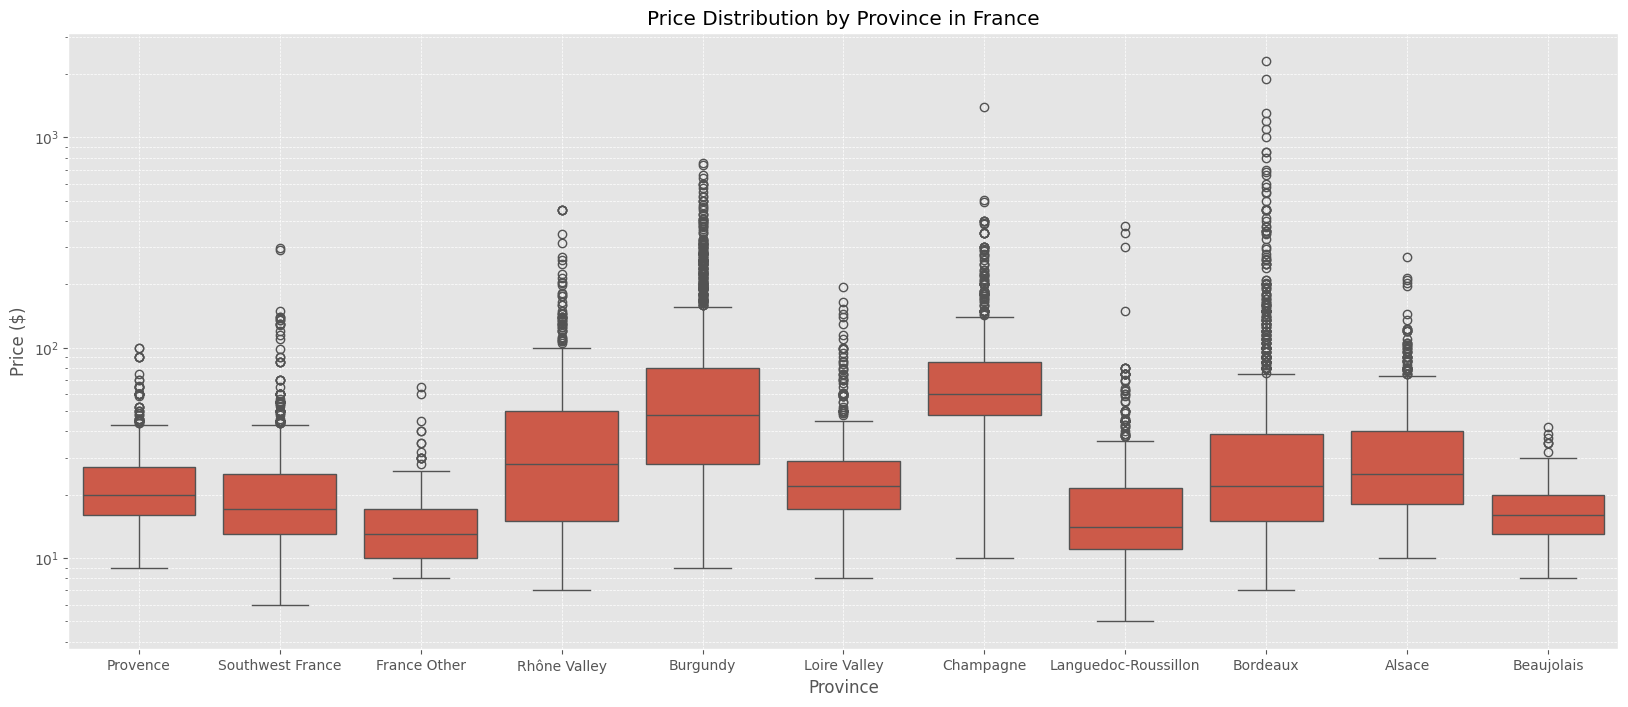

In [144]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Province', y='Price', data=reviews[reviews["Country"]=="France"])
plt.title('Price Distribution by Province in France')
plt.ylabel('Price ($)')
plt.xlabel('Province')
plt.yscale('log')  # Using logarithmic scale to better visualize outliers and distributions
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


The boxplots above display the price distribution for provinces in France on a logarithmic scale to better accommodate the wide range of prices, especially for provinces with high variability.

From this visualization, you can observe the variability in wine prices across different provinces. Some provinces show a relatively compact interquartile range (IQR) with fewer outliers, indicating more uniform pricing, while others exhibit a wider IQR and numerous outliers, especially on the higher end, indicating a broader range of wine prices.

It's clear that provinces like Rhône Valley, Burgundy, Bordeaux, Southwest France, Languedoc-Roussillon and Alsace have a high degree of variability in wine prices in the central 50% of the data. This supports the earlier assessment that using the median would be more appropriate for imputing missing values in the 'Price' column for these provinces, as it would not be influenced by extreme values and would provide a more representative measure of central tendency.

##### **(3.3.6.2) After we choose to use median price value as group specific value for missing price. Lets fill out the missing price values in the dataset**

Because we are going to use two apprached to fill out missing prices therefore we will create copy of out dataset:

In [145]:
reviews_gm = reviews.copy()

In [146]:
reviews_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [147]:
reviews_gm[reviews_gm["Price"].isna()]

Country                                        Description  \
32         Italy  Underbrush, scorched earth, menthol and plum s...   
56        France  Delicious while also young and textured, this ...   
72         Italy  This offers aromas of red rose, wild berry, da...   
82         Italy  Berry, baking spice, dried iris, mint and a hi...   
116        Spain  Aromas of brandied cherry and crème de cassis ...   
...          ...                                                ...   
97759  Australia  Penetrating eucalyptus aromas largely obscure ...   
97780   Portugal  This is very burnt, offering concentrated old ...   
97792   Portugal  A dry, fruity wine, burnt with acidity and som...   
97816   Portugal  A sadly unbalanced wine from a company that ha...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   

             Designation  Points  Price         Province  \
32         Vigna Piaggia      90    NaN          Tuscany   
56               Le Pavé      90    NaN     Loire Valley   
72        Bussia Riserva      91    NaN         Piedmont   
82      Palliano Riserva      91    NaN         Piedmont   
116          Dulce Tinto      86    NaN          Levante   
...                  ...     ...    ...              ...   
97759        The Benefit      86    NaN  South Australia   
97780  40-year old tawny      85    NaN             Port   
97792  10-year old tawny      85    NaN             Port   
97816  10-year old tawny      84    NaN             Port   
97842  30-year old tawny      84    NaN             Port   

                       Region_1 Region_2          Variety              Winery  
32       Brunello di Montalcino      NaN       Sangiovese     Abbadia Ardenga  
56                     Sancerre      NaN  Sauvignon Blanc    Domaine Vacheron  
72                       Barolo      NaN         Nebbiolo     Silvano Bolmida  
82                        Roero      NaN         Nebbiolo               Ceste  
116                     Jumilla      NaN       Monastrell   Casa de la Ermita  
...                         ...      ...              ...                 ...  
97759  Southern Flinders Ranges      NaN           Shiraz           Tim Adams  
97780                       NaN      NaN             Port  Casa Santa Eufemia  
97792                       NaN      NaN             Port      Quarles Harris  
97816                       NaN      NaN             Port            Ferreira  
97842                       NaN      NaN             Port  Casa Santa Eufemia  

[8715 rows x 10 columns]

In [148]:
nan_price_index = reviews_gm[reviews_gm["Price"].isna()].index
nan_price_index

Index([   32,    56,    72,    82,   116,   242,   261,   282,   294,   321,
       ...
       97563, 97606, 97621, 97632, 97659, 97759, 97780, 97792, 97816, 97842],
      dtype='int64', length=8715)

And let's assume that we want to split our dataset by the column `Country` and `Province`.

For all groups we can calculate the median price:

In [149]:
reviews_gm.groupby(["Country", "Province"]).Price.median()

Country    Province        
Albania    Mirditë             20.0
Argentina  Mendoza Province    15.0
           Other               14.0
Australia  Australia Other     10.0
           New South Wales     17.0
                               ... 
Uruguay    Juanico             19.5
           Montevideo          39.0
           Progreso            22.5
           San Jose            19.0
           Uruguay             18.0
Name: Price, Length: 456, dtype: float64

And therefore, with the `.transform()` method, we can create a new pandas series or a new column in dataset called 'group_median_price'. And here we create for each reviewer or for each row the median price of the respective group. So we simply chain here the transform method and we pass the function median to the transform method. And actually we created the new column group_median_price:

In [150]:
reviews_gm["group_median_price"] = reviews_gm.groupby(["Country", "Province"]).Price.transform("median")

In [151]:
reviews_gm

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97841                          Bungalow Red      84   15.0        California   
97842                     30-year old tawny      84    NaN              Port   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   
97845                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97841     Santa Barbara County      Central Coast      Syrah-Grenache   
97842                      NaN                NaN                Port   
97843               California   California Other              Merlot   
97844               Uco Valley                NaN     Sauvignon Blanc   
97845  South Eastern Australia                NaN          Chardonnay   

                        Winery  group_median_price  
0                        Heitz                30.0  
1      Bodega Carmen Rodríguez                18.0  
2                     Macauley                30.0  
3                        Ponzi                30.0  
4         Domaine de la Bégude                20.0  
...                        ...                 ...  
97841            Casa Barranca                30.0  
97842       Casa Santa Eufemia                41.0  
97843                 Delicato                30.0  
97844        Finca El Portillo                15.0  
97845            Jacob's Creek                10.0  

[97846 rows x 11 columns]

And now we can actually pass here the whole pandas series to the method fillna:

In [152]:
reviews_gm["Price"] = reviews_gm["Price"].fillna(reviews_gm["group_median_price"])

And what pandas does here actually it checks actually for each reviewer or for each row, whether we have here a missing value in the Price column. And in these rows where we have a missing value, then the missing value is replaced by the respective or corresponding value.

And of course for all rows or for all reviewers, where we actually have here a value, this value is not replaced here by the corresponding or respective value in the column. You can check that before index 97842 under Price was NaN and now it is fill out with 41.0:

In [153]:
reviews_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             97846 non-null  object 
 1   Description         97846 non-null  object 
 2   Designation         67951 non-null  object 
 3   Points              97846 non-null  int64  
 4   Price               97829 non-null  float64
 5   Province            97846 non-null  object 
 6   Region_1            81919 non-null  object 
 7   Region_2            39491 non-null  object 
 8   Variety             97846 non-null  object 
 9   Winery              97846 non-null  object 
 10  group_median_price  97829 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 8.2+ MB


There are still some prices missing because grouping of Country and Province resulted in values with NaN median values. 

In [154]:
reviews_gm[reviews_gm["Price"].isna()]

Country                                        Description  \
11821  New Zealand  This elegant wine shows why the Waitaki Valley...   
18425     Portugal  Made from Pinot Noir, this is a sophisticated ...   
19833     Portugal  This Pinot Blanc is a soft sparkling wine, rus...   
31211     Portugal  From the far northeast region of Tras-os-Monte...   
31467     Portugal  A medium-sweet sparkling wine, this bursts wit...   
32144     Portugal  Ripe and soft, this is made from Tinta Roriz. ...   
39044     Portugal  Lightly honeyed in flavor, the wine has touche...   
43664     Portugal  Fresh and juicy, this is a fruity wine. Blackb...   
44124     Portugal  Solid and dry, the wine is sustained by its ri...   
44125     Portugal  Lemon flavored, this light and fruity wine has...   
44138     Portugal  A tarry, old-fashioned wine that has dense tan...   
45235     Portugal  The wine has acidity and a rustic flavor that ...   
64020     Portugal  An exotic blend of Gewürztraminer, Riesling an...   
65644     Portugal  Orange-pink in color, this is a warm style of ...   
65653     Portugal  This earthy wine has black-currant acidity, aw...   
79945     Portugal  This rich wine—as rugged as the Transmontano t...   
82184     Portugal  This is a firmly tannic wine, but it has enoug...   

                        Designation  Points  Price         Province Region_1  \
11821                           NaN      92    NaN   Waitaki Valley      NaN   
18425                         Bruto      90    NaN    Távora-Varosa      NaN   
19833  Extrème de Pinot Blanc Bruto      84    NaN    Távora-Varosa      NaN   
31211                     Terra Boa      85    NaN    Transmontanas      NaN   
31467                  Casal Garcia      85    NaN  Vinho Espumante      NaN   
32144                         Vista      84    NaN  Terras da Beira      NaN   
39044                Branco Reserva      88    NaN   Trás-os-Montes      NaN   
43664             Santa Valha Tinto      86    NaN   Trás-os-Montes      NaN   
44124                         Tinto      85    NaN   Trás-os-Montes      NaN   
44125            Santa Valha Branco      85    NaN   Trás-os-Montes      NaN   
44138                       Reserva      85    NaN   Trás-os-Montes      NaN   
45235             Santa Valha Fresh      84    NaN   Trás-os-Montes      NaN   
64020                        Branco      86    NaN     Transmontano      NaN   
65644                           NaN      84    NaN   Trás-os-Montes      NaN   
65653                   Porta Velha      83    NaN   Trás-os-Montes      NaN   
79945                       Reserva      90    NaN     Transmontano      NaN   
82184                         Tinto      87    NaN     Transmontano      NaN   

      Region_2               Variety                      Winery  \
11821      NaN            Pinot Noir     John Forrest Collection   
18425      NaN            Pinot Noir                 Murganheira   
19833      NaN           Pinot Blanc                 Murganheira   
31211      NaN        Portuguese Red               Caves Aliança   
31467      NaN  Portuguese Sparkling                     Aveleda   
32144      NaN                  Rosé               Caves Aliança   
39044      NaN      Portuguese White  Quinta do Sobreiró de Cima   
43664      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
44124      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
44125      NaN      Portuguese White  Quinta do Sobreiró de Cima   
44138      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
45235      NaN      Portuguese White  Quinta do Sobreiró de Cima   
64020      NaN      Portuguese White             Valle Pradinhos   
65644      NaN                  Rosé             Valle Pradinhos   
65653      NaN        Portuguese Red             Valle Pradinhos   
79945      NaN        Portuguese Red             Valle Pradinhos   
82184      NaN        Portuguese Red             Valle Pradinhos   

       group_median_price  
11

In [155]:
missing_remaining_price_index = reviews_gm[reviews_gm["Price"].isna()].index
missing_remaining_price_index

Index([11821, 18425, 19833, 31211, 31467, 32144, 39044, 43664, 44124, 44125,
       44138, 45235, 64020, 65644, 65653, 79945, 82184],
      dtype='int64')

So, the above missing Prices we will replace with group (Country) specific values:

In [156]:
reviews_gm["groupC_median_price"] = reviews_gm.groupby(["Country"]).Price.transform("median")

In [157]:
reviews_gm["Price"] = reviews_gm["Price"].fillna(reviews_gm["groupC_median_price"])

In [158]:
reviews_gm.loc[missing_remaining_price_index, :]

Country                                        Description  \
11821  New Zealand  This elegant wine shows why the Waitaki Valley...   
18425     Portugal  Made from Pinot Noir, this is a sophisticated ...   
19833     Portugal  This Pinot Blanc is a soft sparkling wine, rus...   
31211     Portugal  From the far northeast region of Tras-os-Monte...   
31467     Portugal  A medium-sweet sparkling wine, this bursts wit...   
32144     Portugal  Ripe and soft, this is made from Tinta Roriz. ...   
39044     Portugal  Lightly honeyed in flavor, the wine has touche...   
43664     Portugal  Fresh and juicy, this is a fruity wine. Blackb...   
44124     Portugal  Solid and dry, the wine is sustained by its ri...   
44125     Portugal  Lemon flavored, this light and fruity wine has...   
44138     Portugal  A tarry, old-fashioned wine that has dense tan...   
45235     Portugal  The wine has acidity and a rustic flavor that ...   
64020     Portugal  An exotic blend of Gewürztraminer, Riesling an...   
65644     Portugal  Orange-pink in color, this is a warm style of ...   
65653     Portugal  This earthy wine has black-currant acidity, aw...   
79945     Portugal  This rich wine—as rugged as the Transmontano t...   
82184     Portugal  This is a firmly tannic wine, but it has enoug...   

                        Designation  Points  Price         Province Region_1  \
11821                           NaN      92   20.0   Waitaki Valley      NaN   
18425                         Bruto      90   17.0    Távora-Varosa      NaN   
19833  Extrème de Pinot Blanc Bruto      84   17.0    Távora-Varosa      NaN   
31211                     Terra Boa      85   17.0    Transmontanas      NaN   
31467                  Casal Garcia      85   17.0  Vinho Espumante      NaN   
32144                         Vista      84   17.0  Terras da Beira      NaN   
39044                Branco Reserva      88   17.0   Trás-os-Montes      NaN   
43664             Santa Valha Tinto      86   17.0   Trás-os-Montes      NaN   
44124                         Tinto      85   17.0   Trás-os-Montes      NaN   
44125            Santa Valha Branco      85   17.0   Trás-os-Montes      NaN   
44138                       Reserva      85   17.0   Trás-os-Montes      NaN   
45235             Santa Valha Fresh      84   17.0   Trás-os-Montes      NaN   
64020                        Branco      86   17.0     Transmontano      NaN   
65644                           NaN      84   17.0   Trás-os-Montes      NaN   
65653                   Porta Velha      83   17.0   Trás-os-Montes      NaN   
79945                       Reserva      90   17.0     Transmontano      NaN   
82184                         Tinto      87   17.0     Transmontano      NaN   

      Region_2               Variety                      Winery  \
11821      NaN            Pinot Noir     John Forrest Collection   
18425      NaN            Pinot Noir                 Murganheira   
19833      NaN           Pinot Blanc                 Murganheira   
31211      NaN        Portuguese Red               Caves Aliança   
31467      NaN  Portuguese Sparkling                     Aveleda   
32144      NaN                  Rosé               Caves Aliança   
39044      NaN      Portuguese White  Quinta do Sobreiró de Cima   
43664      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
44124      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
44125      NaN      Portuguese White  Quinta do Sobreiró de Cima   
44138      NaN        Portuguese Red  Quinta do Sobreiró de Cima   
45235      NaN      Portuguese White  Quinta do Sobreiró de Cima   
64020      NaN      Portuguese White             Valle Pradinhos   
65644      NaN                  Rosé             Valle Pradinhos   
65653      NaN        Portuguese Red             Valle Pradinhos   
79945      NaN        Portuguese Red             Valle Pradinhos   
82184      NaN        Portuguese Red             Valle Pradinhos   

       group_median_price  gro

In [159]:
reviews_gm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              97846 non-null  object 
 1   Description          97846 non-null  object 
 2   Designation          67951 non-null  object 
 3   Points               97846 non-null  int64  
 4   Price                97846 non-null  float64
 5   Province             97846 non-null  object 
 6   Region_1             81919 non-null  object 
 7   Region_2             39491 non-null  object 
 8   Variety              97846 non-null  object 
 9   Winery               97846 non-null  object 
 10  group_median_price   97829 non-null  float64
 11  groupC_median_price  97846 non-null  float64
dtypes: float64(3), int64(1), object(8)
memory usage: 9.0+ MB


So here in this example of our reviews data, it makes a lot of sense to replace the missing values in the price column by the group specific median price because it's simply more precise. And by doing so, in many cases we can improve the precision and the quality of the results and further statistical analysis.

In [160]:
reviews_gm = reviews_gm.drop(columns=["group_median_price", "groupC_median_price"])

#### (3.3.7) K-nearest neighbors(KNN) Imputation Approach to fill out missing prices. **reviews_knn created.**

[Explaination on KNN](./support_files/K-nearest_neighbors(KNN)_imputation.ipynb)

In [161]:
reviews_knn = reviews.copy()

In [162]:
reviews_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        89131 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


In [163]:
reviews_knn

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97841                          Bungalow Red      84   15.0        California   
97842                     30-year old tawny      84    NaN              Port   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   
97845                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97841     Santa Barbara County      Central Coast      Syrah-Grenache   
97842                      NaN                NaN                Port   
97843               California   California Other              Merlot   
97844               Uco Valley                NaN     Sauvignon Blanc   
97845  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97841            Casa Barranca  
97842       Casa Santa Eufemia  
97843                 Delicato  
97844        Finca El Portillo  
97845            Jacob's Creek  

[97846 rows x 10 columns]

Assumptions for the approach:

- **Complexity:** KNN is more computationally intensive, especially with large datasets and many features, as it involves finding the nearest neighbors for each data point with missing values.
- **Assumption:** KNN assumes that a point's value can be approximated by the values of its nearest neighbors in a multidimensional feature space. It considers multiple features simultaneously to find these neighbors, potentially leading to more nuanced imputations.
- **Sensitivity to Feature Selection:** The accuracy and relevance of KNN imputations depend heavily on the choice and preprocessing of features used in the imputation model.

In [164]:
# Encode categorical columns
categorical_columns = ['Country', 'Province', 'Region_1', 'Region_2', 'Variety', 'Winery']  # Adjust as needed
encoded_data = reviews_knn.copy()

for column in categorical_columns:
    encoded_data[column] = encoded_data[column].fillna('Unknown')
    le = LabelEncoder()
    encoded_data[column] = le.fit_transform(encoded_data[column].astype(str))

In [165]:
encoded_data

Country                                        Description  \
0           43  This tremendous 100% varietal wine hails from ...   
1           40  Ripe aromas of fig, blackberry and cassis are ...   
2           43  Mac Watson honors the memory of a wine once ma...   
3           43  This spent 20 months in 30% new French oak, an...   
4           15  This is the top wine from La Bégude, named aft...   
...        ...                                                ...   
97841       43  A Syrah-Grenache blend that's dry and rustical...   
97842       33  Oreo eaters will enjoy the aromas of this wine...   
97843       43  Outside of the vineyard, wines like this are w...   
97844        1  Heavy and basic, with melon and pineapple arom...   
97845        2  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price  Province  \
0                         Martha's Vineyard      96  235.0        52   
1      Carodorum Selección Especial Reserva      96  110.0       274   
2             Special Selected Late Harvest      96   90.0        52   
3                                   Reserve      96   65.0       282   
4                                La Brûlade      95   66.0       313   
...                                     ...     ...    ...       ...   
97841                          Bungalow Red      84   15.0        52   
97842                     30-year old tawny      84    NaN       308   
97843                                   NaN      84    6.0        52   
97844                                   NaN      84    9.0       223   
97845                                   NaN      84    8.0        23   

       Region_1  Region_2  Variety  Winery  
0           738         7       70    7286  
1          1070        16      553    1231  
2           528        13      468    9032  
3          1223        18      402   11001  
4            66        16      422    5409  
...         ...       ...      ...     ...  
97841       961         1      519    2126  
97842      1088        16      409    2151  
97843       154         0      298    4815  
97844      1085        16      468    6327  
97845      1020        16      110    7732  

[97846 rows x 10 columns]

In [166]:
# Initialize the KNN Imputer
imputer = KNNImputer(n_neighbors=5)  # You can adjust the number of neighbors

In [167]:
imputer

KNNImputer()

In [168]:
# Select numerical columns for imputation (including encoded categorical columns if relevant)
# Adjust this selection based on your data's requirements
numerical_columns = encoded_data.select_dtypes(include=['float64', 'int64']).columns

In [169]:
numerical_columns

Index(['Country', 'Points', 'Price', 'Province', 'Region_1', 'Region_2',
       'Variety', 'Winery'],
      dtype='object')

In [170]:
# Perform imputation on selected columns
imputed_data = imputer.fit_transform(encoded_data[numerical_columns])

In [171]:
imputed_data

array([[4.300e+01, 9.600e+01, 2.350e+02, ..., 7.000e+00, 7.000e+01,
        7.286e+03],
       [4.000e+01, 9.600e+01, 1.100e+02, ..., 1.600e+01, 5.530e+02,
        1.231e+03],
       [4.300e+01, 9.600e+01, 9.000e+01, ..., 1.300e+01, 4.680e+02,
        9.032e+03],
       ...,
       [4.300e+01, 8.400e+01, 6.000e+00, ..., 0.000e+00, 2.980e+02,
        4.815e+03],
       [1.000e+00, 8.400e+01, 9.000e+00, ..., 1.600e+01, 4.680e+02,
        6.327e+03],
       [2.000e+00, 8.400e+01, 8.000e+00, ..., 1.600e+01, 1.100e+02,
        7.732e+03]])

In [172]:
# Create a DataFrame from the imputed data
imputed_df = pd.DataFrame(imputed_data, columns=numerical_columns)

In [173]:
imputed_df

Country  Points  Price  Province  Region_1  Region_2  Variety   Winery
0         43.0    96.0  235.0      52.0     738.0       7.0     70.0   7286.0
1         40.0    96.0  110.0     274.0    1070.0      16.0    553.0   1231.0
2         43.0    96.0   90.0      52.0     528.0      13.0    468.0   9032.0
3         43.0    96.0   65.0     282.0    1223.0      18.0    402.0  11001.0
4         15.0    95.0   66.0     313.0      66.0      16.0    422.0   5409.0
...        ...     ...    ...       ...       ...       ...      ...      ...
97841     43.0    84.0   15.0      52.0     961.0       1.0    519.0   2126.0
97842     33.0    84.0   18.0     308.0    1088.0      16.0    409.0   2151.0
97843     43.0    84.0    6.0      52.0     154.0       0.0    298.0   4815.0
97844      1.0    84.0    9.0     223.0    1085.0      16.0    468.0   6327.0
97845      2.0    84.0    8.0      23.0    1020.0      16.0    110.0   7732.0

[97846 rows x 8 columns]

In [174]:
imputed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   97846 non-null  float64
 1   Points    97846 non-null  float64
 2   Price     97846 non-null  float64
 3   Province  97846 non-null  float64
 4   Region_1  97846 non-null  float64
 5   Region_2  97846 non-null  float64
 6   Variety   97846 non-null  float64
 7   Winery    97846 non-null  float64
dtypes: float64(8)
memory usage: 6.0 MB


Replace Price column in reviews2 with filled out prices from imputed_df:

In [175]:
reviews_knn["Price"] = imputed_df["Price"]

In [176]:
reviews_knn

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
4         France  This is the top wine from La Bégude, named aft...   
...          ...                                                ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97842   Portugal  Oreo eaters will enjoy the aromas of this wine...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   
97845  Australia  Smooth in the mouth, this Chard starts off wit...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
4                                La Brûlade      95   66.0          Provence   
...                                     ...     ...    ...               ...   
97841                          Bungalow Red      84   15.0        California   
97842                     30-year old tawny      84   18.0              Port   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   
97845                                   NaN      84    8.0   Australia Other   

                      Region_1           Region_2             Variety  \
0                  Napa Valley               Napa  Cabernet Sauvignon   
1                         Toro                NaN       Tinta de Toro   
2               Knights Valley             Sonoma     Sauvignon Blanc   
3            Willamette Valley  Willamette Valley          Pinot Noir   
4                       Bandol                NaN  Provence red blend   
...                        ...                ...                 ...   
97841     Santa Barbara County      Central Coast      Syrah-Grenache   
97842                      NaN                NaN                Port   
97843               California   California Other              Merlot   
97844               Uco Valley                NaN     Sauvignon Blanc   
97845  South Eastern Australia                NaN          Chardonnay   

                        Winery  
0                        Heitz  
1      Bodega Carmen Rodríguez  
2                     Macauley  
3                        Ponzi  
4         Domaine de la Bégude  
...                        ...  
97841            Casa Barranca  
97842       Casa Santa Eufemia  
97843                 Delicato  
97844        Finca El Portillo  
97845            Jacob's Creek  

[97846 rows x 10 columns]

In [177]:
reviews_knn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Country      97846 non-null  object 
 1   Description  97846 non-null  object 
 2   Designation  67951 non-null  object 
 3   Points       97846 non-null  int64  
 4   Price        97846 non-null  float64
 5   Province     97846 non-null  object 
 6   Region_1     81919 non-null  object 
 7   Region_2     39491 non-null  object 
 8   Variety      97846 non-null  object 
 9   Winery       97846 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 7.5+ MB


#### (3.3.8) Compare Hybrib Imputation vs K-nearest neighbors(KNN) Imputation Approach vs Group Median Approach to fill out missing prices

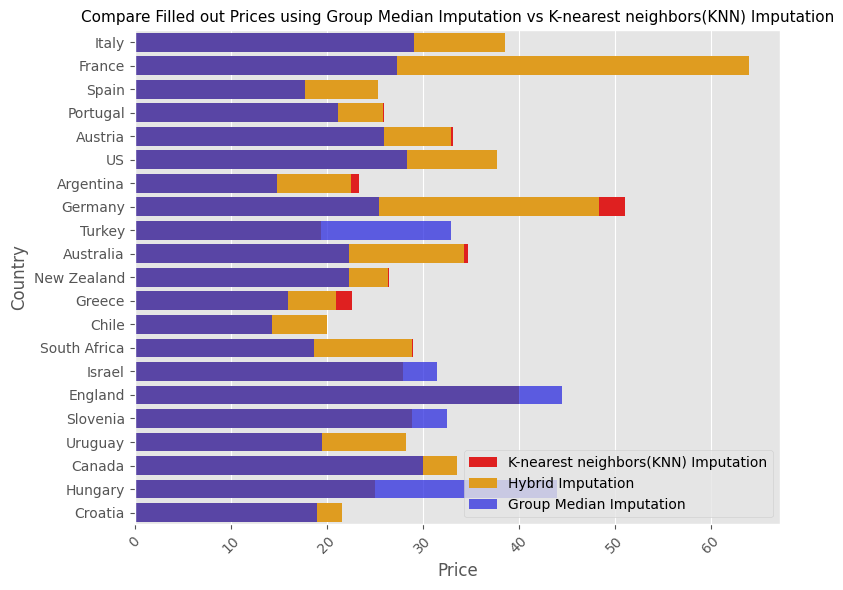

In [178]:
plt.figure(figsize=(8, 6))
sns.barplot(data=reviews_knn.loc[nan_price_index], y='Country', x='Price', color='red', label='K-nearest neighbors(KNN) Imputation', errorbar=None)
sns.barplot(data=reviews_hybrid.loc[nan_price_index], y='Country', x='Price', color='orange', label='Hybrid Imputation', errorbar=None)
sns.barplot(data=reviews_gm.loc[nan_price_index], y='Country', x='Price', color='blue', alpha=0.7, label='Group Median Imputation', errorbar=None)
plt.title('Compare Filled out Prices using Group Median Imputation vs K-nearest neighbors(KNN) Imputation', fontsize=11)
plt.ylabel('Country')
plt.xlabel('Price')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In above barplots we compare filled out prices using Hybrid imputation vs Group Median imputation approach vs K-nearest neighbors(KNN) imputation approach. There are total 21 countries with missing prices. 
- 8 countries out of total 21 countries have highest prices using KNN approach.
- 8 countries out of total 21 have highest prices using Hybrid approach.
- 5 countries out of total 21 have highest prices using Median Group approach.

In my furture analysis I will use hybrid_reviews dataset as I believe it is better represent missing prices as it used custom approached to fill in missing values in price.

## (4) Handle outliers in the `reviews_hybrid` dataset

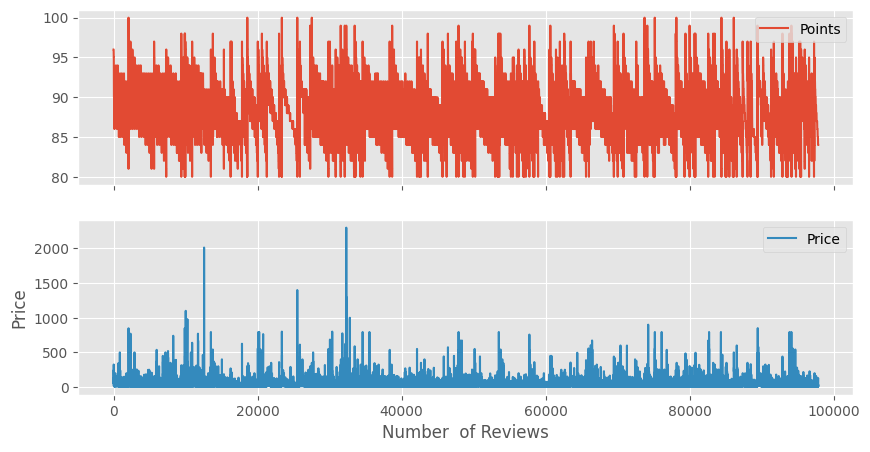

In [179]:
reviews_hybrid.plot(subplots = True, figsize = (10,5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Price")
plt.show()

It is noticeable that prices have a number of extrime outliers. Lets consider what to do with them after we do price distribution analysis.

### (4.1) Analyze the distribution of 'Price'

To understand the overall distribution and identify any patterns or outliers.

Let's start with the distribution analysis of the 'Price' column where values are present.

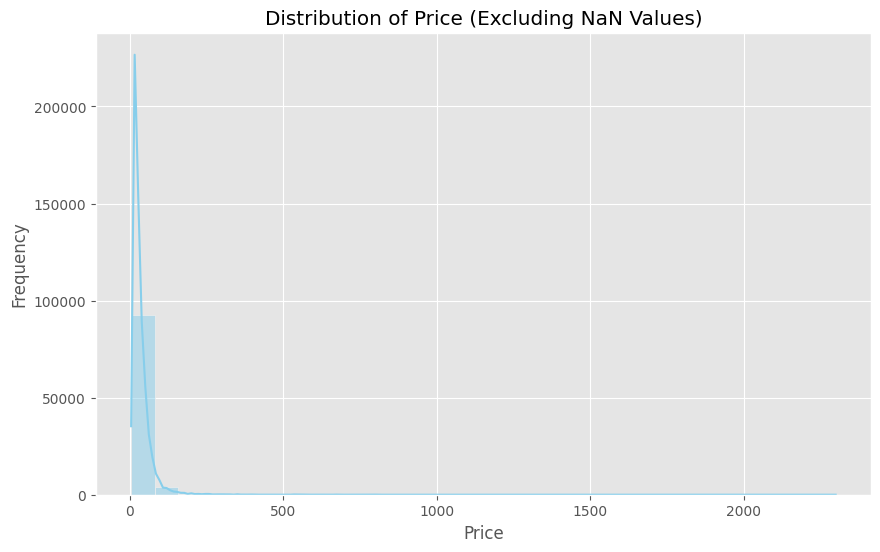

In [180]:
# Distribution analysis of 'Price' where values are present
plt.figure(figsize=(10, 6))
sns.histplot(reviews_hybrid['Price'].dropna(), kde=True, bins=30, color='skyblue')
plt.title('Distribution of Price (Excluding NaN Values)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

To improve the visualization, we consider Log Scale: Applying a log scale to the x-axis can help manage wide data ranges and extreme values, making the distribution easier to visualize.

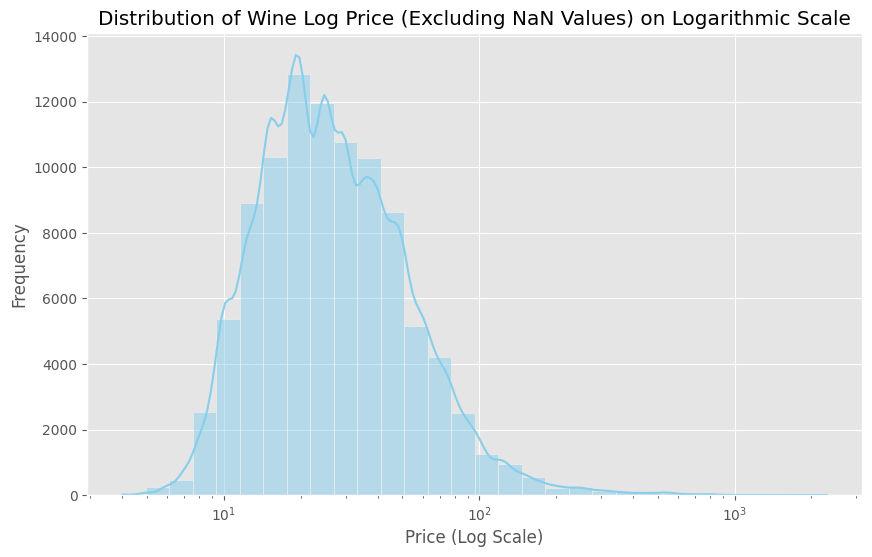

In [181]:
# Distribution analysis of 'Price' where values are present
plt.figure(figsize=(10, 6))
sns.histplot(reviews_hybrid['Price'].dropna(), kde=True, bins=30, color='skyblue', log_scale=True)
plt.title('Distribution of Wine Log Price (Excluding NaN Values) on Logarithmic Scale')
plt.xlabel('Price (Log Scale)')
plt.ylabel('Frequency')
plt.show()

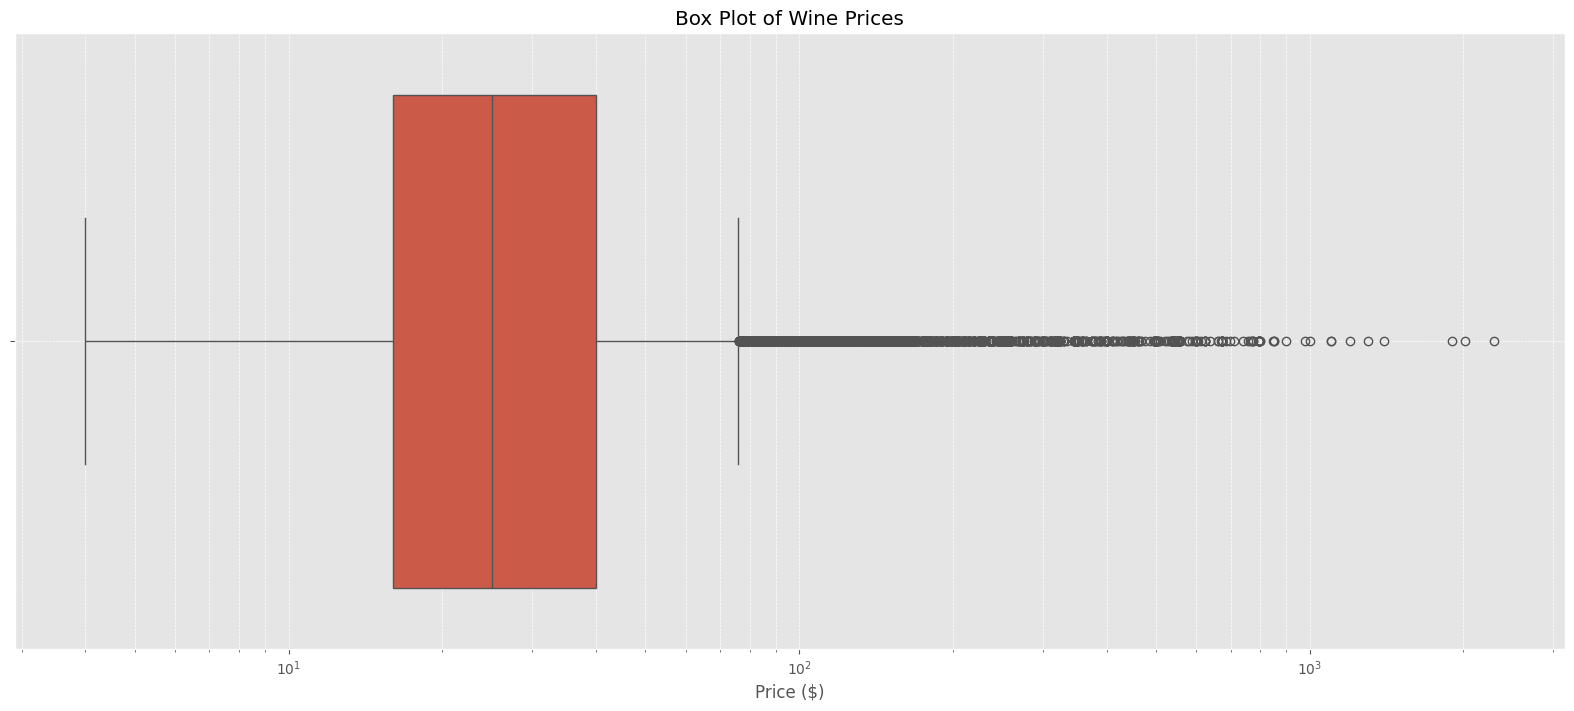

In [182]:
plt.figure(figsize=(20, 8))
sns.boxplot(x= reviews_hybrid["Price"])
plt.title('Box Plot of Wine Prices')
# plt.ylabel()
plt.xlabel('Price ($)')
plt.xscale('log')  # Using logarithmic scale to better visualize outliers and distributions
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()


In [183]:
# Descriptive statistics for 'Price' column
stat(reviews_hybrid['Price'])

Value
Count                                                                 97846
Number of Missing Values                                                  0
Mean                                                                  35.04
Standard Deviation                                                    41.14
Variance                                                            1692.19
Skewness                                                              11.41
Kurtosis                                                              307.9
Coefficient of Variation                                               1.17
Mode                                                                   20.0
Sum                                                               3428986.6
Q1 (25th percentile)                                                   16.0
Median (50th percentile)                                               25.0
Q3 (75th percentile)                                                   40.0
IQR                                                                    24.0
Range, excl outliers                                                   72.0
Whisker Bottom                                                          4.0
Whisker Top                                                            76.0
Max value                                                            2300.0
Min value                                                               4.0
Range, incl. outliers                                                2296.0
Outliers                  [235.0, 110.0, 90.0, 110.0, 80.0, 90.0, 185.0,...
Number of Outliers                                                     6199
IQR midpoint                                                           28.0
Whiskers midpoint                                                      40.0

The histogram shows the distribution of 'Price' values, excluding NaNs, in my dataset. The distribution is right-skewed, with most of the wines priced below USD 100, and a few outliers extending up to USD 2300. The summary statistics reveal a mean price of approximately USD 35.04, with a median (50th percentile) of USD 25, indicating that higher-priced wines are pulling the mean upward.

### (4.2) Handle the Outliers type 2: Values are correct but extreme to our other data points

Given this information, we have several options for handling these outliers, depending on my specific analysis goals:

- (4.2.1) **Keep the outliers**: If the high-priced wines are of particular interest or if we're analyzing market segments that include premium wines, we might choose to retain these data points.
- (4.2.2) **Exclude the outliers**: For analyses where extreme values might skew the results, such as when calculating average prices, we might consider excluding these outliers.
- (4.2.3) **Cap and Floor the values**: We can cap and floor prices at a certain thresholds to lessen the impact of extremely high/low prices. But the data will not be excluded only the price values will be overwritten.
- (4.2.4) **Discretization and Binning of 'Points' into 'Rating'**: I will use this for my further analysis
- (4.2.5) **Discretization and Binning of 'Price' into 'Price_cat'**: I will use this for my further analysis

#### (4.2.1) Decision: Keep the outliers

Choosing to keep the outliers in our analysis is a valid approach, especially when dealing with data like wine prices, where high-value outliers can represent rare, premium wines that are of particular interest.

Since we're keeping the outliers, it's essential to use analytical methods and statistical techniques that are robust to the presence of outliers. Here are a few recommendations:

1. **Use Median Instead of Mean**: When summarizing central tendency, consider using the median instead of the mean, as the median is less affected by outliers.

2. **Robust Statistical Methods**: Employ statistical methods that are less sensitive to outliers. For instance, when performing regression analysis, consider using robust regression methods.

3. **Non-parametric Tests**: If we're conducting hypothesis testing, non-parametric tests like the Mann-Whitney U test or Kruskal-Wallis test can be more appropriate, as they don't assume a normal distribution.

4. **Segmented Analysis**: Consider segmenting our data, for example, by price range, and analyzing these segments separately. This can provide insights into different market segments, including those for high-priced, premium wines.

5. **Visualization**: Continue to use visualizations to understand our data. Box plots, violin plots, and scatter plots can help us visualize the distribution of our data and the impact of outliers.

6. **Data Normalization**: For certain analyses, consider normalizing our data. Techniques like Min-Max scaling or Z-score normalization can help manage the range of our data, though they don't reduce the influence of outliers.

Since we're retaining the outliers, the retional is to segment the dataset into segments that also include premium segment wine. 

#### (4.2.2) Exclude the outliers + Power Anasysis (Sample size is not retained the same)

If we decide to exclude outliers from your analysis, we'll need to define a criterion for identifying these outliers and then remove them from our dataset. Here's a step-by-step guide on how to do this:

1. Calculate the IQR and Determine Thresholds:
   - Use the 25th and 75th percentiles of your `Price` data to calculate the Interquartile Range (IQR).
   - Determine the lower and upper bounds by subtracting and adding 1.5 times the IQR from the 25th and 75th percentiles, respectively.

2. Filter Out Outliers:
   - Exclude data points that fall below the lower bound or above the upper bound. We can do this by applying a filter to our DataFrame.

We can use this approach to remove outliers and then proceed with our analysis.

**Power Analysis**

[power analysis guide](./support_files/power_analysis_guidlines.ipynb)

If the dataset has a significant number of outliers, and removing them would lead to a substantial reduction in sample size, affecting the analysis's reliability or statistical power. In practice, it's advisable to conduct a **[power analysis before and after outlier removal](./support_files/power_analysis_guidlines.ipynb)** to assess the impact on our study's power. This analysis can guide whether outlier removal is appropriate or whether other methods should be considered to preserve statistical power.

In [184]:
import pandas as pd
from scipy.stats import ttest_ind
from statsmodels.stats.power import TTestIndPower

Group_A = "France"
Group_B = "Italy"
df = reviews_hybrid

# Filter the dataset for wines from France and Italy
france_wines = df[df['Country'] == Group_A]['Price']
italy_wines = df[df['Country'] == Group_B]['Price']

# Function to calculate Cohen's d effect size
def calculate_cohens_d(group1, group2):
    n1, n2 = len(group1), len(group2)
    mean1, mean2 = group1.mean(), group2.mean()
    var1, var2 = group1.var(), group2.var()
    pooled_std = ((n1 - 1) * var1 + (n2 - 1) * var2) / (n1 + n2 - 2)
    cohens_d = (mean1 - mean2) / (pooled_std ** 0.5)
    return cohens_d

# Calculate effect size before removing outliers
effect_size_original = calculate_cohens_d(france_wines, italy_wines)

#-------------------Removing Outliers-------------------------------
# Assuming 'data' is your DataFrame and 'Price' is the column of interest
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# removing outliers
filtered_data = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]
#--------------------------------------------------------------------

# Assuming you have already filtered out outliers and have a new dataframe 'filtered_data'
# Filter the adjusted dataset for wines from France and Italy
france_wines_filtered = filtered_data[filtered_data['Country'] == Group_A]['Price']
italy_wines_filtered = filtered_data[filtered_data['Country'] == Group_B]['Price']

# Calculate effect size after removing outliers
effect_size_filtered = calculate_cohens_d(france_wines_filtered, italy_wines_filtered)

# Power analysis
analysis = TTestIndPower()
alpha = 0.05  # Common significance level

# Calculate power before and after removing outliers
power_original = analysis.power(effect_size_original, len(france_wines), alpha, alternative='two-sided')
power_filtered = analysis.power(effect_size_filtered, len(france_wines_filtered), alpha, alternative='two-sided')

# Print the results
print(f"Effect Size (Original): {effect_size_original}")
print(f"Power (Original): {power_original}")
print(f"Effect Size (Filtered): {effect_size_filtered}")
print(f"Power (Filtered): {power_filtered}")

Effect Size (Original): 0.21210132282706598
Power (Original): 1.0
Effect Size (Filtered): -0.013630424257292538
Power (Filtered): 0.18802602183921052


The results from our power analysis comparing wine prices between France (Group A) and Italy (Group B) provide insightful information about the effect of outliers on the observed differences and the statistical power of the test. Here's an interpretation and conclusion based on the provided results:

**Effect Size Interpretation**:

1. **Effect Size (Original):** The original effect size of 0.212 suggests a small to moderate difference in wine prices between France and Italy, with French wines likely being more expensive on average given the positive value. This effect size is noticeable but not large, indicating some variability between the two groups.

2. **Effect Size (Filtered):** After removing outliers, the effect size changes to -0.014, which is close to zero and negative. This implies that, with outliers removed, the difference in average prices between French and Italian wines becomes negligible, and the direction of the effect reverses, suggesting Italian wines might be slightly more expensive on average, although the effect is very small.

**Power Analysis Interpretation**:

1. **Power (Original):** The statistical power of 1.0 (or 100%) before removing outliers indicates a very high likelihood of detecting the observed effect size, if it truly exists, when conducting a two-sided t-test at the 5% significance level. This high power suggests confidence in the results, but with power at 100%, it's also important to consider the risk of a Type I error (false positive) and the size of the dataset.

2. **Power (Filtered):** After removing outliers, the power dramatically decreases to 0.188 (or 18.8%). This low power indicates a high risk of a Type II error (failing to detect a true effect when there is one), suggesting that the test might not be reliable in identifying true differences in wine prices between France and Italy after outlier removal.

**Conclusion**:

- **Outliers' Impact:** The removal of outliers significantly impacts both the effect size and the power of the test. The effect size decreases and even changes direction, indicating that outliers were contributing to the perceived difference in wine prices between the two countries. The dramatic decrease in power after removing outliers suggests that the test becomes much less reliable in detecting true differences between the groups.
  
- **Statistical Considerations:** The initial high power (100%) might suggest a very large sample size or other factors leading to an overestimation of the test's ability to detect an effect. After outlier removal, the significant drop in power highlights the importance of outliers in the analysis and the potential loss of critical data points that might be influential in the original effect.

- **Data Interpretation:** Care should be taken when interpreting the results after outlier removal, as the significant decrease in power suggests the findings might not be robust. The near-zero effect size after outlier removal indicates that, without the extreme values, the average prices of French and Italian wines are very similar, but the low power calls into question the reliability of this result.

- **Further Analysis:** Given the drastic change in power and effect size after removing outliers, it may be worthwhile to explore alternative methods of handling outliers or to conduct a more detailed analysis to understand the nature and impact of these extreme values. Additionally, considering other variables or conducting a more granular analysis (e.g., by region or wine type) might provide further insights.

In summary, the analysis suggests that outliers have a significant impact on the observed differences in wine prices between France and Italy, and their removal substantially reduces the reliability of the test to detect true effects. This underscores the importance of carefully considering how to handle outliers in statistical analyses.

Below is a short version of just removing outliers without power analysis:

In [185]:
# Assuming 'data' is your DataFrame and 'Price' is the column of interest
Q1 = reviews_hybrid['Price'].quantile(0.25)
Q3 = reviews_hybrid['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

reviews_no_outliers = reviews_hybrid[(reviews_hybrid['Price'] >= lower_bound) & (reviews_hybrid['Price'] <= upper_bound)]

# Now 'reviews_no_outliers' contains your dataset without the outliers.

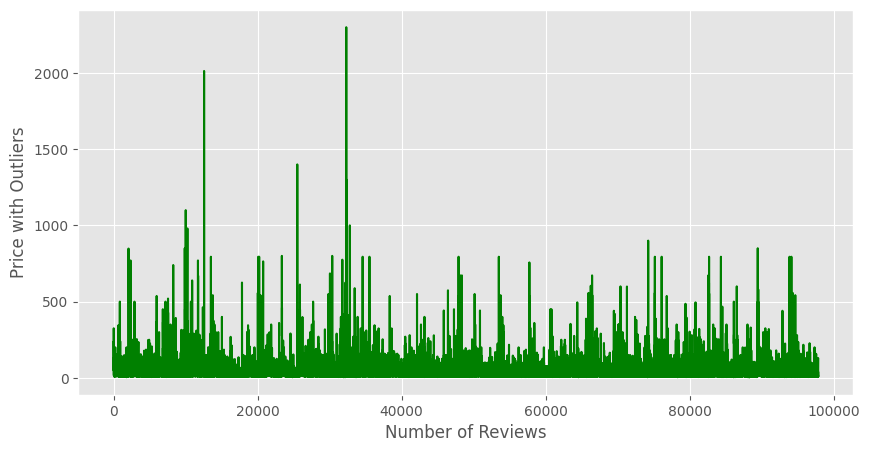

In [186]:
reviews_hybrid["Price"].plot(subplots = True, figsize = (10,5), color="green")
plt.xlabel("Number of Reviews")
plt.ylabel("Price with Outliers")
plt.show()

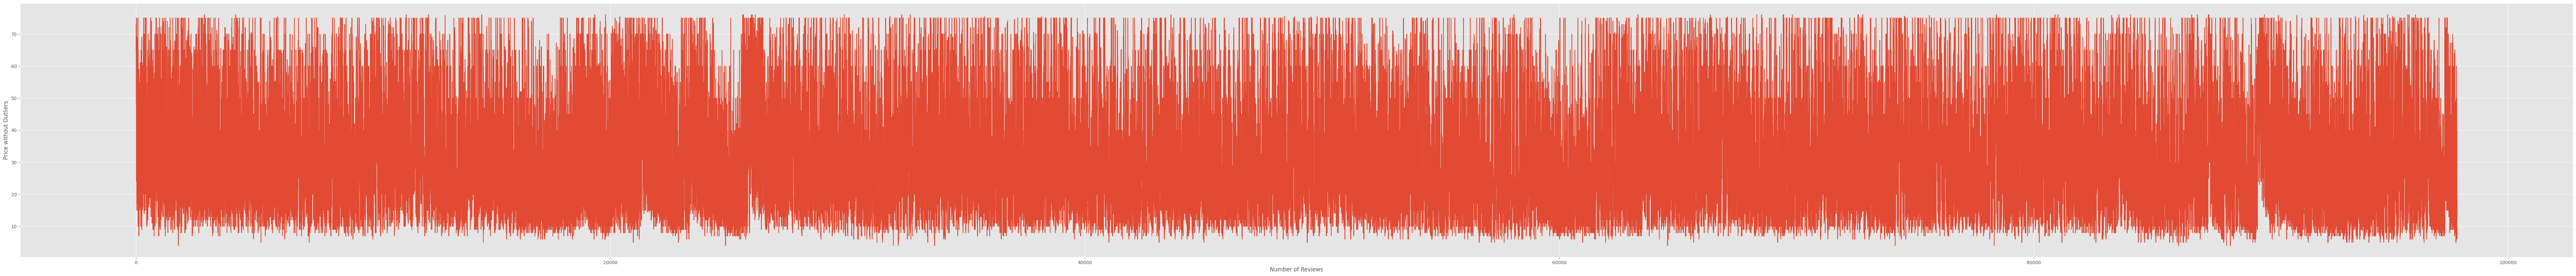

In [187]:
reviews_no_outliers["Price"].plot(subplots = True, figsize = (100,10))
plt.xlabel("Number of Reviews")
plt.ylabel("Price without Outliers")
plt.show()

**Sampling**: If your dataset is very large, consider taking a random sample of your data for plotting purposes. This will reduce the number of data points and can help in making the plot more interpretable.

This code snippet takes a random sample of 10% of our data (adjust frac as needed), and then plots it as a scatter plot with some transparency (alpha=0.2). Adjust the parameters as necessary to best visualize your data.

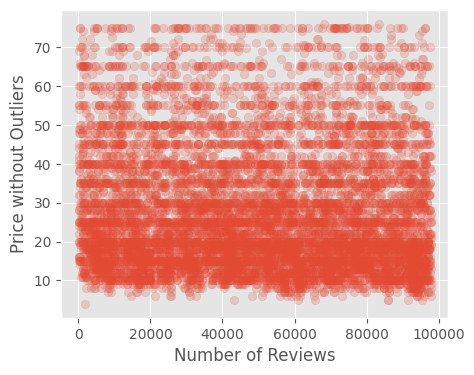

In [188]:
# Example of using a scatter plot and sampling
sampled_data = reviews_no_outliers.sample(frac=0.1)  # Adjust frac as needed
plt.figure(figsize=(5, 4))
plt.scatter(sampled_data.index, sampled_data["Price"], alpha=0.2)  # Adjust alpha as needed
plt.xlabel("Number of Reviews")
plt.ylabel("Price without Outliers")
plt.show()

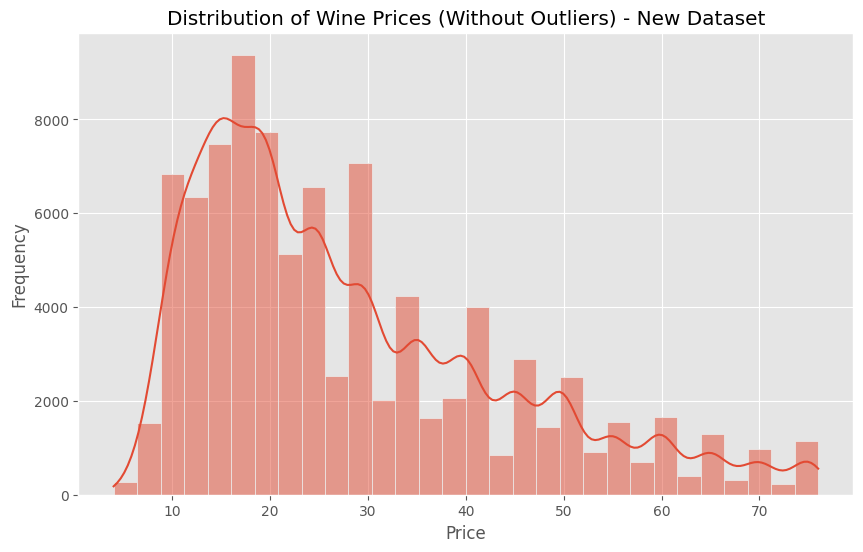

In [189]:
# Visualize the distribution of wine prices after removing outliers from the new dataset
plt.figure(figsize=(10, 6))
sns.histplot(reviews_no_outliers['Price'].dropna(), kde=True, bins=30)
plt.title('Distribution of Wine Prices (Without Outliers) - New Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

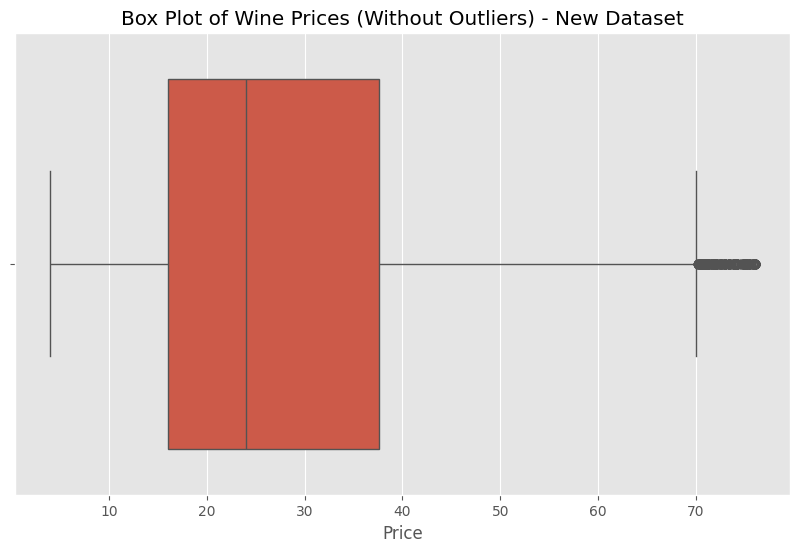

In [190]:
# Box plot of wine prices after removing outliers from the new dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews_no_outliers["Price"])
plt.title('Box Plot of Wine Prices (Without Outliers) - New Dataset')
plt.xlabel('Price')
plt.show()

In [191]:
stat(reviews_no_outliers["Price"]).merge(stat(reviews_hybrid["Price"]), how="left", left_index=True, right_index=True, suffixes=('_after', '_before') )

Value_after  \
Count                                                                 91647   
Number of Missing Values                                                  0   
Mean                                                                  28.15   
Standard Deviation                                                    15.94   
Variance                                                             254.14   
Skewness                                                               1.01   
Kurtosis                                                               0.32   
Coefficient of Variation                                               0.57   
Mode                                                                   20.0   
Sum                                                               2579997.6   
Q1 (25th percentile)                                                   16.0   
Median (50th percentile)                                               24.0   
Q3 (75th percentile)                                                   37.6   
IQR                                                                    21.6   
Range, excl outliers                                                   66.0   
Whisker Bottom                                                          4.0   
Whisker Top                                                            70.0   
Max value                                                              76.0   
Min value                                                               4.0   
Range, incl. outliers                                                  72.0   
Outliers                  [73.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75.0, 75....   
Number of Outliers                                                     1454   
IQR midpoint                                                           26.8   
Whiskers midpoint                                                      37.0   

                                                               Value_before  
Count                                                                 97846  
Number of Missing Values                                                  0  
Mean                                                                  35.04  
Standard Deviation                                                    41.14  
Variance                                                            1692.19  
Skewness                                                              11.41  
Kurtosis                                                              307.9  
Coefficient of Variation                                               1.17  
Mode                                                                   20.0  
Sum                                                               3428986.6  
Q1 (25th percentile)                                                   16.0  
Median (50th percentile)                                               25.0  
Q3 (75th percentile)                                                   40.0  
IQR                                                                    24.0  
Range, excl outliers                                                   72.0  
Whisker Bottom                                                          4.0  
Whisker Top                                                            76.0  
Max value                                                            2300.0  
Min value                                                               4.0  
Range, incl. outliers                                                2296.0  
Outliers                  [235.0, 110.0, 90.0, 110.0, 80.0, 90.0, 185.0,...  
Number of Outliers                                                     6199  
IQR midpoint                                                           28.0  
Whiskers midpoint                                                      40.0

In summary, the power analysis suggests that outliers have a significant impact on the observed differences in wine prices between France and Italy, and their removal substantially reduces the reliability of the test to detect true effects. This underscores the importance of carefully considering how to handle outliers in statistical analyses. Thus, we will not proceed with this approach.

#### (4.2.3) Cap and Floor the values (Sample size retained the same)

[There is a major difference between Exclude Outliers Method and Cap and Floor Method](./support_files/difference_between_exclude_outliers_method_and_cap_floor_method.ipynb)

If we don't want to remove valuable information when removing outliers, we can apply cap and floor to extreme values.

Flooring and capping outliers is another method to deal with extreme values in your data. This approach involves setting a minimum (floor) and maximum (cap) threshold. Values below the floor are set to the floor value, and values above the cap are set to the cap value. This way, you retain all data points but limit the influence of extreme outliers. 

By overwriting the outlier values with the price_floor and price_cap, we retain the data points in our dataset but limit their influence by setting extreme values to more reasonable, predefined thresholds. This way, the overall distribution is less affected by extreme outliers, which can be particularly useful in analyses where the presence of outliers could skew the results, but where it's also important to maintain the same sample size.

Here's how we can apply flooring and capping to our wine price data. Below we show how use Cap and Floor Method using manual or Automatic Approach. Both approaches bring the same results. 

##### **(4.2.3.1) Manual Approach**

1. **Determine Floor and Cap Values**: We can use the same lower and upper bounds calculated with the IQR method as our floor and cap values, respectively:

In [192]:
reviews_cap_fl = reviews_hybrid.copy()

Q1 = reviews_hybrid['Price'].quantile(0.25)
Q3 = reviews_hybrid['Price'].quantile(0.75)
IQR = Q3 - Q1

series = reviews_cap_fl["Price"]
whisker_bottom = series[series >= Q1 - 1.5 * IQR].min()
whisker_top = series[series <= Q3 + 1.5 * IQR].max()

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

2.1 **Apply Flooring and Capping. Manual approach**

For values below the floor, set them to the floor value. For values above the cap, set them to the cap value.

In [193]:
whisker_top, whisker_bottom

(76.0, 4.0)

In [194]:
reviews_cap_fl.loc[reviews_cap_fl["Price"] > whisker_top, "Price"]

0        235.0
1        110.0
2         90.0
7        110.0
10        80.0
         ...  
97716     85.0
97718    100.0
97730     95.0
97745    100.0
97837    130.0
Name: Price, Length: 6199, dtype: float64

In [195]:
top_index = reviews_cap_fl.loc[reviews_cap_fl["Price"] > whisker_top, "Price"].index
top_index

Index([    0,     1,     2,     7,    10,    13,    14,    15,    16,    17,
       ...
       97628, 97653, 97659, 97686, 97703, 97716, 97718, 97730, 97745, 97837],
      dtype='int64', length=6199)

In [196]:
reviews_cap_fl.loc[reviews_cap_fl["Price"] > whisker_top, "Price"] = whisker_top

In [197]:
reviews_cap_fl.loc[top_index, "Price"]

0        76.0
1        76.0
2        76.0
7        76.0
10       76.0
         ... 
97716    76.0
97718    76.0
97730    76.0
97745    76.0
97837    76.0
Name: Price, Length: 6199, dtype: float64

**Lets do the same with floor:**

In [198]:
reviews_cap_fl.loc[reviews_cap_fl["Price"] < whisker_bottom, "Price"]

Series([], Name: Price, dtype: float64)

Because there are no values below whisker bottom we don't have to do anything here. 

##### **(4.2.3.2) Automatic Approach using .clip()**

1. **Determine Floor and Cap Values**: We can use the same lower and upper bounds calculated with the IQR method as your floor and cap values, respectively:

In [199]:
reviews_fl_cap = reviews_hybrid.copy()

Q1 = reviews_hybrid['Price'].quantile(0.25)
Q3 = reviews_hybrid['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

2.1 **Apply Flooring and Capping. Manual approach**

For values below the floor, set them to the floor value. For values above the cap, set them to the cap value.

In [200]:
upper_bound, lower_bound

(76.0, -20.0)

In [201]:
floored_capped_prices = reviews_fl_cap['Price'].clip(lower=lower_bound, upper=upper_bound)

In [202]:
floored_capped_prices

0        76.0
1        76.0
2        76.0
3        65.0
4        66.0
         ... 
97841    15.0
97842    18.0
97843     6.0
97844     9.0
97845     8.0
Name: Price, Length: 97846, dtype: float64

In [203]:
reviews_fl_cap["Price"] = floored_capped_prices

In [204]:
compare_manual_automatic = stat(reviews_cap_fl["Price"]).merge(stat(reviews_fl_cap["Price"]),
                                    how='left', left_index=True, right_index=True,
                                    suffixes=('_manual', '_automatic'))
compare_manual_automatic

Value_manual Value_automatic
Count                           97846           97846
Number of Missing Values            0               0
Mean                            31.18           31.18
Standard Deviation              19.34           19.34
Variance                        373.9           373.9
Skewness                         1.02            1.02
Kurtosis                         0.03            0.03
Coefficient of Variation         0.62            0.62
Mode                             76.0            76.0
Sum                         3051121.6       3051121.6
Q1 (25th percentile)             16.0            16.0
Median (50th percentile)         25.0            25.0
Q3 (75th percentile)             40.0            40.0
IQR                              24.0            24.0
Range, excl outliers             72.0            72.0
Whisker Bottom                    4.0             4.0
Whisker Top                      76.0            76.0
Max value                        76.0            76.0
Min value                         4.0             4.0
Range, incl. outliers            72.0            72.0
Outliers                           []              []
Number of Outliers                  0               0
IQR midpoint                     28.0            28.0
Whiskers midpoint                40.0            40.0

##### **(4.2.3.3) Visualizing Adjusted Data**

And now we want to visualize the wine price  column and we can do this with a line plot:

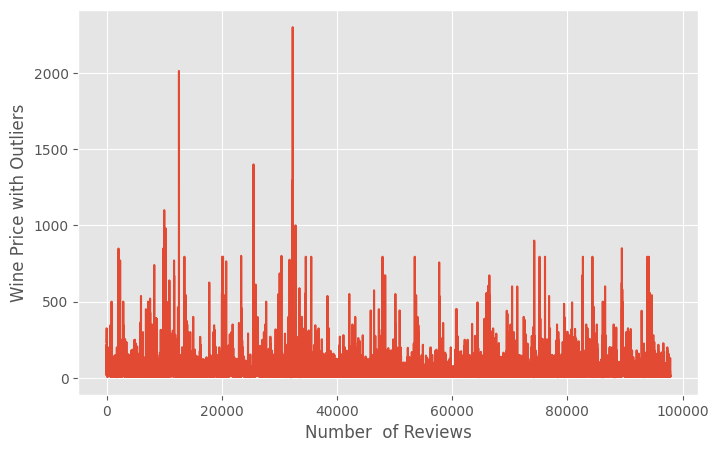

In [205]:
reviews_hybrid["Price"].plot(figsize=(8, 5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Wine Price with Outliers")
plt.show()

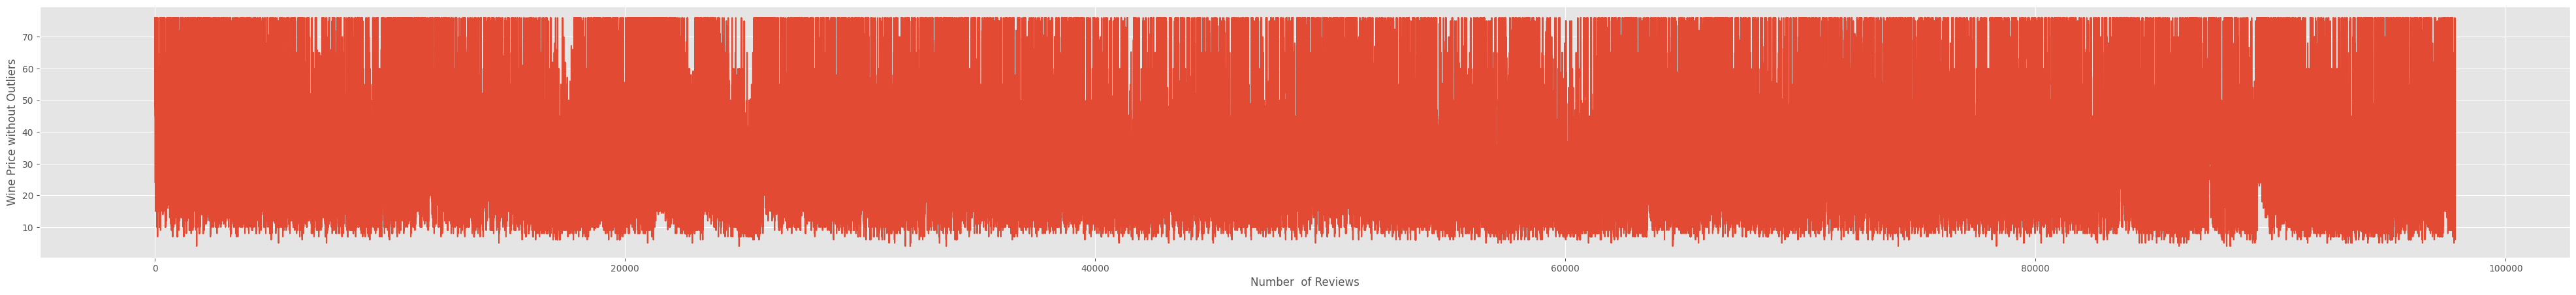

In [206]:
reviews_cap_fl["Price"].plot(figsize=(50, 5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Wine Price without Outliers")
plt.show()

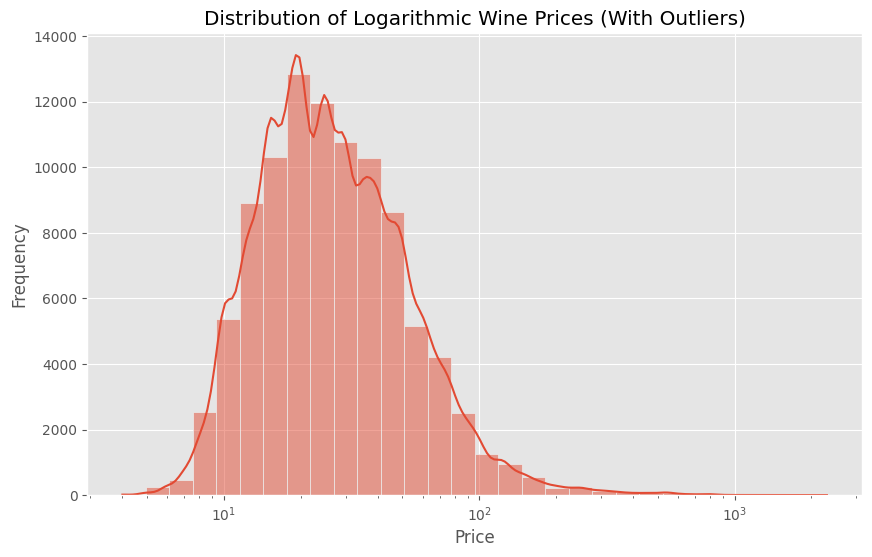

In [207]:
# Visualize the distribution of wine prices after removing outliers from the new dataset
plt.figure(figsize=(10, 6))
sns.histplot(reviews_hybrid["Price"].dropna(), kde=True, bins=30, log_scale=True)
plt.title('Distribution of Logarithmic Wine Prices (With Outliers)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

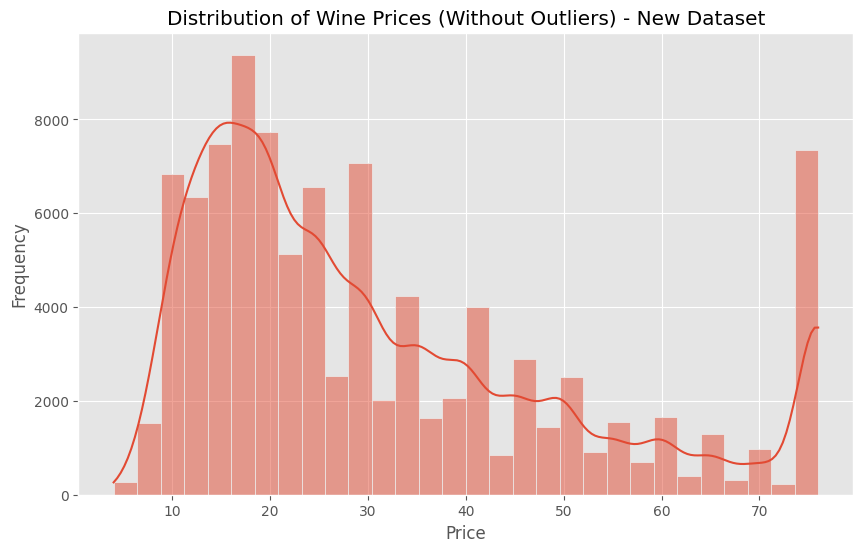

In [208]:
# Visualize the distribution of wine prices after removing outliers from the new dataset
plt.figure(figsize=(10, 6))
sns.histplot(reviews_cap_fl["Price"].dropna(), kde=True, bins=30)
plt.title('Distribution of Wine Prices (Without Outliers) - New Dataset')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

When we apply flooring and capping to our data, as we've done with the wine prices in the `reviews_hybrid` dataset, and then observe a bimodal distribution (two peaks) in the histogram, it suggests a few interesting aspects about our data:

1. **Presence of Two Modes**: The bimodal distribution indicates that there are two dominant price ranges in our dataset where a significant number of wines are concentrated. Flooring and capping have likely amplified this by pushing outlier prices into these dominant ranges.

2. **Effect of Flooring and Capping**: By setting lower and upper bounds and adjusting all outliers to these bounds, we've increased the frequency of wines at these price points. If the lower and upper bounds correspond to already common prices, this process can accentuate the peaks in those areas.

3. **Considerations for Analysis**: The observed bimodal distribution after flooring and capping could have implications for our analysis. It might suggest segmenting the data for further analysis or using models that can accommodate bimodal distributions.

4. **Data Insights**: This distribution can provide insights into consumer behavior or market segmentation within the wine industry. For example, `it might indicate that there are two main market segments for wines in the dataset, such as budget wines and premium wines, with fewer wines in the intermediate price range.`

The visualization step you've taken is crucial for understanding the impact of data transformations like flooring and capping. It's always important to visualize our data before and after such transformations to catch any unintended effects and to gain deeper insights into the data's structure.

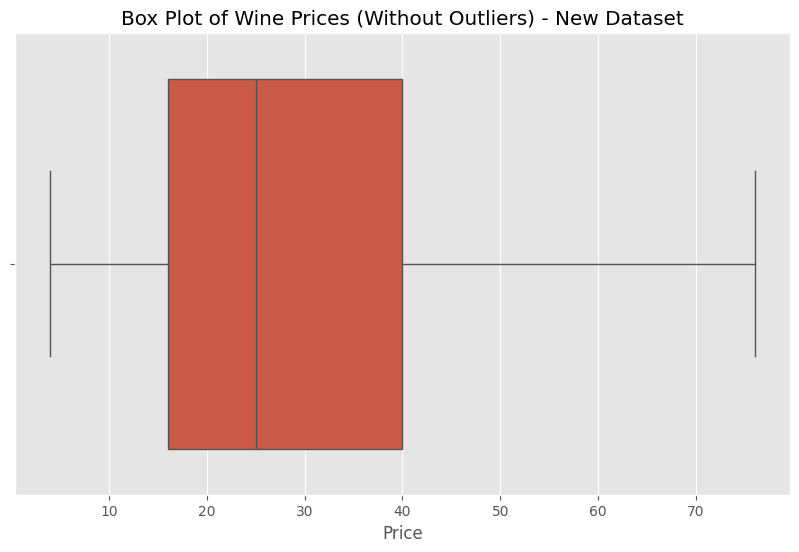

In [209]:
# Box plot of wine prices after removing outliers from the new dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x=reviews_cap_fl["Price"])
plt.title('Box Plot of Wine Prices (Without Outliers) - New Dataset')
plt.xlabel('Price')
plt.show()

In [210]:
# Second merge with the datasets with and without outliers
stat(reviews_cap_fl['Price']).merge(stat(reviews_hybrid["Price"]), how='left', left_index=True, right_index=True, suffixes=('_after', '_before'))

Value_after  \
Count                          97846   
Number of Missing Values           0   
Mean                           31.18   
Standard Deviation             19.34   
Variance                       373.9   
Skewness                        1.02   
Kurtosis                        0.03   
Coefficient of Variation        0.62   
Mode                            76.0   
Sum                        3051121.6   
Q1 (25th percentile)            16.0   
Median (50th percentile)        25.0   
Q3 (75th percentile)            40.0   
IQR                             24.0   
Range, excl outliers            72.0   
Whisker Bottom                   4.0   
Whisker Top                     76.0   
Max value                       76.0   
Min value                        4.0   
Range, incl. outliers           72.0   
Outliers                          []   
Number of Outliers                 0   
IQR midpoint                    28.0   
Whiskers midpoint               40.0   

                                                               Value_before  
Count                                                                 97846  
Number of Missing Values                                                  0  
Mean                                                                  35.04  
Standard Deviation                                                    41.14  
Variance                                                            1692.19  
Skewness                                                              11.41  
Kurtosis                                                              307.9  
Coefficient of Variation                                               1.17  
Mode                                                                   20.0  
Sum                                                               3428986.6  
Q1 (25th percentile)                                                   16.0  
Median (50th percentile)                                               25.0  
Q3 (75th percentile)                                                   40.0  
IQR                                                                    24.0  
Range, excl outliers                                                   72.0  
Whisker Bottom                                                          4.0  
Whisker Top                                                            76.0  
Max value                                                            2300.0  
Min value                                                               4.0  
Range, incl. outliers                                                2296.0  
Outliers                  [235.0, 110.0, 90.0, 110.0, 80.0, 90.0, 185.0,...  
Number of Outliers                                                     6199  
IQR midpoint                                                           28.0  
Whiskers midpoint                                                      40.0

With Cap and Floor Method we ensures that all data points are retained in the dataset, with extreme values brought within a more typical range.

**Boxplot Analysis (Hypothetical Based on Provided Statistics)**:

- **Whiskers and IQR**: The Interquartile Range (IQR) remains the same (24.0) before and after removing outliers, which suggests that the middle 50% of the data is unchanged by the flooring and capping process. The whisker values (bottom at 4.0 and top at 76.0) also remain consistent, indicating that the main body of your data distribution is not affected by extreme values.

- **Outliers**: After applying flooring and capping, there are no outliers, as all data points now fall within the defined whisker boundaries. This contrasts with the original data, which had 6,199 outliers, indicating a significant number of extreme values initially present.

- **Maximum and Minimum Values**: The maximum value after flooring and capping is 76.0, significantly lower than the original maximum of 2300.0. This shows the effect of capping the upper bound, reducing the impact of very high prices. The minimum value remains unchanged at 4.0, indicating that the flooring did not need to adjust many (if any) values on the lower end.

- **Mean and Standard Deviation**: The mean price decreases slightly from 35.04 to 31.18 after flooring and capping, and the standard deviation is significantly reduced from 41.14 to 19.34. This reduction in standard deviation reflects the decrease in variability in your data after extreme values have been adjusted.

- **Skewness and Kurtosis**: The skewness is reduced from 11.41 to 1.02, and kurtosis drops dramatically from 307.9 to 0.03, indicating a more symmetric and less heavy-tailed distribution after the outlier treatment. This suggests that the flooring and capping process has made the distribution more normal-like by limiting the influence of extreme values.

**Conclusion**:

The application of flooring and capping has effectively moderated the impact of outliers in your dataset, leading to a distribution with fewer extremes as indicated by the reduced range, skewness, and kurtosis. The boxplot show a more compact distribution with no points beyond the whiskers, indicating the absence of outliers.

The change in the distribution's shape, particularly the emergence of two peaks (bimodality) in the histogram, suggests that while extreme outliers have been addressed, the data might inherently have multiple modes reflecting different segments within the wine market. These could represent different pricing tiers or categories of wines that become more pronounced after outlier adjustment. This distribution can provide insights into consumer behavior or market segmentation within the wine industry. For example, it might indicate that there are two main market segments for wines in the dataset, such as budget wines and premium wines, with fewer wines in the intermediate price range.

The adjusted boxplot shows a dataset with a reduced range of prices, no outliers, and a more symmetrical distribution of wine prices. The flooring and capping process has effectively minimized the impact of extreme prices, resulting in a dataset that may be more representative of typical wine prices and potentially more useful for further analysis.

#### (4.2.4) Discretization and Binning of 'Points' into 'Rating'

**Reducing Sensitivity to Outliers:**
   - Discretization can reduce the impact of outliers, as extreme values are often grouped into the same category. This can be beneficial when outliers might skew the results of statistical analyses.
     - Discretization can help mitigate the impact of noise and outliers in the data. Extreme values can be grouped into the same category, reducing their influence on the analysis.
    
 **Interpretability:**
   - Discretization makes the results of statistical analysis more interpretable. For example, if you're studying the impact of age on a certain outcome, discretizing age into groups (e.g., young, middle-aged, old) can provide more interpretable results than analyzing age as a continuous variable.

**Categorical Analysis:**
   - Some statistical techniques, such as chi-squared tests or logistic regression, require categorical data. Discretization allows you to convert continuous variables into categories, facilitating the application of these methods. There is a necessity to use discretized data by many DM algorithms which can only deal with discrete attributes.

    
However, it's important to note that discretization should be done carefully, as it involves making choices about the number and width of the bins, and inappropriate choices can lead to loss of information or introduce biases. The decision to discretize should be based on the specific characteristics of the data and the goals of the analysis.

<Axes: xlabel='Price'>

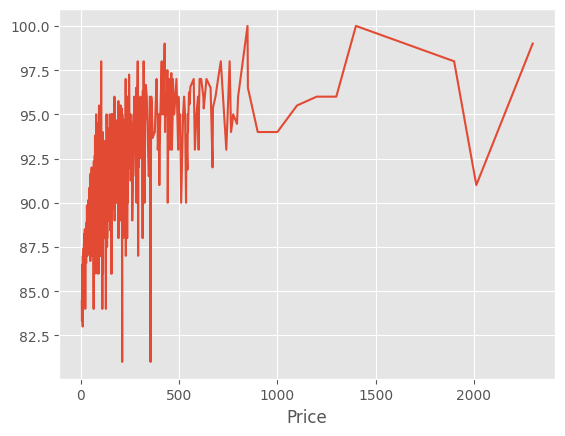

In [211]:
reviews_hybrid.groupby("Price")["Points"].mean().plot()

On the website <a href="https://www.wineenthusiast.com/blind-tasting-process/">www.wineenthusiast.com</a> they provided information how they rate the wine: 

**About the Scores**:  

Ratings reflect what our editors felt about a particular product. Beyond the rating, we encourage you to read the accompanying tasting note to learn about a product’s special characteristics.

98-100: CLASSIC The pinnacle of quality

94-97: SUPERB A great achievement

90-93: EXCELLENT Highly recommended

87-89: VERY GOOD Often good value; well recommended

83-86: GOOD Suitable for everyday consumption; often good value

80-82: ACCEPTABLE Can be employed in casual, less-critical circumstances

Products deemed unacceptable (receiving a rating below 80 points) are not reviewed.

In [212]:
# Define the bins for Points values, starting from 79 to include the lowest category starting from 80
points_bins = [79, 82, 86, 89, 93, 97, 100]

# Define the labels for each bin
rating_labels = [
    'Acceptable',  # 80-82
    'Good',        # 83-86
    'Very Good',   # 87-89
    'Excellent',   # 90-93
    'Superb',      # 94-97
    'Classic'      # 98-100
]

# Categorize Points into the new Rating column using pandas.cut
reviews_hybrid['Rating'] = pd.cut(reviews_hybrid['Points'], bins=points_bins, labels=rating_labels, include_lowest=True)

In [213]:
reviews_hybrid["Rating"].value_counts()

Rating
Very Good     33006
Good          28549
Excellent     28043
Superb         4130
Acceptable     4004
Classic         114
Name: count, dtype: int64

In [214]:
reviews_hybrid["Price"].describe()

count    97846.000000
mean        35.044729
std         41.136206
min          4.000000
25%         16.000000
50%         25.000000
75%         40.000000
max       2300.000000
Name: Price, dtype: float64

In [215]:
reviews_hybrid.groupby("Rating", observed=True)["Price"].describe()

count        mean         std   min   25%    50%    75%     max
Rating                                                                       
Acceptable   4004.0   18.486064   12.747342   5.0  11.0   15.0   22.0   354.0
Good        28549.0   20.799471   14.357770   4.0  12.0   17.0   25.0   495.0
Very Good   33006.0   28.789478   20.364437   6.0  17.0   23.6   35.0   542.2
Excellent   28043.0   47.836722   39.601814   5.0  27.0   40.0   57.0  2013.0
Superb       4130.0  106.332591  109.599439  12.4  50.0   74.0  115.0  1300.0
Classic       114.0  265.789474  325.103999  39.0  95.3  160.0  300.0  2300.0

Based on the groupby and describe output for the "Price" within each "Rating" category, we can observe some interesting trends in our wine dataset. Here's a summary of the price distribution by rating category:

**Price Distribution by Rating**

1. **Acceptable** (80-82 points)
   - Count: 4,004 wines
   - Mean Price: 18.49    
   - Standard Deviation: 12.75  
   - Price Range: 5 to 354

2. **Good** (83-86 points)
   - Count: 28,549 wines
   - Mean Price: 20.80  
   - Standard Deviation: 14.36
   - Price Range: 4 to 495

3. **Very Good** (87-89 points)
   - Count: 33,006 wines
   - Mean Price: 28.79  
   - Standard Deviation: 20.36
   - Price Range: 6 to 542.20

4. **Excellent** (90-93 points)
   - Count: 28,043 wines
   - Mean Price: 47.84  
   - Standard Deviation: $39.60
   - Price Range: 5 to 2013

5. **Superb** (94-97 points)
   - Count: 4,130 wines
   - Mean Price: 106.33  
   - Standard Deviation: $109.60
   - Price Range: 12.40 to 1300

6. **Classic** (98-100 points)
   - Count: 114 wines
   - Mean Price: 265.79  
   - Standard Deviation: 325.10
   - Price Range: 39 to 2300

**Observations**
- As the rating category increases from "Acceptable" to "Classic," there's a general trend of increasing average price, indicating that higher-rated wines tend to be more expensive, which aligns with expectations.
- The standard deviation in price also tends to increase with higher ratings, especially noticeable in the "Superb" and "Classic" categories. This suggests greater price variability among the highest-rated wines, possibly due to factors like rarity, brand prestige, and collectibility.
- The "Very Good" category has the highest count of wines, followed closely by "Good" and "Excellent," indicating a substantial portion of the dataset falls within these quality brackets.
- The "Classic" category, while having the highest average price, contains the smallest number of wines, reflecting the rarity and exclusivity of wines rated between 98-100 points.
- Wide Price Ranges: Each category encompasses a broad range of prices, from relatively affordable to quite expensive wines, which suggests that factors other than rating significantly influence price.

**Implications**
- These insights can inform pricing strategies, marketing efforts, and inventory decisions for wine sellers and distributors.
- For consumers, this data provides an overview of expected price ranges based on wine quality ratings, aiding in more informed purchasing decisions.

If we're looking to analyze or utilize this data further, consider how these price trends correlate with other factors like country of origin, varietal, or vintage. Such analyses can provide deeper insights into the wine market dynamics.

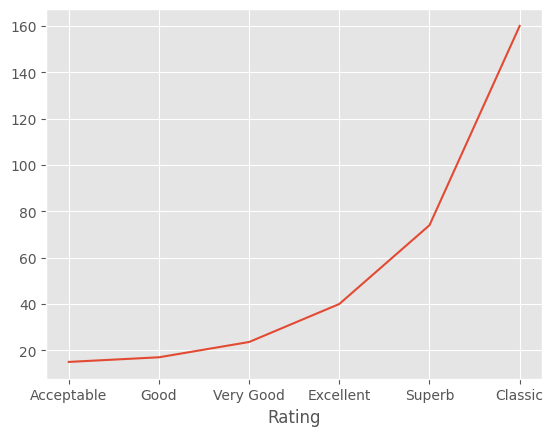

In [216]:
reviews_hybrid.groupby("Rating", observed=True)["Price"].median().plot()
plt.show()

#### (4.2.5) Discretization and Binning of 'Price' into 'Price_cat'

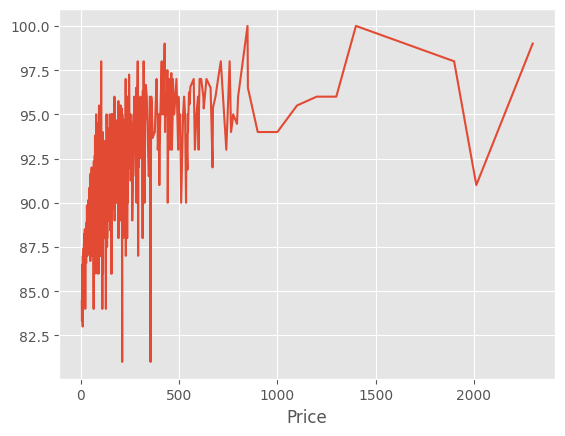

In [217]:
reviews_hybrid.groupby("Price")["Points"].mean().plot()
plt.show()

In [218]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb  
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb

Above plot show that if we segment prices at certain ranges it will give us better insight about prices. We will try to analyse different approaches of price discretization and binning to get optimal insight about prices.

##### **(4.2.5.1) Approach Discretizing Price based on Equal width bins**

In [219]:
price_bins = [0, 10, 20, 50, 100, 500, 2300]

In [220]:
cats = pd.cut(reviews_hybrid["Price"], price_bins, right = True) # right interval is included but left interval is not included
cats

0        (100, 500]
1        (100, 500]
2         (50, 100]
3         (50, 100]
4         (50, 100]
            ...    
97841      (10, 20]
97842      (10, 20]
97843       (0, 10]
97844       (0, 10]
97845       (0, 10]
Name: Price, Length: 97846, dtype: category
Categories (6, interval[int64, right]): [(0, 10] < (10, 20] < (20, 50] < (50, 100] < (100, 500] < (500, 2300]]

In [221]:
cats.value_counts() # Look at the trend of categories

Price
(20, 50]       42890
(10, 20]       32824
(50, 100]      12530
(0, 10]         6583
(100, 500]      2899
(500, 2300]      120
Name: count, dtype: int64

In [222]:
reviews_hybrid["Price_cat"] = cats

In [223]:
reviews_hybrid.groupby("Price_cat", observed=True)["Points"].mean()

Price_cat
(0, 10]        84.711074
(10, 20]       86.393706
(20, 50]       88.491793
(50, 100]      90.783081
(100, 500]     92.607451
(500, 2300]    94.975000
Name: Points, dtype: float64

<Axes: xlabel='Price_cat'>

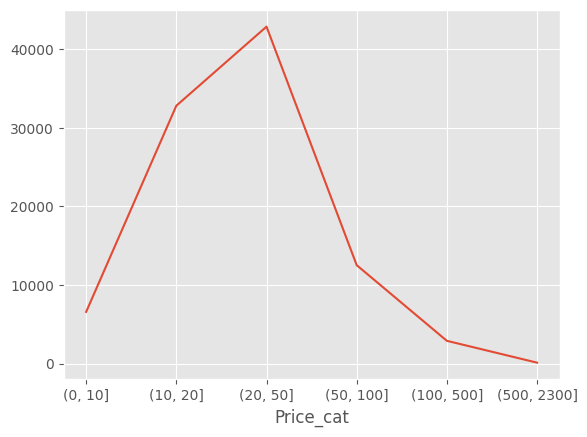

In [224]:
reviews_hybrid.groupby("Price_cat", observed=True)["Points"].count().plot()

So it might be better to actually replace the intervals by names.

And therefore we can also define names for our groups here:

Internationally recognized price segregation for wine isn't standardized due to the vast diversity in wine production, regional differences, market preferences, and economic factors. However, the wine industry often informally categorizes wines into various price segments to help consumers, retailers, and enthusiasts navigate the complex market. These segments can vary by region and over time but generally include categories such as:

**1. Budget**
- **Price Range**: Under $\$10$
- **Characteristics**: These wines are highly affordable and meant for everyday consumption. They are often produced in large quantities and are accessible to a wide audience.

**2. Mid-Range**
- **Price Range**: $\$10$ to $\$20$
- **Characteristics**: Wines in this category offer a step up in quality and complexity from budget wines. They are targeted at consumers looking for a good balance between price and quality, often for casual drinking or dining.

**3. Premium Wines**
- **Price Range**: $\$20$ to $\$50$
- **Characteristics**: These wines are expected to present higher quality, distinctiveness, and often a reflection of their terroir. They might be produced in smaller quantities and cater to more discerning wine drinkers.

**4. Ultra-Premium Wines**
- **Price Range**: $\$50$ to $\$100$
- **Characteristics**: Wines in this segment are often from well-known vineyards or vintages and offer exceptional quality. They may be sought after by enthusiasts and collectors.

**5. Luxury Wines**
- **Price Range**: $\$100$ to $\$500$
- **Characteristics**: These wines are from the most prestigious vineyards and regions, often produced in limited quantities. They are known for their exceptional quality and are sought after by enthusiasts and collectors alike.

**6. Collectible Wines**
- **Price Range**: $\$500$ to $\$2300$
- **Characteristics**: These wines are highly sought after for their rarity, vintage, and potential to improve with age. They are typically purchased by collectors and investors.

**Considerations**:
- **Regional Variations**: The price points for these categories can vary significantly in different countries and regions based on factors like taxes, import duties, and local production costs.
- **Scoring and Ratings**: While there's a correlation between price and quality (often indicated by wine scores), it's not absolute. Exceptional value can be found in all price ranges, and not all high-priced wines are universally acclaimed.

When analyzing wine prices or making purchasing decisions, it's helpful to consider these general categories as a guide while keeping in mind the specific context of the wine's origin, production, and reputation.

In [225]:
group_labels = ["Budget", "Mid-Range", "Premium", "Ultra-Premium", "Luxury", "Collectible"]
price_bins = [0, 10, 20, 50, 100, 500, 2300]
reviews_hybrid["Price_cat"] = pd.cut(reviews_hybrid["Price"], price_bins, right = True, labels=group_labels)

In [226]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

  Price_cat  
0    Luxury  
1    Luxury

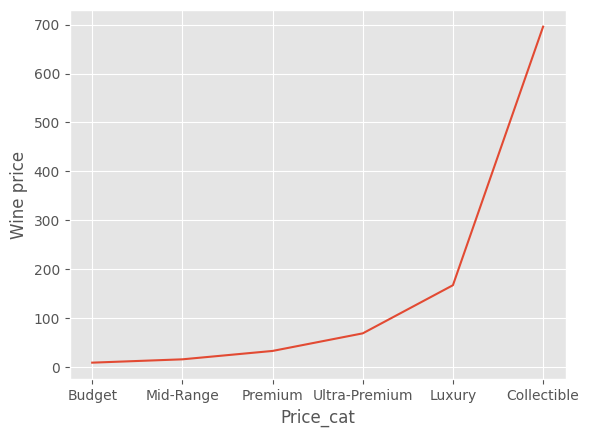

In [227]:
reviews_hybrid.groupby("Price_cat", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.show()

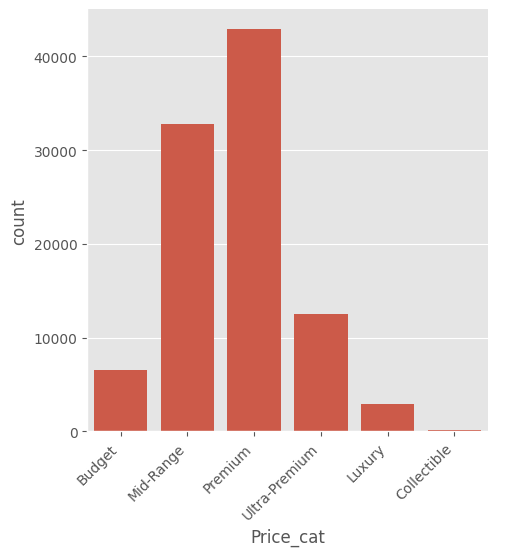

In [229]:
sns.catplot(data=reviews_hybrid, x="Price_cat", kind="count")
plt.xticks(rotation=45, ha="right")
plt.show()

##### **(4.2.5.2) Approach Discretizing Price based on putting the same number of reviews into different brackets**

And in this approach we want to discretize the Price column and the question is always which bins we should define and which bin edges we want to have.

Lets say we want pandas automatically split Price into 5 bins:

In [232]:
pd.cut(reviews_hybrid["Price"], bins=5) # this splits the price from min to max into 5 equal bins

0        (1.704, 463.2]
1        (1.704, 463.2]
2        (1.704, 463.2]
3        (1.704, 463.2]
4        (1.704, 463.2]
              ...      
97841    (1.704, 463.2]
97842    (1.704, 463.2]
97843    (1.704, 463.2]
97844    (1.704, 463.2]
97845    (1.704, 463.2]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(1.704, 463.2] < (463.2, 922.4] < (922.4, 1381.6] < (1381.6, 1840.8] < (1840.8, 2300.0]]

In [233]:
pd.cut(reviews_hybrid["Price"], bins=5, precision=0) # round the presicion to zero digits after the comma

0        (2.0, 463.0]
1        (2.0, 463.0]
2        (2.0, 463.0]
3        (2.0, 463.0]
4        (2.0, 463.0]
             ...     
97841    (2.0, 463.0]
97842    (2.0, 463.0]
97843    (2.0, 463.0]
97844    (2.0, 463.0]
97845    (2.0, 463.0]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(2.0, 463.0] < (463.0, 922.0] < (922.0, 1382.0] < (1382.0, 1841.0] < (1841.0, 2300.0]]

And these are actually called equal width bins because the width is actually the same for each bin. 

In [234]:
922-464, 1382-923, 1841-1383

(458, 459, 458)

In [235]:
reviews_hybrid["Price_cat"] = pd.cut(reviews_hybrid["Price"], bins=5, precision=0) 

In [236]:
reviews_hybrid["Price_cat"].value_counts()

Price_cat
(2.0, 463.0]        97706
(463.0, 922.0]        130
(922.0, 1382.0]         6
(1841.0, 2300.0]        3
(1382.0, 1841.0]        1
Name: count, dtype: int64

And as we can see here, so we have the majority of reviews in one bin and we have some bins where we almost do not have any reviews.

**So in this case, if we simply take five bins with equal width, this does not really make sense here.**

So these bins are actually the opposite of being equally sized. It's very likely that in further analysis, transforming the Price column into these five bins might not be really helpful and the results of further analysis might be quite weak. So here at this point, we might want to create bins where the reviews are more equally distributed over all of these bins and here comes the Method pd.qcut():

In [237]:
# This will put the same nummber of reviews into different backets. 
# Each bucket 97846/5 =19569.2 reviews
pd.qcut(reviews_hybrid["Price"], q=5) 

0        (46.4, 2300.0]
1        (46.4, 2300.0]
2        (46.4, 2300.0]
3        (46.4, 2300.0]
4        (46.4, 2300.0]
              ...      
97841     (3.999, 15.0]
97842      (15.0, 20.0]
97843     (3.999, 15.0]
97844     (3.999, 15.0]
97845     (3.999, 15.0]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(3.999, 15.0] < (15.0, 20.0] < (20.0, 30.0] < (30.0, 46.4] < (46.4, 2300.0]]

In [238]:
97846/5

19569.2

As you see the range of Price is different now but the number of reviews are equal per each bin:

In [239]:
15.0-3.999, 20.0-15.0, 30.0-20.0, 46.4-30.0, 2300.0-46.4

(11.001, 5.0, 10.0, 16.4, 2253.6)

- (3.999, 15.0] => around 20% of reviews or 22269 reviews   
- (15.0, 20.0] => around 20% of reviews  or 17138 reviews  
- (20.0, 30.0] => around 20% of reviews  or 21395 reviews  
- (30.0, 46.4] => around 20% of reviews  or 17477 reviews  
- (46.4, 2300.0] => around 20% of reviews  or 19567 reviews  

In [240]:
reviews_hybrid["Price_cat"] = pd.qcut(reviews_hybrid["Price"], q=5) 

In [241]:
reviews_hybrid["Price_cat"].value_counts()

Price_cat
(3.999, 15.0]     22269
(20.0, 30.0]      21395
(46.4, 2300.0]    19567
(30.0, 46.4]      17477
(15.0, 20.0]      17138
Name: count, dtype: int64

So **the bins are here, not exactly equal sized because our Price column is not 100% continuous because there are some standard prices.** But at least in the end, it's pretty much equal sized here.

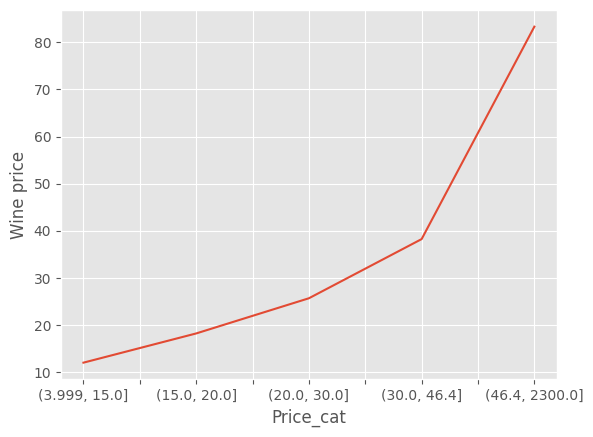

In [242]:
reviews_hybrid.groupby("Price_cat", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.show()

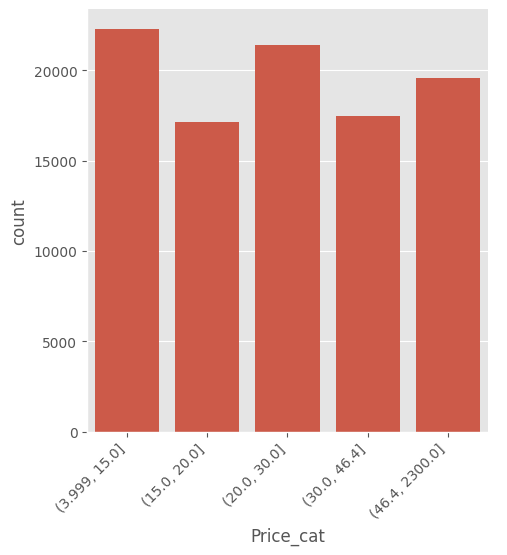

In [244]:
sns.catplot(data=reviews_hybrid, x="Price_cat", kind="count")
plt.xticks(rotation=45, ha="right")
plt.show()

**So in this case, if we simply take five bins with equal width, this does not really make sense here.**

##### **(4.2.5.3) Approach Discretizing Price based on defining customized quanlites**

And in the end, the question is, does these bins really make sense and does these bins really reflect the economic reality?

So let's go back here to our bins and we can see here we have the last **bin from (46.4, 2300.0].**

And this would be actually the bin for the very rich people or very rich reviewers.

However, we can see here in the very last bin that the width is actually quite high. So from from 46.4 till 2300.

And **I think it's not correct to say that this bin contains all super rich reviewer of wine**.

**So I do think that a wine price of around 50 is quite expensive.**

**But I don't think that 50 is a super expensive price that only super rich reviewers can afford.**

And also by definition, all bins contain 20% of all reviewers.

And **I think it's also not correct to say that in the highest or most expensive bin, there are 20% of all reviewers.**

**So in reality, the rich or super rich wine reviewers are not 20% of all people, but maybe only 5 or 10%.**

Therefore, lets further customize our analysis by defining customzed quantiles:

Before we used:

In [247]:
pd.qcut(reviews_hybrid["Price"], q=5) 

0        (46.4, 2300.0]
1        (46.4, 2300.0]
2        (46.4, 2300.0]
3        (46.4, 2300.0]
4        (46.4, 2300.0]
              ...      
97841     (3.999, 15.0]
97842      (15.0, 20.0]
97843     (3.999, 15.0]
97844     (3.999, 15.0]
97845     (3.999, 15.0]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(3.999, 15.0] < (15.0, 20.0] < (20.0, 30.0] < (30.0, 46.4] < (46.4, 2300.0]]

Now, we will use:

In [248]:
pd.qcut(reviews_hybrid["Price"], q=[0, 0.1, 0.25, 0.5, 0.9, 1]) # customezed quantiles

0        (65.0, 2300.0]
1        (65.0, 2300.0]
2        (65.0, 2300.0]
3          (25.0, 65.0]
4        (65.0, 2300.0]
              ...      
97841      (12.0, 16.0]
97842      (16.0, 25.0]
97843     (3.999, 12.0]
97844     (3.999, 12.0]
97845     (3.999, 12.0]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(3.999, 12.0] < (12.0, 16.0] < (16.0, 25.0] < (25.0, 65.0] < (65.0, 2300.0]]

In [249]:
pd.qcut(reviews_hybrid["Price"], q=[0, 0.1, 0.25, 0.5, 0.9, 1], precision=0)

0        (65.0, 2300.0]
1        (65.0, 2300.0]
2        (65.0, 2300.0]
3          (25.0, 65.0]
4        (65.0, 2300.0]
              ...      
97841      (12.0, 16.0]
97842      (16.0, 25.0]
97843       (3.0, 12.0]
97844       (3.0, 12.0]
97845       (3.0, 12.0]
Name: Price, Length: 97846, dtype: category
Categories (5, interval[float64, right]): [(3.0, 12.0] < (12.0, 16.0] < (16.0, 25.0] < (25.0, 65.0] < (65.0, 2300.0]]

- (3.0, 12.0] => (0, 10%] => 10% reviews => very cheap
- (12.0, 16.0] => (10%, 25%] => 15% reviews => cheap 
- (16.0, 25.0] => (25%, 50%] => 25% reviews => moderate 
- (25.0, 65.0]=> (50%, 90%] => 40% reviews => expensive
- (65.0, 2300.0] => (90%, 100%] => 10% reviews => very expensive

So here we have five buckets.

We have the 10% poorest reviewers that paid the lowest wine prices.

Then we have actually three moderate bins and then we have the bin for the super rich reviewers who are actually the 10% richest wine reviews in dataset.

And as we can see here with our bins, we have actually three digits.

So I do think we now have bins that better reflect the economic power of the reviewers.

In [250]:
reviews_hybrid["Price_cat"] = pd.qcut(reviews_hybrid["Price"], q=[0, 0.1, 0.25, 0.5, 0.9, 1], precision=0)

In [251]:
reviews_hybrid["Price_cat"].value_counts()

Price_cat
(25.0, 65.0]      37702
(16.0, 25.0]      25910
(12.0, 16.0]      13315
(3.0, 12.0]       11914
(65.0, 2300.0]     9005
Name: count, dtype: int64

And here in the very last bin, with the 10% highest wine prices, we have actually all wine prices from 65 to 2300. So by creating here these five bins, the wine price 2300 is actually treated in the same way as a wine price 65. By doing so, we removed the potential negative effects of these outliers here so 2300.

This is a wine price without handling the outliers:

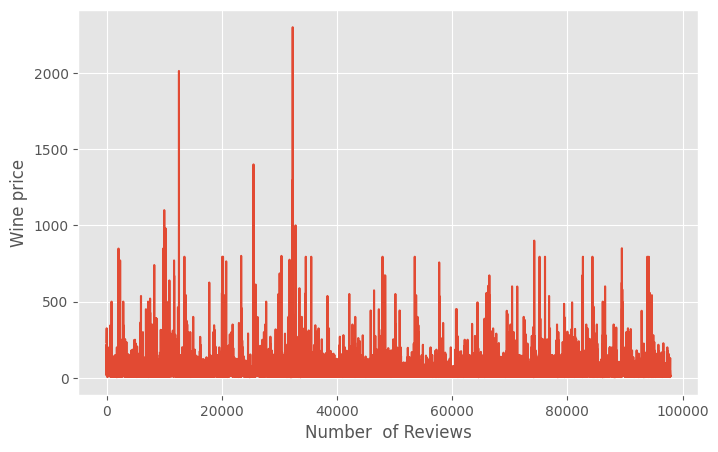

In [252]:
reviews_hybrid["Price"].plot(figsize=(8, 5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Wine price")
plt.show()

This is a wine price after binning it in categories and thus removing the outliers:

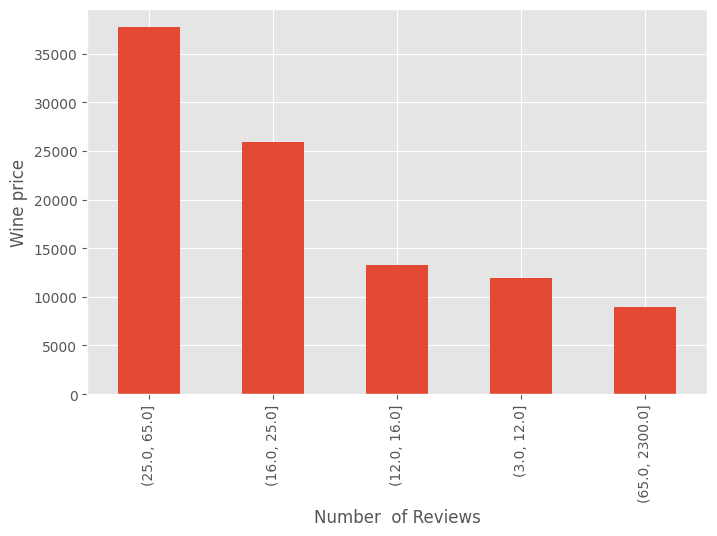

In [253]:
reviews_hybrid["Price_cat"].value_counts().plot(kind='bar', figsize=(8, 5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Wine price")
plt.show()

Adding the labels:

In [254]:
wine_labels = ["very_cheap", "cheap", "moderate", "expensive", "very_expensive"]
reviews_hybrid["Price_cat"] = pd.qcut(reviews_hybrid["Price"],
                                      q=[0, 0.1, 0.25, 0.5, 0.9, 1],
                                      precision=0, 
                                     labels=wine_labels)

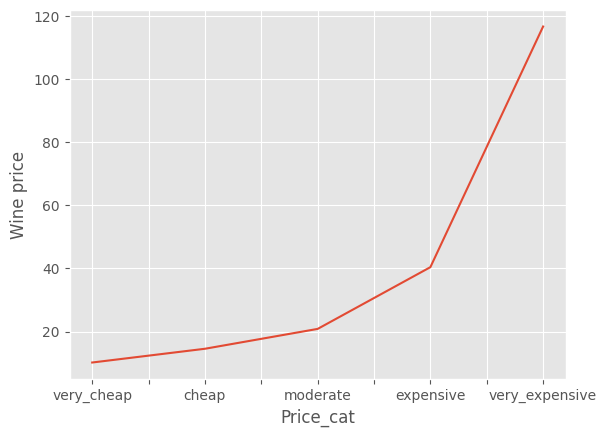

In [255]:
reviews_hybrid.groupby("Price_cat", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.show()

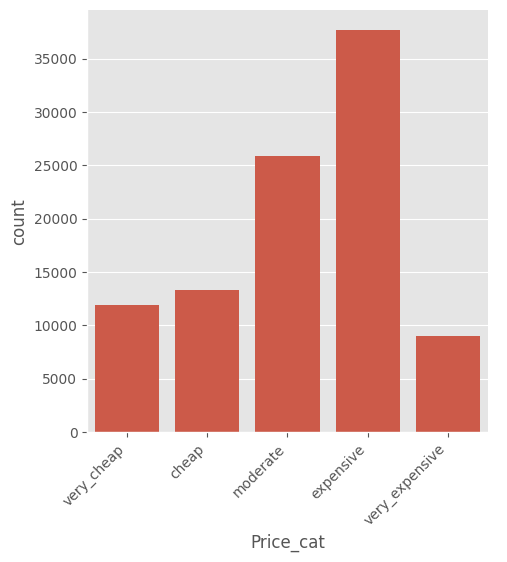

In [257]:
sns.catplot(data=reviews_hybrid, x="Price_cat", kind="count")
plt.xticks(rotation=45, ha="right")
plt.show()

##### **(4.2.5.4) Approach Discretizing Price based on defining customized quanlites and considering outliers**

Lets customize based on Price statistics:

In [260]:
stat(reviews_hybrid["Price"])

Value
Count                                                                 97846
Number of Missing Values                                                  0
Mean                                                                  35.04
Standard Deviation                                                    41.14
Variance                                                            1692.19
Skewness                                                              11.41
Kurtosis                                                              307.9
Coefficient of Variation                                               1.17
Mode                                                                   20.0
Sum                                                               3428986.6
Q1 (25th percentile)                                                   16.0
Median (50th percentile)                                               25.0
Q3 (75th percentile)                                                   40.0
IQR                                                                    24.0
Range, excl outliers                                                   72.0
Whisker Bottom                                                          4.0
Whisker Top                                                            76.0
Max value                                                            2300.0
Min value                                                               4.0
Range, incl. outliers                                                2296.0
Outliers                  [235.0, 110.0, 90.0, 110.0, 80.0, 90.0, 185.0,...
Number of Outliers                                                     6199
IQR midpoint                                                           28.0
Whiskers midpoint                                                      40.0

To discretize the "Price" based on custom quantiles and considering outliers in a separate bin. Given the detailed statistics, we can define the bins as follows:

- **"Budget-Friendly"**: Prices up to the 25th percentile (Q1), which is 16. For wines up to the 25th percentile, indicating they are accessible and affordably priced.
- **Everyday Drinking**: Prices above the 25th percentile (Q1) and up to the median (50th percentile), which is 25. For wines between the 25th percentile and the median, suggesting these are good for regular consumption without breaking the bank.
- **Above Average**: Prices above the median (50th percentile) and up to the 75th percentile (Q3), which is 40. For wines between the median and the 75th percentile, indicating a step up in price and potentially quality.
- **Premium**: Prices above the 75th percentile (Q3) and up to the upper whisker, which is 76. or wines above the 75th percentile but within the normal range, suggesting higher quality and price.
- **Outlier-Luxury**: For prices above the upper whisker, clearly indicating these are outside the typical range and may include luxury or collectible wines.

Starting the bins with -1 ensures that the lowest value in your dataset, which is 4 based on the provided statistics, is included in the first category. It's a way to make sure that the first bin captures all values from the minimum price up to the first threshold. This approach is particularly useful when using the `pd.cut` function, which is inclusive of the right bin edge by default. By setting the first bin's lower bound slightly below the minimum value in your data, you ensure that all values are categorized appropriately.

In [261]:
# Define custom bins based on the provided statistics and the requirement to separate outliers
bins = [-1, 16, 25, 40, 76, reviews_hybrid["Price"].max()]

# Define more descriptive labels for the bins
wine_labels = ["Budget-Friendly", "Everyday Drinking", "Above Average", "Premium", "Outlier-Luxury"]

# Discretize Price into categories using custom bins
reviews_hybrid["Price_cat"] = pd.cut(reviews_hybrid["Price"], bins=bins, labels=wine_labels, include_lowest=True)


In [262]:
reviews_hybrid["Price_cat"].value_counts()

Price_cat
Everyday Drinking    25910
Budget-Friendly      25229
Above Average        22311
Premium              18197
Outlier-Luxury        6199
Name: count, dtype: int64

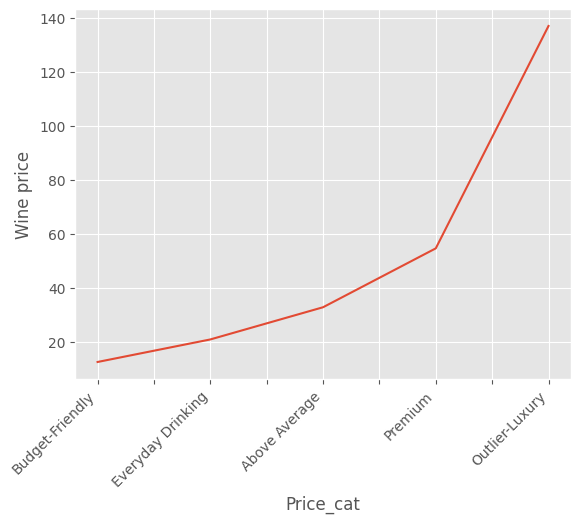

In [263]:
reviews_hybrid.groupby("Price_cat", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.xticks(rotation=45, ha="right")
plt.show()

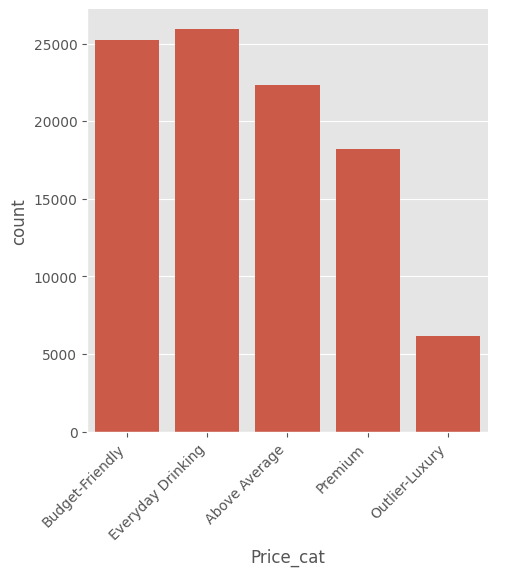

In [265]:
sns.catplot(data=reviews_hybrid, x="Price_cat", kind="count")
plt.xticks(rotation=45, ha="right")
plt.show()

In [268]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

        Price_cat  
0  Outlier-Luxury  
1  Outlier-Luxury

If my goal is to have bins that reflect the natural grouping of my data and can adapt to its distribution, Approach 4 (Custom Quantiles with Outliers) is quite sophisticated and nuanced. It considers the statistical properties of my data and separates outliers, which can be particularly useful if we're interested in analyzing or treating luxury and rare items differently.

However, if we're looking for a more data-driven approach that adapts to the actual distribution of my prices without the need for predefined bins, Approach 5 (K-Means Clustering) could offer a novel and insightful way to categorize my wine prices. This method might reveal natural price segments that aren't apparent through traditional binning techniques.

##### **(4.2.5.5) Approach K-Means Clustering for Price Binning**

Instead of predefined bins or quantiles, you could use a clustering algorithm like K-Means to categorize prices. This approach groups prices into clusters based on their similarity, which can provide a more data-driven method of categorization.

**Pros:**
- Bins are determined based on the actual distribution of your data, which can provide more meaningful categories.
- Can adapt to complex data distributions and naturally separate different price segments.

**Cons:**
- Requires choosing the number of clusters (K), which might need some experimentation or domain knowledge.
- Might be less interpretable than simple quantiles or predefined bins, as the boundaries are determined by the algorithm.

**Recommendation**

If your goal is to have bins that reflect the natural grouping of your data and can adapt to its distribution, **Approach 4 (Custom Quantiles with Outliers)** is quite sophisticated and nuanced. It considers the statistical properties of your data and separates outliers, which can be particularly useful if you're interested in analyzing or treating luxury and rare items differently.

However, if you're looking for a more data-driven approach that adapts to the actual distribution of your prices without the need for predefined bins, **Approach 5 (K-Means Clustering)** could offer a novel and insightful way to categorize your wine prices. This method might reveal natural price segments that aren't apparent through traditional binning techniques.

In [269]:
from sklearn.cluster import KMeans

# Step 1: Perform K-Means Clustering
# Reshape 'Price' data for K-Means (it expects 2D array)
prices = reviews_hybrid['Price'].values.reshape(-1, 1)
prices

array([[235.],
       [110.],
       [ 90.],
       ...,
       [  6.],
       [  9.],
       [  8.]])

In [270]:
# Initialize KMeans with desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(prices)

KMeans(n_clusters=5, random_state=42)

In [271]:
# Assign the cluster labels to your DataFrame
reviews_hybrid['Price_Cluster'] = kmeans.labels_

In [272]:
reviews_hybrid['Price_Cluster']

0        1
1        2
2        2
3        3
4        3
        ..
97841    0
97842    0
97843    0
97844    0
97845    0
Name: Price_Cluster, Length: 97846, dtype: int32

In [273]:
# Step 2: Analyze Clusters
# Calculate descriptive statistics for each cluster
cluster_analysis = reviews_hybrid.groupby('Price_Cluster')['Price'].agg(['mean', 'median', 'min', 'max'])

In [274]:
cluster_analysis

mean  median    min     max
Price_Cluster                                   
0               19.026594    18.0    4.0    32.8
1              245.308035   228.0  172.0   430.0
2               98.519308    90.0   72.8   171.4
3               46.930223    45.0   33.0    72.6
4              625.366474   550.0  435.8  2300.0

Based on the above cluster analysis, we can observe that the K-Means clustering has effectively segmented the wine prices into distinct groups, ranging from low to very high prices. Here is how we can interpret each cluster based on their statistics:

1. **Cluster 0 (Budget-Friendly)**:
   - Mean Price: $\$19.03$
   - Median Price: $\$18.00$
   - Price Range: $\$4.00$ to $\$32.80$
   - Interpretation: This cluster represents the most affordable wines, suitable for everyday consumption or casual drinkers looking for budget-friendly options.

2. **Cluster 1 (Luxury)**:
   - Mean Price: $\$245.31$
   - Median Price: $\$228.00$
   - Price Range: $\$172.00$ to $\$430.00$
   - Interpretation: Wines in this cluster are high-priced, indicating luxury or premium selections often sought after by enthusiasts and collectors.

3. **Cluster 2 (Premium)**:
   - Mean Price: $\$98.52$
   - Median Price: $\$90.00$
   - Price Range: $\$72.80$ to $\$171.40$
   - Interpretation: This cluster signifies wines that are above average in price, likely reflecting higher quality, distinctiveness, or a notable brand or region.

4. **Cluster 3 (Mid-Range)**:
   - Mean Price: $\$46.93$
   - Median Price: $\$45.00$
   - Price Range: $\$33.00$ to $\$72.60$
   - Interpretation: Wines in this cluster are moderately priced, offering a good balance between quality and affordability, suitable for regular consumption or special occasions.

5. **Cluster 4 (Collectible/Investment)**:
   - Mean Price: $\$625.37$
   - Median Price: $\$550.00$
   - Price Range: $\$435.80$ to $\$2300.00$
   - Interpretation: This cluster includes the most expensive wines, likely rare, vintage, or from highly prestigious vineyards, often purchased by collectors or as an investment.

Given this analysis, we can map these interpretations back to your DataFrame for meaningful categorization:

**Define the mapping based on cluster analysis** 

cluster_labels = {  
    0: 'Budget-Friendly',  
    1: 'Luxury',  
    2: 'Premium',  
    3: 'Mid-Range',  
    4: 'Collectible/Investment'  
}


In [275]:
# Step 3: Assign Meaningful Labels
# Define the mapping based on cluster analysis
cluster_labels = {
    0: 'Budget-Friendly',
    1: 'Luxury',
    2: 'Premium',
    3: 'Mid-Range',
    4: 'Collectible/Investment'
}

In [276]:
# Step 4: Apply the mapping to assign meaningful labels to each wine based on its cluster
reviews_hybrid['Price_Category'] = reviews_hybrid['Price_Cluster'].map(cluster_labels)

In [277]:
# Check the result
reviews_hybrid[['Price', 'Price_Cluster', 'Price_Category']].head()

Price  Price_Cluster Price_Category
0  235.0              1         Luxury
1  110.0              2        Premium
2   90.0              2        Premium
3   65.0              3      Mid-Range
4   66.0              3      Mid-Range

In [278]:
reviews_hybrid.head()

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   
2      US  Mac Watson honors the memory of a wine once ma...   
3      US  This spent 20 months in 30% new French oak, an...   
4  France  This is the top wine from La Bégude, named aft...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   
2         Special Selected Late Harvest      96   90.0      California   
3                               Reserve      96   65.0          Oregon   
4                            La Brûlade      95   66.0        Provence   

            Region_1           Region_2             Variety  \
0        Napa Valley               Napa  Cabernet Sauvignon   
1               Toro                NaN       Tinta de Toro   
2     Knights Valley             Sonoma     Sauvignon Blanc   
3  Willamette Valley  Willamette Valley          Pinot Noir   
4             Bandol                NaN  Provence red blend   

                    Winery  Rating       Price_cat  Price_Cluster  \
0                    Heitz  Superb  Outlier-Luxury              1   
1  Bodega Carmen Rodríguez  Superb  Outlier-Luxury              2   
2                 Macauley  Superb  Outlier-Luxury              2   
3                    Ponzi  Superb         Premium              3   
4     Domaine de la Bégude  Superb         Premium              3   

  Price_Category  
0         Luxury  
1        Premium  
2        Premium  
3      Mid-Range  
4      Mid-Range

In [279]:
reviews_hybrid["Price_Category"].value_counts()

Price_Category
Budget-Friendly           62879
Mid-Range                 27568
Premium                    6417
Luxury                      809
Collectible/Investment      173
Name: count, dtype: int64

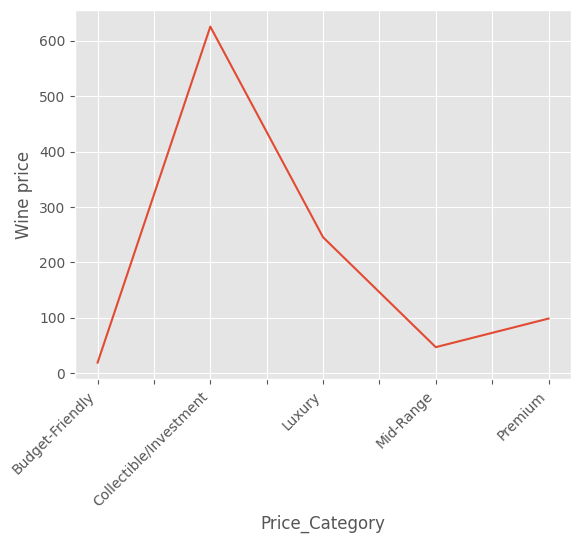

In [280]:
reviews_hybrid.groupby("Price_Category", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.xticks(rotation=45, ha="right")
plt.show()

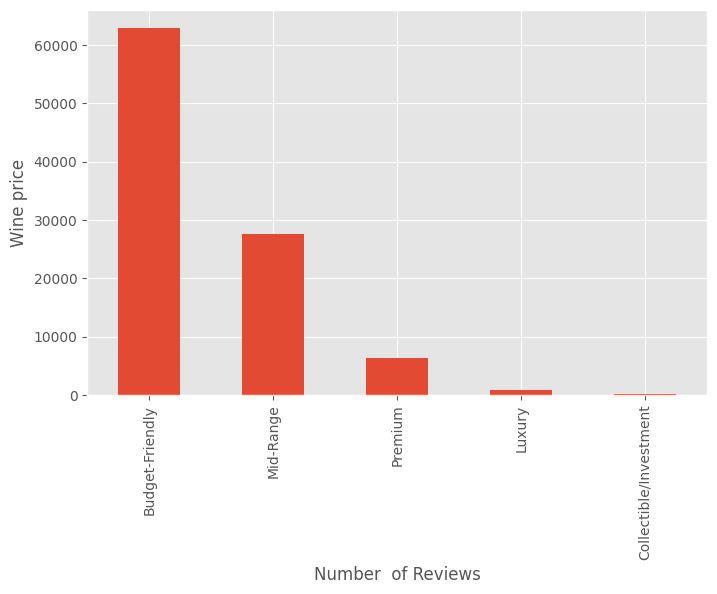

In [281]:
reviews_hybrid["Price_Category"].value_counts().plot(kind='bar', figsize=(8, 5))
plt.xlabel("Number  of Reviews")
plt.ylabel("Wine price")
plt.show()

## (5) Convert Rating and Price_Category to categorical data and set the order in `reviews_hybrid` dataset

In [285]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         97846 non-null  object  
 1   Description     97846 non-null  object  
 2   Designation     67951 non-null  object  
 3   Points          97846 non-null  int64   
 4   Price           97846 non-null  float64 
 5   Province        97846 non-null  object  
 6   Region_1        81919 non-null  object  
 7   Region_2        39491 non-null  object  
 8   Variety         97846 non-null  object  
 9   Winery          97846 non-null  object  
 10  Rating          97846 non-null  category
 11  Price_cat       97846 non-null  category
 12  Price_Cluster   97846 non-null  int32   
 13  Price_Category  97846 non-null  object  
dtypes: category(2), float64(1), int32(1), int64(1), object(9)
memory usage: 8.8+ MB


In [286]:
reviews_hybrid["Price_Category"].value_counts().sort_values()

Price_Category
Collectible/Investment      173
Luxury                      809
Premium                    6417
Mid-Range                 27568
Budget-Friendly           62879
Name: count, dtype: int64

In [287]:
reviews_hybrid['Price_Category'] = pd.Categorical(reviews_hybrid['Price_Category'], categories=["Budget-Friendly", "Mid-Range",
                                                                                    "Premium", "Luxury",
                                                                                   "Collectible/Investment"],
                                                  ordered=True)

In [288]:
rating_labels = [
    'Acceptable',  # 80-82
    'Good',        # 83-86
    'Very Good',   # 87-89
    'Excellent',   # 90-93
    'Superb',      # 94-97
    'Classic'      # 98-100
]

In [289]:
reviews_hybrid['Rating'] = pd.Categorical(reviews_hybrid['Rating'], categories=rating_labels, ordered=True)

In [290]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         97846 non-null  object  
 1   Description     97846 non-null  object  
 2   Designation     67951 non-null  object  
 3   Points          97846 non-null  int64   
 4   Price           97846 non-null  float64 
 5   Province        97846 non-null  object  
 6   Region_1        81919 non-null  object  
 7   Region_2        39491 non-null  object  
 8   Variety         97846 non-null  object  
 9   Winery          97846 non-null  object  
 10  Rating          97846 non-null  category
 11  Price_cat       97846 non-null  category
 12  Price_Cluster   97846 non-null  int32   
 13  Price_Category  97846 non-null  category
dtypes: category(3), float64(1), int32(1), int64(1), object(8)
memory usage: 8.1+ MB


In [291]:
reviews_hybrid["Price_Category"].sort_values()

97845           Budget-Friendly
45786           Budget-Friendly
45787           Budget-Friendly
45788           Budget-Friendly
45789           Budget-Friendly
                  ...          
89448    Collectible/Investment
89452    Collectible/Investment
89458    Collectible/Investment
25884    Collectible/Investment
20106    Collectible/Investment
Name: Price_Category, Length: 97846, dtype: category
Categories (5, object): ['Budget-Friendly' < 'Mid-Range' < 'Premium' < 'Luxury' < 'Collectible/Investment']

In [292]:
reviews_hybrid["Rating"].sort_values()

49675    Acceptable
49918    Acceptable
49919    Acceptable
49920    Acceptable
49921    Acceptable
            ...    
23366       Classic
23365       Classic
23364       Classic
23362       Classic
23367       Classic
Name: Rating, Length: 97846, dtype: category
Categories (6, object): ['Acceptable' < 'Good' < 'Very Good' < 'Excellent' < 'Superb' < 'Classic']

# <font color="#b33939" color face="Giorgia">**Pattern Discovery Part I - Data Aggregation**</font>

## (1) Which country is dominant in Wine industry production?

Let's start by examining the country column to uncover any notable insights about the world's leading wine-producing countries. It's commonly anticipated that France and Italy play a significant role in the Wine Industry, and it appears that the USA, California has a strong presence in this dataset too. It's important to note that this information was gathered from a US-based website during a single month in the summer (June 2017). The background of the individuals providing the wine reviews is primarily American, which could influence a higher consumption of American wines owing to lower local prices.

First, let's see how many different countries are featured in the Wine Reviews.

In [293]:
# Total amount of Countries featured in the reviews:
reviews_hybrid["Country"].nunique()

47

We can examine the distinct countries in the reviews by using the ```.unique()``` method.

In [294]:
# The unique countries in the reviews:
reviews_hybrid["Country"].unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', 'India',
       'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Chili', 'Slovakia', 'Czech Republic', 'US-France'], dtype=object)

In [295]:
# Total wine reviews per country (Top 25)
reviews_hybrid["Country"].value_counts().head(25)

Country
US              40544
Italy           14850
France          14459
Spain            5443
Chile            3735
Portugal         3508
Argentina        3447
Australia        3152
Austria          1959
New Zealand      1865
Germany          1529
South Africa     1481
Greece            542
Israel            370
Canada            149
Hungary           139
Romania           106
Slovenia           72
Croatia            70
Bulgaria           56
Mexico             54
Uruguay            52
Turkey             46
Moldova            46
Georgia            30
Name: count, dtype: int64

## (2) What is the most common variety reviewed in each country?

We can use grouping to see what the most common variety reviewed in each country.

In [296]:
# Group country by the most common Variety reviewed (first ten).
reviews_hybrid.groupby("Country").Variety.max()

Country
Albania                           Kallmet
Argentina                     White Blend
Australia                       Zinfandel
Austria                          Zweigelt
Bosnia and Herzegovina             Vranec
Brazil                             Tannat
Bulgaria                      White Blend
Canada                        White Blend
Chile                           Zinfandel
Chili                          Pinot Noir
China                         White Blend
Croatia                          Zweigelt
Cyprus                          Xynisteri
Czech Republic             Welschriesling
England                   Sparkling Blend
France                        White Blend
Georgia                       White Blend
Germany                       White Blend
Greece                          Xinomavro
Hungary                       White Blend
India                              Shiraz
Israel                          Zinfandel
Italy                             Zibibbo
Japan                     

## (3) What are the most expensive and the cheapest wines?

In [297]:
reviews_hybrid[reviews_hybrid['Price'] == reviews_hybrid['Price'].max()]

Country                                        Description Designation  \
32309  France  A big, powerful wine that sums up the richness...         NaN   

       Points   Price  Province  Region_1 Region_2                   Variety  \
32309      99  2300.0  Bordeaux  Pauillac      NaN  Bordeaux-style Red Blend   

               Winery   Rating       Price_cat  Price_Cluster  \
32309  Château Latour  Classic  Outlier-Luxury              4   

               Price_Category  
32309  Collectible/Investment

In [298]:
reviews_hybrid[reviews_hybrid['Price'] == reviews_hybrid['Price'].min()]

Country                                        Description  \
1783          US  Sweet and fruity, this canned wine feels soft ...   
24854         US  There's a lot going on in this Merlot, which i...   
31927      Spain  This opens with standard cherry and berry arom...   
32133      Spain  Nice on the nose, this has a leafy note and a ...   
33667  Argentina  Crimson in color but also translucent, with a ...   
64567    Romania  Notes of sun-dried hay and green flower highli...   
74160  Argentina  Clean as anyone should reasonably expect given...   
78338   Portugal  This is a ripe-fruited wine, rich with dried f...   
86109         US  Easy, simple peach and strawberry flavors are ...   
88129         US  Light and earthy, this wine-in-a-box is clean ...   
88285         US  Packaged in a cute yellow recyclable Tetrapak,...   
88295         US  A good everyday Merlot, dry and rich in tannin...   

           Designation  Points  Price          Province    Region_1  \
1783           Unoaked      83    4.0        California  California   
24854              NaN      86    4.0        California  California   
31927              NaN      84    4.0           Levante       Yecla   
32133   Estate Bottled      84    4.0           Levante       Yecla   
33667              Red      84    4.0  Mendoza Province     Mendoza   
64567          UnWineD      86    4.0   Viile Timisului         NaN   
74160              NaN      85    4.0  Mendoza Province     Mendoza   
78338         Toutalga      86    4.0        Alentejano         NaN   
86109  White Zinfandel      83    4.0        California  California   
88129              NaN      84    4.0        California  California   
88285              NaN      84    4.0        California  California   
88295              NaN      84    4.0        California  California   

               Region_2             Variety                Winery Rating  \
1783   California Other          Chardonnay          Pam's Cuties   Good   
24854  California Other              Merlot                Bandit   Good   
31927               NaN  Cabernet Sauvignon              Terrenal   Good   
32133               NaN         Tempranillo              Terrenal   Good   
33667               NaN        Malbec-Syrah             Broke Ass   Good   
64567               NaN        Pinot Grigio         Cramele Recas   Good   
74160               NaN              Malbec         Toca Diamonte   Good   
78338               NaN      Portuguese Red  Herdade dos Machados   Good   
86109  California Other           Zinfandel            Round Hill   Good   
88129  California Other  Cabernet Sauvignon                Bandit   Good   
88285  California Other          Chardonnay                Bandit   Good   
88295  California Other              Merlot                Bandit   Good   

             Price_cat  Price_Cluster   Price_Category  
1783   Budget-Friendly              0  Budget-Friendly  
24854  Budget-Friendly              0  Budget-Friendly  
31927  Budget-Friendly              0  Budget-Friendly  
32133  Budget-Friendly              0  Budget-Friendly  
33667  Budget-Friendly              0  Budget-Friendly  
64567  Budget-Friendly              0  Budget-Friendly  
74160  Budget-Friendly              0  Budget-Friendly  
78338  Budget-Friendly              0  Budget-Friendly  
86109  Budget-Friendly              0  Budget-Friendly  
88129  Budget-Friendly              0  Budget-Friendly  
88285  Budget-Friendly              0  Budget-Friendly  
88295  Budget-Friendly              0  Budget-Friendly

## (4) What Variety of Wine was reviewed most often and how many unique Varieties?

The variety column represents the type of grape used to make the wine.  Most people are familiar with the variety, but use the term as the "name" of the wine (Red Blend).

Pinot Noir was the most reviewed wine with 9,283 reviews.

In [299]:
reviews_hybrid["Variety"].value_counts().head(25)

Variety
Pinot Noir                       9283
Chardonnay                       9163
Cabernet Sauvignon               8272
Red Blend                        6485
Bordeaux-style Red Blend         5176
Sauvignon Blanc                  4037
Syrah                            3663
Riesling                         3585
Merlot                           3178
Zinfandel                        2409
Sangiovese                       2153
Malbec                           1968
Rosé                             1909
White Blend                      1857
Tempranillo                      1622
Portuguese Red                   1441
Nebbiolo                         1339
Sparkling Blend                  1315
Shiraz                           1254
Corvina, Rondinella, Molinara    1118
Rhône-style Red Blend            1046
Pinot Gris                        899
Cabernet Franc                    883
Sangiovese Grosso                 870
Viognier                          858
Name: count, dtype: int64

In [300]:
reviews_hybrid["Variety"].nunique()

632

## (5) What is the most popular Variety of Wine by Country?

In [301]:
reviews_hybrid.groupby("Country").Variety.max().head(10)

Country
Albania                       Kallmet
Argentina                 White Blend
Australia                   Zinfandel
Austria                      Zweigelt
Bosnia and Herzegovina         Vranec
Brazil                         Tannat
Bulgaria                  White Blend
Canada                    White Blend
Chile                       Zinfandel
Chili                      Pinot Noir
Name: Variety, dtype: object

## (6) Plotting Points and Price grouped by Variety (only ten visible)

To plot 'Points' and 'Price' grouped by 'Variety' for the top ten visible varieties, we'll follow these steps:

1. Group the data by 'Variety' and calculate the average 'Points' and 'Price' for each variety.
2. Sort the grouped data by average 'Points' to get the top varieties.
3. Select the top ten varieties based on their average 'Points'.
4. Plot the average 'Points' and 'Price' for these top ten varieties in a bar chart.

Let's proceed with this analysis.



In [302]:
# Group by 'Variety' and calculate the mean 'Points' and 'Price'
variety_means = reviews_hybrid.groupby('Variety')[['Points', 'Price']].mean()
variety_means

Points      Price
Variety                                     
Agiorgitiko             85.640000  20.213333
Aglianico               88.569767  33.075969
Aidani                  82.000000  27.000000
Airen                   81.666667   9.000000
Albana                  89.800000  30.920000
...                           ...        ...
Zierfandler-Rotgipfler  90.333333  20.133333
Zinfandel               86.752179  27.141636
Zlahtina                86.000000  15.000000
Zweigelt                87.521739  21.814493
Žilavka                 87.000000  14.000000

[632 rows x 2 columns]

In [303]:
# Sort by 'Points' to get the top varieties and then select the top 10
top_varieties = variety_means.sort_values(by='Points', ascending=False).head(10)
top_varieties

Points       Price
Variety                                     
Cabernet-Shiraz        96.000000  150.000000
Trousseau Gris         93.000000   26.000000
Blauburgunder          93.000000   19.000000
Sirica                 93.000000   36.500000
Roviello               92.500000   47.100000
Tokay                  92.333333   78.916667
Nasco                  92.000000   54.000000
Torontel               92.000000   40.000000
Caprettone             92.000000   19.000000
Malbec-Cabernet Franc  92.000000   50.000000

/tmp/ipykernel_38190/4236297743.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_varieties.index, rotation=45, ha='right')


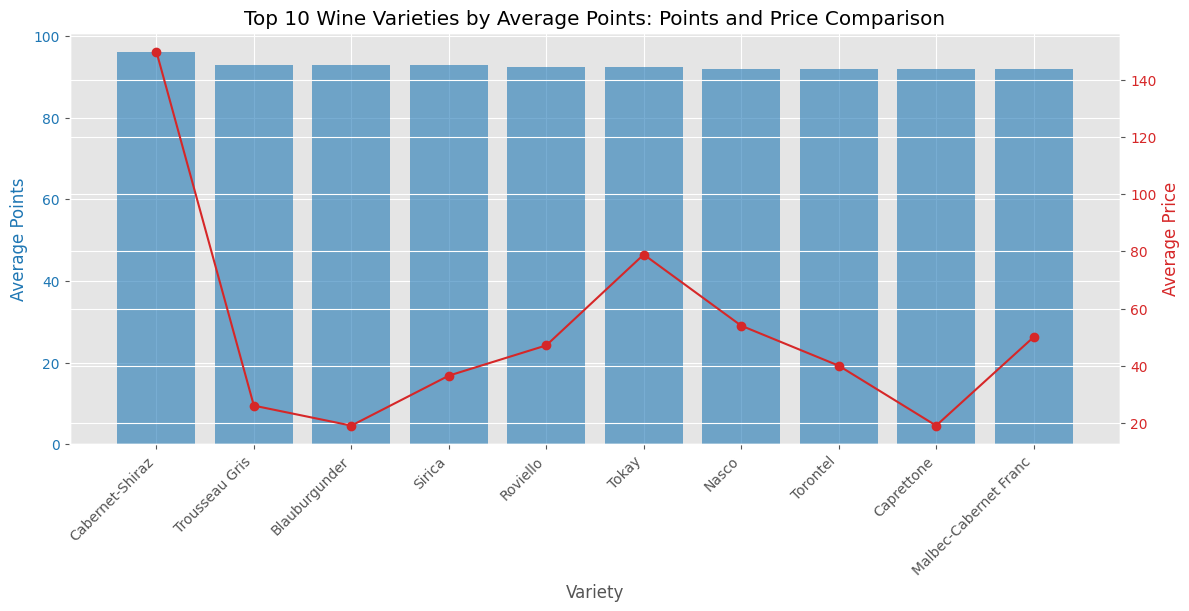

In [304]:
# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# First axis for Points
color = 'tab:blue'
ax1.set_xlabel('Variety')
ax1.set_ylabel('Average Points', color=color)
ax1.bar(top_varieties.index, top_varieties['Points'], color=color, alpha=0.6, label='Average Points')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(top_varieties.index, rotation=45, ha='right')

# Instantiate a second axis that shares the same x-axis
ax2 = ax1.twinx()  
color = 'tab:red'
ax2.set_ylabel('Average Price', color=color)
ax2.plot(top_varieties.index, top_varieties['Price'], color=color, marker='o', label='Average Price')
ax2.tick_params(axis='y', labelcolor=color)

# Add a legend and a title
fig.tight_layout()
plt.title('Top 10 Wine Varieties by Average Points: Points and Price Comparison')
plt.show()

The bar chart above compares the average points (in blue) and average price (in red) for the top 10 wine varieties, ranked by average points. Each variety is listed on the x-axis, with the average points represented by bars and the average price by a line plot with markers. This visualization helps to understand not only which varieties are rated highest on average but also how their average prices compare within this top-tier group.

The visualization provides a comparative view of the top 10 wine varieties based on their average points, alongside their average prices. Here are some observations and conclusions drawn from the chart:

1. **High Quality Across Varieties**: The top 10 varieties are all highly rated, with average points clustered in a relatively tight range. This indicates a consistently high quality across these top varieties.

2. **Variety in Pricing**: Despite the similar quality levels (as indicated by the points), there's a significant variance in the average prices of these top varieties. This suggests that factors other than quality, such as rarity, production costs, and brand prestige, might be influencing the price.

3. **Price-Points Relationship**: There doesn't seem to be a straightforward relationship between the average points and the average prices within these top varieties. Some varieties with lower average points have higher average prices and vice versa. This lack of a clear correlation suggests that while quality (as perceived through ratings) is important, it is not the sole determinant of price.

4. **Outliers and Exceptions**: There might be specific varieties that stand out either for offering high quality at a lower average price or for having a notably high average price despite their quality rating. These outliers could be of particular interest to consumers looking for value or willing to pay a premium for certain varieties.

5. **Market Dynamics and Consumer Preferences**: The data reflects the complexities of the wine market, where consumer preferences, brand reputation, availability, and many other factors can significantly impact the price. High-rated varieties do not automatically command high prices, and the perceived value of wine can vary widely among consumers and collectors.

In conclusion, while the top wine varieties by average points show a consistent level of high quality, their pricing is influenced by a complex interplay of factors beyond just quality ratings. This highlights the importance of considering individual preferences, budget, and other value factors when selecting wines, even among the top-rated varieties.

## (7) What are the Perfect Score?

In [305]:
reviews_hybrid["Points"].describe()

count    97846.000000
mean        87.956902
std          3.218116
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: Points, dtype: float64

In [306]:
reviews_hybrid["Points"].value_counts()

Points
87     12829
88     11624
90     10703
86      9919
89      8553
85      8012
91      7191
84      6868
92      6130
93      4019
83      3750
82      2491
94      2332
95      1132
81       951
80       562
96       440
97       226
98        75
99        28
100       11
Name: count, dtype: int64

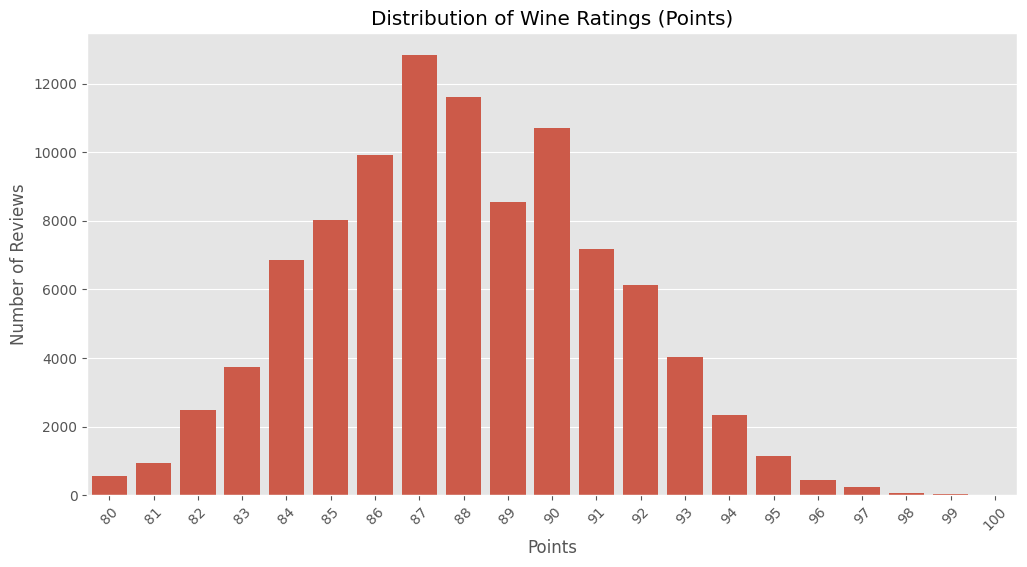

In [307]:
# Creating the bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_hybrid["Points"].value_counts().index, y=reviews_hybrid["Points"].value_counts().values)
plt.title('Distribution of Wine Ratings (Points)')
plt.xlabel('Points')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Points', ylabel='count'>

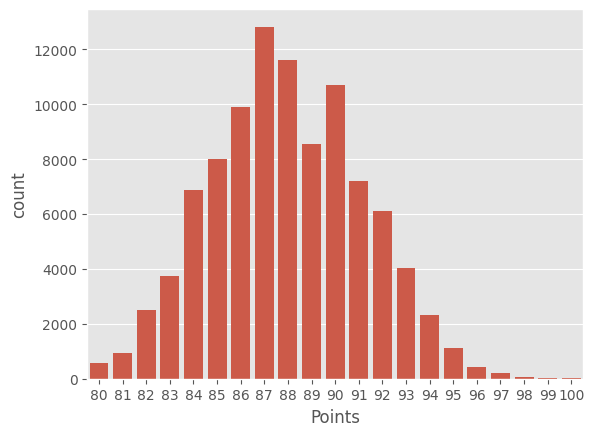

In [308]:
sns.countplot(data=reviews_hybrid, x="Points")

In [309]:
reviews_hybrid["Points"].value_counts()

Points
87     12829
88     11624
90     10703
86      9919
89      8553
85      8012
91      7191
84      6868
92      6130
93      4019
83      3750
82      2491
94      2332
95      1132
81       951
80       562
96       440
97       226
98        75
99        28
100       11
Name: count, dtype: int64

In [310]:
reviews_hybrid["Points"].value_counts().sort_index()

Points
80       562
81       951
82      2491
83      3750
84      6868
85      8012
86      9919
87     12829
88     11624
89      8553
90     10703
91      7191
92      6130
93      4019
94      2332
95      1132
96       440
97       226
98        75
99        28
100       11
Name: count, dtype: int64

In [311]:
# Maximum Score Countries
reviews_hybrid.loc[reviews_hybrid['Points'] == 100, "Country"].value_counts()

Country
US           5
Italy        3
France       2
Australia    1
Name: count, dtype: int64

In [312]:
# Minimum Score countries
reviews_hybrid.loc[reviews_hybrid['Points'] == 80, "Country"].value_counts()

Country
US              257
Spain            94
Argentina        88
Chile            55
France           13
Portugal          9
Italy             8
Australia         8
South Africa      6
New Zealand       5
Uruguay           4
Greece            4
Bulgaria          2
Germany           2
Romania           2
Mexico            2
Hungary           1
Israel            1
Cyprus            1
Name: count, dtype: int64

In [313]:
reviews_hybrid[reviews_hybrid['Points'] == 100].groupby(["Country"]).agg({"Price": [len, min, max]})

/tmp/ipykernel_38190/3013427986.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  reviews_hybrid[reviews_hybrid['Points'] == 100].groupby(["Country"]).agg({"Price": [len, min, max]})
/tmp/ipykernel_38190/3013427986.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  reviews_hybrid[reviews_hybrid['Points'] == 100].groupby(["Country"]).agg({"Price": [len, min, max]})


Price               
            len    min     max
Country                       
Australia     1  300.0   300.0
France        2  848.0  1400.0
Italy         3  195.0   460.0
US            5   65.0   245.0

In [314]:
reviews_hybrid.Points.describe()

count    97846.000000
mean        87.956902
std          3.218116
min         80.000000
25%         86.000000
50%         88.000000
75%         90.000000
max        100.000000
Name: Points, dtype: float64

## (8) Identifies the top 10 provinces based on the number of wine reviews, finds the most reviewed wine variety within each of those provinces

### **Aggregation approach**: series = groupby() + idxmax() then use .loc(series)

In [315]:
# Define top_provinces_count by grouping by 'Country' and 'Province', counting the reviews, and selecting the top 10
top_provinces_count = reviews_hybrid.groupby(['Country', 'Province']).size().nlargest(10).reset_index(name='Count')
top_provinces_count

Country          Province  Count
0         US        California  28800
1         US        Washington   6479
2      Italy           Tuscany   4611
3     France          Bordeaux   4434
4      Spain    Northern Spain   3196
5     France          Burgundy   2922
6  Argentina  Mendoza Province   2921
7         US            Oregon   2869
8      Italy            Veneto   2518
9      Italy          Piedmont   2287

In [316]:
# Create a list of top 10 Countries and Provinces
top_provinces = top_provinces_count.set_index(['Country', 'Province']).index.tolist()
top_provinces

[('US', 'California'),
 ('US', 'Washington'),
 ('Italy', 'Tuscany'),
 ('France', 'Bordeaux'),
 ('Spain', 'Northern Spain'),
 ('France', 'Burgundy'),
 ('Argentina', 'Mendoza Province'),
 ('US', 'Oregon'),
 ('Italy', 'Veneto'),
 ('Italy', 'Piedmont')]

In [317]:
# Set Country and Province as multi-index in th dataset
reviews_hybrid.set_index(['Country', 'Province'])

Description  \
Country   Province                                                              
US        California        This tremendous 100% varietal wine hails from ...   
Spain     Northern Spain    Ripe aromas of fig, blackberry and cassis are ...   
US        California        Mac Watson honors the memory of a wine once ma...   
          Oregon            This spent 20 months in 30% new French oak, an...   
France    Provence          This is the top wine from La Bégude, named aft...   
...                                                                       ...   
US        California        A Syrah-Grenache blend that's dry and rustical...   
Portugal  Port              Oreo eaters will enjoy the aromas of this wine...   
US        California        Outside of the vineyard, wines like this are w...   
Argentina Mendoza Province  Heavy and basic, with melon and pineapple arom...   
Australia Australia Other   Smooth in the mouth, this Chard starts off wit...   

                                                     Designation  Points  \
Country   Province                                                         
US        California                           Martha's Vineyard      96   
Spain     Northern Spain    Carodorum Selección Especial Reserva      96   
US        California               Special Selected Late Harvest      96   
          Oregon                                         Reserve      96   
France    Provence                                    La Brûlade      95   
...                                                          ...     ...   
US        California                                Bungalow Red      84   
Portugal  Port                                 30-year old tawny      84   
US        California                                         NaN      84   
Argentina Mendoza Province                                   NaN      84   
Australia Australia Other                                    NaN      84   

                            Price                 Region_1           Region_2  \
Country   Province                                                              
US        California        235.0              Napa Valley               Napa   
Spain     Northern Spain    110.0                     Toro                NaN   
US        California         90.0           Knights Valley             Sonoma   
          Oregon             65.0        Willamette Valley  Willamette Valley   
France    Provence           66.0                   Bandol                NaN   
...                           ...                      ...                ...   
US        California         15.0     Santa Barbara County      Central Coast   
Portugal  Port               18.0                      NaN                NaN   
US        California          6.0               California   California Other   
Argentina Mendoza Province    9.0               Uco Valley                NaN   
Australia Australia Other     8.0  South Eastern Australia                NaN   

                                       Variety                   Winery  \
Country   Province                                                        
US        California        Cabernet Sauvignon                    Heitz   
Spain     Northern Spain         Tinta de Toro  Bodega Carmen Rodríguez   
US        California           Sauvignon Blanc                 Macauley   
          Oregon                    Pinot Noir                    Ponzi   
France    Provence          Provence red blend     Domaine de la Bégude   
...                                        ...                      ...   
US        California            Syrah-Grenache            Casa Barranca   
Portugal  Port                            Port       Casa Santa Eufemia   
US        California                    Merlot                 Delicato   
Argentina Mendoza Province     Sauvignon Blanc        Finca El Portillo   
Australia Australia Other           Chardonnay            Jacob's Cre

In [318]:
# Create a list of all countries and provinces from dataset
reviews_hybrid.set_index(['Country', 'Province']).index

MultiIndex([(       'US',       'California'),
            (    'Spain',   'Northern Spain'),
            (       'US',       'California'),
            (       'US',           'Oregon'),
            (   'France',         'Provence'),
            (    'Spain',   'Northern Spain'),
            (    'Spain',   'Northern Spain'),
            (    'Spain',   'Northern Spain'),
            (       'US',           'Oregon'),
            (       'US',       'California'),
            ...
            (       'US',       'California'),
            ( 'Portugal',             'Port'),
            ('Australia',  'South Australia'),
            (       'US',         'New York'),
            (   'France',           'Alsace'),
            (       'US',       'California'),
            ( 'Portugal',             'Port'),
            (       'US',       'California'),
            ('Argentina', 'Mendoza Province'),
            ('Australia',  'Australia Other')],
           names=['Country', 'Province'], l

In [319]:
# Create a mask that filters rows of top 10 provinces based on the number of wine reviews
mask_rows_top_provinces = reviews_hybrid.set_index(['Country', 'Province']).index.isin(top_provinces)
mask_rows_top_provinces

array([ True,  True,  True, ...,  True,  True, False])

In [320]:
# Filter the dataset for these top provinces
top_provinces_data = reviews_hybrid[mask_rows_top_provinces]
top_provinces_data

Country                                        Description  \
0             US  This tremendous 100% varietal wine hails from ...   
1          Spain  Ripe aromas of fig, blackberry and cassis are ...   
2             US  Mac Watson honors the memory of a wine once ma...   
3             US  This spent 20 months in 30% new French oak, an...   
5          Spain  Deep, dense and pure from the opening bell, th...   
...          ...                                                ...   
97832         US  Made in a superripe style, this Chard is jammy...   
97836         US  Tastes kind of soft and thick in jammy cherry ...   
97841         US  A Syrah-Grenache blend that's dry and rustical...   
97843         US  Outside of the vineyard, wines like this are w...   
97844  Argentina  Heavy and basic, with melon and pineapple arom...   

                                Designation  Points  Price          Province  \
0                         Martha's Vineyard      96  235.0        California   
1      Carodorum Selección Especial Reserva      96  110.0    Northern Spain   
2             Special Selected Late Harvest      96   90.0        California   
3                                   Reserve      96   65.0            Oregon   
5                                 Numanthia      95   73.0    Northern Spain   
...                                     ...     ...    ...               ...   
97832                                   NaN      84   16.0        California   
97836                         Crimson Creek      84   27.0        California   
97841                          Bungalow Red      84   15.0        California   
97843                                   NaN      84    6.0        California   
97844                                   NaN      84    9.0  Mendoza Province   

                   Region_1           Region_2             Variety  \
0               Napa Valley               Napa  Cabernet Sauvignon   
1                      Toro                NaN       Tinta de Toro   
2            Knights Valley             Sonoma     Sauvignon Blanc   
3         Willamette Valley  Willamette Valley          Pinot Noir   
5                      Toro                NaN       Tinta de Toro   
...                     ...                ...                 ...   
97832           Napa Valley               Napa          Chardonnay   
97836           Napa Valley               Napa              Merlot   
97841  Santa Barbara County      Central Coast      Syrah-Grenache   
97843            California   California Other              Merlot   
97844            Uco Valley                NaN     Sauvignon Blanc   

                        Winery  Rating        Price_cat  Price_Cluster  \
0                        Heitz  Superb   Outlier-Luxury              1   
1      Bodega Carmen Rodríguez  Superb   Outlier-Luxury              2   
2                     Macauley  Superb   Outlier-Luxury              2   
3                        Ponzi  Superb          Premium              3   
5                    Numanthia  Superb          Premium              2   
...                        ...     ...              ...            ...   
97832                 Beringer    Good  Budget-Friendly              0   
97836               Pine Ridge    Good    Above Average              0   
97841            Casa Barranca    Good  Budget-Friendly              0   
97843                 Delicato    Good  Budget-Friendly              0   
97844        Finca El Portillo    Good  Budget-Friendly              0   

        Price_Category  
0               Luxury  
1              Premium  
2              Premium  
3            Mid-Range  
5              Premium  
...                ...  
97832  Budget-Friendly  
97836  Budget-Friendly  
97841  Budget-Friendly  
97843  Budget-Friendly  
97844  Budget-Friendly  

[61037 rows x 14 columns]

In [321]:
# Count the number of reviews for each variety within the top provinces
variety_counts = top_provinces_data.groupby(['Country', 'Province', 'Variety']).size()
variety_counts

Country    Province          Variety                   
Argentina  Mendoza Province  Bonarda                        92
                             Bordeaux-style Red Blend       64
                             Bordeaux-style White Blend      1
                             Cabernet Blend                  5
                             Cabernet Franc                 17
                                                          ... 
US         Washington        Viognier-Roussanne              4
                             White Blend                   103
                             White Riesling                  3
                             Zinfandel                      46
                             Zweigelt                        2
Length: 606, dtype: int64

In [322]:
# Convert the Series to a DataFrame and reset the index
variety_counts_df = variety_counts.reset_index(name='Count')
variety_counts_df

Country          Province                     Variety  Count
0    Argentina  Mendoza Province                     Bonarda     92
1    Argentina  Mendoza Province    Bordeaux-style Red Blend     64
2    Argentina  Mendoza Province  Bordeaux-style White Blend      1
3    Argentina  Mendoza Province              Cabernet Blend      5
4    Argentina  Mendoza Province              Cabernet Franc     17
..         ...               ...                         ...    ...
601         US        Washington          Viognier-Roussanne      4
602         US        Washington                 White Blend    103
603         US        Washington              White Riesling      3
604         US        Washington                   Zinfandel     46
605         US        Washington                    Zweigelt      2

[606 rows x 4 columns]

In [323]:
# Group by 'Country' and 'Province' and find the indexed with the maximum 'Count' of Variety
mask_series_idx_count = variety_counts_df.groupby(['Country', 'Province'])['Count'].idxmax() # Watch out the duplicated values are not picked up
mask_series_idx_count

Country    Province        
Argentina  Mendoza Province     18
France     Bordeaux             59
           Burgundy             80
Italy      Piedmont            108
           Tuscany             147
           Veneto              168
Spain      Northern Spain      249
US         California          367
           Oregon              478
           Washington          516
Name: Count, dtype: int64

18, 59, 80 etc... are the indices in above series. We can insert above mask series into .loc() method and this method will use values of the series. The values in this case are the indices of rows with maximum count for groups(Country, Privince):

In [324]:
# Filter out all rows with maximum Count of Variety from group 'Country' and 'Province'
top_variety_in_province = variety_counts_df.loc[mask_series_idx_count]
top_variety_in_province

Country          Province                        Variety  Count
18   Argentina  Mendoza Province                         Malbec   1171
59      France          Bordeaux       Bordeaux-style Red Blend   3495
80      France          Burgundy                     Chardonnay   1607
108      Italy          Piedmont                       Nebbiolo   1299
147      Italy           Tuscany                     Sangiovese   1670
168      Italy            Veneto  Corvina, Rondinella, Molinara   1118
249      Spain    Northern Spain                    Tempranillo   1132
367         US        California                     Pinot Noir   4989
478         US            Oregon                     Pinot Noir   1588
516         US        Washington             Cabernet Sauvignon    971

In [325]:
# Rename the 'Count' column for clarity
top_variety_in_province = top_variety_in_province.rename(columns={'Count': 'Variety Count'})
top_variety_in_province

Country          Province                        Variety  Variety Count
18   Argentina  Mendoza Province                         Malbec           1171
59      France          Bordeaux       Bordeaux-style Red Blend           3495
80      France          Burgundy                     Chardonnay           1607
108      Italy          Piedmont                       Nebbiolo           1299
147      Italy           Tuscany                     Sangiovese           1670
168      Italy            Veneto  Corvina, Rondinella, Molinara           1118
249      Spain    Northern Spain                    Tempranillo           1132
367         US        California                     Pinot Noir           4989
478         US            Oregon                     Pinot Noir           1588
516         US        Washington             Cabernet Sauvignon            971

In [326]:
top_provinces_count

Country          Province  Count
0         US        California  28800
1         US        Washington   6479
2      Italy           Tuscany   4611
3     France          Bordeaux   4434
4      Spain    Northern Spain   3196
5     France          Burgundy   2922
6  Argentina  Mendoza Province   2921
7         US            Oregon   2869
8      Italy            Veneto   2518
9      Italy          Piedmont   2287

In [327]:
# Merge the top variety information with the top provinces on 'Country' and 'Province' columns
top_provinces_with_top_varieties = pd.merge(top_provinces_count, top_variety_in_province, on=['Country', 'Province'])
top_provinces_with_top_varieties

Country          Province  Count                        Variety  \
0         US        California  28800                     Pinot Noir   
1         US        Washington   6479             Cabernet Sauvignon   
2      Italy           Tuscany   4611                     Sangiovese   
3     France          Bordeaux   4434       Bordeaux-style Red Blend   
4      Spain    Northern Spain   3196                    Tempranillo   
5     France          Burgundy   2922                     Chardonnay   
6  Argentina  Mendoza Province   2921                         Malbec   
7         US            Oregon   2869                     Pinot Noir   
8      Italy            Veneto   2518  Corvina, Rondinella, Molinara   
9      Italy          Piedmont   2287                       Nebbiolo   

   Variety Count  
0           4989  
1            971  
2           1670  
3           3495  
4           1132  
5           1607  
6           1171  
7           1588  
8           1118  
9           1299

When we use pd.merge() with on=['Country', 'Province'], it implies that both DataFrames have 'Country' and 'Province' columns, and these columns should have matching values for rows that we want to align and merge. The merge operation will pair rows from the two DataFrames where the values in both the 'Country' and 'Province' columns are the same.

In [328]:
# Display the final results
top_provinces_with_top_varieties[['Country', 'Province', 'Variety', 'Variety Count']]

Country          Province                        Variety  Variety Count
0         US        California                     Pinot Noir           4989
1         US        Washington             Cabernet Sauvignon            971
2      Italy           Tuscany                     Sangiovese           1670
3     France          Bordeaux       Bordeaux-style Red Blend           3495
4      Spain    Northern Spain                    Tempranillo           1132
5     France          Burgundy                     Chardonnay           1607
6  Argentina  Mendoza Province                         Malbec           1171
7         US            Oregon                     Pinot Noir           1588
8      Italy            Veneto  Corvina, Rondinella, Molinara           1118
9      Italy          Piedmont                       Nebbiolo           1299

Summary of above code:

In [329]:
# Define top_provinces_count by grouping by 'Country' and 'Province', counting the reviews, and selecting the top 10
top_provinces_count = reviews_hybrid.groupby(['Country', 'Province']).size().nlargest(10).reset_index(name='Count')

# Create a list of top 10 Countries and Provinces
top_provinces = top_provinces_count.set_index(['Country', 'Province']).index.tolist()

# Create a mask that filters rows of top 10 provinces based on the number of wine reviews
mask_rows_top_provinces = reviews_hybrid.set_index(['Country', 'Province']).index.isin(top_provinces)

# Filter the dataset for these top provinces
top_provinces_data = reviews_hybrid[mask_rows_top_provinces]

# Count the number of reviews for each variety within the top provinces
variety_counts = top_provinces_data.groupby(['Country', 'Province', 'Variety']).size()

# Convert the Series to a DataFrame and reset the index
variety_counts_df = variety_counts.reset_index(name='Count')

# Group by 'Country' and 'Province' and find the indexed with the maximum 'Count' of Variety
mask_series_idx_count = variety_counts_df.groupby(['Country', 'Province'])['Count'].idxmax() # IMPORTANT!!!: Watch out the duplicated values are not picked up

# Filter out all rows with maximum Count of Variety from group 'Country' and 'Province'
top_variety_in_province = variety_counts_df.loc[mask_series_idx_count]

# Rename the 'Count' column for clarity
top_variety_in_province = top_variety_in_province.rename(columns={'Count': 'Variety Count'})

# Merge the top variety information with the top provinces on 'Country' and 'Province' columns
top_provinces_with_top_varieties = pd.merge(top_provinces_count, top_variety_in_province, on=['Country', 'Province'])

# Display the final results
top_provinces_with_top_varieties[['Country', 'Province', 'Variety', 'Variety Count']]

Country          Province                        Variety  Variety Count
0         US        California                     Pinot Noir           4989
1         US        Washington             Cabernet Sauvignon            971
2      Italy           Tuscany                     Sangiovese           1670
3     France          Bordeaux       Bordeaux-style Red Blend           3495
4      Spain    Northern Spain                    Tempranillo           1132
5     France          Burgundy                     Chardonnay           1607
6  Argentina  Mendoza Province                         Malbec           1171
7         US            Oregon                     Pinot Noir           1588
8      Italy            Veneto  Corvina, Rondinella, Molinara           1118
9      Italy          Piedmont                       Nebbiolo           1299

### **if we suspect duplicate maximum values in Count**

If we suspect that Count column has duplicated maximum values for pair groups then we better use below code:

In [330]:
# Define top_provinces_count by grouping by 'Country' and 'Province', counting the reviews, and selecting the top 10
top_provinces_count = reviews_hybrid.groupby(['Country', 'Province']).size().nlargest(10).reset_index(name='Count')

# Create a list of top 10 Countries and Provinces
top_provinces = top_provinces_count.set_index(['Country', 'Province']).index.tolist()

# Create a mask that filters rows of top 10 provinces based on the number of wine reviews
mask_rows_top_provinces = reviews_hybrid.set_index(['Country', 'Province']).index.isin(top_provinces)

# Filter the dataset for these top provinces
top_provinces_data = reviews_hybrid[mask_rows_top_provinces]

# Count the number of reviews for each variety within the top provinces
variety_counts = top_provinces_data.groupby(['Country', 'Province', 'Variety']).size()

# Convert the Series to a DataFrame and reset the index
variety_counts_df = variety_counts.reset_index(name='Count')

In [331]:
variety_counts_df

Country          Province                     Variety  Count
0    Argentina  Mendoza Province                     Bonarda     92
1    Argentina  Mendoza Province    Bordeaux-style Red Blend     64
2    Argentina  Mendoza Province  Bordeaux-style White Blend      1
3    Argentina  Mendoza Province              Cabernet Blend      5
4    Argentina  Mendoza Province              Cabernet Franc     17
..         ...               ...                         ...    ...
601         US        Washington          Viognier-Roussanne      4
602         US        Washington                 White Blend    103
603         US        Washington              White Riesling      3
604         US        Washington                   Zinfandel     46
605         US        Washington                    Zweigelt      2

[606 rows x 4 columns]

When there are duplicate maximum 'Count' values in above `variety_counts_df` within any group formed by `groupby(['Country', 'Province'])`, using `idxmax()` on the 'Count' column will indeed return the index of the first occurrence of the maximum value within each group. This means that if multiple varieties have the same maximum count in a particular ('Country', 'Province') group, `idxmax()` will only select the variety that appears first in the dataset among those tied for the highest count.

This behavior might not always be desirable, especially if you're interested in acknowledging all varieties that share the highest count within each group. If capturing all such cases is important for your analysis, you might consider an alternative approach that accommodates ties.

One way to handle ties is by filtering the DataFrame to include all rows that match the maximum 'Count' value for each group, rather than just the first occurrence. Here's how you can modify the approach to include all tied maximum counts:


In [332]:
# Group by 'Country' and 'Province', and find the maximum 'Count' for each group
max_counts = variety_counts_df.groupby(['Country', 'Province'])['Count'].transform('max')
max_counts

0      1171
1      1171
2      1171
3      1171
4      1171
       ... 
601     971
602     971
603     971
604     971
605     971
Name: Count, Length: 606, dtype: int64

In [333]:
# Create a mask that selects rows where the 'Count' matches the maximum count for its group
mask_max_counts = variety_counts_df['Count'] == max_counts

# Apply the mask to include all varieties that are tied for the highest count within their group
top_varieties_including_ties = variety_counts_df[mask_max_counts]

# Rename the 'Count' column for clarity
top_varieties_including_ties = top_varieties_including_ties.rename(columns={'Count': 'Variety Count'})

top_varieties_including_ties

Country          Province                        Variety  Variety Count
18   Argentina  Mendoza Province                         Malbec           1171
59      France          Bordeaux       Bordeaux-style Red Blend           3495
80      France          Burgundy                     Chardonnay           1607
108      Italy          Piedmont                       Nebbiolo           1299
147      Italy           Tuscany                     Sangiovese           1670
168      Italy            Veneto  Corvina, Rondinella, Molinara           1118
249      Spain    Northern Spain                    Tempranillo           1132
367         US        California                     Pinot Noir           4989
478         US            Oregon                     Pinot Noir           1588
516         US        Washington             Cabernet Sauvignon            971

In [334]:
top_variety_in_province

Country          Province                        Variety  Variety Count
18   Argentina  Mendoza Province                         Malbec           1171
59      France          Bordeaux       Bordeaux-style Red Blend           3495
80      France          Burgundy                     Chardonnay           1607
108      Italy          Piedmont                       Nebbiolo           1299
147      Italy           Tuscany                     Sangiovese           1670
168      Italy            Veneto  Corvina, Rondinella, Molinara           1118
249      Spain    Northern Spain                    Tempranillo           1132
367         US        California                     Pinot Noir           4989
478         US            Oregon                     Pinot Noir           1588
516         US        Washington             Cabernet Sauvignon            971

Based on the above outputs, both `top_varieties_including_ties` and `top_variety_in_province` return the same results. This suggests that in this particular dataset, for each group defined by ('Country', 'Province'), the variety with the maximum 'Count' value does not have ties with other varieties within the same group. In other words, the highest 'Count' value is unique within each group, so whether you use `idxmax()` (which selects the first occurrence of the maximum value) or the alternative approach that accommodates ties, the result is the same in this case.

This outcome indicates that each top province's most reviewed wine variety has a uniquely high count of reviews, with no other varieties in the same province (and country) having the same number of reviews. If there had been ties (i.e., multiple varieties in the same province with the same highest count of reviews), the alternative approach (`top_varieties_including_ties`) would have shown more rows for those groups, including all varieties that share the maximum count. Since that's not the case here, both methods yield identical results.

Completing the code:

In [335]:
# Merge the top variety information with the top provinces on 'Country' and 'Province' columns
top_provinces_with_top_varieties = pd.merge(top_provinces_count, top_varieties_including_ties, on=['Country', 'Province'])
top_provinces_with_top_varieties

Country          Province  Count                        Variety  \
0         US        California  28800                     Pinot Noir   
1         US        Washington   6479             Cabernet Sauvignon   
2      Italy           Tuscany   4611                     Sangiovese   
3     France          Bordeaux   4434       Bordeaux-style Red Blend   
4      Spain    Northern Spain   3196                    Tempranillo   
5     France          Burgundy   2922                     Chardonnay   
6  Argentina  Mendoza Province   2921                         Malbec   
7         US            Oregon   2869                     Pinot Noir   
8      Italy            Veneto   2518  Corvina, Rondinella, Molinara   
9      Italy          Piedmont   2287                       Nebbiolo   

   Variety Count  
0           4989  
1            971  
2           1670  
3           3495  
4           1132  
5           1607  
6           1171  
7           1588  
8           1118  
9           1299

When we use pd.merge() with on=['Country', 'Province'], it implies that both DataFrames have 'Country' and 'Province' columns, and these columns should have matching values for rows that we want to align and merge. The merge operation will pair rows from the two DataFrames where the values in both the 'Country' and 'Province' columns are the same.

In [336]:
# Display the final results
top_provinces_with_top_varieties[['Country', 'Province', 'Variety', 'Variety Count']]

Country          Province                        Variety  Variety Count
0         US        California                     Pinot Noir           4989
1         US        Washington             Cabernet Sauvignon            971
2      Italy           Tuscany                     Sangiovese           1670
3     France          Bordeaux       Bordeaux-style Red Blend           3495
4      Spain    Northern Spain                    Tempranillo           1132
5     France          Burgundy                     Chardonnay           1607
6  Argentina  Mendoza Province                         Malbec           1171
7         US            Oregon                     Pinot Noir           1588
8      Italy            Veneto  Corvina, Rondinella, Molinara           1118
9      Italy          Piedmont                       Nebbiolo           1299

#### **Example when we first check if there duplicated values and then decide which approach to take**

In [337]:
# Define top_provinces_count by grouping by 'Country' and 'Province', counting the reviews, and selecting the top 10
top_provinces_count = reviews_hybrid.groupby(['Country', 'Province']).size().nlargest(10).reset_index(name='Count')

# Create a list of top 10 Countries and Provinces
top_provinces = top_provinces_count.set_index(['Country', 'Province']).index.tolist()

# Create a mask that filters rows of top 10 provinces based on the number of wine reviews
mask_rows_top_provinces = reviews_hybrid.set_index(['Country', 'Province']).index.isin(top_provinces)

# Filter the dataset for these top provinces
top_provinces_data = reviews_hybrid[mask_rows_top_provinces]

# Count the number of reviews for each variety within the top provinces
variety_counts = top_provinces_data.groupby(['Country', 'Province', 'Variety']).size()

# Convert the Series to a DataFrame and reset the index
variety_counts_df = variety_counts.reset_index(name='Count')

In [338]:
variety_counts_df

Country          Province                     Variety  Count
0    Argentina  Mendoza Province                     Bonarda     92
1    Argentina  Mendoza Province    Bordeaux-style Red Blend     64
2    Argentina  Mendoza Province  Bordeaux-style White Blend      1
3    Argentina  Mendoza Province              Cabernet Blend      5
4    Argentina  Mendoza Province              Cabernet Franc     17
..         ...               ...                         ...    ...
601         US        Washington          Viognier-Roussanne      4
602         US        Washington                 White Blend    103
603         US        Washington              White Riesling      3
604         US        Washington                   Zinfandel     46
605         US        Washington                    Zweigelt      2

[606 rows x 4 columns]

In [339]:
# Step 1: Calculate the maximum 'Count' for each group
max_counts = variety_counts_df.groupby(['Country', 'Province'])['Count'].transform('max')
max_counts

0      1171
1      1171
2      1171
3      1171
4      1171
       ... 
601     971
602     971
603     971
604     971
605     971
Name: Count, Length: 606, dtype: int64

In [340]:
# Step 2: Create a DataFrame that includes each row's 'Count' and its group's maximum 'Count'
temp_df = variety_counts_df.assign(MaxCount=max_counts)
temp_df

Country          Province                     Variety  Count  MaxCount
0    Argentina  Mendoza Province                     Bonarda     92      1171
1    Argentina  Mendoza Province    Bordeaux-style Red Blend     64      1171
2    Argentina  Mendoza Province  Bordeaux-style White Blend      1      1171
3    Argentina  Mendoza Province              Cabernet Blend      5      1171
4    Argentina  Mendoza Province              Cabernet Franc     17      1171
..         ...               ...                         ...    ...       ...
601         US        Washington          Viognier-Roussanne      4       971
602         US        Washington                 White Blend    103       971
603         US        Washington              White Riesling      3       971
604         US        Washington                   Zinfandel     46       971
605         US        Washington                    Zweigelt      2       971

[606 rows x 5 columns]

In [341]:
# Step 3: Identify rows where 'Count' matches the group's maximum
temp_df['IsMax'] = temp_df['Count'] == temp_df['MaxCount']
temp_df

Country          Province                     Variety  Count  MaxCount  \
0    Argentina  Mendoza Province                     Bonarda     92      1171   
1    Argentina  Mendoza Province    Bordeaux-style Red Blend     64      1171   
2    Argentina  Mendoza Province  Bordeaux-style White Blend      1      1171   
3    Argentina  Mendoza Province              Cabernet Blend      5      1171   
4    Argentina  Mendoza Province              Cabernet Franc     17      1171   
..         ...               ...                         ...    ...       ...   
601         US        Washington          Viognier-Roussanne      4       971   
602         US        Washington                 White Blend    103       971   
603         US        Washington              White Riesling      3       971   
604         US        Washington                   Zinfandel     46       971   
605         US        Washington                    Zweigelt      2       971   

     IsMax  
0    False  
1    False  
2    False  
3    False  
4    False  
..     ...  
601  False  
602  False  
603  False  
604  False  
605  False  

[606 rows x 6 columns]

In [342]:
# Step 4: Count the number of true 'IsMax' values for each group
max_count_duplicates = temp_df.groupby(['Country', 'Province'])['IsMax'].sum()
max_count_duplicates

Country    Province        
Argentina  Mendoza Province    1
France     Bordeaux            1
           Burgundy            1
Italy      Piedmont            1
           Tuscany             1
           Veneto              1
Spain      Northern Spain      1
US         California          1
           Oregon              1
           Washington          1
Name: IsMax, dtype: int64

In [343]:
# Step 5: Identify groups with more than one row matching the maximum 'Count'
groups_with_duplicates = max_count_duplicates[max_count_duplicates > 1]
groups_with_duplicates

Series([], Name: IsMax, dtype: int64)

`We checked and verified that there are no duplicated values so we can continue using idxmax() method. However, if group_with duplicates shown any duplicated values then we can shift to using `transform('max')` as per above.`

In [344]:
# Group by 'Country' and 'Province' and find the indexed with the maximum 'Count' of Variety
mask_series_idx_count = variety_counts_df.groupby(['Country', 'Province'])['Count'].idxmax()

# Filter out all rows with maximum Count of Variety from group 'Country' and 'Province'
top_variety_in_province = variety_counts_df.loc[mask_series_idx_count]

# Rename the 'Count' column for clarity
top_variety_in_province = top_variety_in_province.rename(columns={'Count': 'Variety Count'})

# Merge the top variety information with the top provinces on 'Country' and 'Province' columns
top_provinces_with_top_varieties = pd.merge(top_provinces_count, top_variety_in_province, on=['Country', 'Province'])

# Display the final results
top_provinces_with_top_varieties[['Country', 'Province', 'Variety', 'Variety Count']]

Country          Province                        Variety  Variety Count
0         US        California                     Pinot Noir           4989
1         US        Washington             Cabernet Sauvignon            971
2      Italy           Tuscany                     Sangiovese           1670
3     France          Bordeaux       Bordeaux-style Red Blend           3495
4      Spain    Northern Spain                    Tempranillo           1132
5     France          Burgundy                     Chardonnay           1607
6  Argentina  Mendoza Province                         Malbec           1171
7         US            Oregon                     Pinot Noir           1588
8      Italy            Veneto  Corvina, Rondinella, Molinara           1118
9      Italy          Piedmont                       Nebbiolo           1299

### **Pythonic Approach**: use for loop

Alternative approach:

In [345]:
# Step 1: Find the top 10 provinces by review count
top_10_provinces = reviews_hybrid['Province'].value_counts().head(10).index

# Step 2: For each top province, find the most reviewed wine variety
top_varieties = []
for province in top_10_provinces:
    province_data = reviews_hybrid[reviews_hybrid['Province'] == province]
    top_variety = province_data['Variety'].value_counts().idxmax() # Finds the most reviewed wine variety within each of those provinces. Important: idxmax take the first max value. 
    country = province_data['Country'].iloc[0]
    count = province_data['Variety'].value_counts().max()
    max_price = province_data["Price"].max()
    top_price_category = province_data['Price_Category'].value_counts().idxmax()
    max_points = province_data["Points"].max()
    top_rating = province_data['Rating'].value_counts().idxmax()
    top_varieties.append((province, country, top_variety, count, f'{max_price:.2f}', top_price_category, f'{max_points:.2f}', top_rating))

# Step 3: Compile the results into a DataFrame
top_provinces_varieties_df = pd.DataFrame(top_varieties, columns=['Province', 'Country', 'Top Variety', 'Review Count', 
                                                                  'Max Price', 'Top Price Category', 'Max Points', 'Top Rating'])

top_provinces_varieties_df

Province    Country                    Top Variety  Review Count  \
0        California         US                     Pinot Noir          4989   
1        Washington         US             Cabernet Sauvignon           971   
2           Tuscany      Italy                     Sangiovese          1670   
3          Bordeaux     France       Bordeaux-style Red Blend          3495   
4    Northern Spain      Spain                    Tempranillo          1132   
5          Burgundy     France                     Chardonnay          1607   
6  Mendoza Province  Argentina                         Malbec          1171   
7            Oregon         US                     Pinot Noir          1588   
8            Veneto      Italy  Corvina, Rondinella, Molinara          1118   
9          Piedmont      Italy                       Nebbiolo          1299   

  Max Price Top Price Category Max Points Top Rating  
0   2013.00    Budget-Friendly     100.00       Good  
1    150.00    Budget-Friendly      99.00  Very Good  
2    900.00    Budget-Friendly     100.00  Very Good  
3   2300.00    Budget-Friendly     100.00  Excellent  
4    599.00    Budget-Friendly      98.00       Good  
5    757.00          Mid-Range      98.00  Excellent  
6    230.00    Budget-Friendly      97.00       Good  
7    185.00    Budget-Friendly     100.00  Very Good  
8    535.00    Budget-Friendly      96.00  Very Good  
9    500.00    Budget-Friendly      99.00  Very Good

## (9) Heatmap of the top 20 wine-producing countries based on the frequency of wines falling into different Rating categories

In [346]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

        Price_cat  Price_Cluster Price_Category  
0  Outlier-Luxury              1         Luxury  
1  Outlier-Luxury              2        Premium

In [347]:
reviews_hybrid.Rating.value_counts()

Rating
Very Good     33006
Good          28549
Excellent     28043
Superb         4130
Acceptable     4004
Classic         114
Name: count, dtype: int64

In [348]:
rating = reviews_hybrid.Rating.value_counts().index
rating

CategoricalIndex(['Very Good', 'Good', 'Excellent', 'Superb', 'Acceptable',
                  'Classic'],
                 categories=['Acceptable', 'Good', 'Very Good', 'Excellent', 'Superb', 'Classic'], ordered=True, dtype='category', name='Rating')

In [349]:
reviews_hybrid.Country.value_counts().head(20)

Country
US              40544
Italy           14850
France          14459
Spain            5443
Chile            3735
Portugal         3508
Argentina        3447
Australia        3152
Austria          1959
New Zealand      1865
Germany          1529
South Africa     1481
Greece            542
Israel            370
Canada            149
Hungary           139
Romania           106
Slovenia           72
Croatia            70
Bulgaria           56
Name: count, dtype: int64

In [350]:
top_20 = reviews_hybrid.Country.value_counts().head(20).index
top_20

Index(['US', 'Italy', 'France', 'Spain', 'Chile', 'Portugal', 'Argentina',
       'Australia', 'Austria', 'New Zealand', 'Germany', 'South Africa',
       'Greece', 'Israel', 'Canada', 'Hungary', 'Romania', 'Slovenia',
       'Croatia', 'Bulgaria'],
      dtype='object', name='Country')

In [351]:
by_rating = pd.crosstab(reviews_hybrid.Country, reviews_hybrid.Rating)
by_rating

Rating                  Acceptable   Good  Very Good  Excellent  Superb  \
Country                                                                   
Albania                          0      0          1          0       0   
Argentina                      411   1557        943        505      31   
Australia                      112    857       1188        909      78   
Austria                          9    242        761        829     117   
Bosnia and Herzegovina           0      2          1          0       0   
Brazil                           6      7          1          0       0   
Bulgaria                         3     33         15          5       0   
Canada                           1     24         54         70       0   
Chile                          306   1716       1242        466       5   
Chili                            1      0          0          0       0   
China                            2      0          0          0       0   
Croatia                          4     25         29         12       0   
Cyprus                           2      4          9          0       0   
Czech Republic                   0      5          1          0       0   
England                          0      0          0          4       5   
France                         199   3229       4690       5224    1086   
Georgia                          6     10         11          3       0   
Germany                         37    294        520        592      86   
Greece                          26    256        238         22       0   
Hungary                          7     43         46         37       6   
India                            1      0          2          5       0   
Israel                           7    134        140         89       0   
Italy                          125   3439       6260       4467     535   
Japan                            0      1          0          0       0   
Lebanon                          3     12         10          2       0   
Lithuania                        0      4          0          0       0   
Luxembourg                       0      1          2          0       0   
Macedonia                        2      6          4          0       0   
Mexico                          11     26         12          5       0   
Moldova                         10     17         16          3       0   
Montenegro                       1      0          0          0       0   
Morocco                          1      1          6          3       0   
New Zealand                     42    565        775        481       2   
Portugal                        60   1030       1219       1101      97   
Romania                         12     60         33          1       0   
Serbia                           0      2          8          0       0   
Slovakia                         1      0          1          0       0   
Slovenia                         2      9         41         20       0   
South Africa                    32    537        619        285       8   
South Korea                      2      0          0          0       0   
Spain                          441   2155       1787        951     107   
Switzerland                      0      2          0          2       0   
Turkey                           0      6         33          7       0   
US                            2103  12213      12273      11941    1967   
US-France                        0      0          1          0       0   
Ukraine                          0      5          0          0       0   
Uruguay                         16     20         14          2       0   

Rating                  Classic  
Country                          
Albania                       0  
Argentina                     0  
Australia                     8  
Austria                       1  
Bosnia and Herzegovina        0  
Brazil                        0  
Bulgaria                      0  
Canada            

In [352]:
by_rating = by_rating.rank(ascending = False, method="average")
by_rating

Rating                  Acceptable  Good  Very Good  Excellent  Superb  \
Country                                                                  
Albania                       41.5  43.0       35.5       39.0    31.0   
Argentina                      3.0   6.0        8.0        9.0     9.0   
Australia                      7.0   8.0        7.0        6.0     8.0   
Austria                       17.0  13.0       10.0        7.0     4.0   
Bosnia and Herzegovina        41.5  34.0       35.5       39.0    31.0   
Brazil                        20.5  26.0       35.5       39.0    31.0   
Bulgaria                      23.5  17.0       22.0       21.0    31.0   
Canada                        32.5  20.0       15.0       14.0    31.0   
Chile                          4.0   5.0        5.0       11.0    12.5   
Chili                         32.5  43.0       43.0       39.0    31.0   
China                         27.0  43.0       43.0       39.0    31.0   
Croatia                       22.0  19.0       20.0       18.0    31.0   
Cyprus                        27.0  31.5       27.0       39.0    31.0   
Czech Republic                41.5  29.5       35.5       39.0    31.0   
England                       41.5  43.0       43.0       23.0    12.5   
France                         5.0   3.0        3.0        2.0     2.0   
Georgia                       20.5  24.0       25.0       25.0    31.0   
Germany                       10.0  11.0       12.0        8.0     7.0   
Greece                        12.0  12.0       13.0       16.0    31.0   
Hungary                       18.5  16.0       16.0       15.0    11.0   
India                         32.5  43.0       31.5       21.0    31.0   
Israel                        18.5  14.0       14.0       13.0    31.0   
Italy                          6.0   2.0        2.0        3.0     3.0   
Japan                         41.5  37.0       43.0       39.0    31.0   
Lebanon                       23.5  23.0       26.0       28.0    31.0   
Lithuania                     41.5  31.5       43.0       39.0    31.0   
Luxembourg                    41.5  37.0       31.5       39.0    31.0   
Macedonia                     27.0  27.5       30.0       39.0    31.0   
Mexico                        15.0  18.0       24.0       21.0    31.0   
Moldova                       16.0  22.0       21.0       25.0    31.0   
Montenegro                    32.5  43.0       43.0       39.0    31.0   
Morocco                       32.5  37.0       29.0       25.0    31.0   
New Zealand                    9.0   9.0        9.0       10.0    14.0   
Portugal                       8.0   7.0        6.0        4.0     6.0   
Romania                       14.0  15.0       18.5       30.0    31.0   
Serbia                        41.5  34.0       28.0       39.0    31.0   
Slovakia                      32.5  43.0       35.5       39.0    31.0   
Slovenia                      27.0  25.0       17.0       17.0    31.0   
South Africa                  11.0  10.0       11.0       12.0    10.0   
South Korea                   27.0  43.0       43.0       39.0    31.0   
Spain                          2.0   4.0        4.0        5.0     5.0   
Switzerland                   41.5  34.0       43.0       28.0    31.0   
Turkey                        41.5  27.5       18.5       19.0    31.0   
US                             1.0   1.0        1.0        1.0     1.0   
US-France                     41.5  43.0       35.5       39.0    31.0   
Ukraine                       41.5  29.5       43.0       39.0    31.0   
Uruguay                       13.0  21.0       23.0       28.0    31.0   

Rating                  Classic  
Country                          
Albania                    27.5  
Argentina                  27.5  
Australia                   4.0  
Austria                     6.5  
Bosnia and Herzegovina     27.5  
Brazil                     27.5  
Bulgaria                   27.5  
Canada                     27.5  
Chile                      27.5  

In [353]:
by_rating.loc[top_20, rating]

Rating        Very Good  Good  Excellent  Superb  Acceptable  Classic
Country                                                              
US                  1.0   1.0        1.0     1.0         1.0      1.0
Italy               2.0   2.0        3.0     3.0         6.0      3.0
France              3.0   3.0        2.0     2.0         5.0      2.0
Spain               4.0   4.0        5.0     5.0         2.0      5.0
Chile               5.0   5.0       11.0    12.5         4.0     27.5
Portugal            6.0   7.0        4.0     6.0         8.0      6.5
Argentina           8.0   6.0        9.0     9.0         3.0     27.5
Australia           7.0   8.0        6.0     8.0         7.0      4.0
Austria            10.0  13.0        7.0     4.0        17.0      6.5
New Zealand         9.0   9.0       10.0    14.0         9.0     27.5
Germany            12.0  11.0        8.0     7.0        10.0     27.5
South Africa       11.0  10.0       12.0    10.0        11.0     27.5
Greece             13.0  12.0       16.0    31.0        12.0     27.5
Israel             14.0  14.0       13.0    31.0        18.5     27.5
Canada             15.0  20.0       14.0    31.0        32.5     27.5
Hungary            16.0  16.0       15.0    11.0        18.5     27.5
Romania            18.5  15.0       30.0    31.0        14.0     27.5
Slovenia           17.0  25.0       17.0    31.0        27.0     27.5
Croatia            20.0  19.0       18.0    31.0        22.0     27.5
Bulgaria           22.0  17.0       21.0    31.0        23.5     27.5

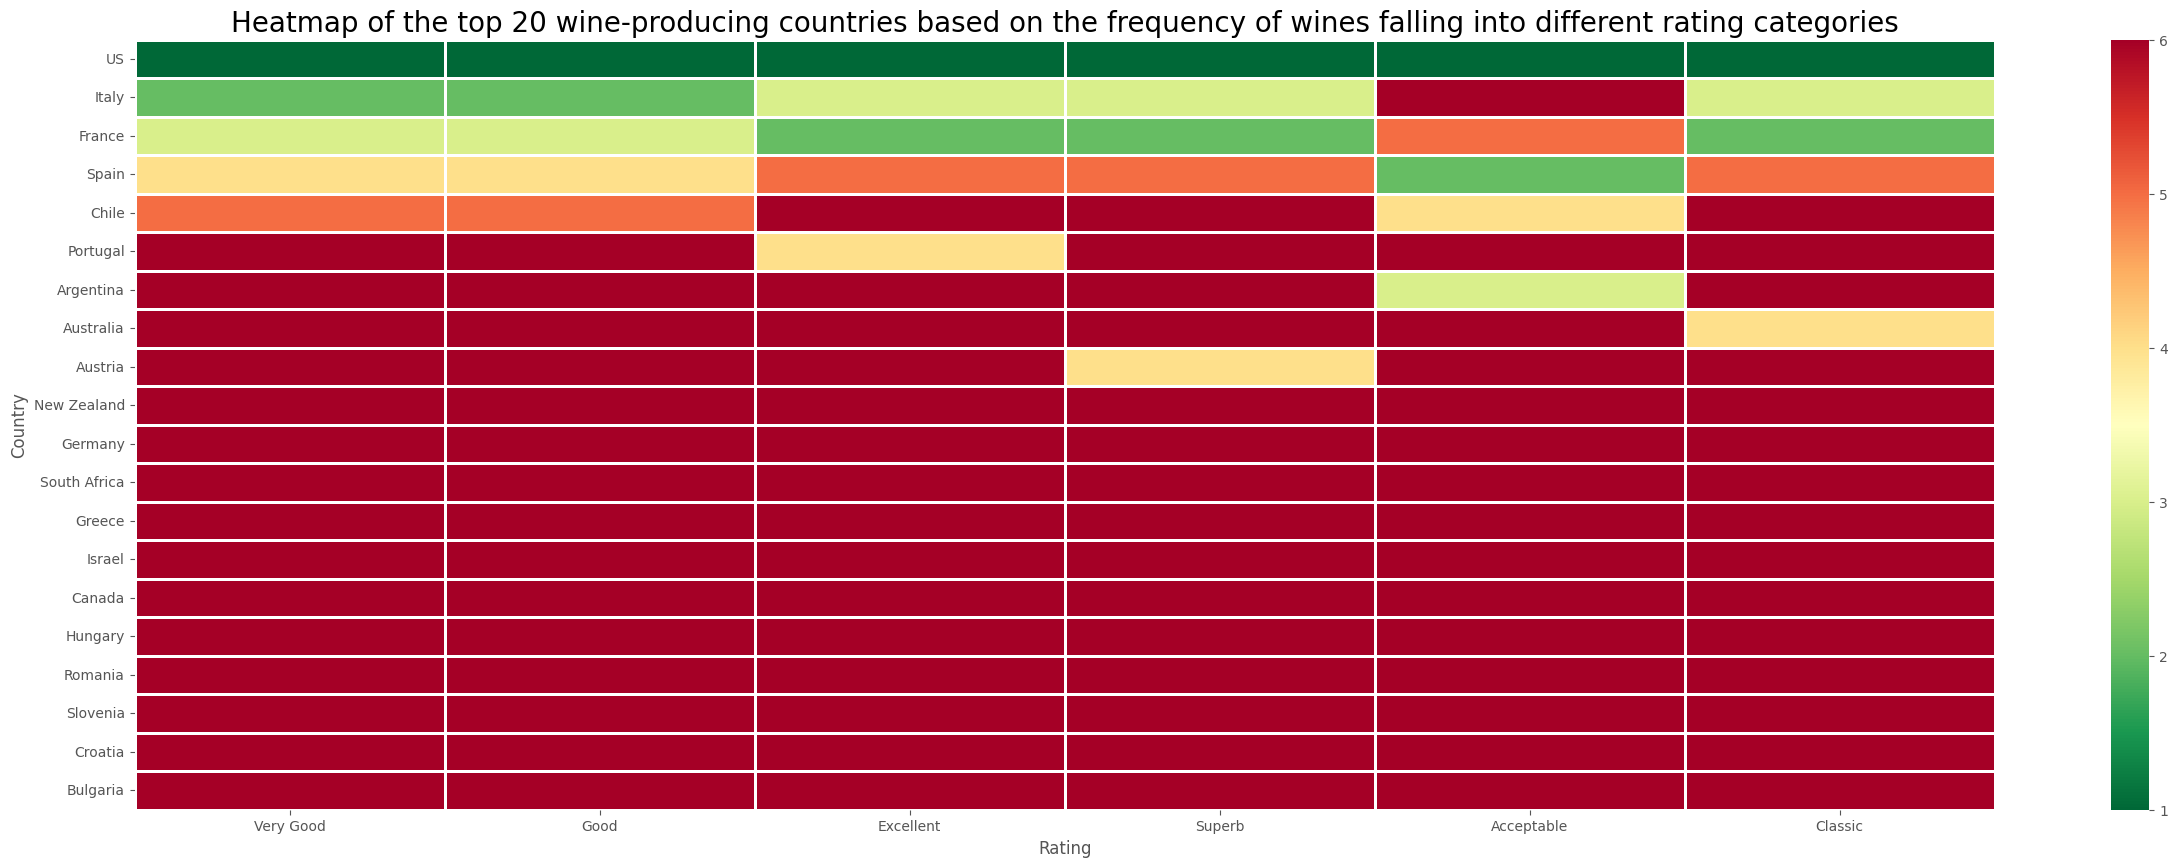

In [354]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_rating.loc[top_20, rating], cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.title('Heatmap of the top 20 wine-producing countries based on the frequency of wines falling into different rating categories', fontsize=20)
plt.show()

Above heatmap visualizes the ranking of the top 20 wine-producing countries based on the frequency of wines falling into rating categories.

Thus, this heatmap provides a visual comparison of how different countries are positioned in terms of wine production across various rating categories, highlighting which countries dominate certain rating segments in the wine market. For instance, if a country shows a lot of green in the 'Excellent' rating category, it suggests that this country has a high frequency of Excellent rated wines compared to others. ​

The color gradient from green to red is used to represent the ranking of countries within each rating category based on frequency. Here's how to interpret it:

- **Green**: Indicates a higher rank, meaning that the country has a higher frequency of wines in that particular rating category. A country that appears green in a specific price category column is among the top producers for wines in that rating range, based on the dataset.
  
- **Red**: Indicates a lower rank, meaning that the country has a lower frequency of wines in that rating category. A country that appears red in a specific rating category column has fewer wines in that price range, compared to other countries in the top 20 list.

The transition from green to red thus visually represents a transition from higher to lower frequency of wines in each rating category for the top 20 wine-producing countries. This visual representation makes it easier to identify which countries are most prominent in each rating category and how they compare to each other within those categories.

Conclusion:

- The USA is a top rated country in all rating categories. 
- Most Good Rated wines produced in the USA, Italy, France, Spain, and Chile.
- Most Accceptable Rated wines produced in the USA, Spain, Argentina, Chile and France.
- Most Very Good Rated wines produced in the USA, Italy, France, Spain, and Chile.
- Most Excellent Rated wines are produced in the USA, France, Italy, Portugal and Spain.
- Most Superb Rated wines are produced in the USA, France, Italy, Austria, Spain.
- Most Classic Rated wines are produced in the USA, France, Italy, Australia, Spain.

## (10) Heatmap of the top 20 wine-producing countries based on the frequency of wines falling into different Price categories

In [355]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

        Price_cat  Price_Cluster Price_Category  
0  Outlier-Luxury              1         Luxury  
1  Outlier-Luxury              2        Premium

In [356]:
reviews_hybrid.Price_Category.value_counts()

Price_Category
Budget-Friendly           62879
Mid-Range                 27568
Premium                    6417
Luxury                      809
Collectible/Investment      173
Name: count, dtype: int64

In [357]:
price_category = reviews_hybrid.Price_Category.value_counts().index
price_category

CategoricalIndex(['Budget-Friendly', 'Mid-Range', 'Premium', 'Luxury',
                  'Collectible/Investment'],
                 categories=['Budget-Friendly', 'Mid-Range', 'Premium', 'Luxury', 'Collectible/Investment'], ordered=True, dtype='category', name='Price_Category')

In [358]:
reviews_hybrid.Country.value_counts().head(20)

Country
US              40544
Italy           14850
France          14459
Spain            5443
Chile            3735
Portugal         3508
Argentina        3447
Australia        3152
Austria          1959
New Zealand      1865
Germany          1529
South Africa     1481
Greece            542
Israel            370
Canada            149
Hungary           139
Romania           106
Slovenia           72
Croatia            70
Bulgaria           56
Name: count, dtype: int64

In [359]:
top_20 = reviews_hybrid.Country.value_counts().head(20).index
top_20

Index(['US', 'Italy', 'France', 'Spain', 'Chile', 'Portugal', 'Argentina',
       'Australia', 'Austria', 'New Zealand', 'Germany', 'South Africa',
       'Greece', 'Israel', 'Canada', 'Hungary', 'Romania', 'Slovenia',
       'Croatia', 'Bulgaria'],
      dtype='object', name='Country')

In [360]:
by_price_category = pd.crosstab(reviews_hybrid.Country, reviews_hybrid.Price_Category)
by_price_category

Price_Category          Budget-Friendly  Mid-Range  Premium  Luxury  \
Country                                                               
Albania                               1          0        0       0   
Argentina                          3001        332      107       7   
Australia                          2298        621      202      26   
Austria                            1316        562       78       2   
Bosnia and Herzegovina                3          0        0       0   
Brazil                               12          2        0       0   
Bulgaria                             56          0        0       0   
Canada                               90         48       11       0   
Chile                              3362        275       88      10   
Chili                                 1          0        0       0   
China                                 2          0        0       0   
Croatia                              60         10        0       0   
Cyprus                               15          0        0       0   
Czech Republic                        6          0        0       0   
England                               0          8        1       0   
France                             7848       4318     1758     420   
Georgia                              26          4        0       0   
Germany                             969        410      103      36   
Greece                              458         78        6       0   
Hungary                              83         32       21       1   
India                                 8          0        0       0   
Israel                              245        110       15       0   
Italy                              8796       4624     1289     118   
Japan                                 1          0        0       0   
Lebanon                              19          8        0       0   
Lithuania                             4          0        0       0   
Luxembourg                            0          3        0       0   
Macedonia                            12          0        0       0   
Mexico                               39         13        2       0   
Moldova                              44          2        0       0   
Montenegro                            1          0        0       0   
Morocco                              10          1        0       0   
New Zealand                        1537        296       32       0   
Portugal                           2719        624      146      15   
Romania                             102          2        1       1   
Serbia                                8          2        0       0   
Slovakia                              2          0        0       0   
Slovenia                             53         16        3       0   
South Africa                       1235        229       17       0   
South Korea                           2          0        0       0   
Spain                              4305        809      274      48   
Switzerland                           3          1        0       0   
Turkey                               35          9        2       0   
US                                24047      14106     2261     125   
US-France                             0          1        0       0   
Ukraine                               5          0        0       0   
Uruguay                              40         12        0       0   

Price_Category          Collectible/Investment  
Country                                         
Albania                                      0  
Argentina                                    0  
Australia                                    5  
Austria                                      1  
Bosnia and Herzegovina                       0  
Brazil                                       0  
Bulgaria                                     0  
Canada                                       0  
Chile                         

In [361]:
by_price_category = by_price_category.rank(ascending = False, method="average")
by_price_category

Price_Category          Budget-Friendly  Mid-Range  Premium  Luxury  \
Country                                                               
Albania                            42.5       40.0     34.5    30.0   
Argentina                           6.0        9.0      7.0     9.0   
Australia                           8.0        6.0      5.0     6.0   
Austria                            10.0        7.0     10.0    10.0   
Bosnia and Herzegovina             36.5       40.0     34.5    30.0   
Brazil                             28.5       27.5     34.5    30.0   
Bulgaria                           19.0       40.0     34.5    30.0   
Canada                             16.0       15.0     15.0    30.0   
Chile                               5.0       11.0      9.0     8.0   
Chili                              42.5       40.0     34.5    30.0   
China                              39.0       40.0     34.5    30.0   
Croatia                            18.0       20.0     34.5    30.0   
Cyprus                             27.0       40.0     34.5    30.0   
Czech Republic                     33.0       40.0     34.5    30.0   
England                            46.0       22.5     20.5    30.0   
France                              3.0        3.0      2.0     1.0   
Georgia                            25.0       24.0     34.5    30.0   
Germany                            12.0        8.0      8.0     5.0   
Greece                             13.0       14.0     16.0    30.0   
Hungary                            17.0       16.0     12.0    11.5   
India                              31.5       40.0     34.5    30.0   
Israel                             14.0       13.0     14.0    30.0   
Italy                               2.0        2.0      3.0     3.0   
Japan                              42.5       40.0     34.5    30.0   
Lebanon                            26.0       22.5     34.5    30.0   
Lithuania                          35.0       40.0     34.5    30.0   
Luxembourg                         46.0       25.0     34.5    30.0   
Macedonia                          28.5       40.0     34.5    30.0   
Mexico                             23.0       18.0     18.5    30.0   
Moldova                            21.0       27.5     34.5    30.0   
Montenegro                         42.5       40.0     34.5    30.0   
Morocco                            30.0       31.0     34.5    30.0   
New Zealand                         9.0       10.0     11.0    30.0   
Portugal                            7.0        5.0      6.0     7.0   
Romania                            15.0       27.5     20.5    11.5   
Serbia                             31.5       27.5     34.5    30.0   
Slovakia                           39.0       40.0     34.5    30.0   
Slovenia                           20.0       17.0     17.0    30.0   
South Africa                       11.0       12.0     13.0    30.0   
South Korea                        39.0       40.0     34.5    30.0   
Spain                               4.0        4.0      4.0     4.0   
Switzerland                        36.5       31.0     34.5    30.0   
Turkey                             24.0       21.0     18.5    30.0   
US                                  1.0        1.0      1.0     2.0   
US-France                          46.0       31.0     34.5    30.0   
Ukraine                            34.0       40.0     34.5    30.0   
Uruguay                            22.0       19.0     34.5    30.0   

Price_Category          Collectible/Investment  
Country                                         
Albania                                   28.5  
Argentina                                 28.5  
Australia                                  5.5  
Austria                                    9.0  
Bosnia and Herzegovina                    28.5  
Brazil                                    28.5  
Bulgaria                                  28.5  
Canada                                    28.5  
Chile                         

In [362]:
by_price_category.loc[top_20, price_category]

Price_Category  Budget-Friendly  Mid-Range  Premium  Luxury  \
Country                                                       
US                          1.0        1.0      1.0     2.0   
Italy                       2.0        2.0      3.0     3.0   
France                      3.0        3.0      2.0     1.0   
Spain                       4.0        4.0      4.0     4.0   
Chile                       5.0       11.0      9.0     8.0   
Portugal                    7.0        5.0      6.0     7.0   
Argentina                   6.0        9.0      7.0     9.0   
Australia                   8.0        6.0      5.0     6.0   
Austria                    10.0        7.0     10.0    10.0   
New Zealand                 9.0       10.0     11.0    30.0   
Germany                    12.0        8.0      8.0     5.0   
South Africa               11.0       12.0     13.0    30.0   
Greece                     13.0       14.0     16.0    30.0   
Israel                     14.0       13.0     14.0    30.0   
Canada                     16.0       15.0     15.0    30.0   
Hungary                    17.0       16.0     12.0    11.5   
Romania                    15.0       27.5     20.5    11.5   
Slovenia                   20.0       17.0     17.0    30.0   
Croatia                    18.0       20.0     34.5    30.0   
Bulgaria                   19.0       40.0     34.5    30.0   

Price_Category  Collectible/Investment  
Country                                 
US                                 5.5  
Italy                              2.0  
France                             1.0  
Spain                              4.0  
Chile                             28.5  
Portugal                           7.0  
Argentina                         28.5  
Australia                          5.5  
Austria                            9.0  
New Zealand                       28.5  
Germany                            3.0  
South Africa                      28.5  
Greece                            28.5  
Israel                            28.5  
Canada                            28.5  
Hungary                            8.0  
Romania                           28.5  
Slovenia                          28.5  
Croatia                           28.5  
Bulgaria                          28.5

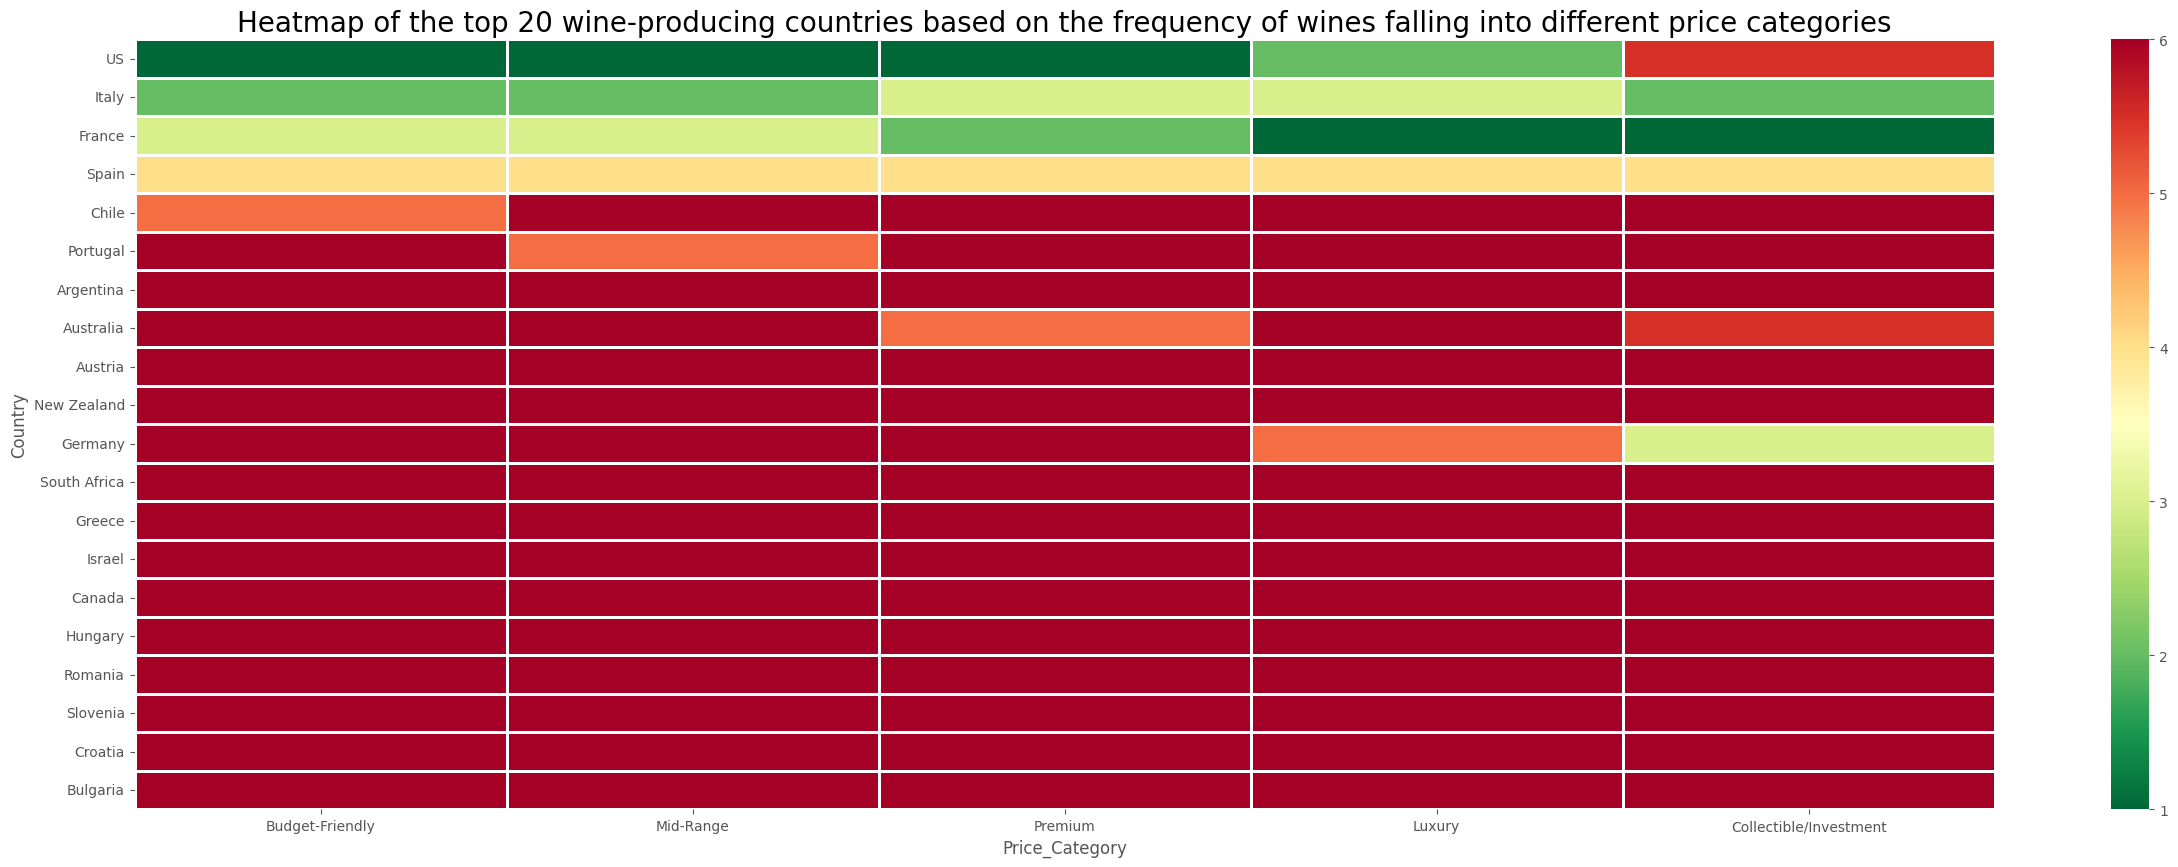

In [363]:
plt.figure(figsize = (30, 10))
sns.heatmap(by_price_category.loc[top_20, price_category], cmap='RdYlGn_r', vmin = 1, vmax = 6, linewidth = 1)
plt.title('Heatmap of the top 20 wine-producing countries based on the frequency of wines falling into different price categories', fontsize=20)
plt.show()

Above heatmap visualizes the ranking of the top 20 wine-producing countries based on the frequency of wines falling into different price categories.

Thus, this heatmap provides a visual comparison of how different countries are positioned in terms of wine production across various price categories, highlighting which countries dominate certain price segments in the wine market. For instance, if a country shows a lot of green in the 'Luxury' price category, it suggests that this country has a high frequency of luxury wines compared to others. ​

The color gradient from green to red is used to represent the ranking of countries within each price category based on frequency. Here's how to interpret it:

- **Green**: Indicates a higher rank, meaning that the country has a higher frequency of wines in that particular price category. A country that appears green in a specific price category column is among the top producers for wines in that price range, based on the dataset.
  
- **Red**: Indicates a lower rank, meaning that the country has a lower frequency of wines in that price category. A country that appears red in a specific price category column has fewer wines in that price range, compared to other countries in the top 20 list.

The transition from green to red thus visually represents a transition from higher to lower frequency of wines in each price category for the top 20 wine-producing countries. This visual representation makes it easier to identify which countries are most prominent in each price category and how they compare to each other within those categories.

Conclusion:

- The USA is a top producing country for Budget-Friendy, Mid-Range and Premium wines. Followed by Italy and France. 
- Most Budget-Friendly wines produced in the USA, Italy, France, Spain, and Chile.
- Most Mid-Range wines produced in the USA, Italy, France, Spain, and Portugal.
- Most Premium wines produced in the USA, France, Italy, Spain, and Australia.
- Most Luxury wines are produced in France, the USA, Italy, Spain, and Germany.
- Most Collectable/Investment wines are produced in France, Italy, Germany, Spain, and Australia.

# <font color="#b33939" color face="Giorgia">**Pattern Discovery Part II - Exploratory and Descriptive Analysis**</font>

## (1) Does Country has significal effect on Price? Use ANOVA test

Does categorical variable(Country) has significal effect on continuous variables("Price")?

Country is a categorical variable with multiple levels(Different countries). 

We might consider using ANOVA (Analysis of Variance) to understand the impact of categorical variables with multiple levels on "Price." The ANOVA test between "Price" and the categorical variable "Country" resulted in an F-statistic of approximately 98.24. The p-value is 0.0, indicating that there are statistically significant differences in wine prices among different countries.

This analysis suggests that the "Country" variable has a significant effect on "Price," with variations in wine prices that can be attributed to the country of origin. Given the significance level (p-value < 0.05), we can conclude that the relationship between "Price" and "Country" is statistically significant.

In [364]:
from scipy.stats import f_oneway

# Function to perform ANOVA between Price and a categorical variable
def anova_price_categorical(data, categorical_column):
    unique_categories = data[categorical_column].dropna().unique()
    category_groups = [data[data[categorical_column] == category]['Price'].dropna() for category in unique_categories if len(data[data[categorical_column] == category]) > 1]
    f_stat, p_value = f_oneway(*category_groups)
    return f_stat, p_value

# Select a categorical variable to test with ANOVA
categorical_var = 'Country'

# Perform ANOVA between Price and the selected categorical variable
f_stat, p_value = anova_price_categorical(reviews_hybrid, categorical_var)

f_stat, p_value

(98.23874398792915, 0.0)

ANOVA, which stands for Analysis of Variance, is a statistical method used to compare the means of three or more samples to understand if at least one of the sample means significantly differs from the others. It's particularly useful when dealing with categorical variables that have multiple groups or levels and you want to test their impact on a continuous outcome variable.

Here's a breakdown of the key concepts:

**ANOVA**
- **Purpose**: ANOVA tests the null hypothesis that all group means are the same against the alternative hypothesis that at least one group mean is different. It's an extension of the t-test, which is used for comparing the means of two groups.
- ANOVA is designed to test for significant differences in the means across groups, not to assess the form or strength of the relationship between a continuous and a categorical variable.
It is particularly useful for testing the overall effect of a categorical variable on a continuous outcome, without assuming a linear relationship.

- **How it Works**: ANOVA analyzes the total variability in the data and partitions it into two parts: variability between groups (due to the effect of the categorical variable) and variability within groups (due to individual differences or random error). The aim is to determine whether the between-group variability is significantly greater than the within-group variability, which would suggest that the group means differ more than we would expect by chance alone.

**F-Statistic**
- **Definition**: The F-statistic is the ratio of the variance between groups to the variance within groups. It is the key test statistic used in ANOVA.
- **Interpretation**: A higher F-statistic suggests that the group means are significantly different, as it indicates that the variability between groups is much larger than the variability within groups. 
- **F-Statistic Formula**: \( F = \frac{\text{Between Group Variance}}{\text{Within Group Variance}} \)

**P-Value**
- **Definition**: The p-value in the context of ANOVA tells you the probability of observing a difference as large as what is observed, or larger, assuming that the null hypothesis is true (i.e., all group means are equal).
- **Interpretation**: A small p-value (typically < 0.05) indicates strong evidence against the null hypothesis, leading to its rejection. This suggests that at least one group mean is significantly different from the others.

**Summary**
In summary, when you perform an ANOVA test and find a statistically significant F-statistic with a low p-value, it suggests that the means of some of the groups are significantly different from each other. This implies that the categorical variable you are testing has a significant effect on the continuous outcome variable. However, ANOVA doesn't tell you which specific groups are different from each other; for that, post-hoc tests (like Tukey's HSD) are used to identify the specific group differences.

### (1.2) Compares each pair of countries to determine if the difference in their mean prices is statistically significant. Use Tukey's HSD test

In [365]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Tukey's HSD test (adjust as needed for your dataset)
data = reviews_hybrid
subset_countries = data['Country'].value_counts().nlargest(5).index
subset_data = data[data['Country'].isin(subset_countries)]
tukey_result = pairwise_tukeyhsd(endog=subset_data['Price'].dropna(), groups=subset_data['Country'].dropna(), alpha=0.05)
print(tukey_result)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
 Chile France  30.7794   0.0  28.6851  32.8737   True
 Chile  Italy  18.2514   0.0  16.1627    20.34   True
 Chile  Spain   8.1148   0.0   5.6904  10.5391   True
 Chile     US  14.3569   0.0  12.4058   16.308   True
France  Italy  -12.528   0.0 -13.8611 -11.1949   True
France  Spain -22.6646   0.0 -24.4791 -20.8501   True
France     US -16.4225   0.0 -17.5277 -15.3172   True
 Italy  Spain -10.1366   0.0 -11.9445  -8.3287   True
 Italy     US  -3.8944   0.0  -4.9889     -2.8   True
 Spain     US   6.2421   0.0    4.595   7.8893   True
-----------------------------------------------------


The results from your Tukey's HSD (Honestly Significant Difference) test provide valuable insights into the differences in wine prices among the countries you analyzed (Chile, France, Italy, Spain, and the US). The test compares each pair of countries to determine if the difference in their mean wine prices is statistically significant.

Here's a breakdown of the key columns in your results:

- **group1 and group2**: These columns represent the pairs of countries being compared.
- **meandiff**: This is the mean difference in wine prices between the two groups. A positive value indicates that the first group has a higher mean price than the second group.
- **p-adj**: The adjusted p-value for the comparison after accounting for multiple testing. A low p-value (typically <0.05) indicates that the difference in means is statistically significant.
- **lower and upper**: The lower and upper bounds of the 95% confidence interval for the mean difference. If this interval does not include 0, it suggests a significant difference.
- **reject**: This column indicates whether the null hypothesis (that the means are equal) is rejected. "True" means there is a statistically significant difference between the group means.

**Interpretation of Your Results**:

- **Chile vs. Other Countries**: Wines from Chile are, on average, cheaper than those from France, Italy, Spain, and the US, with all differences being statistically significant.
- **France vs. Other Countries**: French wines are the most expensive on average, significantly higher in price than wines from Chile, Italy, Spain, and the US.
- **Italy vs. Other Countries**: Italian wines are more expensive than Chilean and Spanish wines but cheaper than French wines. The difference between Italian and US wines is also significant, with Italian wines being cheaper.
- **Spain vs. Other Countries**: Spanish wines are cheaper than those from France, Italy, and the US, with all differences being significant.
- **US vs. Other Countries**: US wines are more expensive than those from Chile and Spain but cheaper than French wines. The difference between US and Italian wines is also significant, with US wines being more expensive.

These results highlight the significant differences in wine prices among these countries, providing a clearer understanding of how wine prices vary by country of origin. This information can be particularly useful for market analysis, pricing strategies, and understanding consumer preferences.

### (1.3) Visually Explore the relationship between Country and Price

One approach to explore the relationship between a continuous variable and a categorical variable is to visualize the data, for instance, by using box plots to compare the distribution of "Price" across different "Countries." This won't give us a correlation coefficient but can provide insight into how "Price" varies by "Country."

Let's start with the visualization approach by creating box plots of "Price" for each "Country" to observe how wine prices vary across different countries.

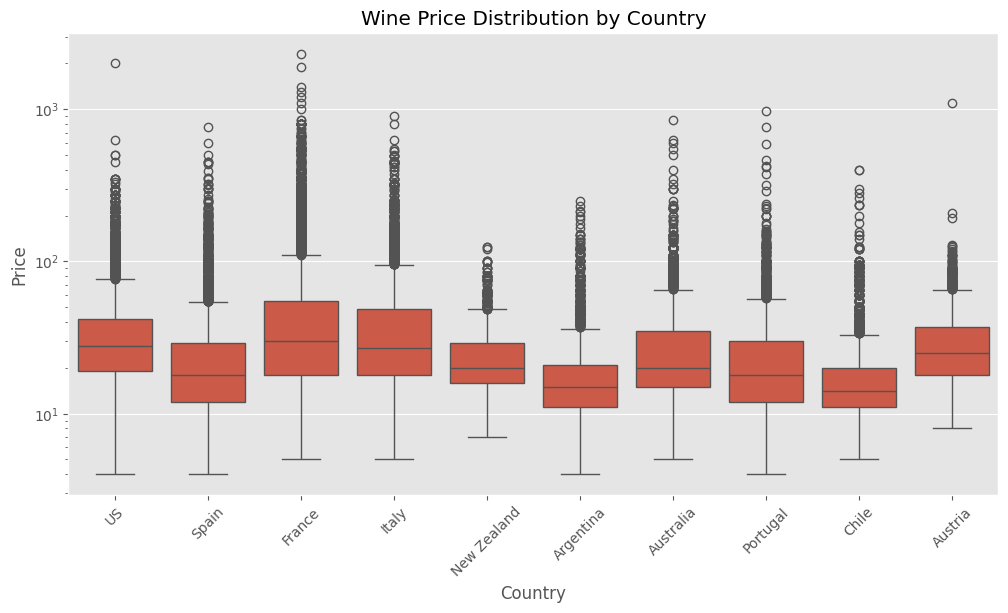

In [366]:
# Filter the data to include only the most common countries to keep the plot readable
data = reviews_hybrid
top_countries = data['Country'].value_counts().nlargest(10).index
filtered_data = data[data['Country'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='Price', data=filtered_data)
plt.xticks(rotation=45)
plt.title('Wine Price Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Price')
plt.yscale('log')  # Using a logarithmic scale for better visualization of outliers
plt.show()


The box plot above illustrates the distribution of wine prices across the top wine-producing countries in the dataset. Each box represents the interquartile range (IQR) of prices within a country, with the line inside the box indicating the median price. The "whiskers" extend to cover the majority of the data points, while points outside the whiskers are considered outliers.

This visualization shows how wine prices vary by country, indicating that the country of origin has an impact on wine prices. For example, some countries may generally have higher or lower median prices, and the spread of prices (as indicated by the size of the boxes and the range of outliers) also varies between countries.

While this approach doesn't provide a numerical measure of correlation, it does offer valuable insights into the relationship between wine prices and their countries of origin, highlighting differences in price distributions across countries.

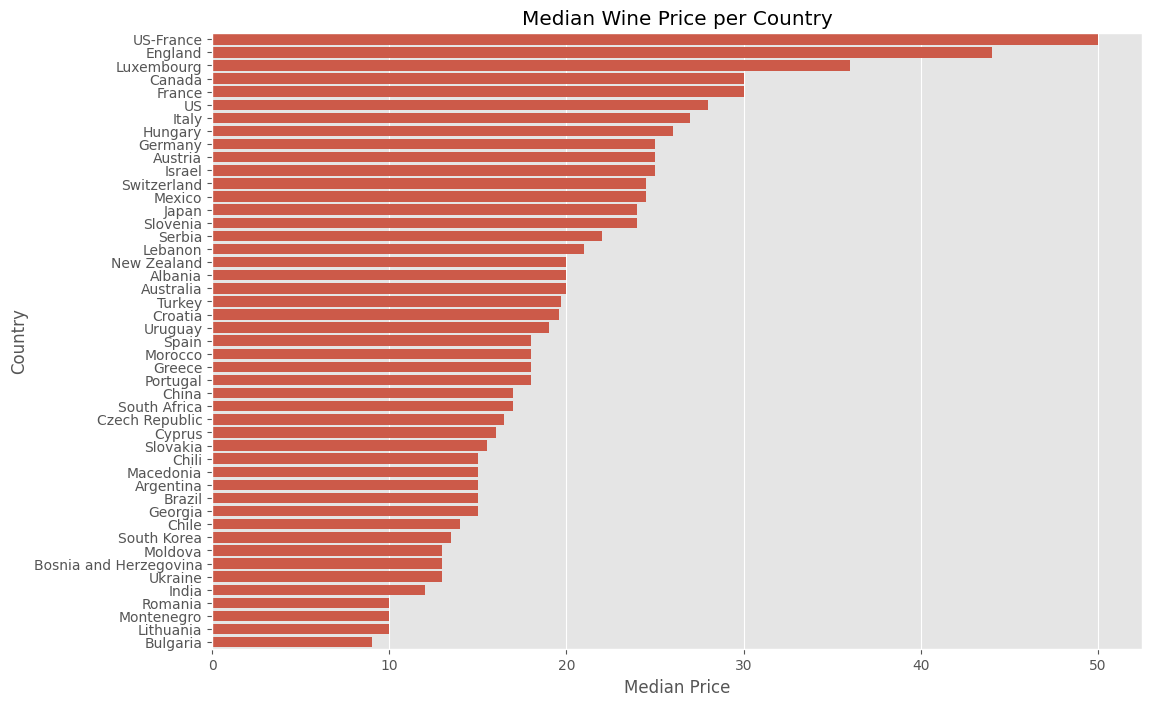

In [367]:
# Calculating the mean price per country
median_price_per_country = reviews_hybrid.groupby('Country')['Price'].median().sort_values(ascending=False)

# Resetting index to convert the Series to DataFrame for seaborn plotting
median_price_per_country_df = median_price_per_country.reset_index()

# Plotting using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Price', y='Country', data=median_price_per_country_df)
plt.title('Median Wine Price per Country')
plt.xlabel('Median Price')
plt.ylabel('Country')
plt.show()

## (2) Is Higher Point(Rating) associated with Higher Price or vice versa. Use  Pearson correlation coefficient and Linear Regression analysis to measure the linear relationship

To explore if "Price" has a significant effect on "Points", we can perform a correlation analysis or linear regression. 

The phrase "correlation does not imply causation" is a fundamental principle in statistics and scientific reasoning. It emphasizes that just because two variables are correlated (meaning there is a statistical association or relationship between them), it doesn't necessarily mean that one variable causes the other.

In other words, the occurrence of a correlation between two variables could be due to various factors, such as coincidence, confounding variables, or a third variable influencing both. Establishing causation requires more rigorous evidence, often through controlled experiments and thorough analysis.

### (2.1) Pearson correlation coefficient analysis to find linear relationship. This analysis don't show if Points has more influence on Price or vice versa.

Explore the relationship between two continuous variables Price and Points: Use  Pearson correlation coefficient to measure the linear relationship.

In [368]:
reviews_hybrid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97846 entries, 0 to 97845
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Country         97846 non-null  object  
 1   Description     97846 non-null  object  
 2   Designation     67951 non-null  object  
 3   Points          97846 non-null  int64   
 4   Price           97846 non-null  float64 
 5   Province        97846 non-null  object  
 6   Region_1        81919 non-null  object  
 7   Region_2        39491 non-null  object  
 8   Variety         97846 non-null  object  
 9   Winery          97846 non-null  object  
 10  Rating          97846 non-null  category
 11  Price_cat       97846 non-null  category
 12  Price_Cluster   97846 non-null  int32   
 13  Price_Category  97846 non-null  category
dtypes: category(3), float64(1), int32(1), int64(1), object(8)
memory usage: 8.1+ MB


In [369]:
reviews_hybrid["Price"].corr(reviews_hybrid["Points"])

0.43640631802676916

In [370]:
from scipy.stats import pearsonr

# Calculate the Pearson correlation coefficient and the p-value for testing non-correlation between Price and Points
pearson_corr, p_value = pearsonr(reviews_hybrid['Price'], reviews_hybrid['Points'])

pearson_corr, p_value

(0.4364063180267701, 0.0)

The Pearson correlation coefficient of 0.436 suggests a moderate positive correlation between "Price" and "Points", indicating that as the price of a wine increases, its points or rating tends to increase as well. The p-value of 0.0 indicates that this correlation is statistically significant, meaning it's unlikely to have occurred by chance. This suggests that price can be an indicator of quality or rating to some extent in wines.

### (2.2) Linear Regression analysis. This analysis show if Point has more influence on Price or vice versa.

#### **(2.2.1) Higher price is not associated with higher points(or rating)**

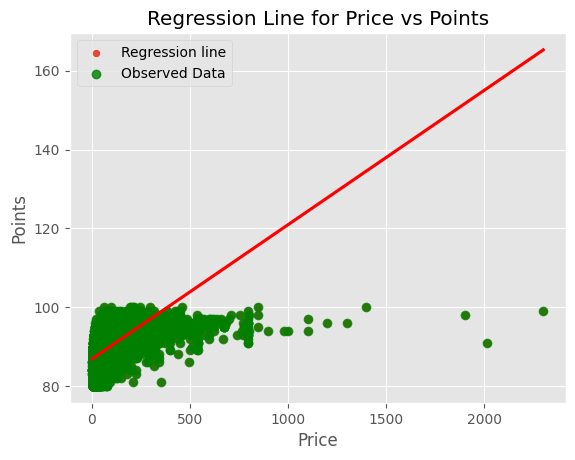

In [371]:
sns.scatterplot(x=reviews_hybrid['Price'] , y=reviews_hybrid['Points'] , label="Regression line")
sns.regplot(x=reviews_hybrid['Price'], y=reviews_hybrid['Points'], data=reviews_hybrid, ci=None, 
            label="Observed Data", scatter_kws={"color": "green"}, 
            line_kws={"color": "red"})
plt.xlabel('Price')
plt.ylabel('Points')
plt.title('Regression Line for Price vs Points')
plt.legend()
plt.show()

Although the Pearson correlation coefficient shown 0.436 suggests a moderate positive correlation between "Price" and "Points", indicating that as the price of a wine increases, its points or rating tends to increase as well.

However, the above regression models show no correlation between Price and Points in the Wine Reviews. We can conclude that there is no correlation between price and quality in commercial Wines.

In [372]:
import statsmodels.api as sm

# Define the predictor (X) and response (y) variables
X = reviews_hybrid[['Price']]  # Predictor variable
y = reviews_hybrid['Points']  # Response variable

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# View the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Points   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:55:22   Log-Likelihood:            -2.4286e+05
No. Observations:               97846   AIC:                         4.857e+05
Df Residuals:                   97844   BIC:                         4.857e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.7605      0.012   7134.702      0.0

The OLS regression results indicate a positive relationship between "Price" and "Points", with a coefficient of 0.0341 for "Price". **This suggests that for every one-unit increase in price, the points increase by approximately 0.0341 points. Which is rather small increase.** The model's R-squared value is 0.190, indicating that 19% of the variability in wine points is explained by the price. The very low p-value for the "Price" coefficient confirms the statistical significance of this relationship.

An R-squared value of 0.19 means 19% of the variance in "Points" is explained by "Price", which might be considered low in many contexts, indicating other factors also influence "Points". A p-value below 0.05 (common threshold) indicates statistical significance; in our case, the p-value is 0.0, strongly suggesting the relationship between "Price" and "Points" is significant.

#### **(2.2.2) Higher points (or ratings) are associated with higher prices**

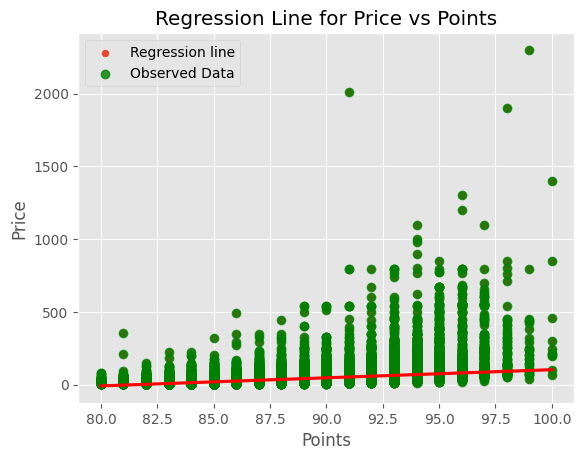

In [373]:
sns.scatterplot(x=reviews_hybrid['Points'] , y=reviews_hybrid['Price'] , label="Regression line")
sns.regplot(x=reviews_hybrid['Points'], y=reviews_hybrid['Price'], data=reviews_hybrid, ci=None, 
            label="Observed Data", scatter_kws={"color": "green"}, 
            line_kws={"color": "red"})
plt.xlabel('Points')
plt.ylabel('Price')
plt.title('Regression Line for Price vs Points')
plt.legend()
plt.show()

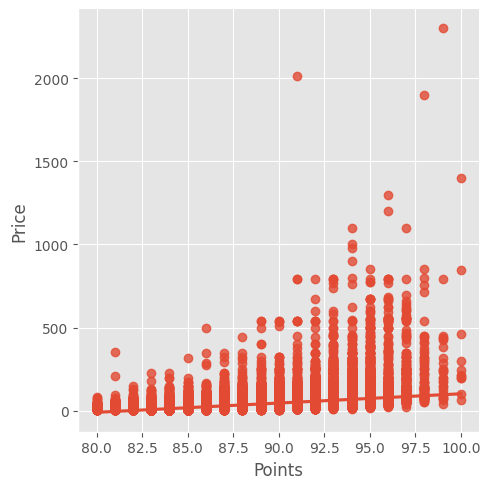

In [374]:
sns.lmplot(x="Points", y="Price", data=reviews_hybrid);

In [375]:
import statsmodels.api as sm

# Define the predictor (X) and response (y) variables
y = reviews_hybrid[['Price']]  # Predictor variable
X = reviews_hybrid['Points']  # Response variable

# Add a constant to the predictor variable
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# View the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 2.302e+04
Date:                Mon, 04 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:55:41   Log-Likelihood:            -4.9218e+05
No. Observations:               97846   AIC:                         9.844e+05
Df Residuals:                   97844   BIC:                         9.844e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -455.6185      3.236   -140.787      0.0

**Switching "Points" as the predictor and "Price" as the response** variable in our linear regression model and observing significant results (with a p-value of 0.0) **indicates a strong statistical relationship where higher points (or ratings) are associated with higher prices. The coefficient for "Points" at 5.5785 suggests that for each additional point, the price increases by approximately $5.58.** The negative constant indicates that at the baseline (0 points, which is outside the practical range of wine ratings), the model predicts a negative price, which is not meaningful in real terms but is a mathematical artifact of the linear model.

The high R-squared value of 0.190, similar to the previous model, indicates that about 19% of the variability in wine prices can be explained by the points they receive. This model reaffirms the notion that quality, as indicated by higher ratings, tends to command higher prices in the wine market.

### (2.3) Visualizing relationship between Points and Price

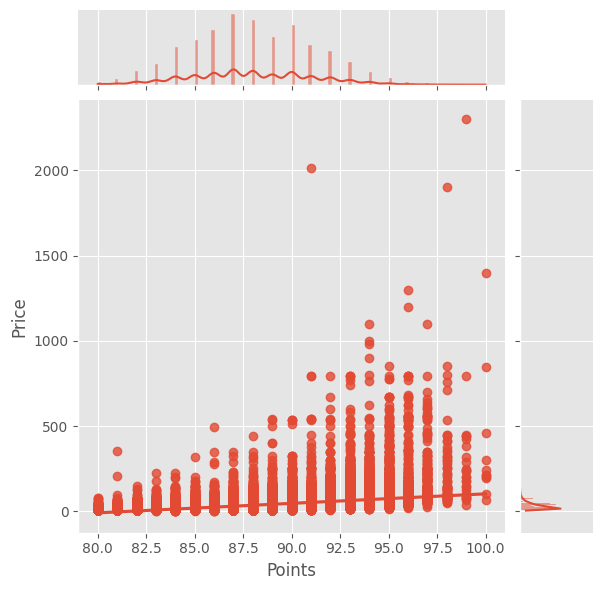

In [376]:
sns.jointplot(x="Points", y="Price", data=reviews_hybrid, kind="reg");

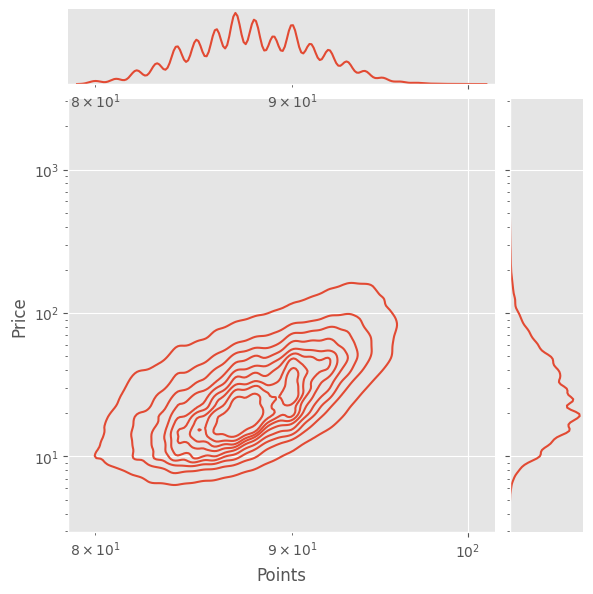

In [377]:
sns.jointplot(data=reviews_hybrid, x="Points", y="Price", kind="kde", log_scale=True);

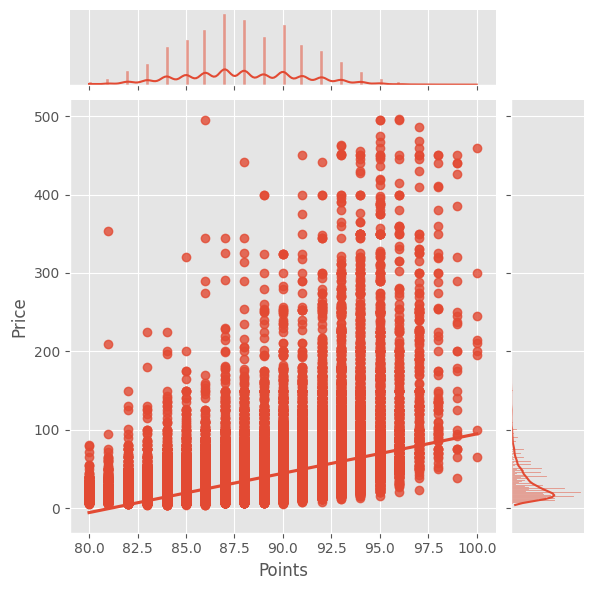

In [378]:
# Get rid of outliers in price
sns.jointplot(x="Points", y="Price", data=reviews_hybrid[reviews_hybrid['Price'] < 500], kind="reg");

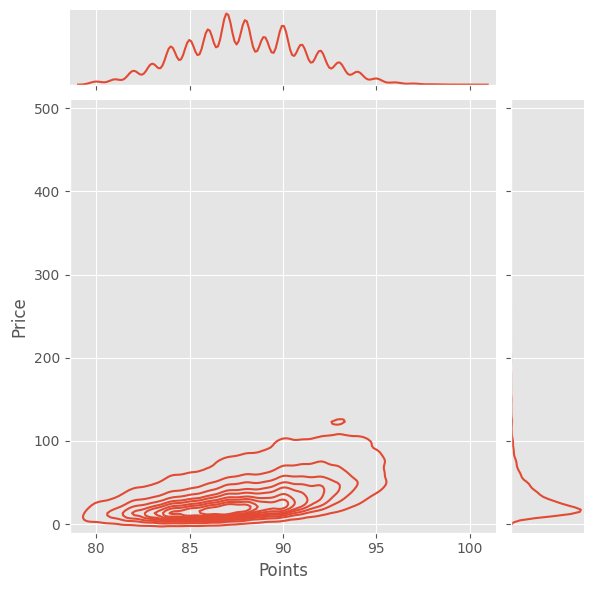

In [379]:
sns.jointplot(data=reviews_hybrid[reviews_hybrid['Price'] < 500], x="Points", y="Price", kind="kde");

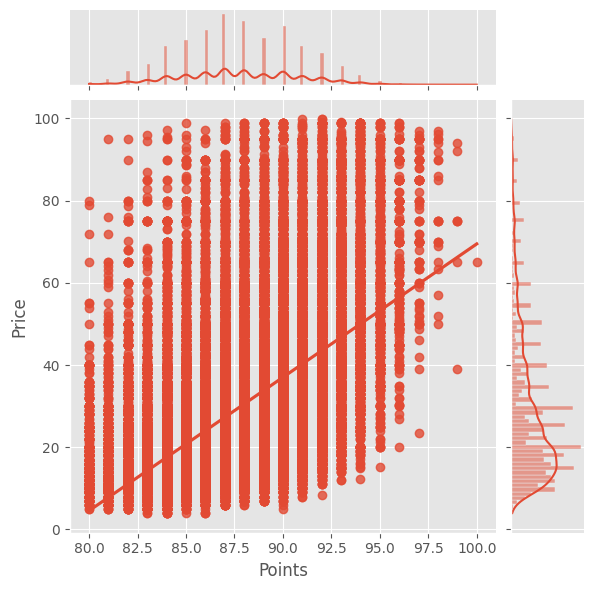

In [380]:
sns.jointplot(x="Points", y="Price", data=reviews_hybrid[reviews_hybrid['Price'] < 100], kind="reg");

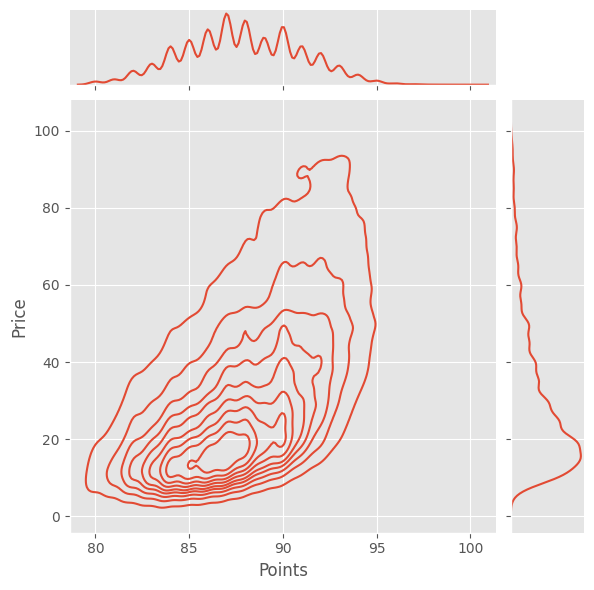

In [381]:
sns.jointplot(data=reviews_hybrid[reviews_hybrid['Price'] < 100], x="Points", y="Price", kind="kde");

Here we can clearly see the density of point and pricing and how they interact.

It appears that the wines in the 10.00 - 20.00 range have the highest concentration of consistent points.

This means that overall, wines in the 10.00 - 20.00 range have frequently better ratings when compared to more expensive wines.

<Axes: xlabel='Points', ylabel='Price'>

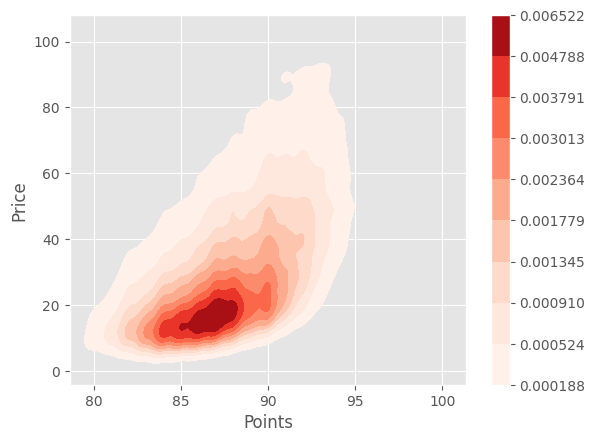

In [382]:
# Plotted price and point value KDE Chart
sns.kdeplot(data=reviews_hybrid[reviews_hybrid['Price'] < 100], y="Price", x="Points", fill=True, cbar=True, cmap="Reds")

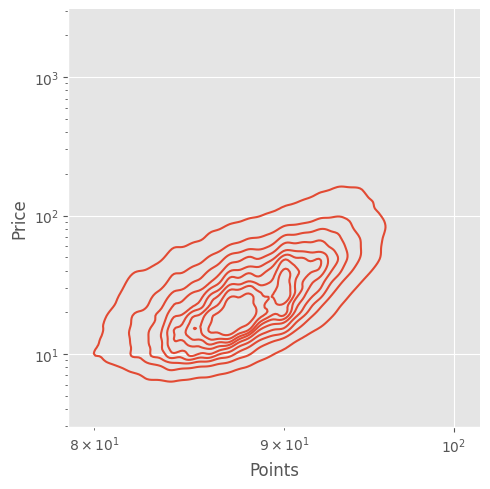

In [383]:
sns.displot(kind='kde', data=reviews_hybrid, x='Points', y='Price', log_scale=True);

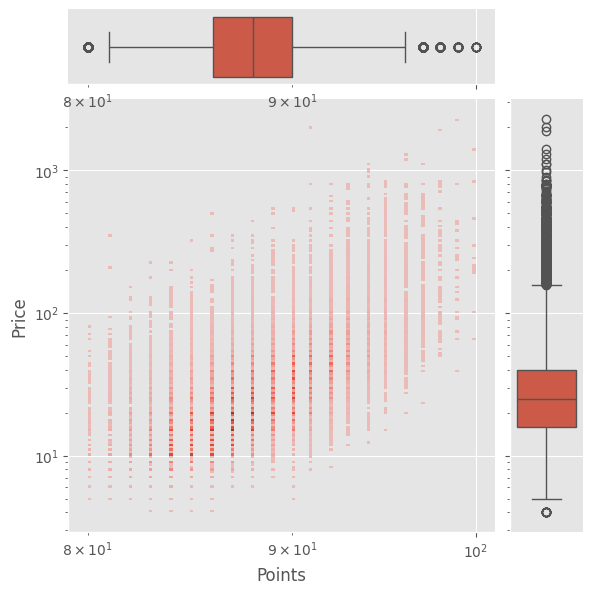

In [384]:
g = sns.JointGrid(data=reviews_hybrid, x="Points", y="Price");
g.plot_joint(sns.histplot, log_scale=True);
g.plot_marginals(sns.boxplot);

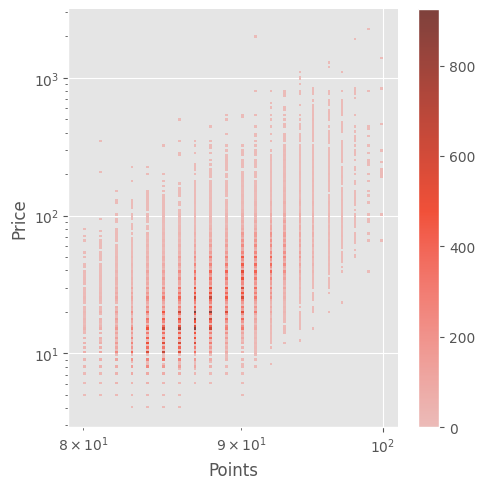

In [385]:
sns.displot(data=reviews_hybrid, x='Points', y='Price', log_scale=True, cbar=True);

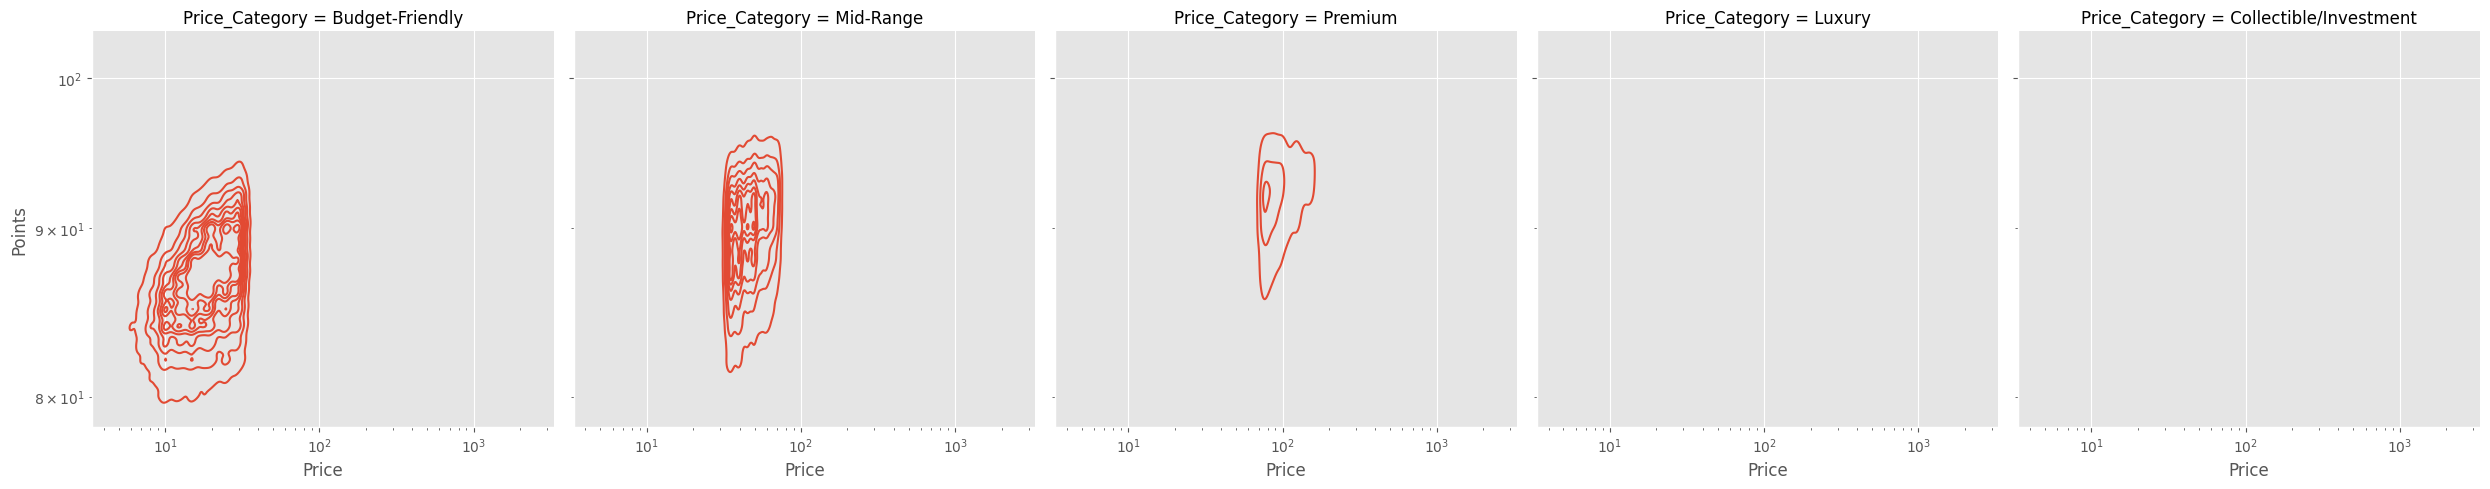

In [386]:
sns.displot(kind='kde', data=reviews_hybrid, x='Price', y='Points', col='Price_Category', log_scale=True);

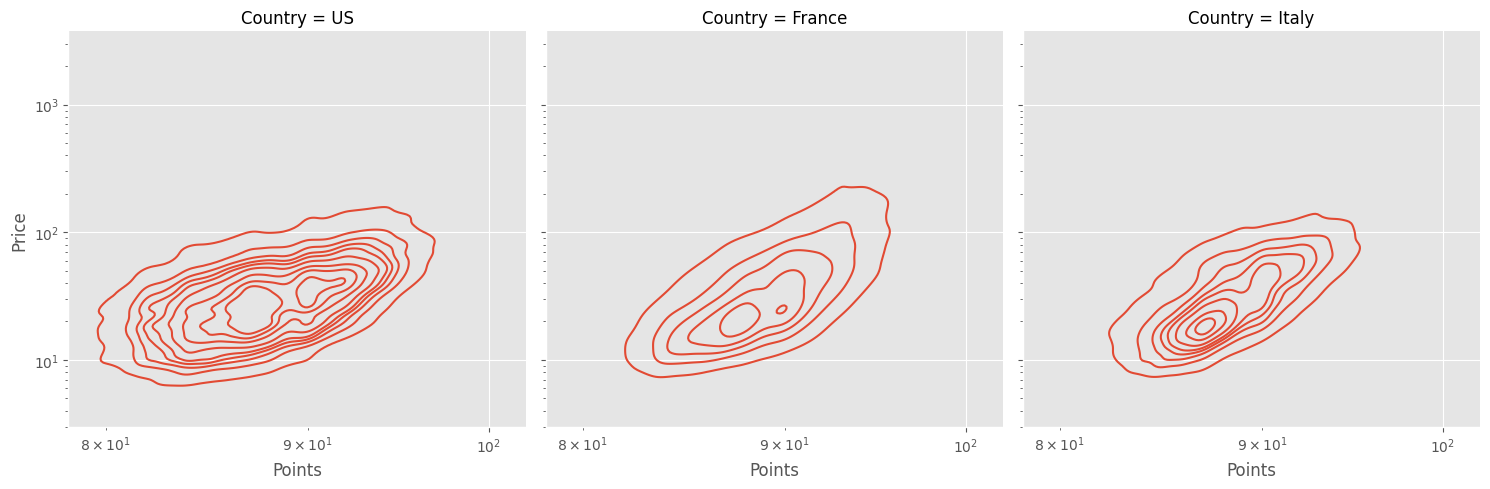

In [387]:
top_three_countries = reviews_hybrid["Country"].value_counts().head(3).index
sns.displot(kind='kde', data=reviews_hybrid[reviews_hybrid["Country"].isin(top_three_countries)],
            x='Points', y='Price', col='Country', log_scale=True);

The contour approach of the bivariate KDE plot lends itself better to evaluating overlap, although a plot with too many contours can get busy:

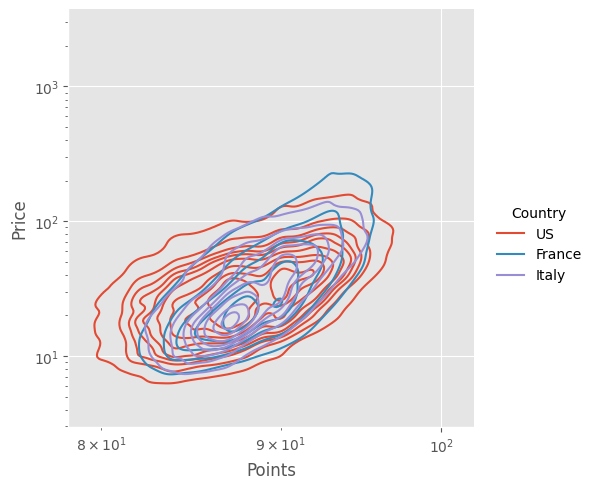

In [388]:
top_three_countries = reviews_hybrid["Country"].value_counts().head(3).index
sns.displot(kind='kde', data=reviews_hybrid[reviews_hybrid["Country"].isin(top_three_countries)],
            x='Points', y='Price', hue='Country', log_scale=True);

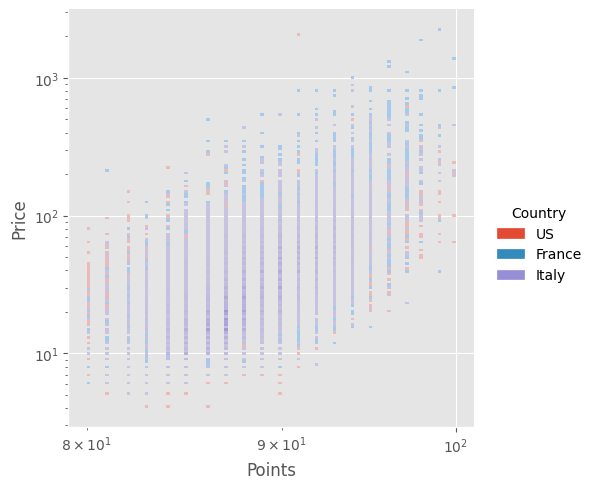

In [389]:
top_three_countries = reviews_hybrid["Country"].value_counts().head(3).index
sns.displot(data=reviews_hybrid[reviews_hybrid["Country"].isin(top_three_countries)],
            x='Points', y='Price', hue='Country', log_scale=True);

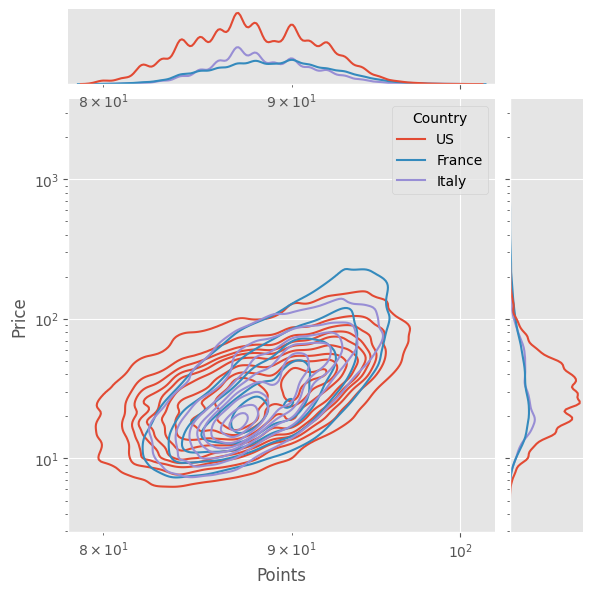

In [390]:
sns.jointplot(x="Points", y="Price", data=reviews_hybrid[reviews_hybrid["Country"].isin(top_three_countries)], hue="Country", kind="kde", log_scale=True);

## (3) Descriptive Price Category analysis

In [391]:
# Check the result
reviews_hybrid[['Price', 'Price_Cluster', 'Price_Category']].head()

Price  Price_Cluster Price_Category
0  235.0              1         Luxury
1  110.0              2        Premium
2   90.0              2        Premium
3   65.0              3      Mid-Range
4   66.0              3      Mid-Range

In [392]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

        Price_cat  Price_Cluster Price_Category  
0  Outlier-Luxury              1         Luxury  
1  Outlier-Luxury              2        Premium

In [393]:
# Statistical analysis of the Price_Category based on the boxplot and violin plot information
price_stats = reviews_hybrid.groupby('Price_Category', observed=True)['Price'].describe()
price_stats

count        mean         std    min    25%    50%  \
Price_Category                                                                 
Budget-Friendly         62879.0   19.026594    6.586843    4.0   14.0   18.0   
Mid-Range               27568.0   46.930223   10.407101   33.0   38.0   45.0   
Premium                  6417.0   98.519308   24.048736   72.8   80.0   90.0   
Luxury                    809.0  245.308035   62.476704  172.0  195.0  228.0   
Collectible/Investment    173.0  625.366474  253.558186  435.8  500.0  550.0   

                          75%     max  
Price_Category                         
Budget-Friendly          24.6    32.8  
Mid-Range                55.0    72.6  
Premium                 110.0   171.4  
Luxury                  281.0   430.0  
Collectible/Investment  672.0  2300.0

In [394]:
# Define your price categories
price_categories = ["Budget-Friendly", "Mid-Range", "Premium", "Luxury", "Collectible/Investment"]

# Use list comprehension to apply your stat function and renaming within a loop
stat_results = [reviews_hybrid.groupby('Price_Category', observed=True)['Price'].apply(lambda x: stat(x)).loc[(category), :].T.rename(index={"Value": category}) for category in price_categories]

# Concatenate all the DataFrames into a single DataFrame
combined_stats = pd.concat(stat_results)

In [395]:
combined_stats.columns
col = ['Count', 'Mean', 'Standard Deviation', 'Skewness', 'Kurtosis', 'Coefficient of Variation', 'Mode',
        'Q1 (25th percentile)', 'Median (50th percentile)', 'Q3 (75th percentile)', 'IQR', 'Range, excl outliers',
        'Whisker Bottom', 'Whisker Top', 'Max value', 'Min value', 'Range, incl. outliers',
        'Number of Outliers', 'IQR midpoint', 'Whiskers midpoint']

In [396]:
combined_stats[col]

Count    Mean Standard Deviation Skewness Kurtosis  \
Budget-Friendly         62879   19.03               6.59     0.22    -0.94   
Mid-Range               27568   46.93              10.41     0.64    -0.62   
Premium                  6417   98.52              24.05     1.12     0.39   
Luxury                    809  245.31              62.48     0.93     0.07   
Collectible/Investment    173  625.37             253.56     3.82    18.93   

                       Coefficient of Variation   Mode Q1 (25th percentile)  \
Budget-Friendly                            0.35   20.0                 14.0   
Mid-Range                                  0.22   35.0                 38.0   
Premium                                    0.24   75.0                 80.0   
Luxury                                     0.25  200.0                195.0   
Collectible/Investment                     0.41  537.0                500.0   

                       Median (50th percentile) Q3 (75th percentile)    IQR  \
Budget-Friendly                            18.0                 24.6   10.6   
Mid-Range                                  45.0                 55.0   17.0   
Premium                                    90.0                110.0   30.0   
Luxury                                    228.0                281.0   86.0   
Collectible/Investment                    550.0                672.0  172.0   

                       Range, excl outliers Whisker Bottom Whisker Top  \
Budget-Friendly                        28.8            4.0        32.8   
Mid-Range                              39.6           33.0        72.6   
Premium                                82.2           72.8       155.0   
Luxury                                238.0          172.0       410.0   
Collectible/Investment                464.2          435.8       900.0   

                       Max value Min value Range, incl. outliers  \
Budget-Friendly             32.8       4.0                  28.8   
Mid-Range                   72.6      33.0                  39.6   
Premium                    171.4      72.8                  98.6   
Luxury                     430.0     172.0                 258.0   
Collectible/Investment    2300.0     435.8                1864.2   

                       Number of Outliers IQR midpoint Whiskers midpoint  
Budget-Friendly                         0         19.3              18.4  
Mid-Range                               0         46.5              52.8  
Premium                               204         95.0             113.9  
Luxury                                  9        238.0             291.0  
Collectible/Investment                 10        586.0             667.9

### **Comparing Budget-Friendly and Mid-Range Price Categories**

[Descriptive Statistics: Comparing Budget-Friendly and Mid-Range Price Categories](./support_files/descriptive_statistics_for_price_category.ipynb)

### **Budget-Friendly analysis**

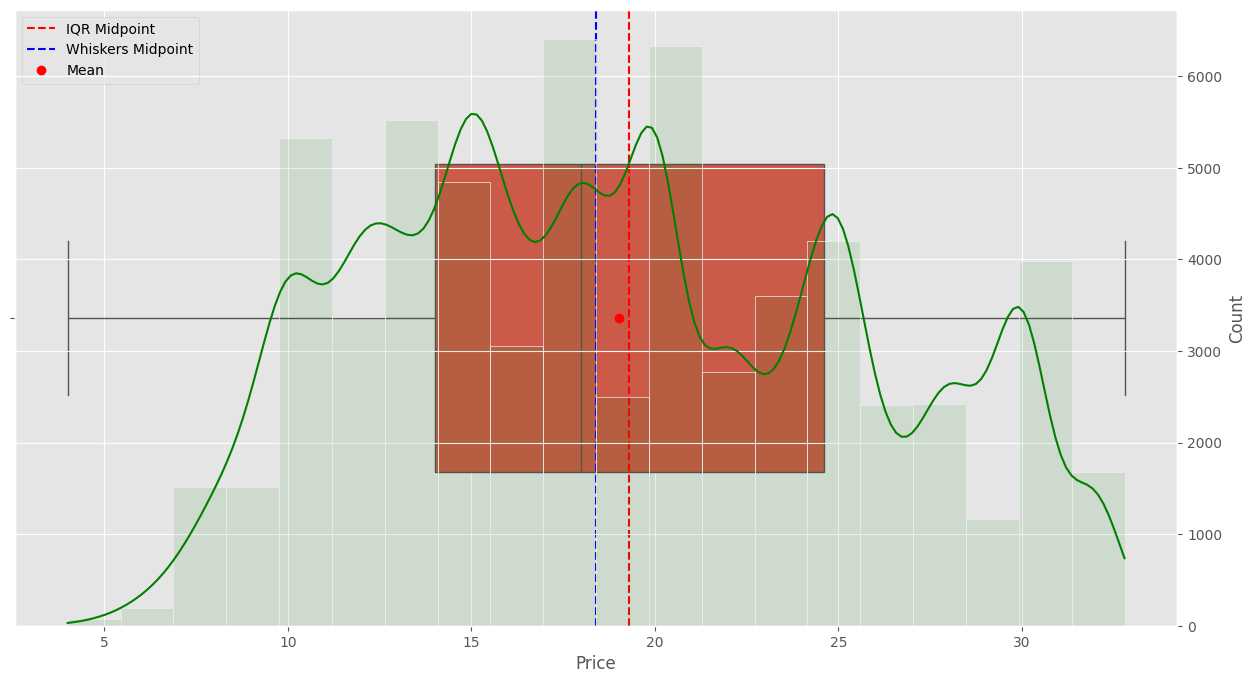

In [397]:
budget_friendly_data = reviews_hybrid[reviews_hybrid['Price_Category'] == 'Budget-Friendly']['Price']
plot_boxplot_series(budget_friendly_data)

**Budget-Friendly**
- **Count**: The most populous category with 62,879 wines, indicating a wide variety of budget-friendly options.
- **Mean Price**: $\$19.03$, indicating that most budget-friendly wines are priced around this value.
- **Standard Deviation**: $\$6.59$, showing a moderate spread of prices within this category.
- **Price Range**: The prices range from $\$4.00$ to $\$32.80$, with 25% of the wines priced at $\$14.00$ or less and 75% priced at $\$24.60$ or less.
- **Distribution**: The distribution is slightly skewed to the right (skewness = 0.22) but is generally symmetric. Kurtosis of -0.94, indicating a somewhat platykurtic distribution, meaning its tails are lighter 
    than a normal distribution, and it has fewer extreme outliers.
- **Variability**: The coefficient of variation (0.35) suggests moderate relative variability in prices.
- **Spread**: The IQR measures the spread of the middle 50% of your data. It tells you how tightly or 
    widely data points are clustered around the median. A larger IQR indicates greater variability, while a 
    smaller IQR suggests less variability. You can use the IQR to compare the variability of two or more 
    datasets. If one dataset has a larger IQR than another, it indicates that the data in the first dataset 
    is more spread out or variable. This category has the lowest IQR of all five categories. The smaller 
    the IQR the more consistent the values comparing to bigger IQR. What does this means? For 
    Collectible/Investment, the interquartile range (IQR) is broad, indicating a wide range of scores 
    within the middle 50% of wine. For Budget-Friendly, the interquartile range (IQR) is narrower compared 
    to Collectible/Investment, suggesting a more concentrated distribution of prices.

For the Budget-Friendly price category of wine, an analysis of the IQR midpoint and whiskers midpoint, along with median and mean, would involve understanding their implications in the context of price distribution and market positioning:

- **IQR Midpoint**: The Interquartile Range (IQR) midpoint reflects the central tendency of the middle 50% of wine prices in the Budget-Friendly category. An IQR midpoint of $19.30 indicates a concentrated clustering of wine prices around this value, suggesting a relatively homogeneous market segment where most wines are priced closely around the median. This central value is crucial for retailers and producers when positioning their products within this category, as it highlights the price range that consumers might expect for budget-friendly options.

- **Whiskers Midpoint**: The whiskers on a box plot represent the range of data points that are considered non-outliers, extending from the lower to the upper quartiles. A whiskers midpoint of $18.40, slightly lower than the IQR midpoint, suggests that the bulk of Budget-Friendly wines, including those slightly outside the middle 50%, are centered around a marginally lower price point. This indicates a skew towards more affordable options within the category, which might be due to a larger number of wines priced just below the median, reflecting the competitive pricing strategies employed by producers to appeal to cost-conscious consumers.

- **Median**: The median price provides a benchmark that divides the dataset into two equal halves. For the Budget-Friendly category, a median of $18.00 aligns closely with both the IQR and whiskers midpoints, reinforcing the notion of a tightly grouped price distribution. This median value is significant for market analysis as it represents the "middle" price point, at which half the wines are cheaper and half are more expensive, offering a clear reference for pricing strategies.

- **Mean**: The mean price offers an average that takes into account all prices within the category. This category has a mean price of $\$19.03$ and a median of $\$18.00$, indicating a relatively symmetrical distribution around the central value, as the mean and median are close.  A mean of $\$19.03$, slightly higher than the median, suggests a slight positive skew in the price distribution, where a few higher-priced outliers within the Budget-Friendly range slightly elevate the overall average. This distinction between the mean and median is important for understanding the overall price landscape and for identifying whether a few higher-priced wines are influencing the average price perception in this category. 

Together, these statistical measures provide a comprehensive view of the Budget-Friendly wine category, highlighting the central tendency, variability, and overall price structure. This analysis is invaluable for stakeholders in the wine industry, including producers, retailers, and marketers, as it aids in understanding consumer expectations, competitive pricing, and market positioning within the Budget-Friendly segment.

### **Mid-Range analysis**

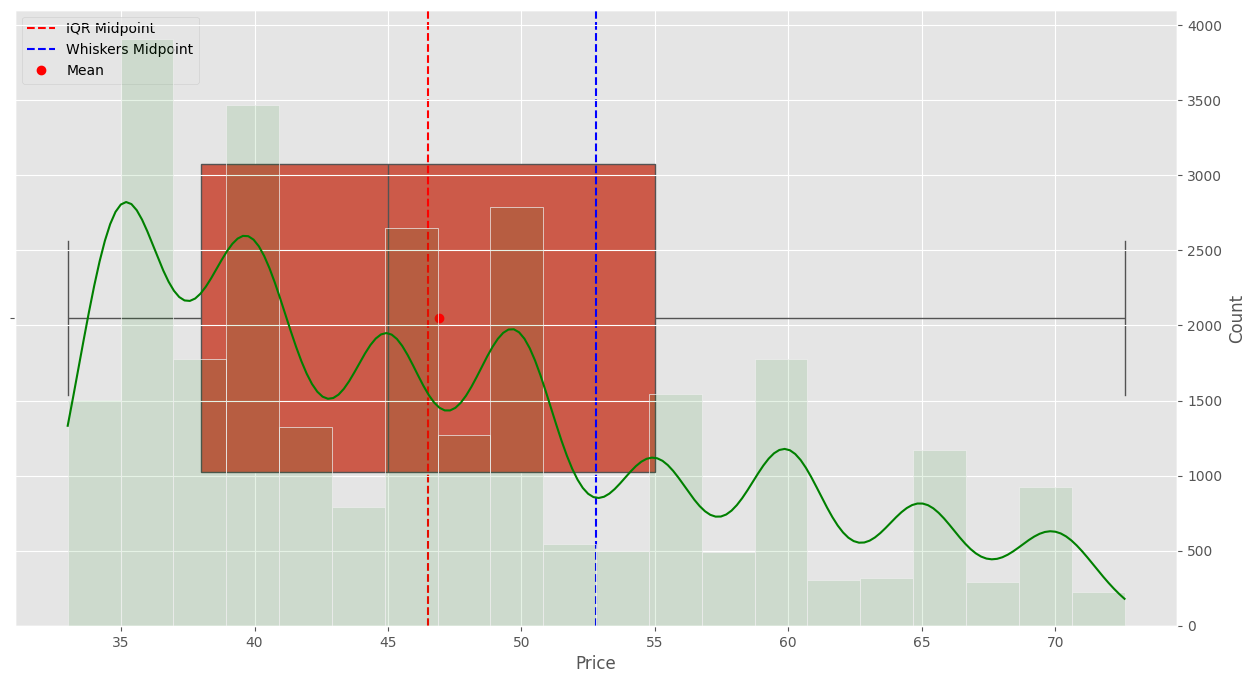

In [398]:
mid_range_data = reviews_hybrid[reviews_hybrid['Price_Category'] == 'Mid-Range']['Price']
plot_boxplot_series(mid_range_data)

**Mid-Range**
- **Count**: 27,568 wines, representing a substantial segment of the market.
- **Mean Price**: $\$46.93$, making it an accessible category for a wide range of consumers.
- **Standard Deviation**: $\$10.41$, showing a relatively tight distribution of prices.
- **Price Range**: Prices range from $\$33.00$ to $\$72.60$, with the majority of wines (75%) priced at $\$55.00$ or below.
- **Distribution**: The price distribution is more skewed (skewness = 0.64) with a less peaked distribution (kurtosis = -0.62).Kurtosis also indicating a platykurtic distribution but less so than the Budget- 
    Friendly category.
- **Variability**: A lower coefficient of variation (0.22) compared to the Budget-Friendly category indicates that the price variability is less significant relative to the mean price.

To perform an analysis of the Mid-Range price category of wine, focusing on the IQR midpoint, whiskers midpoint, median, and mean, we'll consider their implications for price distribution and market dynamics within this segment:

- **IQR Midpoint**: The IQR midpoint in the Mid-Range category is $46.5, indicating the central price point of the middle 50% of wines. This value provides a clear indicator of the median market price within this category, suggesting a balance in the distribution of wine prices around a mid-level range. For stakeholders, this midpoint offers insight into the core pricing strategies within the Mid-Range segment, reflecting a balance between affordability and perceived quality.

- **Whiskers Midpoint**: The whiskers midpoint, calculated as the average of the lower and upper bounds of the non-outlier price range, stands at $52.8. This value being higher than the IQR midpoint suggests that the distribution of prices extends more significantly towards the higher end, indicating the presence of wines that, while not outliers, are priced above the dense central cluster. This upward extension could signify a subset within the Mid-Range category that approaches premium pricing, highlighting a potential niche for higher-quality offerings that remain accessible.

- **Median**: The median price of $45.0 in the Mid-Range category effectively splits the dataset into two halves, with 50% of wines priced below this point and 50% above. The median being slightly lower than the IQR midpoint suggests that the denser concentration of prices is marginally below the middle of the IQR, possibly indicating a larger number of wines clustered just below the central price point. This median value is crucial for understanding consumer price sensitivity and the competitive landscape within the Mid-Range category.

- **Mean**: The mean price, or average, provides a comprehensive view of the overall pricing landscape within the Mid-Range category. A mean of $46.93, slightly higher than the median, points to a mild positive skew in the price distribution, with some wines priced higher than the central cluster affecting the average. This skew towards higher prices within the Mid-Range category can inform producers and retailers about the upper price limit that consumers might be willing to pay for wines that offer perceived value without venturing into premium territory.

In summary, the analysis of the Mid-Range wine category through these statistical measures paints a picture of a segment where there is a significant concentration of wines around a central price point, with a slight extension towards higher prices. The IQR and whiskers midpoints, along with the median and mean, provide a multi-faceted view of the pricing structure, offering valuable insights into market positioning, consumer expectations, and the potential for value proposition within this category. This analysis is instrumental for market analysts, producers, and retailers in strategizing product offerings and pricing to cater to the Mid-Range wine consumer segment.

### **Premium analysis**

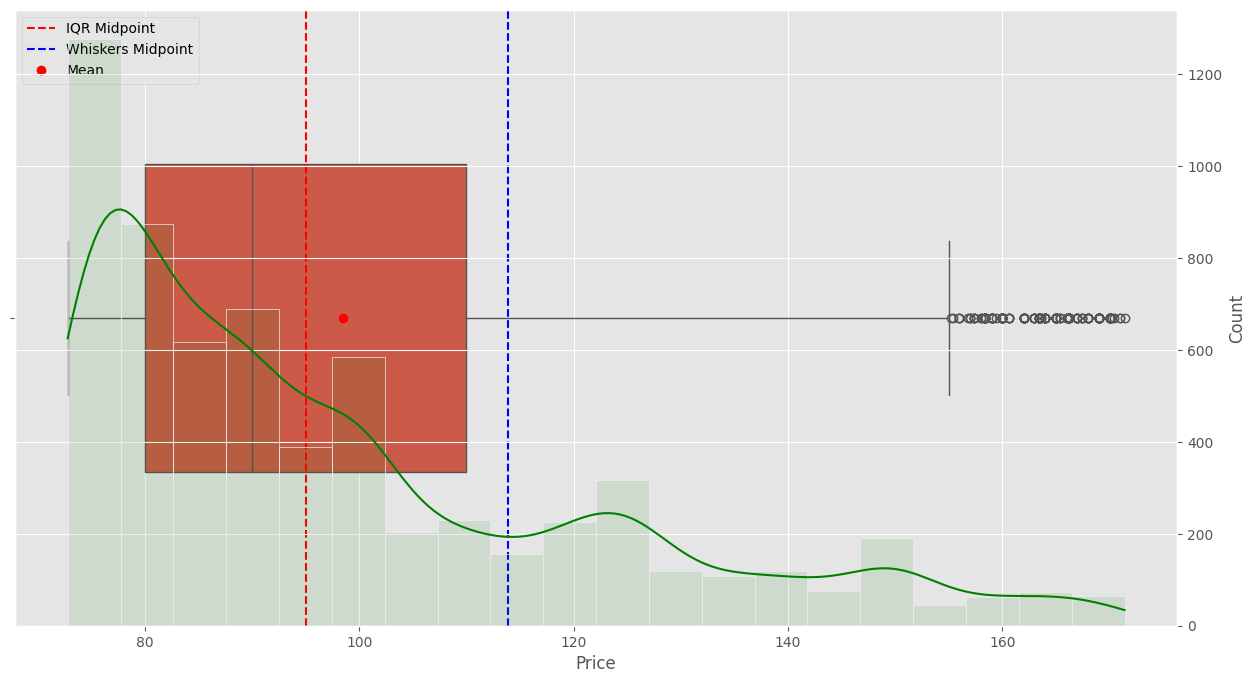

In [399]:
premium_data = reviews_hybrid[reviews_hybrid['Price_Category'] == 'Premium']['Price']
plot_boxplot_series(premium_data)

**Premium**
- **Count**: 6,417 wines, offering a diverse selection of higher-quality options without reaching luxury prices.
- **Mean Price**: $\$98.52$, situating these wines in a more premium segment.
- **Standard Deviation**: $\$24.05$, indicating a moderate variation in prices within this category.
- **Price Range**: Prices start at $\$72.80$ and go up to $\$171.40$, with 204 outliers, indicating around 3.18% of wines priced well above the upper quartile, and with most wines (75%) priced at 
    $\$110.00$ or below.   
- **Distribution**: Prices show a rightward skew (skewness = 1.12) and a slightly peaked distribution (kurtosis = 0.39). Kurtosis of 0.39, which is closer to mesokurtic, suggesting a more normal-like distribution 
    of tail thickness but with a slight tendency towards heavier tails.
- **Variability**: The coefficient of variation is 0.24, indicating moderate variability in price.

To conduct an analysis of the Premium price category, focusing on the IQR midpoint, whiskers midpoint, median, and mean, let's delve into their significance for understanding the pricing dynamics and market characteristics within this segment:

- **IQR Midpoint**: The IQR midpoint in the Premium category is $95.0, indicating the central price point of the middle 50% of wines. This value is pivotal in reflecting the core pricing strategies within the Premium segment, where the emphasis is on superior quality and exclusivity. The IQR midpoint being significantly higher than in lower categories underscores the elevated positioning of Premium wines, where consumers are likely to encounter a refined selection of wines that command higher prices due to their perceived quality and brand prestige.

- **Whiskers Midpoint**: The midpoint of the whiskers at $113.9, higher than the IQR midpoint, indicates an extended distribution of wine prices towards the upper end, within the non-outlier range. This suggests that within the Premium category, there exists a notable proportion of wines that, while not being extreme outliers, are priced above the dense central cluster, possibly due to exceptional quality, rarity, or brand reputation. This higher whiskers midpoint reflects the segment's capacity to cater to a niche market willing to pay a premium for distinctive wines that offer an extraordinary experience.

- **Median**: The median price in the Premium category, set at $90.0, marks the middle of the price distribution, dividing it into two equal halves. The median being slightly below the IQR midpoint suggests a dense clustering of wine prices around and just below this central value, indicative of a strong market presence of Premium wines that are priced competitively within the segment. This median price point is essential for understanding the consumer's price tolerance and the competitive dynamics within the Premium wine market, highlighting the price range where the majority of transactions are likely to occur.

- **Mean**: The mean price of $98.52 in the Premium category provides an aggregated view of the pricing landscape, slightly above the median, indicating a positive skewness in the price distribution. This suggests that while the bulk of Premium wines are priced around the median, there are enough higher-priced wines to elevate the average price. This skewness towards higher prices can offer insights into the segment's pricing elasticity, where a segment of consumers is willing to explore higher price points for wines that promise an exceptional quality or unique value proposition.

In sum, the analysis of the Premium wine category through these statistical lenses reveals a segment characterized by a significant concentration of wines around a notable price point, with an extension towards higher prices. The IQR and whiskers midpoints, alongside the median and mean, provide a nuanced understanding of the pricing architecture, offering valuable insights for market analysts, producers, and retailers in strategizing product offerings and pricing to meet the expectations of Premium wine consumers. This segment represents a sophisticated market where quality, brand, and exclusivity play crucial roles in defining value and driving consumer choice.

### **Luxury analysis**

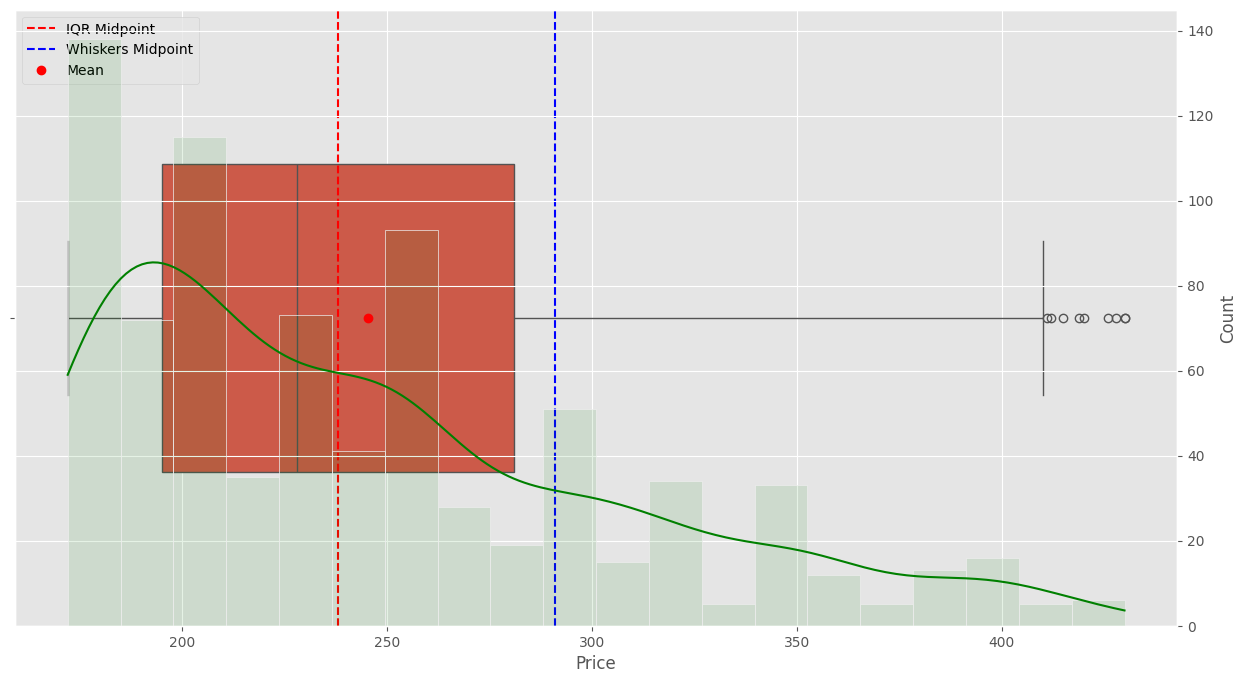

In [400]:
luxury_data = reviews_hybrid[reviews_hybrid['Price_Category'] == 'Luxury']['Price']
plot_boxplot_series(luxury_data)

**Luxury**
- **Count**: There are 809 wines classified under the Luxury category, indicating a smaller dataset compared to more accessible categories. This is expected as luxury items tend to be less common.
- **Mean Price**: $\$245.31$, positioning these wines in the luxury segment.
- **Standard Deviation**: $\$62.48$, indicating a relatively wide price range compared to premium wines.
- **Mean and Median**: The average price is $\$245.31$, with a median of $\$228$. This suggests a relatively high central tendency for prices in this category, with the median being slightly lower than the mean, 
    which indicates a distribution that is skewed to the right but not severely so.
- **Price Range**: The prices range from $\$172.00$ to $\$430.00$, with most wines (75%) priced at $\$281.00$ or below.
- **Distribution**: The skewness value of 0.93 indicates a moderate right skew in the distribution, meaning there are more wines priced above the mean compared to below. Kurtosis of 0.07, very close to 0, 
    indicating a mesokurtic distribution  with tails similar to a normal distribution. The kurtosis of 0.07 suggests a distribution that is fairly close to a normal distribution in terms of its tails, with only 
    a slight propensity for outliers.
- **Variability**: The coefficient of variation stands at 0.25, similar to the Premium category, denoting relative price variability.
- **Outliers**: There are 9 outliers identified, which highlights specific wines that are priced well beyond the general luxury range, potentially due to exceptional rarity, vintage, or other unique attributes.
- **Mode**: The most common price point in this category is \$200, indicating a popular pricing threshold within the luxury segment.

To provide an analysis of the Luxury price category of wines, focusing on the IQR midpoint, whiskers midpoint, median, and mean, let's delve into their significance for understanding the price distribution and market nuances within this high-end segment:

- **IQR Midpoint**: In the Luxury category, the IQR midpoint stands at $238.0, denoting the median price point within the interquartile range. This figure is significantly higher than those in lower categories, emphasizing the elevated baseline for luxury wines. Unlike more budget-friendly or mid-range categories, the IQR midpoint here doesn't just indicate a balance between lower and higher-end offerings within the segment but rather underscores the high entry point and the narrow focus on premium quality and exclusivity. For luxury wine stakeholders, this midpoint is indicative of a market where distinction, rarity, and brand heritage play critical roles in pricing, far beyond the intrinsic quality of the wine itself.

- **Whiskers Midpoint**: The whiskers midpoint, calculated as the average of the lower and upper bounds of the non-outlier price range (\$172.0 and \$410.0, respectively), stands at \$291.0. This figure being higher than the IQR midpoint illustrates that the price distribution widens towards the upper end, indicating a significant portion of wines that are priced above the dense central cluster but still within the non-outlier range. This extension towards higher prices suggests the existence of a subset within the Luxury category that encapsulates ultra-premium offerings, possibly indicating wines with exceptional heritage, rarity, or quality.

- **Median**: The median price of \$228.0 effectively bisects the dataset, with half of the wines priced below this threshold and the other half above. The median being slightly below the IQR midpoint hints at a denser concentration of prices just beneath the central range, potentially indicating a larger quantity of luxury wines clustered around this lower luxury price point. The median is pivotal for gauging consumer price tolerance and the competitive dynamics within the Luxury segment, providing insights into the most accessible price point within this exclusive category.

- **Mean**: The mean, or average price, offers an overarching perspective of the pricing landscape within the Luxury category. A mean of \$245.31, somewhat above the median, indicates a slight positive skew in the distribution, where a number of higher-priced wines elevate the average. This skewness towards the upper end of the price spectrum within the Luxury category can guide producers and retailers regarding the ceiling price that consumers might be willing to entertain for wines that epitomize the pinnacle of quality and exclusivity.

In essence, this analysis through various statistical lenses reveals a Luxury wine segment characterized by a strong concentration around a high median price point, with a notable stretch towards even more premium pricing. The examination of the IQR and whiskers midpoints, alongside the median and mean, offers a nuanced understanding of the pricing architecture, shedding light on market positioning, consumer expectations, and the distinct value proposition within the Luxury wine category. Such insights are invaluable for market analysts, producers, and retailers in formulating strategies that resonate with the expectations of luxury wine consumers, ensuring alignment with the segment's premium and exclusive nature.

### **Collectible/Investment analysis**

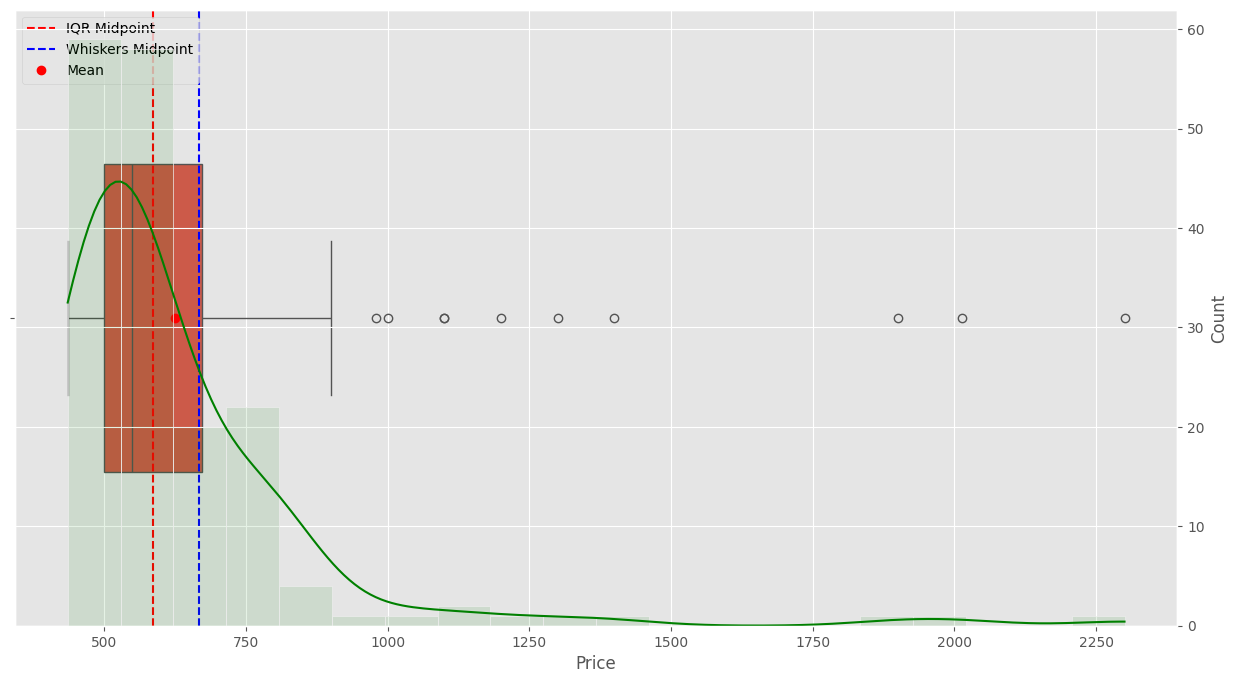

In [401]:
collectible_data = reviews_hybrid[reviews_hybrid['Price_Category'] == 'Collectible/Investment']['Price']
plot_boxplot_series(collectible_data)

**Collectible/Investment**
- **Count**: 173 wines, indicating a very exclusive and limited selection of wines in this category.
- **Mean Price**: $\$625.37$, highlighting the premium nature of these wines.
- **Standard Deviation**: $\$253.56$, suggesting a wide variation in prices, which is expected given the collectible and investment nature of these wines.
- **Price Range**: Prices start at $\$435.80$ and go up to $\$2300.00$, with a median price of $\$550.00$. This indicates a significant investment for collectors.
- **Distribution**: The distribution is highly skewed (skewness = 3.82) and very peaked (kurtosis = 18.93), indicating a significant deviation from a normal distribution. High kurtosis of 18.93, indicating a very 
    leptokurtic distribution. This suggests the presence of significant outliers and a higher probability of extreme values compared to the other categories.
- **Variability**: The highest coefficient of variation (0.41) among all categories indicates that price dispersion is quite significant relative to the mean.

In the Collectible/Investment category, the pricing and market dynamics are distinct from more consumer-oriented segments. This category typically involves wines that are not only purchased for consumption but also as a form of investment, with the expectation that their value will increase over time. The analysis of statistical measures such as the IQR midpoint, whiskers midpoint, median, and mean reveals insights into the unique nature of this market segment:

- **IQR Midpoint**: The midpoint of the Interquartile Range (IQR) for the Collectible/Investment category is $586.0, indicating that the central prices of the most collectible and investment-worthy wines fall around this value. This midpoint is considerably higher than those in other categories, reflecting the premium nature of these wines. The high IQR midpoint highlights the significant financial commitment required to engage in wine collecting and investment, emphasizing the exclusivity of wines within this segment.

- **Whiskers Midpoint**: The whiskers midpoint at $667.9, calculated as the average of the whisker bottom ($435.8) and whisker top ($900.0), suggests a wide price range within the non-outlier data points. The fact that this midpoint is higher than the IQR midpoint indicates that there are many collectible wines priced significantly above the median of the category, underscoring the high variance in investment value among these wines. This range can be attributed to factors like rarity, vintage, and provenance, which can dramatically affect a wine's investment potential.

- **Median**: The median price of $550.0 effectively segments the Collectible/Investment category into two halves, indicating that half of the investment-grade wines are priced below this point, while the other half exceeds it. The median provides a baseline for what collectors might expect to pay for a wine with potential investment value, serving as a reference point for gauging market trends and investment opportunities within this exclusive segment.

- **Mean**: The mean price, influenced by the presence of high-value outliers, illustrates the average investment required to acquire wines in this category. A mean price of $625.37, higher than the median, indicates a positive skew in the distribution, reflecting the presence of exceptionally priced wines that elevate the overall average. This skew highlights the speculative nature of wine investment, where a few select wines can command extraordinary prices based on their investment potential.

The Collectible/Investment category is characterized by a significant range in prices, with a notable skew towards higher-valued wines. The analysis of the IQR and whiskers midpoints, alongside the median and mean, offers insights into the investment landscape within this category, revealing a market driven by rarity, vintage quality, and the potential for appreciation. This segment demands a sophisticated understanding of wine as an asset class, where decisions are influenced by market trends, historical data, and expert forecasts.

### **Summary and conclusion**

Analyzing the provided statistics for each `Price_Category` reveals interesting insights into the wine market as represented by the dataset:

**Budget-Friendly**
- **Count**: The most populous category with 62,879 wines, indicating a wide variety of budget-friendly options.
- **Mean Price**: $\$19.03$, indicating that most budget-friendly wines are priced around this value.
- **Standard Deviation**: $\$6.59$, showing a moderate spread of prices within this category.
- **Price Range**: The prices range from $\$4.00$ to $\$32.80$, with 25% of the wines priced at $\$14.00$ or less and 75% priced at $\$24.60$ or less.
- **Distribution**: The distribution is slightly skewed to the right (skewness = 0.22) but is generally symmetric. Kurtosis of -0.94, indicating a somewhat platykurtic distribution, meaning its tails are lighter 
    than a normal distribution, and it has fewer extreme outliers.
- **Variability**: The coefficient of variation (0.35) suggests moderate relative variability in prices.
- **Spread**: The IQR measures the spread of the middle 50% of your data. It tells you how tightly or 
    widely data points are clustered around the median. A larger IQR indicates greater variability, while a 
    smaller IQR suggests less variability. You can use the IQR to compare the variability of two or more 
    datasets. If one dataset has a larger IQR than another, it indicates that the data in the first dataset 
    is more spread out or variable. This category has the lowest IQR of all five categories. The smaller 
    the IQR the more consistent the values comparing to bigger IQR. What does this means? For 
    Collectible/Investment, the interquartile range (IQR) is broad, indicating a wide range of scores 
    within the middle 50% of wine. For Budget-Friendly, the interquartile range (IQR) is narrower compared 
    to Collectible/Investment, suggesting a more concentrated distribution of prices.

**Mid-Range**
- **Count**: 27,568 wines, representing a substantial segment of the market.
- **Mean Price**: $\$46.93$, making it an accessible category for a wide range of consumers.
- **Standard Deviation**: $\$10.41$, showing a relatively tight distribution of prices.
- **Price Range**: Prices range from $\$33.00$ to $\$72.60$, with the majority of wines (75%) priced at $\$55.00$ or below.
- **Distribution**: The price distribution is more skewed (skewness = 0.64) with a less peaked distribution (kurtosis = -0.62).Kurtosis also indicating a platykurtic distribution but less so than the Budget- 
    Friendly category.
- **Variability**: A lower coefficient of variation (0.22) compared to the Budget-Friendly category indicates that the price variability is less significant relative to the mean price.

**Premium**
- **Count**: 6,417 wines, offering a diverse selection of higher-quality options without reaching luxury prices.
- **Mean Price**: $\$98.52$, situating these wines in a more premium segment.
- **Standard Deviation**: $\$24.05$, indicating a moderate variation in prices within this category.
- **Price Range**: Prices start at $\$72.80$ and go up to $\$171.40$, with 204 outliers, indicating around 3.18% of wines priced well above the upper quartile, and with most wines (75%) priced at 
    $\$110.00$ or below.   
- **Distribution**: Prices show a rightward skew (skewness = 1.12) and a slightly peaked distribution (kurtosis = 0.39). Kurtosis of 0.39, which is closer to mesokurtic, suggesting a more normal-like distribution 
    of tail thickness but with a slight tendency towards heavier tails.
- **Variability**: The coefficient of variation is 0.24, indicating moderate variability in price.

**Luxury**
- **Count**: There are 809 wines classified under the Luxury category, indicating a smaller dataset compared to more accessible categories. This is expected as luxury items tend to be less common.
- **Mean Price**: $\$245.31$, positioning these wines in the luxury segment.
- **Standard Deviation**: $\$62.48$, indicating a relatively wide price range compared to premium wines.
- **Mean and Median**: The average price is $\$245.31$, with a median of $\$228$. This suggests a relatively high central tendency for prices in this category, with the median being slightly lower than the mean, 
    which indicates a distribution that is skewed to the right but not severely so.
- **Price Range**: The prices range from $\$172.00$ to $\$430.00$, with most wines (75%) priced at $\$281.00$ or below.
- **Distribution**: The skewness value of 0.93 indicates a moderate right skew in the distribution, meaning there are more wines priced above the mean compared to below. Kurtosis of 0.07, very close to 0, 
    indicating a mesokurtic distribution  with tails similar to a normal distribution. The kurtosis of 0.07 suggests a distribution that is fairly close to a normal distribution in terms of its tails, with only 
    a slight propensity for outliers.
- **Variability**: The coefficient of variation stands at 0.25, similar to the Premium category, denoting relative price variability.
- **Outliers**: There are 9 outliers identified, which highlights specific wines that are priced well beyond the general luxury range, potentially due to exceptional rarity, vintage, or other unique attributes.
- **Mode**: The most common price point in this category is \$200, indicating a popular pricing threshold within the luxury segment.

**Collectible/Investment**
- **Count**: 173 wines, indicating a very exclusive and limited selection of wines in this category.
- **Mean Price**: $\$625.37$, highlighting the premium nature of these wines.
- **Standard Deviation**: $\$253.56$, suggesting a wide variation in prices, which is expected given the collectible and investment nature of these wines.
- **Price Range**: Prices start at $\$435.80$ and go up to $\$2300.00$, with a median price of $\$550.00$. This indicates a significant investment for collectors.
- **Distribution**: The distribution is highly skewed (skewness = 3.82) and very peaked (kurtosis = 18.93), indicating a significant deviation from a normal distribution. High kurtosis of 18.93, indicating a very 
    leptokurtic distribution. This suggests the presence of significant outliers and a higher probability of extreme values compared to the other categories.
- **Variability**: The highest coefficient of variation (0.41) among all categories indicates that price dispersion is quite significant relative to the mean.

**Summary and Conclusions**:
- **Price Progression**: There's a clear progression in mean prices from Budget-Friendly to Collectible/Investment categories, reflecting a wide spectrum of wine prices.
- **Variability**: The coefficient of variation decreases from Budget-Friendly to Luxury, indicating that higher-priced wine categories tend to have less relative price variability. However, the 
    Collectible/Investment category reverses this trend, showing significant price dispersion.
- **Distribution**: Higher-priced categories tend to exhibit more right-skewed distributions, indicating a significant number of wines priced well above the median.
- **Outliers**: The presence of outliers in Premium and Collectible/Investment categories suggests that some wines are priced significantly higher than others, possibly due to rarity, age, or reputation. High 
    kurtosis in a dataset, especially in the context of wine pricing, can indicate the presence of a few extremely high-priced wines that could be considered anomalies or rare collectibles. These extreme values 
    can heavily influence the overall data analysis and should be carefully considered in pricing strategies and inventory decisions.
- **Market Segmentation**: These statistics illustrate the segmentation within the wine market, from everyday affordable options to rare collectibles, with each segment catering to different consumer preferences 
    and purchasing power. This analysis underscores the diversity within the wine market, with each category offering unique characteristics in terms of price, variability, and distribution.
    This analysis provides a comprehensive view of the pricing landscape across different wine categories, highlighting the diversity in price points and the types of wines available in each segment.

### **Analysis of Consistance vs High variability in Prices**

A familiar style of plot that accomplishes this goal is a bar plot. In seaborn, the barplot() function operates on a full dataset and applies a function to obtain the estimate (taking the mean by default). When there are multiple observations in each category, it also uses bootstrapping to compute a confidence interval around the estimate, which is plotted using error bars:

In [402]:
reviews_hybrid.groupby("Price_Category", observed=True).agg({"Price": "mean"})

Price
Price_Category                    
Budget-Friendly          19.026594
Mid-Range                46.930223
Premium                  98.519308
Luxury                  245.308035
Collectible/Investment  625.366474

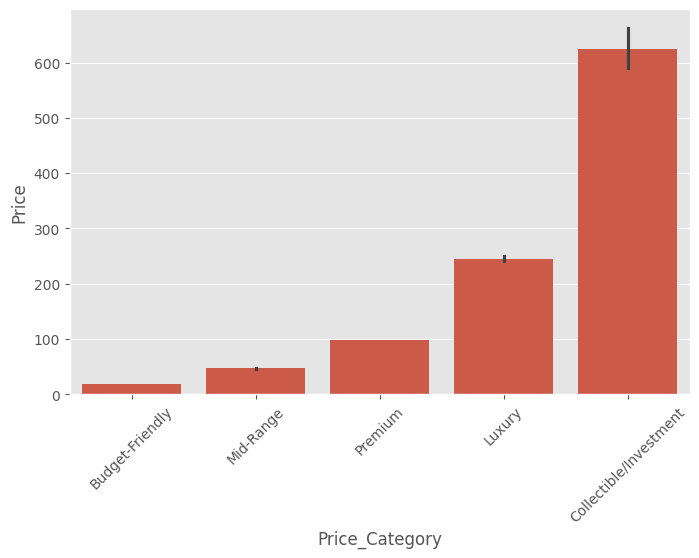

In [403]:
plt.figure(figsize=(8, 5))
sns.barplot(data=reviews_hybrid, x="Price_Category", y="Price")
plt.xticks(rotation=45) 
plt.show()

And here on the y axis we have the Price. And by default, the bar plot actually calculates the mean Price for all Price Category groups. So here we have five categories and the height of the bar here actually the mean Price. And these are so-called point estimates because we simply calculate here the mean over all wine in the respective category.

In addition, we can see here **the black line**, which gives us kind of a confidence interval. So instead of having only one point estimate and saying that the average Price of Collectable/Investment wine is 625.36, the confidence interval says that, for example, in 95% of all cases, the mean Price of Collectable/Investment wine should be between these two points here. So this is a more statistical approach. And we can see in parameters of the function that here we have a confidence interval of 95% **errorbar=('ci', 95)** and we have 1000 simulations **n_boot=1000**. So seaborne simulates here the booking for the "reviews_hybrid" 1000 times and then creates a confidence interval where we can find, for example, the mean Price of all Category wine in 95% of all cases.

In [404]:
import scipy.stats as stats
# Filter data for unique Price Categories from the new dataset
price_categories_new = reviews_hybrid['Price_Category'].unique()

# Initialize a dictionary to store confidence intervals for the new dataset
conf_intervals_new = {}

# Calculate 95% confidence intervals for mean Price in each category for the new dataset
for category in price_categories_new:
    category_data_new = reviews_hybrid[reviews_hybrid['Price_Category'] == category]['Price'].dropna()
    if len(category_data_new) > 1:  # Ensure there are enough data points
        conf_interval_new = stats.t.interval(0.95, len(category_data_new)-1, loc=np.mean(category_data_new), scale=stats.sem(category_data_new))
        conf_intervals_new[category] = conf_interval_new

conf_intervals_new

{'Luxury': (240.9963898202477, 249.61967940101312),
 'Premium': (97.93079481057116, 99.10782136521188),
 'Mid-Range': (46.807368036982865, 47.05307885796782),
 'Budget-Friendly': (18.975108907745607, 19.078078961018214),
 'Collectible/Investment': (587.3151995277315, 663.417748449147)}

The provided confidence intervals for the mean prices across the five categories—Budget-Friendly, Mid-Range, Premium, Luxury, and Collectible/Investment—offer valuable insights into the pricing structure within the wine market.

1. **Budget-Friendly**: The narrow confidence interval (CI) from $\$18.98$ to $\$19.08$ suggests a highly consistent pricing strategy within this category, with less variation in prices.

2. **Mid-Range**: The CI from $\$46.81$ to $\$47.05$ indicates a slightly higher but still relatively consistent price range, reflecting a moderate level of variation within the category.

3. **Premium**: The CI from $\$97.93$ to $\$99.11$ shows a broader range than the lower categories, indicative of a greater variety in wine offerings and quality.

4. **Luxury**: The CI from $\$240.99$ to $\$249.62$ widens further, highlighting significant price variability within this high-end category, possibly due to the inclusion of rare or highly sought-after wines.

5. **Collectible/Investment**: The widest CI, from $\$587.32$ to $\$663.42$, underscores the exceptional price range in this category, reflecting the unique, rare, or investment-grade wines that carry a premium.

**Summary**:
The progression from narrow to wide confidence intervals across categories from Budget-Friendly to Collectible/Investment illustrates the increasing variability and premium associated with higher categories. This trend underscores the diverse market segmentation in the wine industry, catering to a wide range of consumer preferences and price sensitivities.

**Conclusion**:
The analysis of confidence intervals for mean prices reveals a structured pricing strategy across the wine market segments, with each category targeting specific consumer demographics. The significant variation in the Luxury and Collectible/Investment categories highlights the premium placed on rarity, quality, and investment potential in these wines. In contrast, the Budget-Friendly and Mid-Range categories demonstrate a focus on consistency and accessibility, catering to everyday consumption and value-seeking consumers.

### **Analisys of significant differences in mean prices**

The provided confidence intervals for the mean prices of the five wine categories—Budget-Friendly, Mid-Range, Premium, Luxury, and Collectible/Investment—indicate varying degrees of overlap:

1. **Budget-Friendly and Mid-Range**: The confidence intervals for Budget-Friendly ($\$18.98$ to $\$19.08$) and Mid-Range ($\$46.81$ to $\$47.05$) do not overlap, suggesting a statistically significant difference in mean prices between these categories.

2. **Mid-Range and Premium**: The intervals for Mid-Range ($\$46.81$ to $\$47.05$) and Premium ($\$97.93$ to $\$99.11$) also do not overlap, indicating a significant difference in mean prices.

3. **Premium and Luxury**: The intervals for Premium ($\$97.93$ to $\$99.11$) and Luxury ($\$240.99$ to $\$249.62$) do not overlap, further suggesting significant differences between these categories.

4. **Luxury and Collectible/Investment**: The intervals for Luxury ($\$240.99$ to $\$249.62$) and Collectible/Investment ($\$587.32$ to $\$663.42$) do not overlap, indicating a significant difference in mean prices.

**Interpretation**:
The lack of overlap between the confidence intervals of adjacent categories indicates significant differences in their mean prices, reflecting distinct market segments within the wine industry. This separation suggests that each category targets a different consumer base, with price points reflecting the quality, rarity, and perceived value of the wines within each segment.

**Conclusion**:
The non-overlapping confidence intervals across all categories suggest a well-segmented wine market, where each category offers distinct value propositions to consumers, from everyday affordable options to high-end luxury and investment-grade wines. This clear differentiation supports targeted marketing strategies and consumer choice within the diverse wine market.

And instead of having here a bar plot, we can also have the same as a **point plot**.

So there's the additional Seabourn plot point plot.

And also here we have the same parameters and actually we have here the same plot.

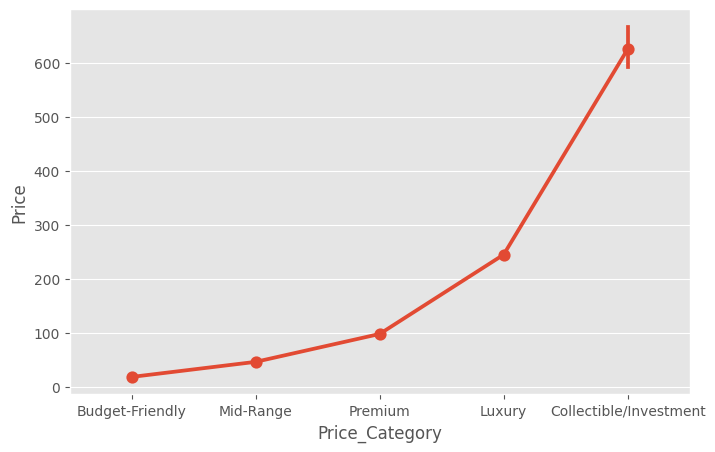

In [405]:
plt.figure(figsize=(8, 5))
sns.pointplot(data=reviews_hybrid, x="Price_Category", y="Price")
plt.show()

So what is nice about these pointplots that we don't have here the barplots but see the hight of each bar via red dots called `point estimate`. 

Moreover, the vertical lines are the confidence intervals for the mean of Price of wine in different Price Categories. The interpretation on confidence intervals are the same as for the above boxplot.

#### **Basic Visualization**

In [406]:
reviews_hybrid["Price_Category"].value_counts()

Price_Category
Budget-Friendly           62879
Mid-Range                 27568
Premium                    6417
Luxury                      809
Collectible/Investment      173
Name: count, dtype: int64

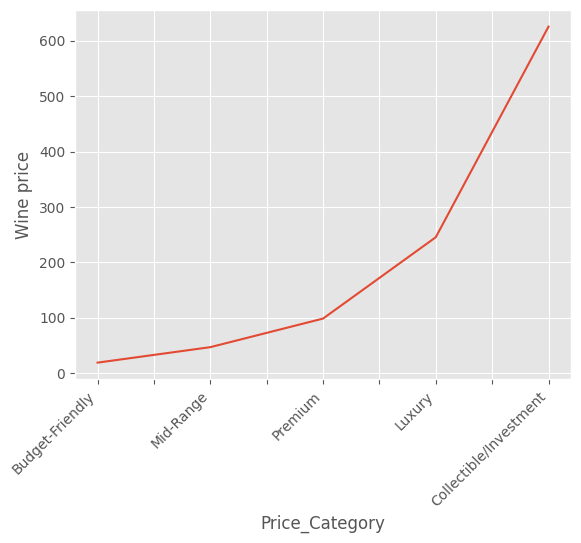

In [407]:
reviews_hybrid.groupby("Price_Category", observed=True)["Price"].mean().plot()
plt.ylabel("Wine price")
plt.xticks(rotation=45, ha="right")
plt.show()

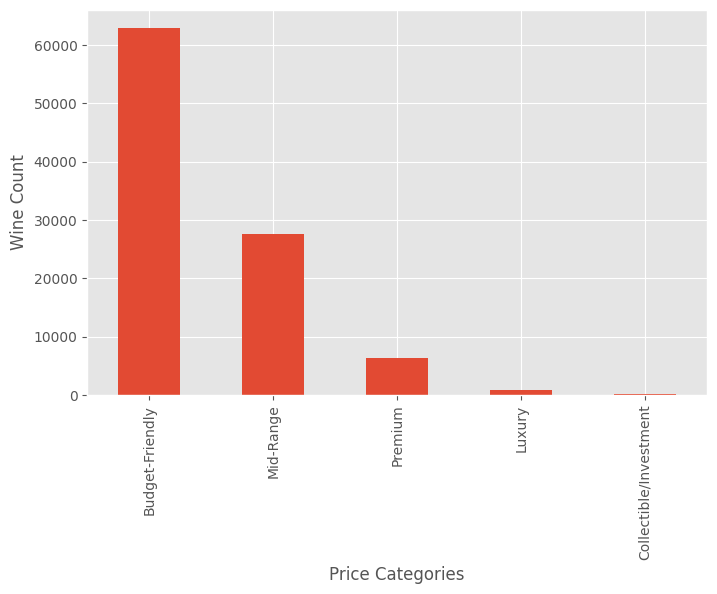

In [408]:
reviews_hybrid["Price_Category"].value_counts().plot(kind='bar', figsize=(8, 5))
plt.xlabel("Price Categories")
plt.ylabel("Wine Count")
plt.show()

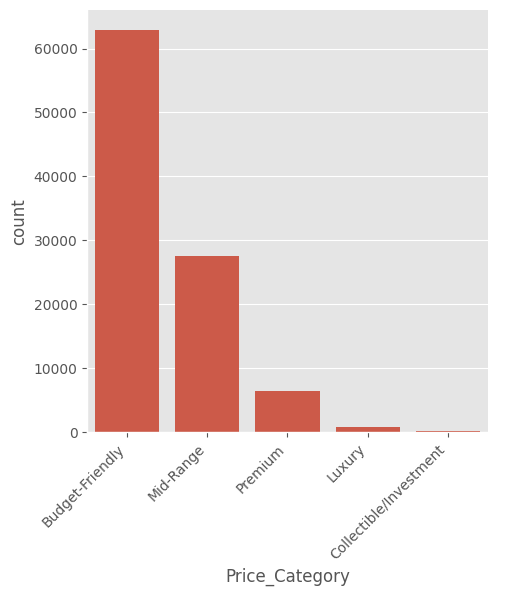

In [409]:
sns.catplot(data=reviews_hybrid, x="Price_Category", kind="count")
plt.xticks(rotation=45, ha="right")
plt.show()

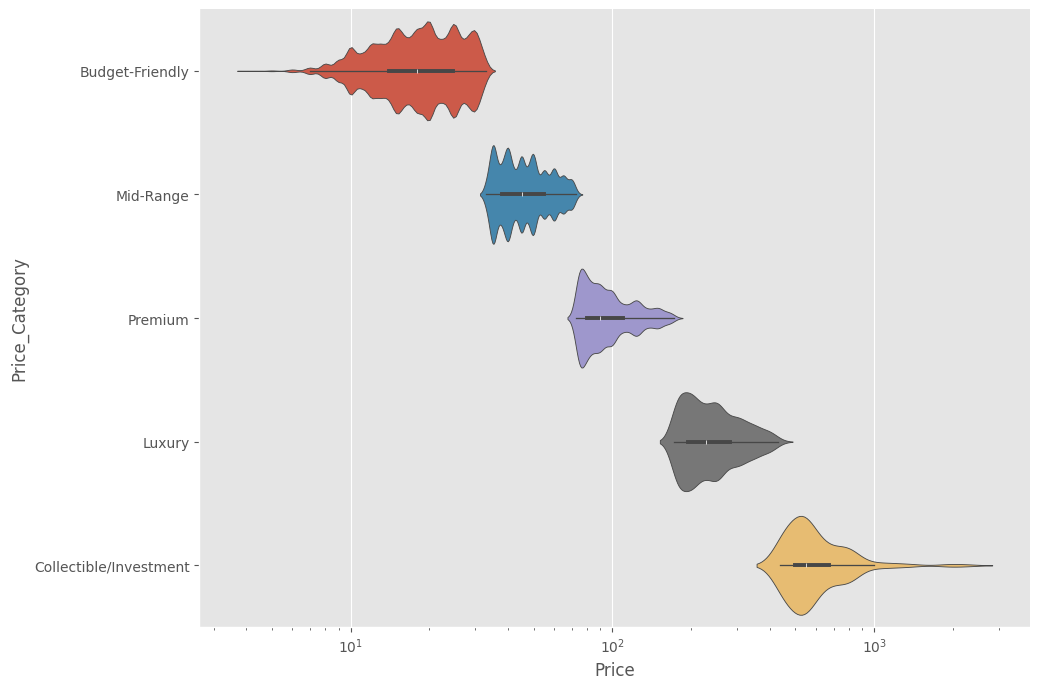

In [410]:
sns.catplot(data=reviews_hybrid, x="Price", y="Price_Category", 
            kind="violin", hue="Price_Category", legend=False, log_scale=True,
            height=7, aspect=1.5)
plt.show()

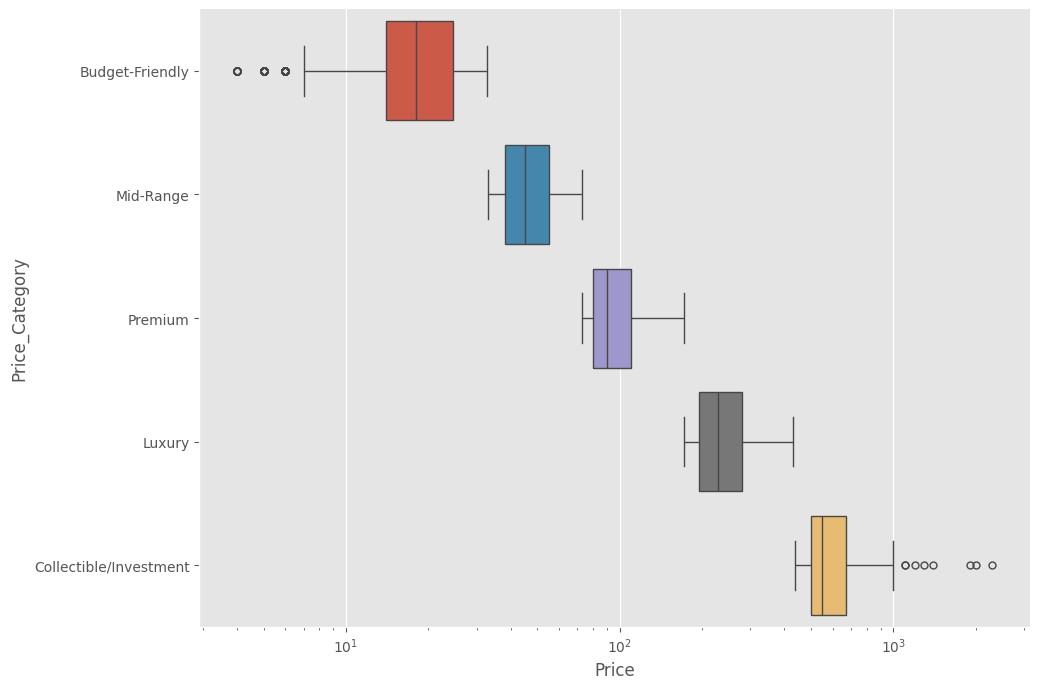

In [411]:
sns.catplot(data=reviews_hybrid, x="Price", y="Price_Category", 
            kind="box", hue="Price_Category", legend=False, log_scale=True,
            height=7, aspect=1.5)
plt.show()

When we use a box plot with a logarithmic scale for the 'Price' variable, as in the above `sns.catplot` code, it can indeed reveal outliers in the "Budget-Friendly" category that were not identified by the `stat` function. This discrepancy can arise from a couple of key differences in how outliers are identified and visualized in these two approaches:

1. **Logarithmic Scale**: Applying a logarithmic scale to the 'Price' data can significantly change the distribution's appearance by compressing the scale for higher values and expanding it for lower values. This can make outliers more apparent on the plot, especially if those outliers are closer to the lower end of the price range, where the logarithmic transformation has a more pronounced effect on distances between points.

2. **Visualization vs. Calculation**: The box plot visualization can sometimes give a different impression of outliers compared to the calculated values used to determine outliers in the `stat` function. Visualization tools like seaborn's `catplot` might use slightly different criteria or algorithms for determining whisker lengths and identifying outliers, especially when data transformations like `log_scale` are applied.

3. **Sensitivity to Outliers in Log Scale**: The use of a logarithmic scale can make the plot more sensitive to outliers, particularly those that are small in absolute terms but significant relative to the logarithmic scale. This means that prices that are not far from the bulk of the data in linear terms might appear as outliers when the data is transformed.

Given these points, both calculations can be "correct" in their contexts. The `stat` function provides a strict, numerical determination of outliers based on the actual data values and the IQR method without a logarithmic transformation. In contrast, the seaborn box plot visually identifies outliers on a transformed scale, which can highlight different aspects of the data distribution.

## (4) Does Price Categories have significant effect on Price? Use ANOVA test

Converting Price_Category to a numerical scale and then calculating the Pearson correlation with Price could provide some insights, but it might not be the most accurate or meaningful way to understand the relationship. This is because Price_Category is inherently categorical, and its numerical encoding might not reflect a linear relationship with Price. A more appropriate method would be to use ANOVA to compare means across categories or regression analysis with dummy variables for each category to assess their impact on price.

In [412]:
import scipy.stats as stats

# Load the dataset
data = reviews_hybrid

# Perform the ANOVA test
anova_result = stats.f_oneway(reviews_hybrid[reviews_hybrid['Price_Category'] == 'Budget-Friendly']['Price'],
                              reviews_hybrid[reviews_hybrid['Price_Category'] == 'Mid-Range']['Price'],
                              reviews_hybrid[reviews_hybrid['Price_Category'] == 'Premium']['Price'],
                              reviews_hybrid[reviews_hybrid['Price_Category'] == 'Luxury']['Price'],
                              reviews_hybrid[reviews_hybrid['Price_Category'] == 'Collectible/Investment']['Price'])

print(f"ANOVA test result: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


ANOVA test result: F-statistic = 146882.1751473543, p-value = 0.0


The ANOVA test provides a single F-statistic and a single p-value, which together indicate whether there is at least one significant difference in means across the groups being compared. The result we obtained, with a very large F-statistic and a p-value of 0.0, strongly suggests that there are significant differences in the mean prices across the different `Price_Category` groups. However, ANOVA doesn't tell you which specific groups are different from each other. To determine that, you would need to conduct post-hoc tests, such as Tukey's HSD, to compare all pairs of groups.

In simple words, the ANOVA test result showing a significant effect indicates that the mean wine prices are not the same across all price categories. This means the categorization into Budget-Friendly, Mid-Range, Premium, etc., reflects real differences in pricing, suggesting that `Price_Category` indeed influences the `Price` of wines. However, ANOVA doesn't tell you which specific categories differ from each other, only that at least one category's mean price is different.To determine that, you would need to conduct post-hoc tests, such as Tukey's HSD, to compare all pairs of groups.

To perform Tukey's HSD test, which compares all pairs of groups to determine which Price Categories significantly influence Price:

In [413]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test
tukey_result = pairwise_tukeyhsd(endog=reviews_hybrid['Price'], groups=reviews_hybrid['Price_Category'], alpha=0.05)

# Print the results
print(tukey_result)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
        group1                 group2          meandiff p-adj   lower     upper   reject
----------------------------------------------------------------------------------------
       Budget-Friendly Collectible/Investment  606.3399   0.0   603.112  609.5678   True
       Budget-Friendly                 Luxury  226.2814   0.0  224.7812  227.7816   True
       Budget-Friendly              Mid-Range   27.9036   0.0   27.5974   28.2099   True
       Budget-Friendly                Premium   79.4927   0.0   78.9371   80.0483   True
Collectible/Investment                 Luxury -380.0584   0.0 -383.6099  -376.507   True
Collectible/Investment              Mid-Range -578.4363   0.0 -581.6698 -575.2027   True
Collectible/Investment                Premium -526.8472   0.0 -530.1138 -523.5805   True
                Luxury              Mid-Range -198.3778   0.0 -199.8902 -196.8655   True
                Luxur

The Tukey HSD test results show significant differences in mean prices between all pairs of wine price categories. This indicates that each category significantly influences wine prices, distinguishing them from each other in terms of pricing.

The table from Tukey's HSD test compares mean prices between wine price categories. Each row shows a pair of categories, the difference in their mean prices (meandiff), the p-value (p-adj), and confidence intervals (lower and upper). Reject indicates if the difference is statistically significant (True = significant). For example, "Budget-Friendly" vs. "Collectible/Investment" shows a significant mean price difference of about $606.34, with a p-value of 0.0, indicating a strong influence of category on price.

A non-significant result in Tukey's HSD test would occur if the `reject` column is `False`, indicating that the mean price difference between two categories is not statistically significant. This would imply that, for those specific categories, there's not enough evidence to say their mean prices differ meaningfully, suggesting similar pricing structures between them.

#### **Visualizing**

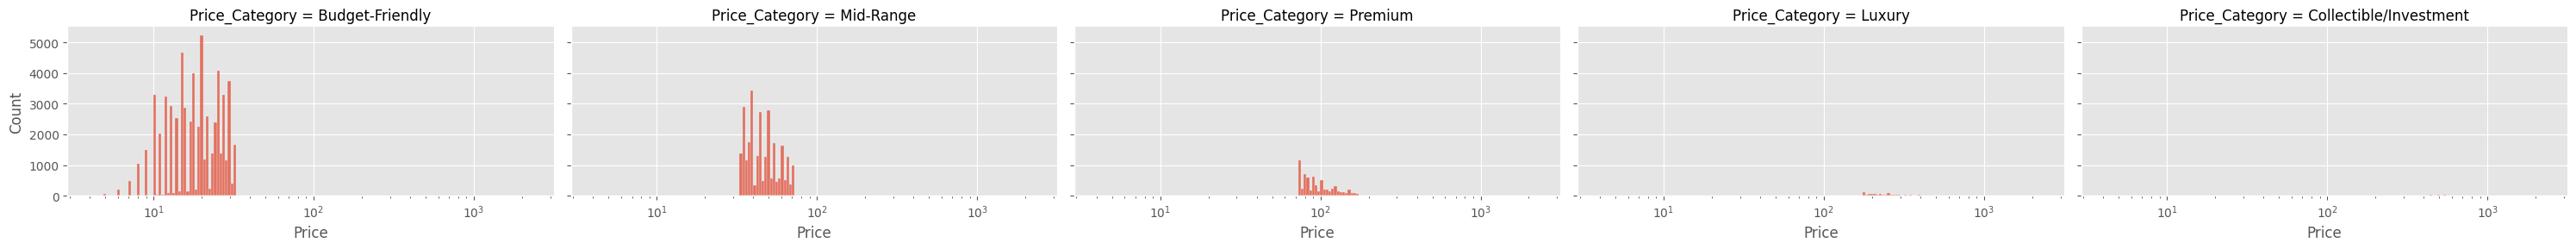

In [414]:
sns.displot(kind='hist', data=reviews_hybrid, x='Price', height=3, aspect=2, col='Price_Category',log_scale=True);

## (5) Compare Price and Point Distributions. Transformed Price and Points columns to a standard normal distribution. Use Z-score

In this section we want to scale and standardize numerical features by calculating the Z score. So typically in machine learning and statistical analysis, there are some algorithms that are very sensitive to different scales of some features.
So let's assume that we have one feature where the scale is in the millions or even billions, and we have a second feature in the micro or even nano scale. And in this setting, some algorithms does not work properly.

And in these cases we need to bring the features to the same scale.

And there are actually many ways to scale or normalize features and machine learning: 

- Libraries like **Scikit** Learn also include a built in methods to scale and normalize data.
- But we can also do this quite easily with **pandas and some arithmetics.**

So let's start coding and we actually want to scale or standardize some numerical features or columns in our dataset:

In [418]:
reviews_hybrid[["Price", "Points"]].describe()

Price        Points
count  97846.000000  97846.000000
mean      35.044729     87.956902
std       41.136206      3.218116
min        4.000000     80.000000
25%       16.000000     86.000000
50%       25.000000     88.000000
75%       40.000000     90.000000
max     2300.000000    100.000000

So here we have Price and Points, and we can see here that the mean age and the mean fare, they are quite different. Also the Price feature has a much higher standard deviation with 41 versus 3. So the **features price and points are completely on a different scale, so the mean and standard deviation are different.** However, **we can still improve this here and bring both features to the exactly same scale.**
But before we are doing this, we can also analyze the different scale of the two features graphically, and now we are creating two line plots, one for the points column and one for the price column:

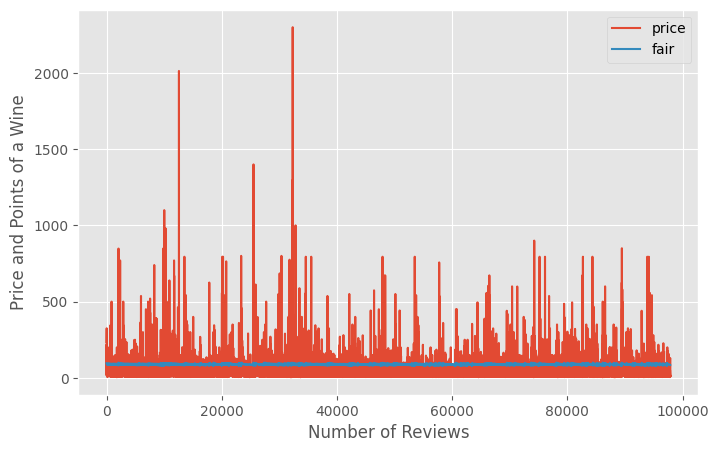

In [419]:
reviews_hybrid["Price"].plot(figsize=(8, 5), label="price")
reviews_hybrid["Points"].plot(figsize=(8, 5),label="fair")
plt.legend()
plt.xlabel("Number of Reviews")
plt.ylabel("Price and Points of a Wine")
plt.show()

So here on the x axis, we have our range index, so to say the reviews number. And on the y axis, we have the points here between 80 and 100 and we have the price between 0 and 2300 here. And graphically, you can see here that here we have a different scale. So the scale of both features is nevertheless quite different.

And therefore we can scale and standardize these features by calculating the so-called Z score.

**These Z-scores represent how many standard deviations each data point is from the mean in its respective column.**

### **Manual Calculation of Z-Score using Pandas**

In [420]:
mean_price = reviews_hybrid["Price"].mean()
mean_points = reviews_hybrid["Points"].mean()
mean_price, mean_points

(35.044729472845084, 87.95690166179507)

In [421]:
std_price = reviews_hybrid["Price"].std()
std_points = reviews_hybrid["Points"].std()
std_price, std_points

(41.136205887145294, 3.218115934073319)

In [422]:
reviews_hybrid["price_z"] = round((reviews_hybrid["Price"] - mean_price)/std_price, 2)
reviews_hybrid["points_z"] = round((reviews_hybrid["Points"] - mean_points)/std_points,2)

In [423]:
reviews_hybrid[["Price", "Points", "price_z", "points_z"]].head(10)

Price  Points  price_z  points_z
0  235.0      96     4.86      2.50
1  110.0      96     1.82      2.50
2   90.0      96     1.34      2.50
3   65.0      96     0.73      2.50
4   66.0      95     0.75      2.19
5   73.0      95     0.92      2.19
6   65.0      95     0.73      2.19
7  110.0      95     1.82      2.19
8   65.0      95     0.73      2.19
9   60.0      95     0.61      2.19

**These Z-scores represent how many standard deviations each data point is from the mean in its respective column.**

- *A Z-score of 0 means the data point is exactly at the mean*. The value zero in Z-score means that here this observation is exactly zero standard deviations away from the mean. 
- Positive values indicate data points above the mean, and negative values indicate data points below the mean.
- Z-scores help identify outliers by flagging data points that deviate significantly from the mean. Typically, data points with Z-scores greater than a certain threshold (e.g., 2 or 3) are considered outliers.

*for price_z:*

- The first data point has a Z-score of approximately 4.86, indicating it's about 4.86 standard deviations above the mean.

And by calculating the Z score here, for each value of each observation, we can actually scale or normalize our feature.

In [425]:
desc = round(reviews_hybrid.describe(), 2)
desc

Points     Price  Price_Cluster   price_z  points_z
count  97846.00  97846.00       97846.00  97846.00  97846.00
mean      87.96     35.04           0.99      0.00     -0.00
std        3.22     41.14           1.36      1.00      1.00
min       80.00      4.00           0.00     -0.75     -2.47
25%       86.00     16.00           0.00     -0.46     -0.61
50%       88.00     25.00           0.00     -0.24      0.01
75%       90.00     40.00           3.00      0.12      0.63
max      100.00   2300.00           4.00     55.06      3.74

Now we have actually for both price_z and point_z features the mean value zero and the standard deviation one. So this is actually in a nutshell, the main effect of scaling features. By calculating the Z score, we are getting new features with a mean value of zero and a standard deviation of one.

### **Meaning of Z-Scores with Mean 0 and Std 1**

When the mean is zero and the standard deviation is one for Z-score values, it indicates that the original data has been standardized or normalized to follow a standard normal distribution, also known as a Z-distribution or a Gaussian distribution with a mean of 0 and a standard deviation of 1. The standard normal distribution is characterized by:

1. **Mean $\mu$:** The mean is 0.
2. **Standard Deviation $\sigma$:** The standard deviation is 1.

For a variable \( X \), the Z-score is calculated as:

$$Z = \frac{{X - \mu}}{{\sigma}}$$

In a standard normal distribution, Z-scores provide a measure of how many standard deviations a data point is from the mean. A Z-score of 0 means the data point is exactly at the mean, positive Z-scores indicate values above the mean, and negative Z-scores indicate values below the mean.

The advantages of standardizing data to a Z-distribution include easier comparison and interpretation of data across different scales and units. It simplifies statistical analysis and hypothesis testing, as Z-scores provide a common scale for different variables.

In summary, when Z-scores have a mean of 0 and a standard deviation of 1, it means the data has been transformed to a standard normal distribution, providing a standardized way to compare and analyze different variables.

### **Visualizing Z-score using Lineplot**

And now we can see here also graphically that actually the scale of both features is quite similar:

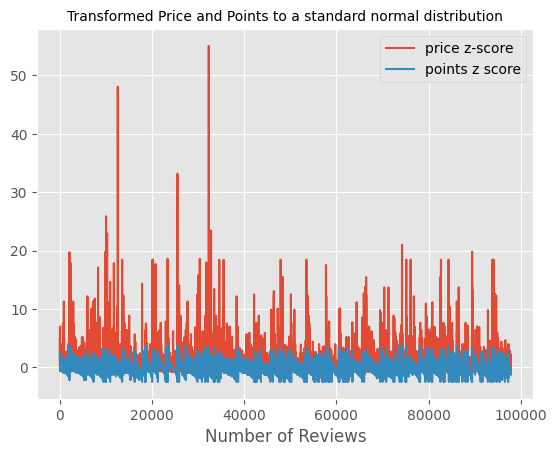

In [431]:
reviews_hybrid['price_z'].plot(fig=(8, 5), label='price z-score')
reviews_hybrid['points_z'].plot(fig=(8, 5), label="points z score")
plt.legend()
plt.title("Transformed Price and Points to a standard normal distribution", fontsize=10)
plt.xlabel("Number of Reviews")
plt.show()

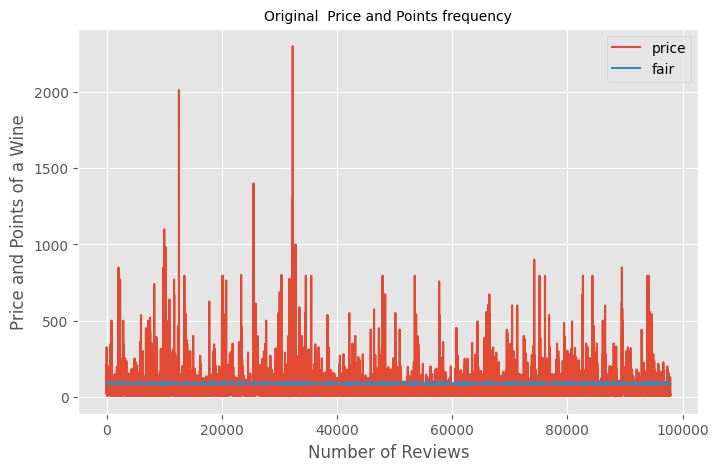

In [432]:
reviews_hybrid["Price"].plot(figsize=(8, 5), label="price")
reviews_hybrid["Points"].plot(figsize=(8, 5),label="fair")
plt.legend()
plt.xlabel("Number of Reviews")
plt.ylabel("Price and Points of a Wine")
plt.title("Original  Price and Points frequency", fontsize=10)
plt.show()

### **Visualizing Z-scores using Box Plot**

Create boxplots of Z-scores for each variable. Boxplots can help you identify the spread and central tendency of Z-score distributions:

When dealing with negative Z-scores in a boxplot and considering the use of a logarithmic scale to improve the visual representation, you need to approach this with caution because the logarithmic transformation can only be applied to positive values. Since Z-scores can be negative (indicating values below the mean in a standard distribution), directly applying a logarithmic scale to your data will not work.

Symmetric Log Transformation: Some plotting libraries (like Matplotlib) offer a symmetric log scale, which handles both positive and negative values by applying a logarithm for positive values and a negative logarithm for negative values. This can be an effective way to display data with both positive and negative values on a log scale.

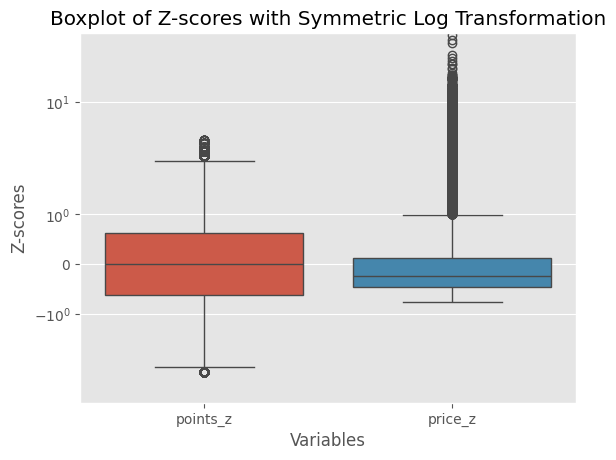

In [444]:
# Create the boxplot without applying the log scale yet
sns.boxplot(data=reviews_hybrid[["points_z", "price_z"]])
plt.xlabel("Variables")
plt.ylabel("Z-scores")
plt.title("Boxplot of Z-scores with Symmetric Log Transformation")

# Set the y-axis to symlog scale
plt.yscale('symlog')

From the boxplot, we can observe the following:

- **Points Z-scores**: The distribution of Z-scores for the `Points` variable appears to be relatively symmetrical around the median, indicating that the points are normally distributed around the mean. The boxplot for Points Z-scores doesn't show extreme outliers, which suggests that most of the wine ratings are clustered around the average rating, with fewer wines rated significantly higher or lower. if the box for points_z is larger than for price_z, this would imply that there is more variability in the Z-scores of the wine points compared to the Z-scores of the wine price.

- **Price Z-scores**: The boxplot for the `Price` variable shows a wider range, indicating greater variability in wine prices compared to their points. There are notable outliers on the positive side, suggesting that there are some wines with prices significantly higher than the average. The distribution is skewed towards lower Z-scores, which is typical for data where a large number of observations are clustered near the lower end of the scale (in this case, lower prices), with fewer expensive outliers.

### **Visualizing Z-score using QQ Plot (Quantile-Quantile Plot)**

QQ plots compare the quantiles of your data to the quantiles of a theoretical distribution (in this case, the standard normal distribution). A straight line in the QQ plot indicates a normal distribution:

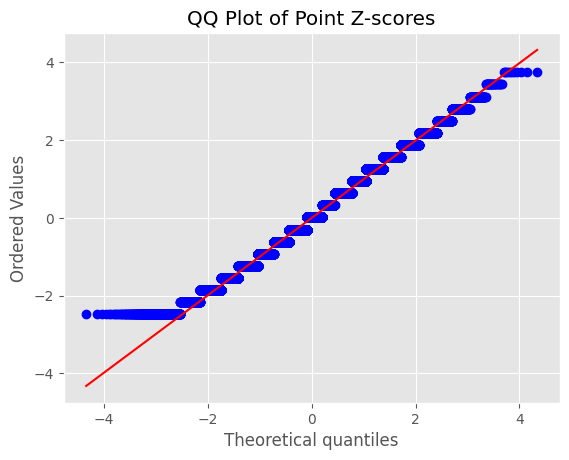

In [436]:
from scipy.stats import probplot

probplot(reviews_hybrid["points_z"], plot=plt)
plt.title("QQ Plot of Point Z-scores")
plt.show()

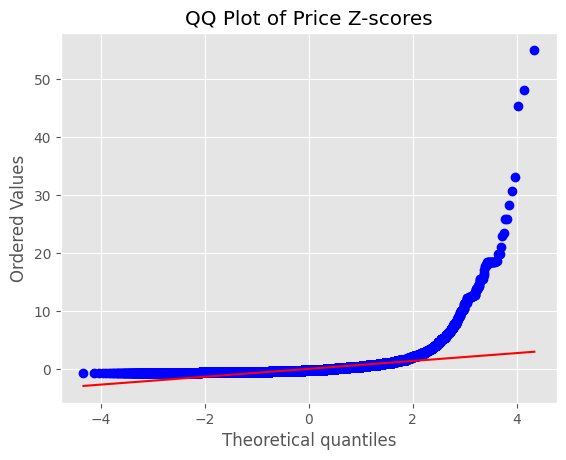

In [437]:
probplot(reviews_hybrid["price_z"], plot=plt)
plt.title("QQ Plot of Price Z-scores")
plt.show()

### **Role of Z-Scores in Statistical Analysis**

Z-scores play a crucial role in statistical analysis by providing a standardized way to measure and compare the relative positions of data points within different distributions. Here are several ways in which Z-scores can assist in statistical analysis:

1. **Standardization and Comparison:**
   - **Standardization:** Z-scores standardize data, allowing you to compare values from different distributions or variables that may have different units or scales.
   - **Comparison:** Z-scores enable you to compare the relative position of data points within their distributions. Positive Z-scores indicate values above the mean, and negative Z-scores indicate values below the mean.

2. **Identification of Outliers:**
   - Z-scores help identify outliers by flagging data points that deviate significantly from the mean. Typically, data points with Z-scores greater than a certain threshold (e.g., 2 or 3) are considered outliers.

3. **Probability and Percentiles:**
   - Z-scores are associated with probabilities in a standard normal distribution. You can use Z-scores to determine the likelihood of a data point falling below or above a certain threshold. This is particularly useful in hypothesis testing and confidence interval calculations.

4. **Normalization of Variables:**
   - In regression analysis, Z-scores are used to normalize variables, ensuring that coefficients reflect the impact of variables in terms of standard deviations.

5. **Data Transformation:**
   - Z-scores can be used in data transformation techniques to achieve normality or reduce skewness in distributions, which is often a prerequisite for certain statistical tests.

6. **Identifying Standard Deviations from the Mean:**
   - Z-scores provide a quantitative measure of how many standard deviations a data point is from the mean. This information is useful for understanding the spread of data.

7. **Comparing Distributions:**
   - Z-scores facilitate the comparison of different distributions. By transforming data into Z-scores, you can compare how individual values in one distribution compare to the mean of another distribution.

8. **Data Validation and Quality Control:**
   - Z-scores are used in quality control processes to monitor and validate data points that deviate significantly from expected values.

In summary, Z-scores offer a standardized way to interpret and compare data points, making them a valuable tool in various aspects of statistical analysis, from identifying outliers to assessing the probability of certain events in a distribution.


## (6) How each wine's quality rating compares to the average rating of wines from the same country. Use Z-score

We could calculate the z-score of the 'Points' for each wine within its 'Country' group. This would show us how each wine's quality rating compares to the average rating of wines from the same country.

Let's start by calculating the z-scores for the 'Points' within each 'Country'. This will give us an insight into how each wine's quality rating stands relative to others from the same country. After calculating the z-scores, we can explore the distribution of these scores across different countries to see if certain countries tend to have wines that are consistently above or below their national average.

I'll proceed with calculating the z-scores for the 'Points' within each 'Country':

In [452]:
reviews_hybrid.head(2)

Country                                        Description  \
0      US  This tremendous 100% varietal wine hails from ...   
1   Spain  Ripe aromas of fig, blackberry and cassis are ...   

                            Designation  Points  Price        Province  \
0                     Martha's Vineyard      96  235.0      California   
1  Carodorum Selección Especial Reserva      96  110.0  Northern Spain   

      Region_1 Region_2             Variety                   Winery  Rating  \
0  Napa Valley     Napa  Cabernet Sauvignon                    Heitz  Superb   
1         Toro      NaN       Tinta de Toro  Bodega Carmen Rodríguez  Superb   

        Price_cat  Price_Cluster Price_Category  price_z  points_z  
0  Outlier-Luxury              1         Luxury     4.86       2.5  
1  Outlier-Luxury              2        Premium     1.82       2.5

In [453]:
from scipy.stats import zscore

# Filter out countries with less than 2 data points to avoid division by zero in z-score calculation
filtered_data_for_zscore = reviews_hybrid.groupby('Country').filter(lambda x: len(x) > 1)

# Recalculate the z-scores for 'Points' within each 'Country' on the filtered dataset
filtered_data_for_zscore['Points_Z'] = filtered_data_for_zscore.groupby('Country')['Points'].transform(lambda x: zscore(x, ddof=1))


In [454]:
# Display the first few rows to confirm the z-scores were added correctly
filtered_data_for_zscore[['Country', 'Points', 'Points_Z']]

Country  Points  Points_Z
0             US      96  2.384735
1          Spain      96  2.936691
2             US      96  2.384735
3             US      96  2.384735
4         France      95  1.915948
...          ...     ...       ...
97841         US      84 -1.152033
97842   Portugal      84 -1.412398
97843         US      84 -1.152033
97844  Argentina      84 -0.662385
97845  Australia      84 -1.325597

[97841 rows x 3 columns]

These z-scores represent how many standard deviations away each wine's quality rating ('Points') is from the mean quality rating of wines from the same country. For instance, a z-score of 2.38 for a wine from the US indicates that this wine's quality rating is approximately 2.38 standard deviations above the average rating of all US wines in the dataset.

**Assessing Individual Wines:**

To assess how individual wines compare to their country's average using the z-score:

1. **Positive Z-Score**: An individual wine with a positive z-score is rated higher than the national average for its country. The higher the z-score, the further above the average it is. For instance, a wine with a z-score of +2 is rated much higher than average, being two standard deviations above the mean.

2. **Negative Z-Score**: An individual wine with a negative z-score is rated lower than the national average for its country. A z-score of -1, for example, indicates a wine that is one standard deviation below the national average in terms of quality rating.

3. **Z-Score Around Zero**: Wines with z-scores close to zero are rated near the national average. These wines are considered average in quality compared to other wines from the same country.

Now that we have these z-scores, we can analyze the distribution of z-scores across different countries to see how wines from each country compare to their national averages. This analysis could reveal whether certain countries have a higher proportion of wines that are significantly better or worse than the national average, providing a deeper insight into the quality distribution within each country.


To visually analyze the distribution of z-scores across different countries, we can use boxplots. Boxplots are excellent for displaying the distribution of data, showing the median, quartiles, and outliers, which will help us understand how the z-scores (and therefore the 'Points') are distributed within each country.

Below is the boxplot showing the distribution of 'Points' z-scores for the top countries by the number of wines in the dataset, as including all countries might make the plot too crowded and difficult to interpret.

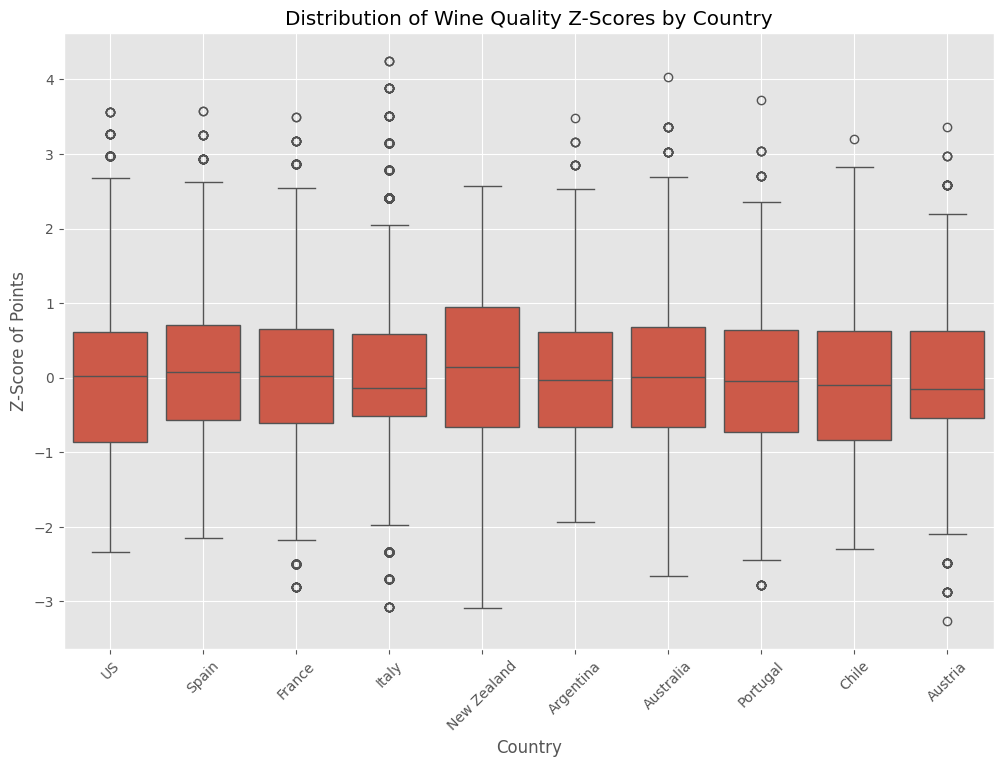

In [455]:
data = filtered_data_for_zscore

# Filter the data to include only the top countries by wine count to avoid a cluttered plot
top_countries = data['Country'].value_counts().nlargest(10).index
filtered_data = data[data['Country'].isin(top_countries)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Points_Z', data=filtered_data)
plt.title('Distribution of Wine Quality Z-Scores by Country')
plt.xlabel('Country')
plt.ylabel('Z-Score of Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The boxplot above shows the distribution of wine quality z-scores by country for the top countries by wine count in the dataset. Each boxplot represents the spread of z-scores within a country, highlighting the median (the line within the box), the interquartile range (the box itself), and any outliers (points outside the "whiskers").

Interpreting the median of the wine quality z-scores in relation to a zero z-score within the boxplot can provide insightful information about the overall quality of wines from a particular country compared to its own average.

1. **Interpretation of Median Quality Ratings vs Z-Score:**

- **Median Z-Score Equal to Zero**: If the median z-score of a country's wines is zero, it means that the median wine quality rating in that country is exactly at the national average for that country. In other words, half of the wines have quality ratings above the national average, and half have ratings below it. This implies that the median wine quality rating (Points) is very close to the mean wine quality rating for that country, due to how z-scores are calculated. While not always exactly equal due to the nature of distributions and rounding, it's a good approximation for interpretation.

- **Median Z-Score Above Zero**: A median z-score above zero indicates that the middle value of wine quality ratings in that country is above the national average. This suggests that a larger proportion of wines from this country are rated higher than the average wine quality rating for that country. In practical terms, when you pick a wine from this country at random, there's a good chance it will have a quality rating above the national average. This suggests that the median wine quality rating is above the mean wine quality rating for that country. The z-score indicates how far above the mean the median lies in terms of standard deviations.

- **Median Z-Score Below Zero**: Conversely, a median z-score below zero signifies that the median wine quality rating is below the national average for that country. This implies that a greater number of wines are rated below the national average. Therefore, randomly selecting a wine from this country might more likely yield a wine with a quality rating below the national average. This indicates that the median wine quality rating is below the mean wine quality rating for that country, with the z-score reflecting the distance below the mean in standard deviations.


2. **Variability in Quality**: The width of the boxplots varies significantly among countries, indicating a disparity in the variability of wine quality ratings within different countries. Countries with wider boxes exhibit a greater range of wine qualities, suggesting a more diverse wine quality profile.

3. **Outliers**: The presence of outliers, indicated by points beyond the whiskers of the boxplots, suggests that there are wines in each country that are significantly higher or lower in quality compared to the average wine quality of that country. The number and direction of these outliers provide insight into the extent to which exceptional wines (both high and low quality) exist within each national context.

4. **Comparative Quality**: The comparison of z-scores across countries allows for an analysis of wine quality that accounts for each country's unique distribution of ratings. This standardization reveals how wines from each country stand relative to their national averages, providing a basis for comparison that is not skewed by differences in rating scales or tendencies.

**Conclusion:**

The analysis of wine quality z-scores by country offers a nuanced understanding of wine quality distributions on a national level. By standardizing wine ratings within each country, we can assess how individual wines compare to their country's average, revealing patterns of quality variability, median quality levels, and the prevalence of exceptional wines. This approach highlights the diversity and range of wine qualities within and across different wine-producing regions, offering valuable insights for connoisseurs, marketers, and producers alike. The findings underscore the importance of considering local contexts when evaluating wine quality, as well as the potential for exceptional wines to emerge from any region, regardless of the overall distribution of quality ratings.

### **Visualizing Z-score using QQ Plot (Quantile-Quantile Plot)**

QQ plots compare the quantiles of our data to the quantiles of a theoretical distribution (in this case, the standard normal distribution). A straight line in the QQ plot indicates a normal distribution:

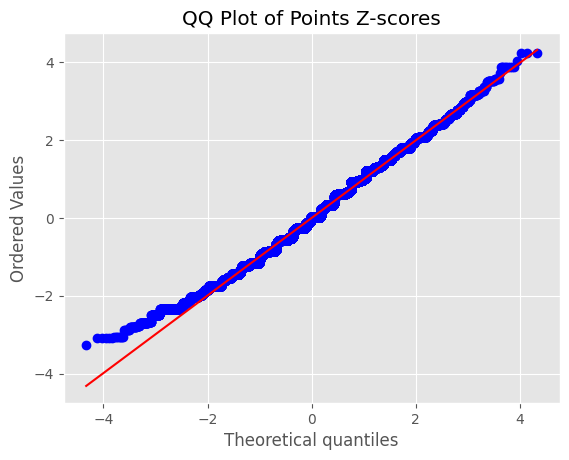

In [462]:
from scipy.stats import probplot

probplot(filtered_data['Points_Z'], plot=plt)
plt.title("QQ Plot of Points Z-scores")
plt.show()

## (7) How each wine's price compares to the average price of wines from the same country. Use Z-score

We'll calculate the z-scores for the 'Price' within each 'Country' and visualize the distribution of these scores to analyze how wine prices compare to the average prices within their respective countries.

In [456]:
from scipy.stats import zscore

# Filter out countries with less than 2 data points to avoid division by zero in z-score calculation
filtered_data_for_zscore = reviews_hybrid.groupby('Country').filter(lambda x: len(x) > 1)

# Calculate the z-scores for 'Points' within each 'Country' on the filtered dataset
filtered_data_for_zscore['Price_Z'] = filtered_data_for_zscore.groupby('Country')['Price'].transform(lambda x: zscore(x, ddof=1))

In [457]:
# Display the first few rows to confirm the z-scores were added correctly
filtered_data_for_zscore[['Country', 'Price', 'Price_Z']]

Country  Price   Price_Z
0             US  235.0  7.727244
1          Spain  110.0  2.282355
2             US   90.0  2.149074
3             US   65.0  1.187320
4         France   66.0  0.204661
...          ...    ...       ...
97841         US   15.0 -0.736187
97842   Portugal   18.0 -0.257731
97843         US    6.0 -1.082418
97844  Argentina    9.0 -0.593180
97845  Australia    8.0 -0.604031

[97841 rows x 3 columns]

A z-score in the context of wine prices represents how many standard deviations a specific wine's price is from the mean (average) price of all wines within the same group, such as a country. The z-score provides a way to standardize and compare prices across different groups, even if those groups have different average prices and variability in prices. Here's what the z-score tells us about wine prices:

1. **Z-Score of 0**: A wine with a z-score of 0 is priced exactly at the mean price for its group. It's an average-priced wine compared to others from the same country or category.

2. **Positive Z-Score**: A positive z-score indicates that a wine's price is above the mean price for its group. The higher the z-score, the more expensive the wine is compared to the average. For example, a wine with a z-score of +1 is one standard deviation above the mean price, making it more expensive than the average wine from that group. A z-score of +2 would indicate it's two standard deviations above the mean, and so on, highlighting increasingly higher-priced wines.

3. **Negative Z-Score**: A negative z-score means that a wine's price is below the mean price for its group. The lower the z-score, the less expensive the wine is relative to the average. For instance, a wine with a z-score of -1 is one standard deviation below the mean price, indicating it's less expensive than the average wine from that group. A z-score of -2 would be even less expensive, being two standard deviations below the mean.

4. **Magnitude of the Z-Score**: The absolute value of the z-score indicates the degree to which the wine's price deviates from the mean. A z-score close to 0 (whether positive or negative) means the wine's price is close to the average for its group, while a larger absolute z-score indicates a price that is much higher or lower than average.

In summary, the z-score allows us to understand how individual wine prices compare to the typical price within a particular group, adjusting for differences in average prices and price variability across different groups. It provides a standardized measure to assess whether a wine is priced above, below, or at the average, offering insights into the relative affordability or premium nature of wines within their respective markets.

Now that we have these z-scores, we can analyze the distribution of z-scores across different countries to see how wines from each country compare to their national averages. This analysis could reveal whether certain countries have a higher proportion of wines that are significantly more expensive or cheaper than the national average, providing a deeper insight into the quality distribution within each country.

To visually analyze the distribution of z-scores across different countries, we can use boxplots. Boxplots are excellent for displaying the distribution of data, showing the median, quartiles, and outliers, which will help us understand how the z-scores (and therefore the 'Price') are distributed within each country.

Below is the boxplot showing the distribution of 'Prices' z-scores for the top countries by the number of wines in the dataset, as including all countries might make the plot too crowded and difficult to interpret.

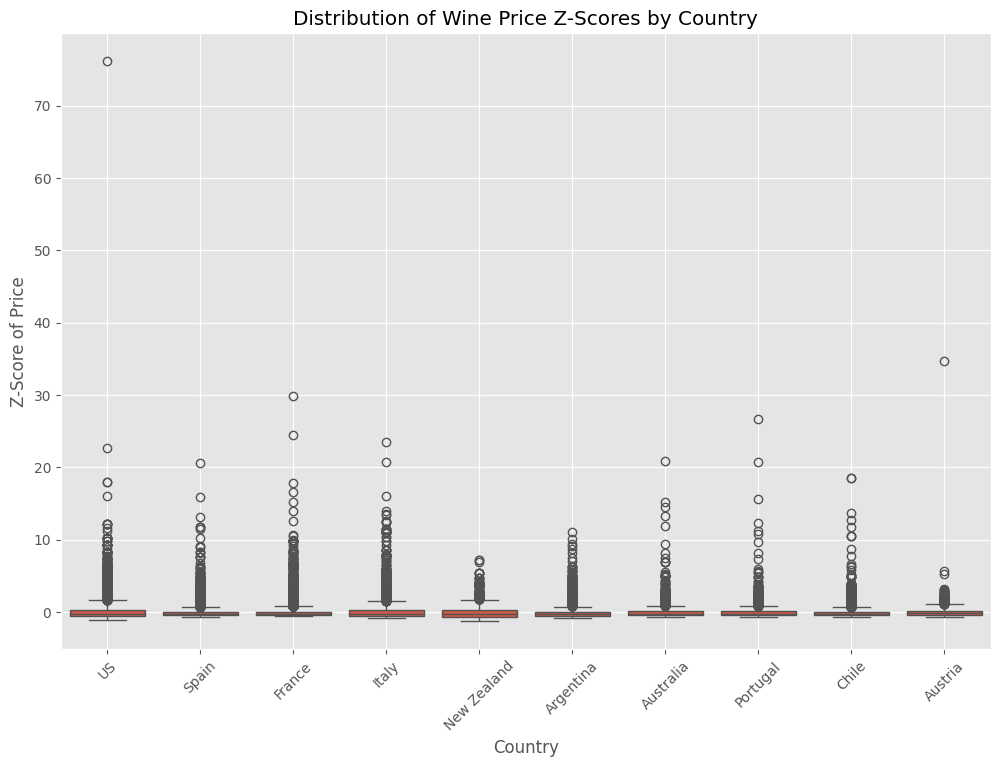

In [458]:
data_new = filtered_data_for_zscore

# Filter the data to include only the top countries by wine count to avoid a cluttered plot
top_countries_price = data_new['Country'].value_counts().nlargest(10).index
filtered_data_price = data_new[data_new['Country'].isin(top_countries_price)]

plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Price_Z', data=filtered_data_price)
plt.title('Distribution of Wine Price Z-Scores by Country')
plt.xlabel('Country')
plt.ylabel('Z-Score of Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

The squeezed appearance of the boxplots and the difficulty in discerning the size of the boxes can occur when there are significant outliers or a wide range of z-scores, causing the scale of the plot to extend far beyond the interquartile range (IQR). This can make the central boxes, where most of the data lies, appear very small.

To address this and provide a clearer view of the central distribution of each country's wine prices, we can adjust the visualization in the following way: 

**Limiting the Y-Axis**: We can set limits on the y-axis to focus on the range where most of the data is concentrated, which will exclude extreme outliers from the visualization but provide a clearer view of the IQR and median.


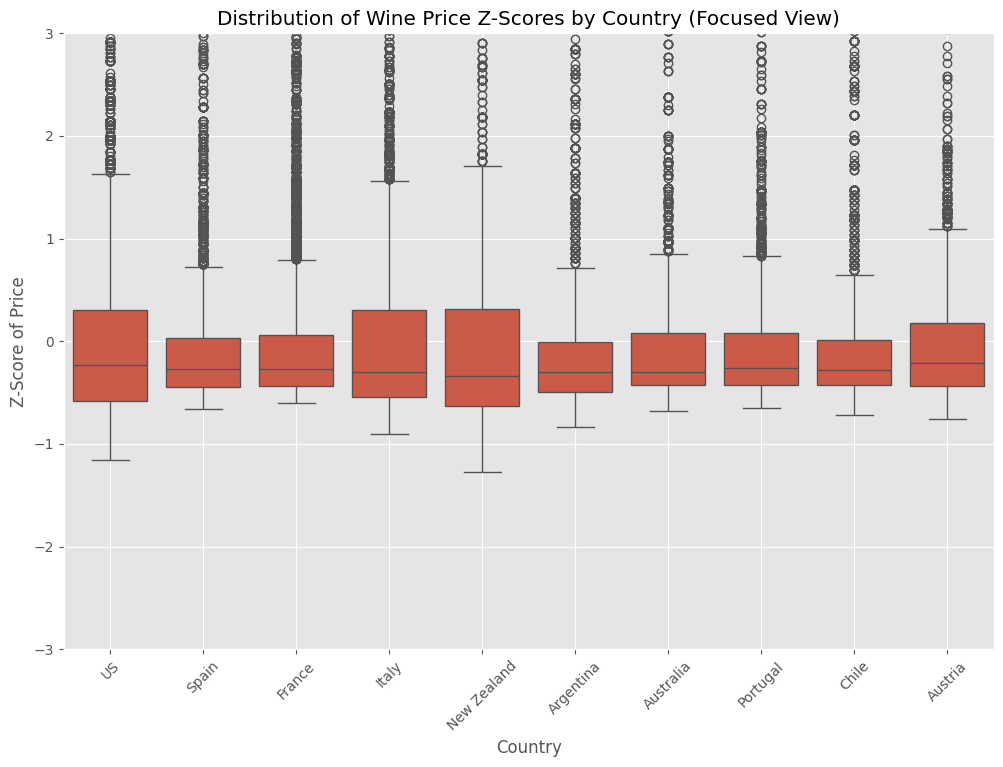

In [459]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Price_Z', data=filtered_data_price)

# Set the y-axis limits to focus on the central part of the data, excluding extreme outliers
# The limits are chosen based on typical z-score ranges that are considered "normal" (-3 to 3)
plt.ylim(-3, 3)

plt.title('Distribution of Wine Price Z-Scores by Country (Focused View)')
plt.xlabel('Country')
plt.ylabel('Z-Score of Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


The boxplot provides view of the distribution of wine price z-scores by country, with the y-axis limited to the range of -3 to 3. This range typically encompasses the majority of data in a normal distribution, allowing us to better see the size and spread of each box, which represents the interquartile range (IQR), and the median line within each box.

With this focused view, we can more clearly assess the variability in wine prices within each country, the position of the median price relative to the national average (indicated by the median line's position within the box), and any mild outliers within the -3 to 3 range.

The adjusted boxplot visualization provides a clearer view of the distribution of wine price z-scores by country, focusing on the central portion of the data (z-scores within the range of -3 to 3). Here's a detailed analysis based on this visualization:

**Analysis:**

1. **Interquartile Range (IQR)**: The size of the boxes, representing the IQR, gives an indication of the variability in wine prices within each country. A larger box suggests greater price variability, meaning there's a wider spread of wine prices around the median. Conversely, a smaller box indicates that wine prices are more tightly clustered around the median.

2. **Median Line**: The line within each box represents the median z-score of wine prices for that country. A median line near the center of the box (around zero) indicates that the median wine price is close to the national average price for that country. If the median line is above zero, it suggests that the median wine price is higher than the national average, and if it's below zero, the median price is lower than the national average.

3. **Symmetry of Boxes**: The symmetry of the boxes around the median line can give some indication of the skewness of the price distribution within each country. If a box appears symmetrical around the median line, it suggests a relatively balanced distribution of wine prices above and below the median. An asymmetrical box could indicate a skew in the distribution, with more wines priced either significantly above or below the median.

4. **Outliers**: While the focus on z-scores within the -3 to 3 range limits the visibility of extreme outliers, any points still visible beyond the whiskers of the boxes indicate wines that are priced significantly differently from the majority. These could be exceptionally high-priced or low-priced wines relative to the national average.

**Conclusion:**

The distribution of wine price z-scores by country reveals differences in the variability and central tendency of wine prices within each country, relative to their national averages. Countries with larger IQRs have more variability in wine prices, while the position of the median line relative to zero provides insight into whether the median wine price is above or below the national average.

This analysis can help consumers, retailers, and sommeliers understand the pricing landscape of wines from different countries. For example, a country with a median line above zero and a large IQR might offer a wide range of wines, from moderately to highly priced, with the median price being higher than the average. Conversely, a country with a median line below zero and a smaller IQR might generally offer more affordable wines, with prices more consistently clustered around the median, which is below the national average.

Understanding these patterns can aid in making informed choices based on price expectations and variability within each country's wine offerings. It also highlights the diversity of the wine market and the range of options available to consumers across different price points and countries.

### **Visualizing Z-score using QQ Plot (Quantile-Quantile Plot)**

QQ plots compare the quantiles of our data to the quantiles of a theoretical distribution (in this case, the standard normal distribution). A straight line in the QQ plot indicates a normal distribution:

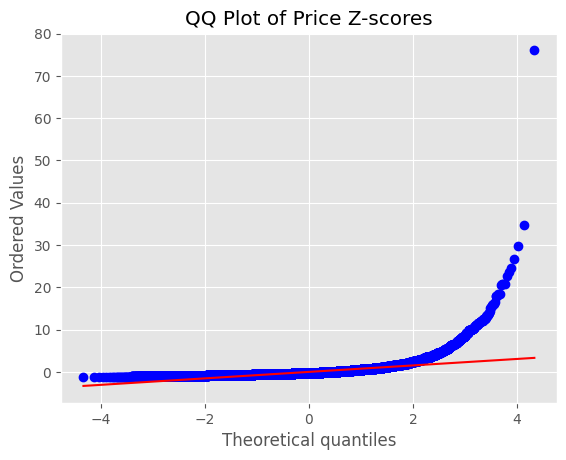

In [461]:
from scipy.stats import probplot

probplot(filtered_data_price['Price_Z'], plot=plt)
plt.title("QQ Plot of Price Z-scores")
plt.show()

## (8) Hypothesis: Wines from France have higher average ratings than wines from Italy. Perform independent sample t-test

[When to use Spearman's rank correlation coefficient vs Pearson Correlation Coefficient and when to performing a t-test.](./support_files/t_test_vs_Spearmans_vs_Pearson_correlation_coefficient.ipynb)

To test the hypothesis that wines from France have higher average ratings than wines from Italy, we'll perform a statistical test. The appropriate test in this context is an independent samples t-test because **we're comparing the means of two independent groups (French wines vs. Italian wines)**.  For a t-test, we should use `ttest_ind` from `scipy.stats`.

**Hypotheses**

- **Null Hypothesis (H0):** There is no difference in the average ratings of wines from France and Italy. Mathematically, \$( \mu_{France} = \mu_{Italy} \$).
- **Alternative Hypothesis (H1):** Wines from France have a higher average rating than wines from Italy. Mathematically, \$( \mu_{France} > \mu_{Italy} \$).

**Methodology**

1. Filter the dataset for French and Italian wines.
2. Perform an independent samples t-test between the ratings of French and Italian wines.
3. Evaluate the p-value to determine the significance of the results.

We'll consider a standard significance level of 0.05. If the p-value is less than 0.05, we'll reject the null hypothesis in favor of the alternative.

Let's proceed with the analysis.

In [415]:
from scipy.stats import ttest_ind

# Filter the dataset for French and Italian wines
french_wines = reviews_hybrid[reviews_hybrid['Country'] == 'France']['Points']
italian_wines = reviews_hybrid[reviews_hybrid['Country'] == 'Italy']['Points']

# Perform an independent samples t-test
t_stat, p_value = ttest_ind(french_wines, italian_wines, alternative='greater')  # 'greater' for one-tailed test

# Results
t_stat, p_value

(15.257594101819468, 1.1651758429455586e-52)

**Results**

The t-test produced a t-statistic of approximately 15.26, with a p-value of \$(1.17 \times 10^{-52}\$).

**Summary**

Given the extremely small p-value, we have strong evidence to reject the null hypothesis in favor of the alternative hypothesis. This suggests that, based on the dataset, wines from France have a statistically significantly higher average rating compared to wines from Italy.

**Conclusion**

The analysis supports the hypothesis that French wines, on average, are rated higher than Italian wines within this dataset. The difference in ratings is statistically significant, which indicates that the observed difference is unlikely to be due to random chance. This could be due to a variety of factors, including but not limited to, differences in wine-making traditions, terroir, grape varieties, and possibly even reviewer biases or preferences toward French wines. However, it's important to note that statistical significance does not necessarily imply practical significance, and the actual difference in ratings should be considered when interpreting these results.

The t-statistic is a measure used in statistical testing to determine the relative distance of the observed data from the null hypothesis. When you perform a t-test, the t-statistic helps you understand how extreme the observed results are, assuming that the null hypothesis is true.

In the context of your earlier analysis, where we obtained a t-statistic of approximately 15.26, this value tells us several things:

1. **Magnitude and Direction**: The value of 15.26 indicates the magnitude of the difference between the average ratings of French and Italian wines, relative to the variability within those groups. A positive t-statistic (which is the case here) indicates that the mean of the first group (French wines) is higher than the mean of the second group (Italian wines).

2. **Statistical Significance**: A higher absolute value of the t-statistic indicates a more significant difference between the groups. In statistical terms, a t-statistic of 15.26 is considered very high, suggesting a very low probability that such an extreme observed outcome would occur by chance if there were truly no difference in average ratings between French and Italian wines (the null hypothesis).

3. **Comparison to the t-Distribution**: The t-statistic is compared against a t-distribution (a theoretical distribution used in hypothesis testing for small sample sizes or unknown variances) to determine the p-value. The t-distribution accounts for the degrees of freedom in your data (related to the sample size and number of groups being compared) to help judge the extremeness of the t-statistic.

4. **Implications for the Hypothesis Test**: In our case, the t-statistic of 15.26, with its associated very small p-value, indicates strong evidence against the null hypothesis. This leads to the rejection of the null hypothesis in favor of the alternative hypothesis, suggesting a statistically significant difference in average ratings between French and Italian wines, with French wines having higher average ratings.

In summary, a t-statistic of 15.26 in your analysis signifies a substantial difference between the average ratings of French and Italian wines, far beyond what would be expected by random variation alone, thus providing strong evidence to support the alternative hypothesis.